<a href="https://www.kaggle.com/code/dataranch/banking-crisis-model-comparison-more?scriptVersionId=106683897" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Banking Crisis Dataset Baseline Model Comparison + Feature Importance 📊**</div>
- Preprocessing
    - Detect continuous and categorical variables.
    - Normalize and impute data.
    

- For every target variable in the dataset:
    - Compare performance on 27 models + a TabNet model.
    - Output model performance and processed data in CSV format for every dataset.
    - Save plots + CSVs of XGBoost Feature Importances.
    - Save best performing FastAI model.

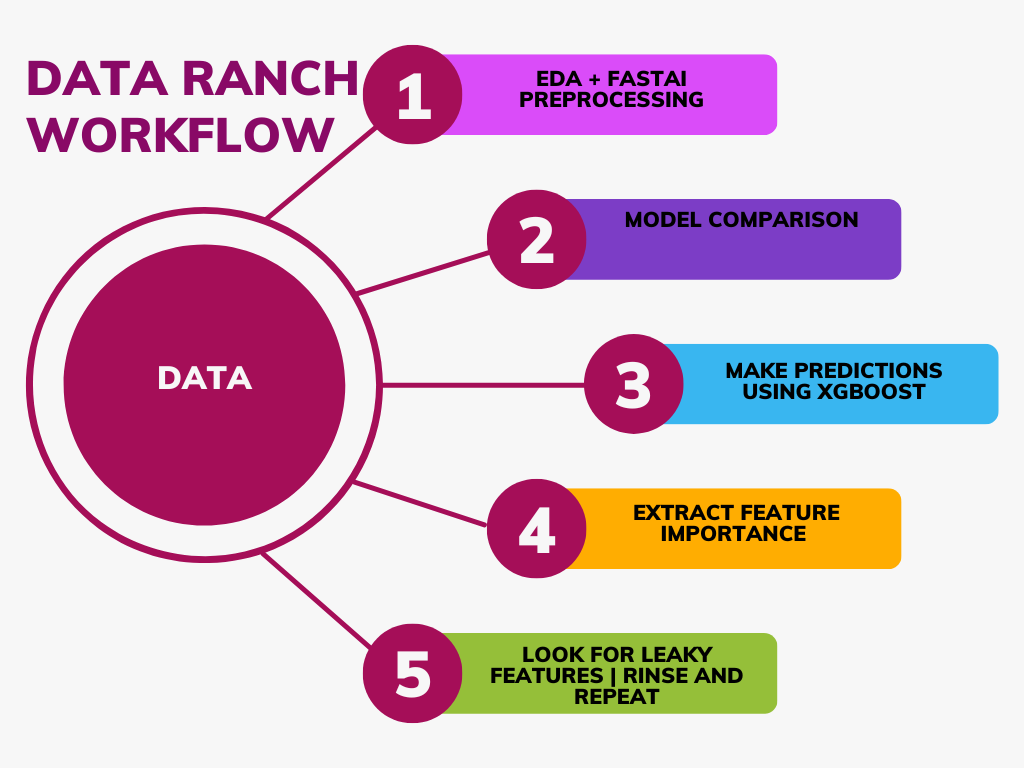

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install lazypredict

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 24.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.9/25.9 MB 20.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 303.0/303.0 kB 19.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 269.4/269.4 kB 19.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... - done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 30.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.8/82.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.6/127.6 MB 8.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.5/72.5 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 248.1/248.1 kB 16.1 MB/s eta 0:00:00
  Created wheel for PyYAML: filename=PyYAML-5.3.1-cp37-cp37m-linux_x86

In [3]:
!pip install --upgrade pandas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 23.2 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 1.0.5
    Uninstalling pandas-1.0.5:
      Successfully uninstalled pandas-1.0.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
beatrix-jupyterlab 3.1.7 requires google-cloud-bigquery-storage, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tfx-bsl 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tfx-bsl 1.9.0 requires tensorflow!=2.0.*,!=2.1.*,!=2.2.*,!=2.3.*,!=2.4.*,!=2.5.*,!=2.6.*,!=2.7.*,!=2.8.*,<3,>=1.15.5, but you have tensorflow 2.6.4 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,>=1, but you have pyarrow 8.0.0 which is incompatible.
tensorflow-transform 1.9.0 requires tensorflow!=2.

In [4]:
!pip install fast-tabnet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.8/41.8 kB 994.7 kB/s eta 0:00:00


In [5]:
!pip install fastai

  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.3.0
    Uninstalling typing_extensions-4.3.0:
      Successfully uninstalled typing_extensions-4.3.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-io 0.21.0 requires tensorflow-io-gcs-filesystem==0.21.0, which is not installed.
xarray-einstats 0.2.2 requires numpy>=1.21, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires h5py~=3.1.0, but you have h5py 3.7.0 which is incompatible.
tensorflow 2.6.4 requires numpy~=1.19.2, but you have numpy 1.19.1 which is incompatible.
tensorflow 2.6.4 requires tensorboard<2.7,>=2.6.0, but you have tensorboard 2.10.0 which is incompatible.
tensorflow 2.6.4 requires typing-extensions<3.11,>=3.7, but you have typing-extensions 4.1.1 which is incompatible.
tensorflow-transform 1.9.0 requires pyarrow<6,

In [6]:
#A program that takes a csv and trains models on it. Streamlined model selection.
#==============================================================================

#LazyPredict
import lazypredict
from lazypredict.Supervised import LazyRegressor
from lazypredict.Supervised import LazyClassifier
#Baysian Optimization
from bayes_opt import BayesianOptimization
#Pandas stack
import pandas as pd
import numpy as np
#FastAI
from fastai.tabular.all import *
from fastai.tabular.core import *
#Plots
import matplotlib.pyplot as plt
import seaborn as sns
#System
import os
import sys
import traceback
#Fit an xgboost model
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.metrics import mean_squared_error
from sklearn.metrics import roc_auc_score
#Random
import random

#TabNet
from fast_tabnet.core import *

import shutil

In [7]:
#Project Variables
#===================================================================================================
PROJECT_NAME = 'banking-crisis-and-exports-dataset'
VARIABLE_FILES = False
#Maximum amount of rows to take
SAMPLE_COUNT = 20000
FASTAI_LEARNING_RATE = 1e-1
AUTO_ADJUST_LEARNING_RATE = False
#Set to True automatically infer if variables are categorical or continuous
ENABLE_BREAKPOINT = True
#When trying to declare a column a continuous variable, if it fails, convert it to a categorical variable
CONVERT_TO_CAT = False
REGRESSOR = True
SEP_DOLLAR = True
SEP_PERCENT = True
SHUFFLE_DATA = True

In [8]:
input_dir = f'../input/{PROJECT_NAME}'
param_dir = f'/kaggle/working/{PROJECT_NAME}'
TARGET = ''
PARAM_DIR = param_dir
print(f'param_dir: {param_dir}')
if not os.path.exists(param_dir):
    os.makedirs(param_dir)
#rename any file in param_dir/file that ends with csv to data.csv
for file in os.listdir(input_dir):
    if file.endswith('.csv'):
        print('CSV!')
        if 'classification_results' not in file and 'regression_results' not in file:
            #os.rename(f'{input_dir}/{file}', f'{param_dir}/data.csv')
            shutil.copy(f'{input_dir}/{file}', f'{param_dir}/data.csv')
        #os.rename(f'{param_dir}/{file}', f'{param_dir}/data.csv')
try:
    df = pd.read_csv(f'{param_dir}/data.csv', nrows=SAMPLE_COUNT)
except:
    print(f'Please place a file named data.csv in {param_dir}')
    #sys.exit()

param_dir: /kaggle/working/banking-crisis-and-exports-dataset
CSV!


In [9]:
df

,exporter,year,product,tradevalue,tradeshare,expgrowth,expgrowthTRIM,BANK,BANK_W3,TWIN,...,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis
0,ARG,1980.00,3111,1095742.60,NaN,NaN,NaN,0.00,0,0.00,...,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
1,ARG,1981.00,3111,1053351.37,NaN,-0.04,-0.04,0.00,0,0.00,...,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
2,ARG,1982.00,3111,852470.14,NaN,-0.21,-0.21,0.00,0,0.00,...,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
3,ARG,1983.00,3111,644636.74,0.25,-0.28,-0.28,0.00,0,0.00,...,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
4,ARG,1984.00,3111,448148.08,0.24,-0.36,-0.36,0.00,0,0.00,...,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,MEX,2002.00,3319,78145.02,0.00,-0.15,-0.15,0.00,0,0.00,...,NaN,0.34,0.24,18.05,0.01,NaN,NaN,NaN,NaN,0
19996,MEX,2003.00,3319,73990.85,0.00,-0.05,-0.05,0.00,0,0.00,...,NaN,0.34,0.24,18.05,0.01,NaN,NaN,NaN,NaN,0
19997,MEX,2004.00,3319,75942.12,0.00,0.03,0.03,0.00,0,0.00,...,NaN,0.34,0.24,18.05,0.01,NaN,NaN,NaN,NaN,0
19998,MEX,2005.00,3319,79707.56,0.00,0.05,0.05,0.00,0,0.00,...,NaN,0.34,0.24,18.05,0.01,NaN,NaN,NaN,NaN,0


In [10]:
df.isna().sum()

exporter               0
year                   0
product                0
tradevalue             0
tradeshare          1928
expgrowth            817
expgrowthTRIM       2808
BANK                 108
BANK_W3                0
TWIN                 883
RZ                   767
FL                   767
TANG                 767
ofagdp             15523
pcrdbofgdp          1144
stmktcap            3928
RecessionAbroad        0
GDPgrAbroad            0
durables               0
loss                   0
loss2                  0
GDPcap                 0
developed              0
developing             0
blanguar            7073
liqsup              7073
forba               7073
forbb               7073
recaps              7073
debtrelief          7073
policytot           7073
recession              0
GDPgr                  0
INVSA                716
CCC                  716
RZyoung             1308
rznoncrisis          767
caplab               767
rd                   767
homogeneity         4774


<AxesSubplot:>

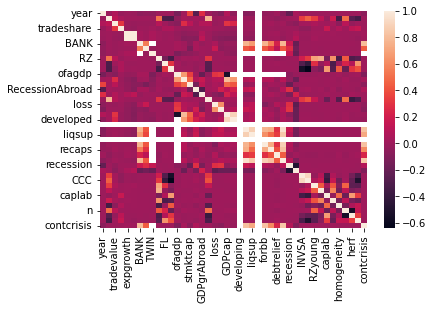

In [11]:
sns.heatmap(df.corr())

In [12]:
df.head().style.background_gradient(cmap = "inferno")

,exporter,year,product,tradevalue,tradeshare,expgrowth,expgrowthTRIM,BANK,BANK_W3,TWIN,RZ,FL,TANG,ofagdp,pcrdbofgdp,stmktcap,RecessionAbroad,GDPgrAbroad,durables,loss,loss2,GDPcap,developed,developing,blanguar,liqsup,forba,forbb,recaps,debtrelief,policytot,recession,GDPgr,INVSA,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis
0,ARG,1980.00,3111,1095742.60,nan,nan,nan,0.00,0,0.00,0.14,0.11,0.37,nan,nan,0.05,0.00,0.00,0,0.00,0.00,7550.76,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,4.15,0.08,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
1,ARG,1981.00,3111,1053351.37,nan,-0.04,-0.04,0.00,0,0.00,0.14,0.11,0.37,nan,nan,0.04,0.00,0.00,0,0.00,0.00,7014.13,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,-5.69,0.08,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
2,ARG,1982.00,3111,852470.14,nan,-0.21,-0.21,0.00,0,0.00,0.14,0.11,0.37,nan,nan,0.02,0.19,-0.01,0,0.00,0.00,6565.69,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,-4.96,0.08,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
3,ARG,1983.00,3111,644636.74,0.25,-0.28,-0.28,0.00,0,0.00,0.14,0.11,0.37,nan,nan,0.01,0.28,0.63,0,0.00,0.00,6716.93,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,3.88,0.08,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0
4,ARG,1984.00,3111,448148.08,0.24,-0.36,-0.36,0.00,0,0.00,0.14,0.11,0.37,nan,nan,0.02,0.13,2.76,0,0.00,0.00,6762.18,0,0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,2.21,0.08,0.43,0.66,0.05,25.17,0.01,0.00,1.33,0.50,1.23,0


In [13]:
df.describe().T.style.background_gradient(cmap = "viridis")

,count,mean,std,min,25%,50%,75%,max
year,20000.00,1993.53,7.66,1980.00,1987.00,1994.00,2000.00,2006.00
product,20000.00,3498.66,288.83,3111.00,3214.00,3522.00,3822.00,3909.00
tradevalue,20000.00,787266.61,4166781.66,1.00,1972.88,21189.12,176824.44,136029777.56
tradeshare,18072.00,0.01,0.04,0.00,0.00,0.00,0.01,0.91
expgrowth,19183.00,0.11,0.77,-6.43,-0.10,0.08,0.29,8.63
expgrowthTRIM,17192.00,0.10,0.36,-1.53,-0.07,0.08,0.26,1.51
BANK,19892.00,0.04,0.21,0.00,0.00,0.00,0.00,1.00
BANK_W3,20000.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
TWIN,19117.00,0.01,0.07,0.00,0.00,0.00,0.00,1.00
RZ,19233.00,0.30,0.33,-0.45,0.14,0.24,0.45,1.49


In [14]:
df.columns

Index(['exporter', 'year', 'product', 'tradevalue', 'tradeshare', 'expgrowth',
       'expgrowthTRIM', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG',
       'ofagdp', 'pcrdbofgdp', 'stmktcap', 'RecessionAbroad', 'GDPgrAbroad',
       'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing',
       'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief',
       'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung',
       'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout',
       'contcrisis'],
      dtype='object')

Target Variable: contcrisis
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup'

  2%|▏         | 1/42 [00:00<00:04, 10.00it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09963107109069824}


  5%|▍         | 2/42 [00:00<00:10,  3.74it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.38235902786254883}
{'Model': 'BayesianRidge', 'R-Squared': 0.8048257514502983, 'Adjusted R-Squared': 0.802704292226932, 'RMSE': 0.07626964463342575, 'Time taken': 0.08291792869567871}


 10%|▉         | 4/42 [00:00<00:06,  6.01it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12833690643310547}
{'Model': 'DummyRegressor', 'R-Squared': -0.00024233492915270993, 'Adjusted R-Squared': -0.011114534221861039, 'RMSE': 0.17266053444910334, 'Time taken': 0.03344273567199707}
{'Model': 'ElasticNet', 'R-Squared': -0.00024233578506849263, 'Adjusted R-Squared': -0.011114535087080046, 'RMSE': 0.17266053, 'Time taken': 0.05249667167663574}


 19%|█▉        | 8/42 [00:01<00:05,  5.74it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8044991311476946, 'Adjusted R-Squared': 0.8023741217036477, 'RMSE': 0.07633343, 'Time taken': 0.5400006771087646}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1104118824005127}


 24%|██▍       | 10/42 [00:02<00:08,  3.81it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.7528026103973389}
{'Model': 'GammaRegressor', 'R-Squared': 0.7282815809991054, 'Adjusted R-Squared': 0.7253281199230088, 'RMSE': 0.08999119199516681, 'Time taken': 0.11842131614685059}


 29%|██▊       | 12/42 [01:15<07:05, 14.17s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -10.429410436519259, 'Adjusted R-Squared': -10.553643158655339, 'RMSE': 0.5836498513810193, 'Time taken': 73.04283308982849}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7441123787465393, 'Adjusted R-Squared': 0.7413309915590017, 'RMSE': 0.08733033043950103, 'Time taken': 0.1265726089477539}


 31%|███       | 13/42 [01:21<05:46, 11.96s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992943212, 'Adjusted R-Squared': 0.9999999992866507, 'RMSE': 4.586105327725861e-06, 'Time taken': 6.312197685241699}


 33%|███▎      | 14/42 [01:22<04:02,  8.66s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999990877199182, 'Adjusted R-Squared': 0.9999990778038303, 'RMSE': 0.00016489388915363442, 'Time taken': 0.42829298973083496}


 36%|███▌      | 15/42 [01:23<02:58,  6.60s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7226582099311161, 'Adjusted R-Squared': 0.7196436252564542, 'RMSE': 0.09091763331854923, 'Time taken': 1.583620548248291}


 38%|███▊      | 16/42 [01:30<02:53,  6.69s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.958059936544684, 'Adjusted R-Squared': 0.9576040662897349, 'RMSE': 0.035355339059327376, 'Time taken': 6.877752065658569}


 40%|████      | 17/42 [01:46<03:56,  9.45s/it]

{'Model': 'KernelRidge', 'R-Squared': -34.66707718763342, 'Adjusted R-Squared': -35.05476280923813, 'RMSE': 1.031037, 'Time taken': 16.032553672790527}
{'Model': 'Lars', 'R-Squared': -45.347156947294785, 'Adjusted R-Squared': -45.85093039237408, 'RMSE': 1.1753088711221142, 'Time taken': 0.09846115112304688}


 45%|████▌     | 19/42 [01:47<01:59,  5.21s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7449907806032425, 'Adjusted R-Squared': 0.7422189412619734, 'RMSE': 0.08718030936762296, 'Time taken': 0.27265477180480957}
{'Model': 'Lasso', 'R-Squared': -0.00024233578506849263, 'Adjusted R-Squared': -0.011114535087080046, 'RMSE': 0.17266053, 'Time taken': 0.05716133117675781}


 52%|█████▏    | 22/42 [01:47<00:51,  2.56s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8045154804578589, 'Adjusted R-Squared': 0.8023906487237052, 'RMSE': 0.076330245, 'Time taken': 0.48659491539001465}
{'Model': 'LassoLars', 'R-Squared': -0.00024234163672298692, 'Adjusted R-Squared': -0.011114541002339662, 'RMSE': 0.1726605350280294, 'Time taken': 0.10064530372619629}


 60%|█████▉    | 25/42 [01:48<00:21,  1.24s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.804752603536037, 'Adjusted R-Squared': 0.802630349226646, 'RMSE': 0.07628393556279009, 'Time taken': 0.3016667366027832}
{'Model': 'LassoLarsIC', 'R-Squared': 0.803378477684408, 'Adjusted R-Squared': 0.8012412872244559, 'RMSE': 0.07655190313120844, 'Time taken': 0.09211230278015137}
{'Model': 'LinearRegression', 'R-Squared': 0.8048862590827666, 'Adjusted R-Squared': 0.8027654575510574, 'RMSE': 0.076257825, 'Time taken': 0.07197976112365723}


 62%|██████▏   | 26/42 [01:54<00:37,  2.32s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.5805996342465831, 'Adjusted R-Squared': 0.5760409346188285, 'RMSE': 0.1118033630468013, 'Time taken': 6.046568870544434}


 64%|██████▍   | 27/42 [01:57<00:39,  2.65s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9440769681849126, 'Adjusted R-Squared': 0.9434691091434443, 'RMSE': 0.04082590484659565, 'Time taken': 3.663764715194702}


 71%|███████▏  | 30/42 [10:24<15:16, 76.35s/it] 

{'Model': 'NuSVR', 'R-Squared': 0.9822853063316838, 'Adjusted R-Squared': 0.9820927553135499, 'RMSE': 0.022977738797997024, 'Time taken': 506.4260239601135}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7624145491983907, 'Adjusted R-Squared': 0.7598320986461993, 'RMSE': 0.08414927640405406, 'Time taken': 0.05117201805114746}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7739107313876119, 'Adjusted R-Squared': 0.7714532393374772, 'RMSE': 0.08208814455071227, 'Time taken': 0.1455376148223877}


 76%|███████▌  | 32/42 [10:24<07:20, 44.05s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5372304596863906, 'Adjusted R-Squared': 0.5322003559873296, 'RMSE': 0.11744184024946434, 'Time taken': 0.1070868968963623}
{'Model': 'PoissonRegressor', 'R-Squared': 0.7492656887750281, 'Adjusted R-Squared': 0.7465403158269306, 'RMSE': 0.08644648696164711, 'Time taken': 0.15427279472351074}


 79%|███████▊  | 33/42 [10:25<04:53, 32.57s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [10:28<01:23, 13.86s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 3.3290700912475586}
{'Model': 'Ridge', 'R-Squared': 0.8048804894770718, 'Adjusted R-Squared': 0.8027596252322573, 'RMSE': 0.07625895, 'Time taken': 0.058474063873291016}
{'Model': 'RidgeCV', 'R-Squared': 0.8048341300689891, 'Adjusted R-Squared': 0.802712761917565, 'RMSE': 0.07626800752931694, 'Time taken': 0.11104941368103027}


 88%|████████▊ | 37/42 [10:28<00:52, 10.59s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7991393193855687, 'Adjusted R-Squared': 0.7969560511180205, 'RMSE': 0.07737273164093589, 'Time taken': 0.13799118995666504}


 90%|█████████ | 38/42 [10:30<00:33,  8.30s/it]

{'Model': 'SVR', 'R-Squared': 0.9107424726371789, 'Adjusted R-Squared': 0.9097722821223656, 'RMSE': 0.05157780914007244, 'Time taken': 1.5638656616210938}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8048862590827666, 'Adjusted R-Squared': 0.8027654575510574, 'RMSE': 0.076257825, 'Time taken': 0.06040787696838379}


 95%|█████████▌| 40/42 [10:30<00:09,  4.86s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7441123787465393, 'Adjusted R-Squared': 0.7413309915590017, 'RMSE': 0.08733033043950103, 'Time taken': 0.18993520736694336}


 98%|█████████▊| 41/42 [10:32<00:04,  4.10s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999947193093, 'Adjusted R-Squared': 0.9999999946619105, 'RMSE': 1.2545438e-05, 'Time taken': 1.5622575283050537}


100%|██████████| 42/42 [10:32<00:00, 15.06s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992943212, 'Adjusted R-Squared': 0.9999999992866507, 'RMSE': 4.586105231633505e-06, 'Time taken': 0.22924113273620605}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: contcrisis
contcrisis
Target Standard Deviation: 0.1651514338228706
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.10
ExtraTreeRegressor                           1.00       1.00  0.00        0.11
RandomForestRegressor                        1.00       1.00  0.00        3.33
DecisionTreeRegressor                        1.00       1.00  0.00        0.13
BaggingRegressor                             1.00       1.00  0.00        0.38
ExtraTreesRegressor                          1.00       1.00  0.00        0.75
GradientBoostingRegressor                    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.728146,0.246733,0.496722,00:17
1,0.058390,0.029452,0.171615,00:17
2,0.048088,0.098911,0.314502,00:16


Better model found at epoch 0 with _rmse value: 0.4967220425605774.
Better model found at epoch 1 with _rmse value: 0.17161503434181213.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       2       2.00
XGBoost RMSE:  1.2545438e-05


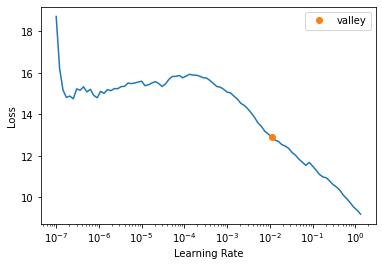

<Figure size 720x720 with 0 Axes>

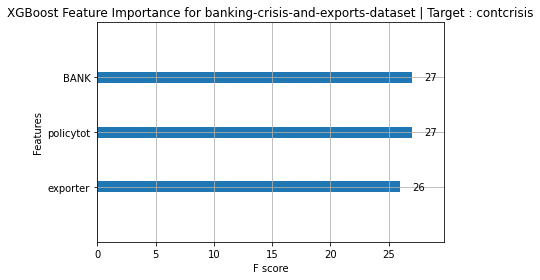

Target Variable: intout
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'f

  2%|▏         | 1/42 [00:03<02:35,  3.78s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9540867025899258, 'Adjusted R-Squared': 0.9535876450093815, 'RMSE': 1.7224723335178331, 'Time taken': 3.783849000930786}


  7%|▋         | 3/42 [00:04<00:45,  1.17s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.8445286750793457}
{'Model': 'BayesianRidge', 'R-Squared': 0.7942696705831248, 'Adjusted R-Squared': 0.7920334713503326, 'RMSE': 3.6461302065717387, 'Time taken': 0.10764360427856445}


 10%|▉         | 4/42 [00:04<00:30,  1.26it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.22679662704467773}
{'Model': 'DummyRegressor', 'R-Squared': -0.00019738325839480098, 'Adjusted R-Squared': -0.011069093945986097, 'RMSE': 8.039441324893556, 'Time taken': 0.03333592414855957}
{'Model': 'ElasticNet', 'R-Squared': 0.56705792088384, 'Adjusted R-Squared': 0.5623520287195338, 'RMSE': 5.289296, 'Time taken': 0.05283999443054199}


 19%|█▉        | 8/42 [00:05<00:12,  2.77it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7941122354023865, 'Adjusted R-Squared': 0.7918743249176299, 'RMSE': 3.647525, 'Time taken': 0.5332865715026855}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13894295692443848}


 24%|██▍       | 10/42 [00:08<00:23,  1.35it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.771411180496216}
{'Model': 'GammaRegressor', 'R-Squared': 0.5439135612371117, 'Adjusted R-Squared': 0.5389560999462106, 'RMSE': 5.428834378061638, 'Time taken': 0.12254095077514648}


 29%|██▊       | 12/42 [01:21<07:21, 14.72s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.3146149202278965, 'Adjusted R-Squared': -0.32890421283906934, 'RMSE': 9.216845156890955, 'Time taken': 72.99331617355347}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.545207517895103, 'Adjusted R-Squared': 0.5402641213504846, 'RMSE': 5.421127871931392, 'Time taken': 0.15427565574645996}


 31%|███       | 13/42 [01:28<06:04, 12.56s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9997730131067049, 'Adjusted R-Squared': 0.9997705458578647, 'RMSE': 0.12111094792112456, 'Time taken': 7.1405251026153564}


 33%|███▎      | 14/42 [01:30<04:22,  9.38s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992907886, 'Adjusted R-Squared': 0.9999999992830798, 'RMSE': 0.00021407741032195205, 'Time taken': 1.5822937488555908}


 36%|███▌      | 15/42 [01:31<03:06,  6.92s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7683813424667167, 'Adjusted R-Squared': 0.7658637483630941, 'RMSE': 3.8687421304540135, 'Time taken': 0.9684092998504639}


 38%|███▊      | 16/42 [01:38<02:59,  6.91s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9348666203578269, 'Adjusted R-Squared': 0.9341586488399771, 'RMSE': 2.0515628189260986, 'Time taken': 6.878692865371704}


 40%|████      | 17/42 [01:53<03:54,  9.37s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.9098305694845954, 'Adjusted R-Squared': -2.9523287278485584, 'RMSE': 15.895053, 'Time taken': 15.205963134765625}
{'Model': 'Lars', 'R-Squared': 0.7942691501210174, 'Adjusted R-Squared': 0.7920329452310284, 'RMSE': 3.6461348186078357, 'Time taken': 0.0810549259185791}


 45%|████▌     | 19/42 [01:53<01:58,  5.15s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7943435772121765, 'Adjusted R-Squared': 0.7921081813123089, 'RMSE': 3.645475229254655, 'Time taken': 0.2739701271057129}
{'Model': 'Lasso', 'R-Squared': 0.6363671782039328, 'Adjusted R-Squared': 0.6324146475322365, 'RMSE': 4.8474636, 'Time taken': 0.0576930046081543}


 50%|█████     | 21/42 [01:54<01:07,  3.23s/it]

{'Model': 'LassoCV', 'R-Squared': 0.794385521824053, 'Adjusted R-Squared': 0.7921505818438797, 'RMSE': 3.6451035, 'Time taken': 0.5081324577331543}
{'Model': 'LassoLars', 'R-Squared': -0.0001973839784343845, 'Adjusted R-Squared': -0.011069094673852309, 'RMSE': 8.039441327787342, 'Time taken': 0.05467867851257324}


 60%|█████▉    | 25/42 [01:54<00:24,  1.42s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7943675741814812, 'Adjusted R-Squared': 0.7921324391182364, 'RMSE': 3.6452625373580294, 'Time taken': 0.2638554573059082}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7939349139737001, 'Adjusted R-Squared': 0.7916950760821099, 'RMSE': 3.649095423410926, 'Time taken': 0.07953214645385742}
{'Model': 'LinearRegression', 'R-Squared': 0.7942696217318463, 'Adjusted R-Squared': 0.792033421968062, 'RMSE': 3.6461306, 'Time taken': 0.06409263610839844}


 62%|██████▏   | 26/42 [01:57<00:27,  1.70s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7285644093153177, 'Adjusted R-Squared': 0.7256140224600495, 'RMSE': 4.188093885643913, 'Time taken': 2.8339741230010986}


 64%|██████▍   | 27/42 [02:13<01:11,  4.74s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.999654743057922, 'Adjusted R-Squared': 0.9996509902650733, 'RMSE': 0.14936685017111584, 'Time taken': 15.635995864868164}


 71%|███████▏  | 30/42 [02:49<01:26,  7.23s/it]

{'Model': 'NuSVR', 'R-Squared': 0.944952581913953, 'Adjusted R-Squared': 0.9443542404130177, 'RMSE': 1.886042564932244, 'Time taken': 35.618727684020996}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7490150878606974, 'Adjusted R-Squared': 0.7462869909896179, 'RMSE': 4.027233587816493, 'Time taken': 0.04529976844787598}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7546589882783085, 'Adjusted R-Squared': 0.7519922381508988, 'RMSE': 3.9816959081605257, 'Time taken': 0.14125537872314453}


 74%|███████▍  | 31/42 [02:49<01:02,  5.65s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5450238730688879, 'Adjusted R-Squared': 0.5400784803848541, 'RMSE': 5.4222222849258905, 'Time taken': 0.15047883987426758}


 76%|███████▌  | 32/42 [02:49<00:43,  4.34s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7535465642877907, 'Adjusted R-Squared': 0.7508677225952667, 'RMSE': 3.9907125917241273, 'Time taken': 0.25803256034851074}


 79%|███████▊  | 33/42 [02:50<00:29,  3.32s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7132709032165667, 'Adjusted R-Squared': 0.7101542825993554, 'RMSE': 4.304462, 'Time taken': 0.3843264579772949}


 81%|████████  | 34/42 [02:58<00:36,  4.61s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 8.097712516784668}
{'Model': 'Ridge', 'R-Squared': 0.7942693565160824, 'Adjusted R-Squared': 0.7920331538695181, 'RMSE': 3.646133, 'Time taken': 0.05599331855773926}


 86%|████████▌ | 36/42 [02:58<00:15,  2.66s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.7942693670369505, 'Adjusted R-Squared': 0.7920331645047434, 'RMSE': 3.6461328964242026, 'Time taken': 0.20459699630737305}


 88%|████████▊ | 37/42 [02:58<00:10,  2.09s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7924415382844101, 'Adjusted R-Squared': 0.7901854680483711, 'RMSE': 3.6622942454179324, 'Time taken': 0.22411131858825684}


 90%|█████████ | 38/42 [03:26<00:34,  8.63s/it]

{'Model': 'SVR', 'R-Squared': 0.9438602917778427, 'Adjusted R-Squared': 0.9432500775580366, 'RMSE': 1.9046627508636116, 'Time taken': 27.980573415756226}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7942696217318463, 'Adjusted R-Squared': 0.792033421968062, 'RMSE': 3.6461306, 'Time taken': 0.0714883804321289}


 95%|█████████▌| 40/42 [03:26<00:10,  5.06s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.545207517895103, 'Adjusted R-Squared': 0.5402641213504846, 'RMSE': 5.421127871931392, 'Time taken': 0.16333556175231934}


 98%|█████████▊| 41/42 [03:28<00:04,  4.16s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999922157, 'Adjusted R-Squared': 0.9999999999921311, 'RMSE': 2.2428123e-05, 'Time taken': 1.1518564224243164}


100%|██████████| 42/42 [03:28<00:00,  4.97s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992939367, 'Adjusted R-Squared': 0.999999999286262, 'RMSE': 0.00021360175717471272, 'Time taken': 0.6043226718902588}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: intout
intout
Target Standard Deviation: 7.987248342817678
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.23
RandomForestRegressor                        1.00       1.00  0.00        8.10
BaggingRegressor                             1.00       1.00  0.00        0.84
ExtraTreeRegressor                           1.00       1.00  0.00        0.14
ExtraTreesRegressor                          1.00       1.00  0.00        2.77
XGBRegressor                                 1.00       1.00  0.00        1.15
LGBMRegressor                                1.00      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,56.746456,61.576973,7.847099,00:17
1,23.512369,20.421555,4.519021,00:17
2,7.200241,8.923549,2.987231,00:17
3,7.843350,34.809738,5.899978,00:17


Better model found at epoch 0 with _rmse value: 7.8470988273620605.
Better model found at epoch 1 with _rmse value: 4.519021034240723.
Better model found at epoch 2 with _rmse value: 2.9872305393218994.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       6       6.00
1       6       6.00
2      26      26.00
3       1       1.00
4      26      26.00
XGBoost RMSE:  2.2428123e-05


<Figure size 432x288 with 0 Axes>

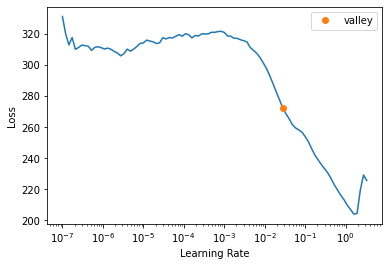

<Figure size 720x720 with 0 Axes>

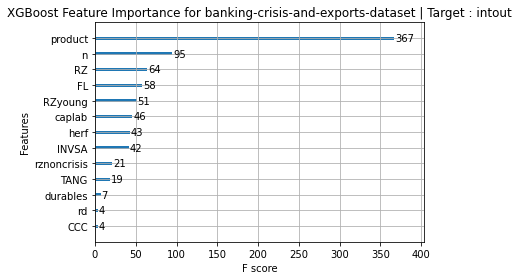

Target Variable: herf
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'for

  2%|▏         | 1/42 [00:03<02:28,  3.63s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9492297854456051, 'Adjusted R-Squared': 0.9486779352874052, 'RMSE': 1.823012981507658, 'Time taken': 3.632997512817383}


  7%|▋         | 3/42 [00:04<00:43,  1.12s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.8113977909088135}
{'Model': 'BayesianRidge', 'R-Squared': 0.5894398669122576, 'Adjusted R-Squared': 0.5849772567699996, 'RMSE': 5.184103333159337, 'Time taken': 0.1036534309387207}


 10%|▉         | 4/42 [00:04<00:28,  1.32it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1949152946472168}
{'Model': 'DummyRegressor', 'R-Squared': -1.1923521995971242e-05, 'Adjusted R-Squared': -0.010881618342887256, 'RMSE': 8.090732657887433, 'Time taken': 0.03242778778076172}
{'Model': 'ElasticNet', 'R-Squared': 0.32660495517802623, 'Adjusted R-Squared': 0.31928544382126567, 'RMSE': 6.6392684, 'Time taken': 0.045433998107910156}


 17%|█▋        | 7/42 [00:05<00:14,  2.49it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5891246978189839, 'Adjusted R-Squared': 0.5846586619257119, 'RMSE': 5.186093, 'Time taken': 0.496063232421875}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08629775047302246}


 24%|██▍       | 10/42 [00:08<00:19,  1.61it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.5262558460235596}
{'Model': 'GammaRegressor', 'R-Squared': 0.31866464964459196, 'Adjusted R-Squared': 0.3112588306189896, 'RMSE': 6.678296904851553, 'Time taken': 0.17219901084899902}


 29%|██▊       | 12/42 [01:19<06:21, 12.71s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.027577432565826676, 'Adjusted R-Squared': 0.01700762205023776, 'RMSE': 7.978344343824423, 'Time taken': 70.7509822845459}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.33479190502491796, 'Adjusted R-Squared': 0.32756138225344966, 'RMSE': 6.598785700885502, 'Time taken': 0.16719651222229004}


 31%|███       | 13/42 [01:26<05:26, 11.26s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9993799431508589, 'Adjusted R-Squared': 0.9993732034024987, 'RMSE': 0.20146565327393595, 'Time taken': 7.175171613693237}


 33%|███▎      | 14/42 [01:27<04:01,  8.61s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992944738, 'Adjusted R-Squared': 0.999999999286805, 'RMSE': 0.00021490267664004596, 'Time taken': 1.5329704284667969}


 36%|███▌      | 15/42 [01:28<02:55,  6.50s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5455302445020294, 'Adjusted R-Squared': 0.5405903558553122, 'RMSE': 5.454284096167859, 'Time taken': 1.0634899139404297}


 38%|███▊      | 16/42 [01:36<02:54,  6.70s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9232258878425302, 'Adjusted R-Squared': 0.9223913866234273, 'RMSE': 2.2417783119657484, 'Time taken': 7.2122156620025635}


 43%|████▎     | 18/42 [01:51<02:36,  6.51s/it]

{'Model': 'KernelRidge', 'R-Squared': -1.6010646921792042, 'Adjusted R-Squared': -1.6293371344855, 'RMSE': 13.048508, 'Time taken': 15.161315679550171}
{'Model': 'Lars', 'R-Squared': 0.5893565698590022, 'Adjusted R-Squared': 0.5848930543139914, 'RMSE': 5.1846291984300015, 'Time taken': 0.10412240028381348}


 45%|████▌     | 19/42 [01:51<01:47,  4.66s/it]

{'Model': 'LarsCV', 'R-Squared': 0.589279890189669, 'Adjusted R-Squared': 0.5848155411699915, 'RMSE': 5.1851132401388895, 'Time taken': 0.25986790657043457}
{'Model': 'Lasso', 'R-Squared': 0.3545018929990208, 'Adjusted R-Squared': 0.347485609227271, 'RMSE': 6.5002904, 'Time taken': 0.07785558700561523}


 52%|█████▏    | 22/42 [01:52<00:40,  2.04s/it]

{'Model': 'LassoCV', 'R-Squared': 0.5893835079778675, 'Adjusted R-Squared': 0.5849202852384965, 'RMSE': 5.184459, 'Time taken': 0.5335268974304199}
{'Model': 'LassoLars', 'R-Squared': -1.192322894238984e-05, 'Adjusted R-Squared': -0.010881618046648445, 'RMSE': 8.090732656701938, 'Time taken': 0.10674595832824707}


 60%|█████▉    | 25/42 [01:52<00:16,  1.06it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.589279890189669, 'Adjusted R-Squared': 0.5848155411699915, 'RMSE': 5.1851132401388895, 'Time taken': 0.2603127956390381}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5889636584799449, 'Adjusted R-Squared': 0.5844958721590747, 'RMSE': 5.18710898089804, 'Time taken': 0.08103251457214355}
{'Model': 'LinearRegression', 'R-Squared': 0.589479838441938, 'Adjusted R-Squared': 0.5850176627728285, 'RMSE': 5.1838512, 'Time taken': 0.08421540260314941}


 62%|██████▏   | 26/42 [01:55<00:21,  1.31s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.43330446992683735, 'Adjusted R-Squared': 0.4271447359043029, 'RMSE': 6.090601083309486, 'Time taken': 2.5293030738830566}


 64%|██████▍   | 27/42 [02:15<01:32,  6.17s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9995951572563895, 'Adjusted R-Squared': 0.999590756791785, 'RMSE': 0.1627902692846183, 'Time taken': 20.71071171760559}


 67%|██████▋   | 28/42 [02:50<03:11, 13.69s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9158751448073966, 'Adjusted R-Squared': 0.914960744207477, 'RMSE': 2.3466451735577856, 'Time taken': 34.746607542037964}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.49736416906433323, 'Adjusted R-Squared': 0.49190073611938034, 'RMSE': 5.7360375291446255, 'Time taken': 0.05265045166015625}


 74%|███████▍  | 31/42 [02:51<01:06,  6.04s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5214064970534442, 'Adjusted R-Squared': 0.5162043937605468, 'RMSE': 5.597172106879756, 'Time taken': 0.15589427947998047}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.08733794502087922, 'Adjusted R-Squared': 0.0774177052928452, 'RMSE': 7.72930169286757, 'Time taken': 0.12589550018310547}


 76%|███████▌  | 32/42 [02:51<00:46,  4.61s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.5420224592927025, 'Adjusted R-Squared': 0.537044442545884, 'RMSE': 5.475292843822716, 'Time taken': 0.32146763801574707}


 79%|███████▊  | 33/42 [02:51<00:31,  3.50s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.38676929054793174, 'Adjusted R-Squared': 0.38010373935823527, 'RMSE': 6.335738, 'Time taken': 0.40394020080566406}


 81%|████████  | 34/42 [02:59<00:37,  4.65s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 7.713204622268677}
{'Model': 'Ridge', 'R-Squared': 0.5894750983361507, 'Adjusted R-Squared': 0.5850128711441523, 'RMSE': 5.183881, 'Time taken': 0.04949831962585449}


 86%|████████▌ | 36/42 [02:59<00:15,  2.66s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.5894752007597086, 'Adjusted R-Squared': 0.5850129746810098, 'RMSE': 5.183880249811901, 'Time taken': 0.17334985733032227}


 88%|████████▊ | 37/42 [03:00<00:10,  2.09s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.5865689857959184, 'Adjusted R-Squared': 0.5820751704241349, 'RMSE': 5.202196927900511, 'Time taken': 0.28339195251464844}


 90%|█████████ | 38/42 [03:31<00:38,  9.50s/it]

{'Model': 'SVR', 'R-Squared': 0.9170024798457014, 'Adjusted R-Squared': 0.9161003328875025, 'RMSE': 2.3308687542760005, 'Time taken': 31.227635145187378}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.589479838441938, 'Adjusted R-Squared': 0.5850176627728285, 'RMSE': 5.1838512, 'Time taken': 0.07779908180236816}


 95%|█████████▌| 40/42 [03:31<00:11,  5.56s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.33479190502491796, 'Adjusted R-Squared': 0.32756138225344966, 'RMSE': 6.598785700885502, 'Time taken': 0.1750953197479248}


 98%|█████████▊| 41/42 [03:32<00:04,  4.57s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999920858, 'Adjusted R-Squared': 0.9999999999919997, 'RMSE': 2.2760953e-05, 'Time taken': 1.2756686210632324}


100%|██████████| 42/42 [03:33<00:00,  5.08s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944837, 'Adjusted R-Squared': 0.999999999286815, 'RMSE': 0.0002149011744780628, 'Time taken': 0.7322690486907959}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: herf
herf
Target Standard Deviation: 7.995016703537508
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.19
RandomForestRegressor                        1.00       1.00  0.00        7.71
BaggingRegressor                             1.00       1.00  0.00        0.81
ExtraTreeRegressor                           1.00       1.00  0.00        0.09
ExtraTreesRegressor                          1.00       1.00  0.00        2.53
XGBRegressor                                 1.00       1.00  0.00        1.28
LGBMRegressor                                1.00       1.00

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,54.096512,61.751663,7.858223,00:17
1,10.515334,4.687440,2.165049,00:17
2,4.409272,6.998362,2.645442,00:17


Better model found at epoch 0 with _rmse value: 7.858222961425781.
Better model found at epoch 1 with _rmse value: 2.1650493144989014.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      10      10.00
1      12      12.00
2       3       3.00
3      14      14.00
4       4       4.00
XGBoost RMSE:  2.2760953e-05


<Figure size 432x288 with 0 Axes>

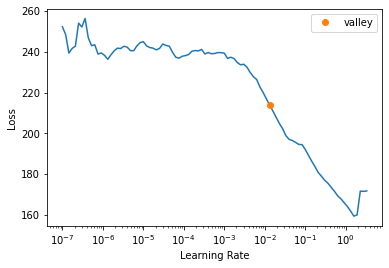

<Figure size 720x720 with 0 Axes>

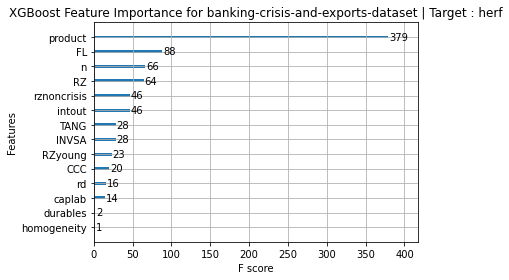

Target Variable: n
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba'

  2%|▏         | 1/42 [00:03<02:35,  3.79s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9450831233777334, 'Adjusted R-Squared': 0.9444862008057522, 'RMSE': 1.9202302181620015, 'Time taken': 3.7861833572387695}


  7%|▋         | 3/42 [00:04<00:46,  1.20s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.875401496887207}
{'Model': 'BayesianRidge', 'R-Squared': 0.8044683398565358, 'Adjusted R-Squared': 0.8023429957245416, 'RMSE': 3.6233386709890034, 'Time taken': 0.15459704399108887}


 14%|█▍        | 6/42 [00:05<00:14,  2.41it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.24368524551391602}
{'Model': 'DummyRegressor', 'R-Squared': -0.00012605929792552928, 'Adjusted R-Squared': -0.01099699472507698, 'RMSE': 8.194599955916091, 'Time taken': 0.03608822822570801}
{'Model': 'ElasticNet', 'R-Squared': 0.622165397045708, 'Adjusted R-Squared': 0.6180584991875091, 'RMSE': 5.03676, 'Time taken': 0.06760668754577637}


 19%|█▉        | 8/42 [00:05<00:12,  2.68it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8044182444441922, 'Adjusted R-Squared': 0.8022923557968464, 'RMSE': 3.623803, 'Time taken': 0.5927751064300537}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13991332054138184}


 24%|██▍       | 10/42 [00:08<00:25,  1.27it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.7343907356262207}
{'Model': 'GammaRegressor', 'R-Squared': 0.5846898742357477, 'Adjusted R-Squared': 0.5801756337383102, 'RMSE': 5.280641023316003, 'Time taken': 0.14868831634521484}


 29%|██▊       | 12/42 [01:21<07:44, 15.47s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.21656721691832215, 'Adjusted R-Squared': -0.22979077362395617, 'RMSE': 9.03791890006012, 'Time taken': 72.65687608718872}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6058481999600254, 'Adjusted R-Squared': 0.6015639412639386, 'RMSE': 5.1443693548512455, 'Time taken': 0.16898798942565918}


 31%|███       | 13/42 [01:28<06:17, 13.00s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999135323738896, 'Adjusted R-Squared': 0.9999125925083884, 'RMSE': 0.07619511929011792, 'Time taken': 7.162607431411743}


 33%|███▎      | 14/42 [01:30<04:27,  9.54s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992944534, 'Adjusted R-Squared': 0.9999999992867844, 'RMSE': 0.00021765228985182826, 'Time taken': 1.3782072067260742}


 36%|███▌      | 15/42 [01:31<03:09,  7.01s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7852424199709558, 'Adjusted R-Squared': 0.782908098448901, 'RMSE': 3.7972976113121395, 'Time taken': 1.0574696063995361}


 38%|███▊      | 16/42 [01:38<03:02,  7.01s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9534705063293959, 'Adjusted R-Squared': 0.952964750963411, 'RMSE': 1.7675208626774395, 'Time taken': 6.997470855712891}


 40%|████      | 17/42 [01:53<03:57,  9.50s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.334758497672193, 'Adjusted R-Squared': -3.3818754378642826, 'RMSE': 17.060148, 'Time taken': 15.3174729347229}
{'Model': 'Lars', 'R-Squared': -0.5360299207855526, 'Adjusted R-Squared': -0.5527258981853955, 'RMSE': 10.155474572241177, 'Time taken': 0.08041977882385254}


 45%|████▌     | 19/42 [01:53<01:59,  5.20s/it]

{'Model': 'LarsCV', 'R-Squared': 0.502403745852902, 'Adjusted R-Squared': 0.4969950909165205, 'RMSE': 5.780147705749566, 'Time taken': 0.2642652988433838}
{'Model': 'Lasso', 'R-Squared': 0.6693736778347102, 'Adjusted R-Squared': 0.6657799134633484, 'RMSE': 4.7116075, 'Time taken': 0.06417393684387207}


 52%|█████▏    | 22/42 [01:54<00:51,  2.56s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8046497049774022, 'Adjusted R-Squared': 0.8025263322054175, 'RMSE': 3.621658, 'Time taken': 0.5431411266326904}
{'Model': 'LassoLars', 'R-Squared': -0.00012605908884810724, 'Adjusted R-Squared': -0.010996994513726932, 'RMSE': 8.194599955059546, 'Time taken': 0.11027050018310547}


 60%|█████▉    | 25/42 [01:55<00:20,  1.23s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8046447508150749, 'Adjusted R-Squared': 0.8025213241934996, 'RMSE': 3.6217037928180082, 'Time taken': 0.2812633514404297}
{'Model': 'LassoLarsIC', 'R-Squared': 0.804214439208853, 'Adjusted R-Squared': 0.8020863352872101, 'RMSE': 3.625690386257272, 'Time taken': 0.08657479286193848}
{'Model': 'LinearRegression', 'R-Squared': 0.8044558581656874, 'Adjusted R-Squared': 0.8023303783631406, 'RMSE': 3.6234543, 'Time taken': 0.06531763076782227}


 62%|██████▏   | 26/42 [01:58<00:28,  1.78s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7356159917420848, 'Adjusted R-Squared': 0.7327422525218901, 'RMSE': 4.213257248218442, 'Time taken': 3.675016164779663}


 64%|██████▍   | 27/42 [02:20<01:41,  6.74s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9996693198932352, 'Adjusted R-Squared': 0.9996657255442486, 'RMSE': 0.1490062276413518, 'Time taken': 22.180624961853027}


 67%|██████▋   | 28/42 [02:57<03:21, 14.36s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9435397416598331, 'Adjusted R-Squared': 0.9429260431996139, 'RMSE': 1.9470262905970799, 'Time taken': 36.28906989097595}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7152826392387164, 'Adjusted R-Squared': 0.7121878853173981, 'RMSE': 4.372273895472258, 'Time taken': 0.051668643951416016}


 74%|███████▍  | 31/42 [02:57<01:10,  6.42s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7346822584401027, 'Adjusted R-Squared': 0.7317983699448865, 'RMSE': 4.220690737178414, 'Time taken': 0.15569543838500977}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.31581453314154906, 'Adjusted R-Squared': 0.30837773458873974, 'RMSE': 6.777777499840931, 'Time taken': 0.16713881492614746}


 76%|███████▌  | 32/42 [02:57<00:49,  4.90s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7559053512180309, 'Adjusted R-Squared': 0.7532521485138791, 'RMSE': 4.048363630695464, 'Time taken': 0.3429884910583496}


 79%|███████▊  | 33/42 [02:58<00:33,  3.72s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.6717191319127662, 'Adjusted R-Squared': 0.6681508616074702, 'RMSE': 4.6948657, 'Time taken': 0.3814115524291992}


 86%|████████▌ | 36/42 [03:06<00:16,  2.81s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 8.180079936981201}
{'Model': 'Ridge', 'R-Squared': 0.8044581919454691, 'Adjusted R-Squared': 0.8023327375100937, 'RMSE': 3.6234326, 'Time taken': 0.058539390563964844}
{'Model': 'RidgeCV', 'R-Squared': 0.8044582809075671, 'Adjusted R-Squared': 0.8023328274391711, 'RMSE': 3.6234318694767262, 'Time taken': 0.11340451240539551}


 88%|████████▊ | 37/42 [03:06<00:11,  2.20s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8028190141451682, 'Adjusted R-Squared': 0.8006757425597896, 'RMSE': 3.6385881613946904, 'Time taken': 0.2573704719543457}


 90%|█████████ | 38/42 [03:33<00:33,  8.35s/it]

{'Model': 'SVR', 'R-Squared': 0.942643227331711, 'Adjusted R-Squared': 0.942019784150534, 'RMSE': 1.9624235123406994, 'Time taken': 26.39215397834778}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8044558581656874, 'Adjusted R-Squared': 0.8023303783631406, 'RMSE': 3.6234543, 'Time taken': 0.06479120254516602}


 95%|█████████▌| 40/42 [03:33<00:09,  4.89s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.6058481999600254, 'Adjusted R-Squared': 0.6015639412639386, 'RMSE': 5.1443693548512455, 'Time taken': 0.18673324584960938}


 98%|█████████▊| 41/42 [03:34<00:04,  4.03s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999908241, 'Adjusted R-Squared': 0.9999999999907244, 'RMSE': 2.4821336e-05, 'Time taken': 1.1676669120788574}


100%|██████████| 42/42 [03:35<00:00,  5.13s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944032, 'Adjusted R-Squared': 0.9999999992867337, 'RMSE': 0.0002176600386905004, 'Time taken': 0.604546308517456}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: n
n
Target Standard Deviation: 8.201524153320529
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.24
RandomForestRegressor                        1.00       1.00  0.00        8.18
BaggingRegressor                             1.00       1.00  0.00        0.88
ExtraTreeRegressor                           1.00       1.00  0.00        0.14
ExtraTreesRegressor                          1.00       1.00  0.00        2.73
XGBRegressor                                 1.00       1.00  0.00        1.17
HistGradientBoostingRegressor                1.00       1.00  0.00

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,57.122765,55.165359,7.427338,00:17
1,9.269087,5.031024,2.242994,00:17
2,3.070800,1.710036,1.307684,00:17
3,3.009398,3.540743,1.881686,00:17


Better model found at epoch 0 with _rmse value: 7.427338123321533.
Better model found at epoch 1 with _rmse value: 2.2429943084716797.
Better model found at epoch 2 with _rmse value: 1.3076835870742798.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      25      25.00
1      23      23.00
2       3       3.00
3      11      11.00
4      25      25.00
XGBoost RMSE:  2.4821336e-05


<Figure size 432x288 with 0 Axes>

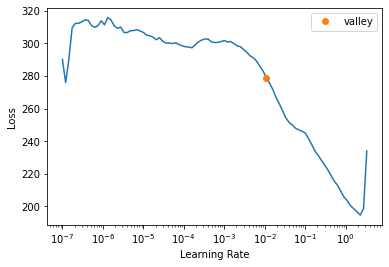

<Figure size 720x720 with 0 Axes>

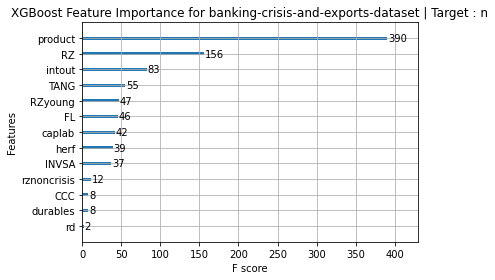

Target Variable: homogeneity
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup

  2%|▏         | 1/42 [00:00<00:18,  2.24it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6943821077194516, 'Adjusted R-Squared': 0.6910601741077065, 'RMSE': 0.21307723115560853, 'Time taken': 0.4470021724700928}


  5%|▍         | 2/42 [00:00<00:19,  2.03it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.5245580673217773}
{'Model': 'BayesianRidge', 'R-Squared': 0.40971722310520553, 'Adjusted R-Squared': 0.40330110596504465, 'RMSE': 0.2961267991912293, 'Time taken': 0.08250570297241211}


 10%|▉         | 4/42 [00:01<00:09,  3.82it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16479134559631348}
{'Model': 'DummyRegressor', 'R-Squared': -7.667472750516602e-05, 'Adjusted R-Squared': -0.01094707336584766, 'RMSE': 0.3854466767595746, 'Time taken': 0.0319521427154541}
{'Model': 'ElasticNet', 'R-Squared': -7.665489961294902e-05, 'Adjusted R-Squared': -0.010947053322434952, 'RMSE': 0.38544667, 'Time taken': 0.050939321517944336}


 19%|█▉        | 8/42 [00:01<00:07,  4.83it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.40970989403230584, 'Adjusted R-Squared': 0.4032936972283091, 'RMSE': 0.29612863, 'Time taken': 0.5428752899169922}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11382579803466797}


 24%|██▍       | 10/42 [00:04<00:16,  1.96it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999993268611028, 'Adjusted R-Squared': 0.9999993195443757, 'RMSE': 0.0003162277660168382, 'Time taken': 2.0245778560638428}
{'Model': 'GammaRegressor', 'R-Squared': 0.2688486377164142, 'Adjusted R-Squared': 0.2609013403002882, 'RMSE': 0.3295727556857277, 'Time taken': 0.14400172233581543}


 29%|██▊       | 12/42 [01:14<06:53, 13.79s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.8768839585671127, 'Adjusted R-Squared': -1.9081544363776248, 'RMSE': 0.6537456752406271, 'Time taken': 70.28718280792236}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.27120531866125575, 'Adjusted R-Squared': 0.26328363734235627, 'RMSE': 0.3290411799025326, 'Time taken': 0.1625380516052246}


 31%|███       | 13/42 [01:21<05:46, 11.96s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9883078338678005, 'Adjusted R-Squared': 0.988180745105494, 'RMSE': 0.04167687480157028, 'Time taken': 7.286332368850708}


 33%|███▎      | 14/42 [01:22<04:06,  8.79s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998309964855, 'Adjusted R-Squared': 0.9999998291594907, 'RMSE': 0.0001584511970850712, 'Time taken': 0.909529447555542}


 36%|███▌      | 15/42 [01:24<03:01,  6.72s/it]

{'Model': 'HuberRegressor', 'R-Squared': -0.2217399165584748, 'Adjusted R-Squared': -0.2350196982601973, 'RMSE': 0.42602691592094827, 'Time taken': 1.6649882793426514}


 38%|███▊      | 16/42 [01:30<02:51,  6.58s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5329089192586721, 'Adjusted R-Squared': 0.5278318422940924, 'RMSE': 0.2634198170221823, 'Time taken': 6.244574785232544}


 40%|████      | 17/42 [01:45<03:48,  9.13s/it]

{'Model': 'KernelRidge', 'R-Squared': -9.039179191308243, 'Adjusted R-Squared': -9.148300704257245, 'RMSE': 1.221228, 'Time taken': 15.200165033340454}
{'Model': 'Lars', 'R-Squared': 0.40963385960155196, 'Adjusted R-Squared': 0.4032168363363514, 'RMSE': 0.29614770891191705, 'Time taken': 0.07159757614135742}


 45%|████▌     | 19/42 [01:46<01:55,  5.03s/it]

{'Model': 'LarsCV', 'R-Squared': 0.4095370197845425, 'Adjusted R-Squared': 0.40311894391263536, 'RMSE': 0.29617199698672203, 'Time taken': 0.26631903648376465}
{'Model': 'Lasso', 'R-Squared': -7.665489961294902e-05, 'Adjusted R-Squared': -0.010947053322434952, 'RMSE': 0.38544667, 'Time taken': 0.05686187744140625}


 52%|█████▏    | 22/42 [01:46<00:49,  2.48s/it]

{'Model': 'LassoCV', 'R-Squared': 0.40964929021360974, 'Adjusted R-Squared': 0.4032324346724533, 'RMSE': 0.29614383, 'Time taken': 0.47794008255004883}
{'Model': 'LassoLars', 'R-Squared': -7.667364420926859e-05, 'Adjusted R-Squared': -0.010947072270776737, 'RMSE': 0.38544667655081427, 'Time taken': 0.10572624206542969}


 60%|█████▉    | 25/42 [01:47<00:20,  1.19s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.4095676894929706, 'Adjusted R-Squared': 0.40314994698745943, 'RMSE': 0.29616430503392144, 'Time taken': 0.2746732234954834}
{'Model': 'LassoLarsIC', 'R-Squared': 0.40980585456424024, 'Adjusted R-Squared': 0.4033907008095037, 'RMSE': 0.2961045665117464, 'Time taken': 0.08481144905090332}
{'Model': 'LinearRegression', 'R-Squared': 0.40960822522477525, 'Adjusted R-Squared': 0.40319092332504447, 'RMSE': 0.29615414, 'Time taken': 0.06598496437072754}


 62%|██████▏   | 26/42 [01:53<00:35,  2.22s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.22423033153144756, 'Adjusted R-Squared': -0.23753718296113724, 'RMSE': 0.42646090504765605, 'Time taken': 5.770236968994141}


 64%|██████▍   | 27/42 [02:18<01:56,  7.79s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9208824011311783, 'Adjusted R-Squared': 0.9200224272304302, 'RMSE': 0.10841370980348708, 'Time taken': 25.119386911392212}


 67%|██████▋   | 28/42 [06:19<15:52, 68.04s/it]

{'Model': 'NuSVR', 'R-Squared': 0.5633835505892064, 'Adjusted R-Squared': 0.55863771961735, 'RMSE': 0.2546816784487183, 'Time taken': 241.5195710659027}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.32226602158238693, 'Adjusted R-Squared': 0.3148993479039346, 'RMSE': 0.3173052708863645, 'Time taken': 0.06629180908203125}


 74%|███████▍  | 31/42 [06:20<05:31, 30.14s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.3336648492447677, 'Adjusted R-Squared': 0.32642207586699334, 'RMSE': 0.3146255722952413, 'Time taken': 0.16132473945617676}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.02922037924883658, 'Adjusted R-Squared': 0.018668426849367314, 'RMSE': 0.3797589185320684, 'Time taken': 0.14084196090698242}


 76%|███████▌  | 32/42 [06:20<03:46, 22.66s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.29536025515585795, 'Adjusted R-Squared': 0.2877011274945086, 'RMSE': 0.32354241615995244, 'Time taken': 0.13790082931518555}


 79%|███████▊  | 33/42 [06:20<02:31, 16.79s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [06:25<00:45,  7.65s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999978122985842, 'Adjusted R-Squared': 0.9999977885192209, 'RMSE': 0.0005700877125495695, 'Time taken': 4.8455095291137695}
{'Model': 'Ridge', 'R-Squared': 0.40963837152440463, 'Adjusted R-Squared': 0.4032213973018438, 'RMSE': 0.29614657, 'Time taken': 0.055541038513183594}
{'Model': 'RidgeCV', 'R-Squared': 0.4096742574539285, 'Adjusted R-Squared': 0.40325767329581896, 'RMSE': 0.29613757627110354, 'Time taken': 0.137223482131958}


 88%|████████▊ | 37/42 [06:25<00:29,  5.86s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.3997189760626719, 'Adjusted R-Squared': 0.39319418232422265, 'RMSE': 0.2986241756519816, 'Time taken': 0.14112281799316406}


 90%|█████████ | 38/42 [06:38<00:30,  7.67s/it]

{'Model': 'SVR', 'R-Squared': 0.604609897842456, 'Adjusted R-Squared': 0.6003121793407435, 'RMSE': 0.24235978203653114, 'Time taken': 12.970339298248291}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.40960822522477525, 'Adjusted R-Squared': 0.40319092332504447, 'RMSE': 0.29615414, 'Time taken': 0.06161856651306152}


 95%|█████████▌| 40/42 [06:38<00:08,  4.49s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.27120531866125575, 'Adjusted R-Squared': 0.26328363734235627, 'RMSE': 0.3290411799025326, 'Time taken': 0.17896056175231934}


 98%|█████████▊| 41/42 [06:40<00:03,  3.69s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999853585037, 'Adjusted R-Squared': 0.999999985199357, 'RMSE': 4.6638048e-05, 'Time taken': 1.0289931297302246}


100%|██████████| 42/42 [06:40<00:00,  9.53s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944381, 'Adjusted R-Squared': 0.9999999992867689, 'RMSE': 1.0238002448089008e-05, 'Time taken': 0.4350137710571289}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: homogeneity
homogeneity
Target Standard Deviation: 0.382617935250035
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.16
BaggingRegressor                             1.00       1.00  0.00        0.52
ExtraTreeRegressor                           1.00       1.00  0.00        0.11
LGBMRegressor                                1.00       1.00  0.00        0.44
XGBRegressor                                 1.00       1.00  0.00        1.03
HistGradientBoostingRegressor                1.00       1.00  0.00        0.91
ExtraTreesRegressor                         

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.434176,0.310470,0.557198,00:17
1,0.086011,0.052664,0.229485,00:17
2,0.028428,0.026925,0.164089,00:17
3,0.012786,0.003158,0.056200,00:17
4,0.004604,0.001077,0.032821,00:17
5,0.003649,0.006214,0.078829,00:17


Better model found at epoch 0 with _rmse value: 0.5571983456611633.
Better model found at epoch 1 with _rmse value: 0.2294853776693344.
Better model found at epoch 2 with _rmse value: 0.16408924758434296.
Better model found at epoch 3 with _rmse value: 0.056199878454208374.
Better model found at epoch 4 with _rmse value: 0.03282102197408676.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       2       2.00
XGBoost RMSE:  4.6638048e-05


<Figure size 432x288 with 0 Axes>

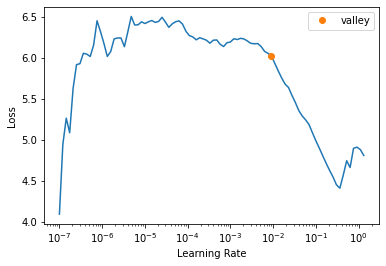

<Figure size 720x720 with 0 Axes>

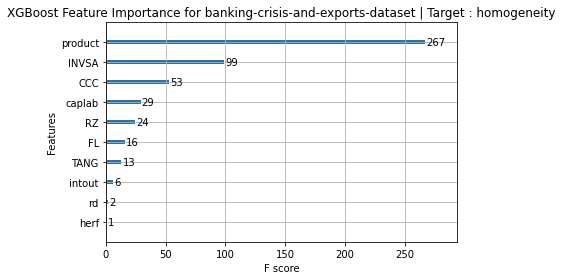

Target Variable: rd
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba

  2%|▏         | 1/42 [00:00<00:14,  2.84it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9394308047436679, 'Adjusted R-Squared': 0.9387724439256643, 'RMSE': 0.3434358851560774, 'Time taken': 0.351956844329834}


  5%|▍         | 2/42 [00:01<00:23,  1.74it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.7301483154296875}
{'Model': 'BayesianRidge', 'R-Squared': 0.7107554914274191, 'Adjusted R-Squared': 0.7076115293777172, 'RMSE': 0.750502825311712, 'Time taken': 0.07877874374389648}


 10%|▉         | 4/42 [00:01<00:11,  3.34it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.18949270248413086}
{'Model': 'DummyRegressor', 'R-Squared': -1.6248209622204968e-07, 'Adjusted R-Squared': -0.010869729465597278, 'RMSE': 1.3954677545204153, 'Time taken': 0.034609079360961914}
{'Model': 'ElasticNet', 'R-Squared': 0.32813551347774383, 'Adjusted R-Squared': 0.32083263862424105, 'RMSE': 1.1438277, 'Time taken': 0.04360365867614746}


 17%|█▋        | 7/42 [00:01<00:08,  4.34it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7107238054431851, 'Adjusted R-Squared': 0.707579498980611, 'RMSE': 0.75054395, 'Time taken': 0.458052396774292}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08532166481018066}


 24%|██▍       | 10/42 [00:04<00:15,  2.07it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.2985897064208984}
{'Model': 'GammaRegressor', 'R-Squared': 0.6084979217440987, 'Adjusted R-Squared': 0.6042424643717519, 'RMSE': 0.8731458741706247, 'Time taken': 0.12991905212402344}


 29%|██▊       | 12/42 [01:16<06:17, 12.59s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.13225264540433979, 'Adjusted R-Squared': -0.1445597393761262, 'RMSE': 1.4848802891847688, 'Time taken': 72.3940646648407}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6123641574900893, 'Adjusted R-Squared': 0.6081507244193294, 'RMSE': 0.8688238492166201, 'Time taken': 0.1666097640991211}


 31%|███       | 13/42 [01:24<05:25, 11.21s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9998989943925497, 'Adjusted R-Squared': 0.9998978965055122, 'RMSE': 0.014024665530534131, 'Time taken': 7.2289392948150635}


 33%|███▎      | 14/42 [01:25<03:58,  8.50s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999865193099, 'Adjusted R-Squared': 0.9999999863727806, 'RMSE': 0.00016202268804695524, 'Time taken': 1.1242256164550781}


 36%|███▌      | 15/42 [01:26<02:52,  6.40s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.6665226277869565, 'Adjusted R-Squared': 0.6628978737411625, 'RMSE': 0.8058476719512755, 'Time taken': 0.913179874420166}


 38%|███▊      | 16/42 [01:32<02:47,  6.44s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9331597601960043, 'Adjusted R-Squared': 0.9324332358503087, 'RMSE': 0.3607769393960761, 'Time taken': 6.537997245788574}


 40%|████      | 17/42 [01:48<03:44,  8.97s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.8933363457264933, 'Adjusted R-Squared': -2.9356552190496075, 'RMSE': 2.7534723, 'Time taken': 15.225898265838623}
{'Model': 'Lars', 'R-Squared': 0.710740169155394, 'Adjusted R-Squared': 0.707596040559257, 'RMSE': 0.7505227034006947, 'Time taken': 0.08108806610107422}


 45%|████▌     | 19/42 [01:48<01:55,  5.02s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7106979329538483, 'Adjusted R-Squared': 0.7075533452685641, 'RMSE': 0.7505774950926809, 'Time taken': 0.37012505531311035}
{'Model': 'Lasso', 'R-Squared': -1.6064191932230187e-07, 'Adjusted R-Squared': -0.0108697276054186, 'RMSE': 1.3954678, 'Time taken': 0.09424734115600586}


 50%|█████     | 21/42 [01:49<01:06,  3.17s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7107106764165972, 'Adjusted R-Squared': 0.7075662272472124, 'RMSE': 0.75056094, 'Time taken': 0.5174984931945801}
{'Model': 'LassoLars', 'R-Squared': -1.6246005873910008e-07, 'Adjusted R-Squared': -0.010869729443320209, 'RMSE': 1.3954677545050391, 'Time taken': 0.05687546730041504}


 60%|█████▉    | 25/42 [01:49<00:23,  1.41s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7106882824021044, 'Adjusted R-Squared': 0.7075435898195186, 'RMSE': 0.7505900138876935, 'Time taken': 0.2682027816772461}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7105493504779792, 'Adjusted R-Squared': 0.7074031477657833, 'RMSE': 0.7507702146749371, 'Time taken': 0.07984495162963867}
{'Model': 'LinearRegression', 'R-Squared': 0.7107422234423488, 'Adjusted R-Squared': 0.7075981171754178, 'RMSE': 0.75052005, 'Time taken': 0.06703782081604004}


 62%|██████▏   | 26/42 [01:54<00:35,  2.19s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.6375502109780646, 'Adjusted R-Squared': 0.633610539358261, 'RMSE': 0.8401245889765241, 'Time taken': 5.406361103057861}


 64%|██████▍   | 27/42 [02:02<00:50,  3.34s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9979797425869099, 'Adjusted R-Squared': 0.9979577832672024, 'RMSE': 0.06272246600674064, 'Time taken': 7.488073110580444}


 67%|██████▋   | 28/42 [04:29<08:44, 37.44s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9764660820180588, 'Adjusted R-Squared': 0.9762102785617334, 'RMSE': 0.21407546107133243, 'Time taken': 147.01117277145386}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6537183643105333, 'Adjusted R-Squared': 0.6499544334878218, 'RMSE': 0.8211726955912301, 'Time taken': 0.0630795955657959}


 74%|███████▍  | 31/42 [04:29<03:11, 17.39s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6691652951214123, 'Adjusted R-Squared': 0.6655692657205581, 'RMSE': 0.8026483197353939, 'Time taken': 0.21360325813293457}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.21264369503452507, 'Adjusted R-Squared': 0.20408547432837854, 'RMSE': 1.2382416985946842, 'Time taken': 0.12247753143310547}


 76%|███████▌  | 32/42 [04:30<02:12, 13.22s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7417330741895047, 'Adjusted R-Squared': 0.7389258249959123, 'RMSE': 0.7091762238660211, 'Time taken': 0.18238162994384766}


 79%|███████▊  | 33/42 [04:30<01:29,  9.92s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -5.831891421600546, 'Adjusted R-Squared': -5.90615111096577, 'RMSE': 3.6474576, 'Time taken': 0.3892323970794678}


 86%|████████▌ | 36/42 [04:37<00:30,  5.15s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 6.6798341274261475}
{'Model': 'Ridge', 'R-Squared': 0.7107400389709629, 'Adjusted R-Squared': 0.7075959089597778, 'RMSE': 0.75052285, 'Time taken': 0.04252171516418457}
{'Model': 'RidgeCV', 'R-Squared': 0.7107479021634433, 'Adjusted R-Squared': 0.7076038576217416, 'RMSE': 0.7505126711800445, 'Time taken': 0.09699177742004395}


 88%|████████▊ | 37/42 [04:37<00:19,  3.96s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7086399910527443, 'Adjusted R-Squared': 0.7054730344337524, 'RMSE': 0.7532423700332178, 'Time taken': 0.14276576042175293}


 95%|█████████▌| 40/42 [04:48<00:06,  3.42s/it]

{'Model': 'SVR', 'R-Squared': 0.9740101228338968, 'Adjusted R-Squared': 0.9737276241690478, 'RMSE': 0.22496858864628297, 'Time taken': 11.316229581832886}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7107422234423488, 'Adjusted R-Squared': 0.7075981171754178, 'RMSE': 0.75052005, 'Time taken': 0.05224108695983887}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6123641574900893, 'Adjusted R-Squared': 0.6081507244193294, 'RMSE': 0.8688238492166201, 'Time taken': 0.12158942222595215}


 98%|█████████▊| 41/42 [04:49<00:02,  2.87s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999998192098, 'Adjusted R-Squared': 0.9999999998172447, 'RMSE': 1.8763212e-05, 'Time taken': 1.0338921546936035}


100%|██████████| 42/42 [04:50<00:00,  6.92s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999294492, 'Adjusted R-Squared': 0.9999999992868235, 'RMSE': 3.7065575798054146e-05, 'Time taken': 0.46084094047546387}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: rd
rd
Target Standard Deviation: 1.3925201622754875
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.19
RandomForestRegressor                        1.00       1.00  0.00        6.68
ExtraTreeRegressor                           1.00       1.00  0.00        0.09
ExtraTreesRegressor                          1.00       1.00  0.00        2.30
BaggingRegressor                             1.00       1.00  0.00        0.73
XGBRegressor                                 1.00       1.00  0.00        1.03
LGBMRegressor                                1.00       1.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,2.418728,2.189519,1.479702,00:17
1,0.876411,1.353092,1.163225,00:17
2,0.337663,0.348096,0.589997,00:21
3,0.309636,0.213957,0.462555,00:17
4,0.267442,0.068905,0.262498,00:17
5,0.227856,0.449300,0.670298,00:17


Better model found at epoch 0 with _rmse value: 1.479702353477478.
Better model found at epoch 1 with _rmse value: 1.1632248163223267.
Better model found at epoch 2 with _rmse value: 0.5899966955184937.
Better model found at epoch 3 with _rmse value: 0.462554931640625.
Better model found at epoch 4 with _rmse value: 0.2624977231025696.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       4       4.00
1       3       3.00
2       2       2.00
3       2       2.00
4       2       2.00
XGBoost RMSE:  1.8763212e-05


<Figure size 432x288 with 0 Axes>

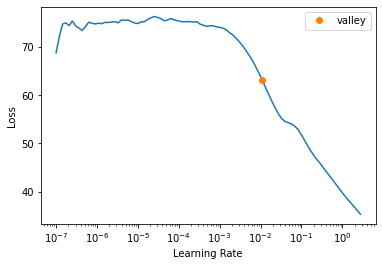

<Figure size 720x720 with 0 Axes>

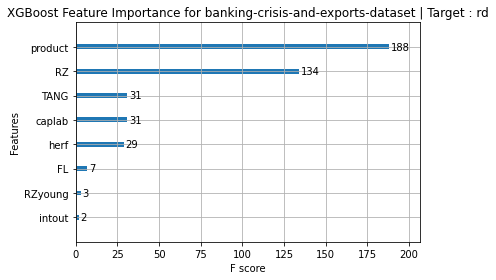

Target Variable: caplab
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'f

  2%|▏         | 1/42 [00:01<01:16,  1.87s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9145182704260801, 'Adjusted R-Squared': 0.913589121191581, 'RMSE': 2.826120062549735, 'Time taken': 1.8677897453308105}


  5%|▍         | 2/42 [00:02<00:51,  1.28s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.8743200302124023}
{'Model': 'BayesianRidge', 'R-Squared': 0.8487582348268733, 'Adjusted R-Squared': 0.8471143025967306, 'RMSE': 3.759151479270979, 'Time taken': 0.07031369209289551}


 10%|▉         | 4/42 [00:03<00:21,  1.77it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.20073246955871582}
{'Model': 'DummyRegressor', 'R-Squared': -7.295545232999245e-05, 'Adjusted R-Squared': -0.01094331366376844, 'RMSE': 9.666512107084243, 'Time taken': 0.0324399471282959}
{'Model': 'ElasticNet', 'R-Squared': 0.6423821277005268, 'Adjusted R-Squared': 0.638494976914663, 'RMSE': 5.7804756, 'Time taken': 0.04394102096557617}


 19%|█▉        | 8/42 [00:03<00:10,  3.36it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.848241007412788, 'Adjusted R-Squared': 0.8465914531455356, 'RMSE': 3.765574, 'Time taken': 0.44043397903442383}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14223027229309082}


 24%|██▍       | 10/42 [00:06<00:22,  1.41it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.859325647354126}
{'Model': 'GammaRegressor', 'R-Squared': 0.5989625080393439, 'Adjusted R-Squared': 0.5946034048658585, 'RMSE': 6.121339198867141, 'Time taken': 0.1390690803527832}


 29%|██▊       | 12/42 [01:18<07:07, 14.24s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.2696847963190636, 'Adjusted R-Squared': -0.283485718018184, 'RMSE': 10.891856661750733, 'Time taken': 72.03222227096558}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6067222639781753, 'Adjusted R-Squared': 0.6024475059779381, 'RMSE': 6.061828402956882, 'Time taken': 0.19458580017089844}


 31%|███       | 13/42 [01:26<05:55, 12.27s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9991054546768865, 'Adjusted R-Squared': 0.999095731358157, 'RMSE': 0.289104686930456, 'Time taken': 7.22778582572937}


 33%|███▎      | 14/42 [01:27<04:15,  9.14s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.99999999924571, 'Adjusted R-Squared': 0.9999999992375113, 'RMSE': 0.0002654746994080213, 'Time taken': 1.3529772758483887}


 36%|███▌      | 15/42 [01:28<03:04,  6.83s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8162797817819856, 'Adjusted R-Squared': 0.8142828228883114, 'RMSE': 4.143166953429655, 'Time taken': 1.1724646091461182}


 38%|███▊      | 16/42 [01:35<02:55,  6.74s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9296299528997756, 'Adjusted R-Squared': 0.9288650610834688, 'RMSE': 2.564176280991617, 'Time taken': 6.534915447235107}


 43%|████▎     | 18/42 [01:50<02:37,  6.56s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.4900092849804563, 'Adjusted R-Squared': -2.5279441685128528, 'RMSE': 18.0579, 'Time taken': 15.261611461639404}
{'Model': 'Lars', 'R-Squared': 0.8487433035649128, 'Adjusted R-Squared': 0.8470992090384444, 'RMSE': 3.759337034795827, 'Time taken': 0.14891695976257324}


 48%|████▊     | 20/42 [01:51<01:13,  3.33s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8489441493604015, 'Adjusted R-Squared': 0.8473022379404058, 'RMSE': 3.756840292937762, 'Time taken': 0.29908323287963867}
{'Model': 'Lasso', 'R-Squared': 0.7114808009146663, 'Adjusted R-Squared': 0.7083447226637387, 'RMSE': 5.192079, 'Time taken': 0.10324239730834961}


 52%|█████▏    | 22/42 [01:51<00:36,  1.81s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8489100292650352, 'Adjusted R-Squared': 0.8472677469744377, 'RMSE': 3.7572646, 'Time taken': 0.675656795501709}
{'Model': 'LassoLars', 'R-Squared': -7.295696246312211e-05, 'Adjusted R-Squared': -0.010943315190315994, 'RMSE': 9.66651211438257, 'Time taken': 0.11487865447998047}


 60%|█████▉    | 25/42 [01:52<00:13,  1.30it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8489119158567903, 'Adjusted R-Squared': 0.847269654072625, 'RMSE': 3.757241103847142, 'Time taken': 0.28752994537353516}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8488477758503769, 'Adjusted R-Squared': 0.8472048168922288, 'RMSE': 3.758038532377135, 'Time taken': 0.08276247978210449}
{'Model': 'LinearRegression', 'R-Squared': 0.8487628886281202, 'Adjusted R-Squared': 0.8471190069827736, 'RMSE': 3.7590935, 'Time taken': 0.0673208236694336}


 62%|██████▏   | 26/42 [01:55<00:22,  1.41s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8093208279332251, 'Adjusted R-Squared': 0.8072482282368472, 'RMSE': 4.2209050865765, 'Time taken': 3.342010021209717}


 64%|██████▍   | 27/42 [02:14<01:30,  6.05s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9997307398223303, 'Adjusted R-Squared': 0.9997278130812687, 'RMSE': 0.15861345371560054, 'Time taken': 19.153257608413696}


 67%|██████▋   | 28/42 [02:49<03:12, 13.75s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9233972217828088, 'Adjusted R-Squared': 0.9225645828891437, 'RMSE': 2.6753229686474125, 'Time taken': 34.39318537712097}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7511518401314897, 'Adjusted R-Squared': 0.7484469688285711, 'RMSE': 4.8219330324844485, 'Time taken': 0.04868459701538086}


 74%|███████▍  | 31/42 [02:49<01:05,  5.97s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7764415985192339, 'Adjusted R-Squared': 0.774011615894443, 'RMSE': 4.570349954373434, 'Time taken': 0.15933609008789062}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.517741756888721, 'Adjusted R-Squared': 0.5124998194635983, 'RMSE': 6.712646662201896, 'Time taken': 0.14906811714172363}


 76%|███████▌  | 32/42 [02:49<00:45,  4.54s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7721633233452728, 'Adjusted R-Squared': 0.7696868377294606, 'RMSE': 4.6138744895230595, 'Time taken': 0.31431055068969727}


 79%|███████▊  | 33/42 [02:50<00:30,  3.43s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7974365736324085, 'Adjusted R-Squared': 0.7952347972588477, 'RMSE': 4.350453, 'Time taken': 0.3788940906524658}


 86%|████████▌ | 36/42 [02:58<00:16,  2.71s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 8.295620679855347}
{'Model': 'Ridge', 'R-Squared': 0.8487618906008252, 'Adjusted R-Squared': 0.8471179981073559, 'RMSE': 3.7591062, 'Time taken': 0.04449582099914551}
{'Model': 'RidgeCV', 'R-Squared': 0.8487619342151076, 'Adjusted R-Squared': 0.8471180421957065, 'RMSE': 3.759105504385083, 'Time taken': 0.13308358192443848}


 88%|████████▊ | 37/42 [02:58<00:10,  2.11s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8494316225090639, 'Adjusted R-Squared': 0.8477950097102493, 'RMSE': 3.750773534700226, 'Time taken': 0.1933603286743164}


 90%|█████████ | 38/42 [03:26<00:34,  8.60s/it]

{'Model': 'SVR', 'R-Squared': 0.922563939193403, 'Adjusted R-Squared': 0.9217222428802878, 'RMSE': 2.689834650145524, 'Time taken': 27.587891578674316}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8487628886281202, 'Adjusted R-Squared': 0.8471190069827736, 'RMSE': 3.7590935, 'Time taken': 0.054986000061035156}


 95%|█████████▌| 40/42 [03:26<00:10,  5.03s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.6067222639781753, 'Adjusted R-Squared': 0.6024475059779381, 'RMSE': 6.061828402956882, 'Time taken': 0.19278550148010254}


 98%|█████████▊| 41/42 [03:27<00:04,  4.14s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999812726, 'Adjusted R-Squared': 0.9999999999810691, 'RMSE': 4.183041e-05, 'Time taken': 1.1900866031646729}


100%|██████████| 42/42 [03:28<00:00,  4.97s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999244595, 'Adjusted R-Squared': 0.9999999992363842, 'RMSE': 0.0002656708308479802, 'Time taken': 0.5943074226379395}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: caplab
caplab
Target Standard Deviation: 9.57474601470419
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.20
RandomForestRegressor                        1.00       1.00  0.00        8.30
ExtraTreeRegressor                           1.00       1.00  0.00        0.14
ExtraTreesRegressor                          1.00       1.00  0.00        2.86
BaggingRegressor                             1.00       1.00  0.00        0.87
XGBRegressor                                 1.00       1.00  0.00        1.19
HistGradientBoostingRegressor                1.00       1

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,85.585869,84.044250,9.167565,00:17
1,25.291803,33.440571,5.782782,00:17
2,11.576195,13.670259,3.697331,00:17
3,10.513461,18.610258,4.313961,00:17


Better model found at epoch 0 with _rmse value: 9.16756534576416.
Better model found at epoch 1 with _rmse value: 5.782782077789307.
Better model found at epoch 2 with _rmse value: 3.697331428527832.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       3       3.00
1      22      22.00
2       8       8.00
3      15      15.00
4       3       3.00
XGBoost RMSE:  4.183041e-05


<Figure size 432x288 with 0 Axes>

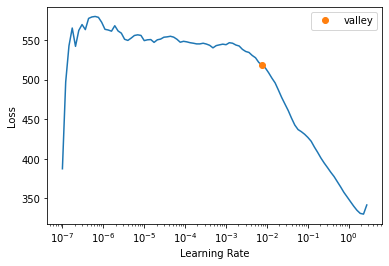

<Figure size 720x720 with 0 Axes>

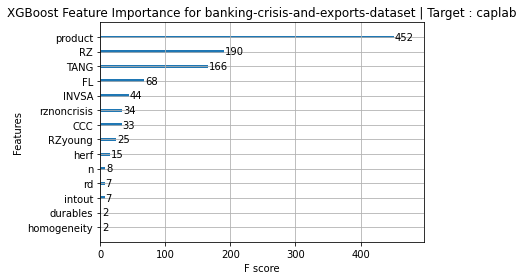

Target Variable: rznoncrisis
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup

  2%|▏         | 1/42 [00:03<02:31,  3.70s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9293353817912945, 'Adjusted R-Squared': 0.9285672881151129, 'RMSE': 2.0019415483971876, 'Time taken': 3.700275421142578}


  5%|▍         | 2/42 [00:04<01:22,  2.07s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9214890003204346}
{'Model': 'BayesianRidge', 'R-Squared': 0.6018555952970915, 'Adjusted R-Squared': 0.5975279387242338, 'RMSE': 4.751937205106057, 'Time taken': 0.08924531936645508}


 10%|▉         | 4/42 [00:04<00:33,  1.15it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.23436713218688965}
{'Model': 'DummyRegressor', 'R-Squared': -0.0001324988740183386, 'Adjusted R-Squared': -0.011003504296562161, 'RMSE': 7.53145966331602, 'Time taken': 0.033533334732055664}
{'Model': 'ElasticNet', 'R-Squared': 0.37514974518019484, 'Adjusted R-Squared': 0.36835789458432733, 'RMSE': 5.953034, 'Time taken': 0.050186872482299805}


 17%|█▋        | 7/42 [00:05<00:17,  1.97it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6016273591157062, 'Adjusted R-Squared': 0.5972972217147899, 'RMSE': 4.7532988, 'Time taken': 0.6221325397491455}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0947723388671875}


 24%|██▍       | 10/42 [00:08<00:22,  1.41it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.8605265617370605}
{'Model': 'GammaRegressor', 'R-Squared': 0.37105434684965544, 'Adjusted R-Squared': 0.36421798105454295, 'RMSE': 5.972510811124946, 'Time taken': 0.14145374298095703}


 29%|██▊       | 12/42 [01:18<06:07, 12.25s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.4602433842813547, 'Adjusted R-Squared': -0.47611559498006506, 'RMSE': 9.100452941381764, 'Time taken': 69.62346076965332}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3826161296067796, 'Adjusted R-Squared': 0.37590543536337495, 'RMSE': 5.91736044219017, 'Time taken': 0.16791415214538574}


 31%|███       | 13/42 [01:25<05:17, 10.95s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9998058425550285, 'Adjusted R-Squared': 0.9998037321480179, 'RMSE': 0.10493670148084985, 'Time taken': 7.1785571575164795}


 33%|███▎      | 14/42 [01:27<03:54,  8.37s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992426559, 'Adjusted R-Squared': 0.999999999234424, 'RMSE': 0.00020725117446168784, 'Time taken': 1.3395917415618896}


 36%|███▌      | 15/42 [01:28<02:52,  6.40s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5293734018470433, 'Adjusted R-Squared': 0.5242578953453807, 'RMSE': 5.166407031648987, 'Time taken': 1.2747774124145508}


 38%|███▊      | 16/42 [01:34<02:45,  6.37s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.907161497742104, 'Adjusted R-Squared': 0.9061523835871268, 'RMSE': 2.2946394052225285, 'Time taken': 6.27497673034668}


 40%|████      | 17/42 [01:50<03:47,  9.11s/it]

{'Model': 'KernelRidge', 'R-Squared': -4.212221266461272, 'Adjusted R-Squared': -4.268875845444547, 'RMSE': 17.193401, 'Time taken': 15.860822439193726}
{'Model': 'Lars', 'R-Squared': 0.6013819006645047, 'Adjusted R-Squared': 0.5970490952369449, 'RMSE': 4.754763187330757, 'Time taken': 0.07398581504821777}


 45%|████▌     | 19/42 [01:50<01:56,  5.07s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6018857729659293, 'Adjusted R-Squared': 0.5975584444112111, 'RMSE': 4.751757113281274, 'Time taken': 0.269467830657959}
{'Model': 'Lasso', 'R-Squared': 0.4060513692192057, 'Adjusted R-Squared': 0.3995954058411536, 'RMSE': 5.8039656, 'Time taken': 0.07453131675720215}


 52%|█████▏    | 22/42 [01:51<00:50,  2.52s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6019483093307832, 'Adjusted R-Squared': 0.5976216605191613, 'RMSE': 4.751384, 'Time taken': 0.5216822624206543}
{'Model': 'LassoLars', 'R-Squared': -0.00013249966698580806, 'Adjusted R-Squared': -0.011003505098148736, 'RMSE': 7.531459666301725, 'Time taken': 0.10818934440612793}


 60%|█████▉    | 25/42 [01:51<00:20,  1.22s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6019536500951754, 'Adjusted R-Squared': 0.5976270593353403, 'RMSE': 4.751352016755199, 'Time taken': 0.2656548023223877}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6017871377490418, 'Adjusted R-Squared': 0.5974587370724009, 'RMSE': 4.752345715163599, 'Time taken': 0.08547616004943848}
{'Model': 'LinearRegression', 'R-Squared': 0.6018637499275101, 'Adjusted R-Squared': 0.5975361819919396, 'RMSE': 4.7518888, 'Time taken': 0.08478236198425293}


 62%|██████▏   | 26/42 [01:54<00:25,  1.61s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.48045774557057086, 'Adjusted R-Squared': 0.47481054715285964, 'RMSE': 5.428262259519875, 'Time taken': 2.9735255241394043}


 64%|██████▍   | 27/42 [02:19<01:47,  7.19s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9997660523942054, 'Adjusted R-Squared': 0.9997635094854467, 'RMSE': 0.11518864965193207, 'Time taken': 24.604857206344604}


 67%|██████▋   | 28/42 [02:53<03:18, 14.16s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9100705873014419, 'Adjusted R-Squared': 0.9090930936851531, 'RMSE': 2.258402069929275, 'Time taken': 34.226664304733276}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.5241023705430032, 'Adjusted R-Squared': 0.5189295702228185, 'RMSE': 5.195258425433028, 'Time taken': 0.0499415397644043}


 74%|███████▍  | 31/42 [02:54<01:09,  6.34s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5541539809274767, 'Adjusted R-Squared': 0.5493078285462536, 'RMSE': 5.028550676572707, 'Time taken': 0.16382360458374023}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.27264630391351796, 'Adjusted R-Squared': 0.26474028547779527, 'RMSE': 6.422782414884749, 'Time taken': 0.18436932563781738}


 76%|███████▌  | 32/42 [02:54<00:48,  4.83s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.5967802398468911, 'Adjusted R-Squared': 0.592397416366966, 'RMSE': 4.782129009467812, 'Time taken': 0.2938511371612549}


 79%|███████▊  | 33/42 [02:54<00:33,  3.67s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.4723558419191599, 'Adjusted R-Squared': 0.4666205793313246, 'RMSE': 5.4704237, 'Time taken': 0.4169344902038574}


 81%|████████  | 34/42 [03:03<00:40,  5.08s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 8.820590734481812}
{'Model': 'Ridge', 'R-Squared': 0.6018580819607011, 'Adjusted R-Squared': 0.5975304524167957, 'RMSE': 4.751922, 'Time taken': 0.05766415596008301}


 86%|████████▌ | 36/42 [03:03<00:17,  2.91s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.6018563588343601, 'Adjusted R-Squared': 0.5975287105608205, 'RMSE': 4.751932648614932, 'Time taken': 0.18041276931762695}


 88%|████████▊ | 37/42 [03:04<00:11,  2.27s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.6003224282535822, 'Adjusted R-Squared': 0.5959781068215559, 'RMSE': 4.761077749556269, 'Time taken': 0.22261428833007812}


 90%|█████████ | 38/42 [03:31<00:34,  8.58s/it]

{'Model': 'SVR', 'R-Squared': 0.9087175183388949, 'Adjusted R-Squared': 0.9077253174512742, 'RMSE': 2.2753284853450575, 'Time taken': 27.13432288169861}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6018637499275101, 'Adjusted R-Squared': 0.5975361819919396, 'RMSE': 4.7518888, 'Time taken': 0.057816505432128906}


 95%|█████████▌| 40/42 [03:31<00:10,  5.03s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.3826161296067796, 'Adjusted R-Squared': 0.37590543536337495, 'RMSE': 5.91736044219017, 'Time taken': 0.17899012565612793}


 98%|█████████▊| 41/42 [03:32<00:04,  4.13s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999803568, 'Adjusted R-Squared': 0.9999999999801433, 'RMSE': 3.337773e-05, 'Time taken': 1.1474721431732178}


100%|██████████| 42/42 [03:33<00:00,  5.08s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992521263, 'Adjusted R-Squared': 0.9999999992439973, 'RMSE': 0.00020595128932609158, 'Time taken': 0.5922286510467529}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: rznoncrisis
rznoncrisis
Target Standard Deviation: 7.582112242547835
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.23
RandomForestRegressor                        1.00       1.00  0.00        8.82
BaggingRegressor                             1.00       1.00  0.00        0.92
ExtraTreeRegressor                           1.00       1.00  0.00        0.09
ExtraTreesRegressor                          1.00       1.00  0.00        2.86
XGBRegressor                                 1.00       1.00  0.00        1.15
LGBMRegressor                               

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,53.329937,51.485535,7.175342,00:17
1,13.856318,14.186501,3.766497,00:20
2,6.248455,8.059589,2.838942,00:17
3,4.908824,2.632966,1.622642,00:17
4,4.603152,13.413097,3.662390,00:17


Better model found at epoch 0 with _rmse value: 7.175342082977295.
Better model found at epoch 1 with _rmse value: 3.7664966583251953.
Better model found at epoch 2 with _rmse value: 2.8389415740966797.
Better model found at epoch 3 with _rmse value: 1.622641682624817.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       8       8.00
1      14      14.00
2      14      14.00
3      16      16.00
4      12      12.00
XGBoost RMSE:  3.337773e-05


<Figure size 432x288 with 0 Axes>

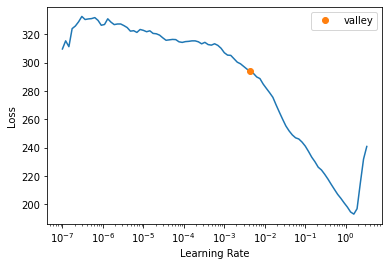

<Figure size 720x720 with 0 Axes>

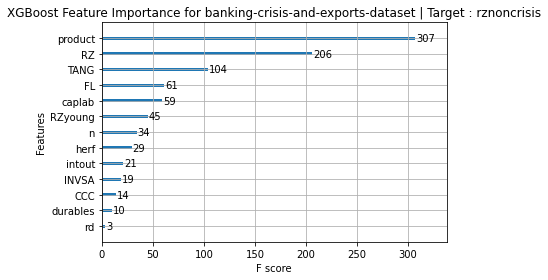

Target Variable: RZyoung
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', '

  2%|▏         | 1/42 [00:03<02:31,  3.69s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9510078549737846, 'Adjusted R-Squared': 0.9504753316582822, 'RMSE': 1.8683249723786088, 'Time taken': 3.692999839782715}


  7%|▋         | 3/42 [00:04<00:45,  1.18s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9211750030517578}
{'Model': 'BayesianRidge', 'R-Squared': 0.7890102784990811, 'Adjusted R-Squared': 0.7867169119610277, 'RMSE': 3.877214612410555, 'Time taken': 0.1177515983581543}


 10%|▉         | 4/42 [00:04<00:30,  1.24it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.23372936248779297}
{'Model': 'DummyRegressor', 'R-Squared': -1.368660791145615e-06, 'Adjusted R-Squared': -0.010870948754930332, 'RMSE': 8.440914254577224, 'Time taken': 0.030292034149169922}
{'Model': 'ElasticNet', 'R-Squared': 0.6108273070529373, 'Adjusted R-Squared': 0.6065971690861214, 'RMSE': 5.2657514, 'Time taken': 0.04888176918029785}


 17%|█▋        | 7/42 [00:05<00:14,  2.38it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7884308475685071, 'Adjusted R-Squared': 0.7861311828681647, 'RMSE': 3.8825347, 'Time taken': 0.497819185256958}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0905606746673584}


 24%|██▍       | 10/42 [00:08<00:21,  1.52it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.779420852661133}
{'Model': 'GammaRegressor', 'R-Squared': 0.6028323801636658, 'Adjusted R-Squared': 0.5985153408176187, 'RMSE': 5.3195648602276036, 'Time taken': 0.12888813018798828}


 29%|██▊       | 12/42 [01:21<06:31, 13.05s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.11433276465504316, 'Adjusted R-Squared': -0.12644507731433707, 'RMSE': 8.910388530359628, 'Time taken': 72.53695273399353}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6125705200639586, 'Adjusted R-Squared': 0.6083593300646538, 'RMSE': 5.253945012679704, 'Time taken': 0.17089486122131348}


 31%|███       | 13/42 [01:28<05:33, 11.51s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9997877502573818, 'Adjusted R-Squared': 0.999785443194962, 'RMSE': 0.12297385215793077, 'Time taken': 7.173950910568237}


 33%|███▎      | 14/42 [01:29<04:04,  8.74s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992597194, 'Adjusted R-Squared': 0.9999999992516728, 'RMSE': 0.00022966106360105808, 'Time taken': 1.3401095867156982}


 36%|███▌      | 15/42 [01:30<02:57,  6.59s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7579551677924661, 'Adjusted R-Squared': 0.7553242457032537, 'RMSE': 4.152762543651818, 'Time taken': 1.070223093032837}


 38%|███▊      | 16/42 [01:36<02:47,  6.43s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9179673363104391, 'Adjusted R-Squared': 0.9170756769225091, 'RMSE': 2.417589708780214, 'Time taken': 6.024302244186401}


 40%|████      | 17/42 [01:52<03:49,  9.17s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.088004013491358, 'Adjusted R-Squared': -3.1324388397249603, 'RMSE': 17.066515, 'Time taken': 15.884299993515015}
{'Model': 'Lars', 'R-Squared': 0.7890381071306319, 'Adjusted R-Squared': 0.786745043077704, 'RMSE': 3.876958910061253, 'Time taken': 0.08206486701965332}


 45%|████▌     | 19/42 [01:53<01:57,  5.11s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7890191678390068, 'Adjusted R-Squared': 0.7867258979242134, 'RMSE': 3.8771329348732726, 'Time taken': 0.3222496509552002}
{'Model': 'Lasso', 'R-Squared': 0.6110870967052893, 'Adjusted R-Squared': 0.6068597825390424, 'RMSE': 5.2639937, 'Time taken': 0.05981755256652832}


 50%|█████     | 21/42 [01:53<01:07,  3.21s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7890456528459548, 'Adjusted R-Squared': 0.7867526708116718, 'RMSE': 3.8768897, 'Time taken': 0.47130417823791504}
{'Model': 'LassoLars', 'R-Squared': -1.3686692503789288e-06, 'Adjusted R-Squared': -0.010870948763481492, 'RMSE': 8.440914254612927, 'Time taken': 0.05951380729675293}


 60%|█████▉    | 25/42 [01:54<00:24,  1.43s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7890278200005315, 'Adjusted R-Squared': 0.786734644130972, 'RMSE': 3.877053434939586, 'Time taken': 0.28391146659851074}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7881854820932612, 'Adjusted R-Squared': 0.7858831503768836, 'RMSE': 3.8847855818525776, 'Time taken': 0.07922816276550293}
{'Model': 'LinearRegression', 'R-Squared': 0.7890395005070374, 'Adjusted R-Squared': 0.7867464515995052, 'RMSE': 3.8769462, 'Time taken': 0.08385252952575684}


 62%|██████▏   | 26/42 [01:57<00:28,  1.80s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7611221923588637, 'Adjusted R-Squared': 0.758525694449721, 'RMSE': 4.125504770753969, 'Time taken': 3.356184959411621}


 64%|██████▍   | 27/42 [02:19<01:32,  6.13s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9997491555085958, 'Adjusted R-Squared': 0.999746428938037, 'RMSE': 0.1336877073568607, 'Time taken': 21.66623830795288}


 67%|██████▋   | 28/42 [02:52<02:56, 12.61s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9244491010406782, 'Adjusted R-Squared': 0.9236278956172074, 'RMSE': 2.3201123162410147, 'Time taken': 33.41060400009155}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6727702699575381, 'Adjusted R-Squared': 0.6692134250657722, 'RMSE': 4.828537053046273, 'Time taken': 0.04491114616394043}


 74%|███████▍  | 31/42 [02:53<01:04,  5.90s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7036324317523028, 'Adjusted R-Squared': 0.7004110451409148, 'RMSE': 4.5952011799303, 'Time taken': 0.1685624122619629}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.2704153060683734, 'Adjusted R-Squared': 0.262485037656073, 'RMSE': 7.209863599189307, 'Time taken': 0.15685415267944336}


 76%|███████▌  | 32/42 [02:53<00:45,  4.56s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7400478717844167, 'Adjusted R-Squared': 0.7372223051733777, 'RMSE': 4.3036394516791106, 'Time taken': 0.3519723415374756}


 79%|███████▊  | 33/42 [02:53<00:31,  3.48s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.6783041979771518, 'Adjusted R-Squared': 0.6748075044769035, 'RMSE': 4.787534, 'Time taken': 0.374584436416626}


 86%|████████▌ | 36/42 [03:02<00:16,  2.79s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 8.650806903839111}
{'Model': 'Ridge', 'R-Squared': 0.7890345827752417, 'Adjusted R-Squared': 0.7867414804141031, 'RMSE': 3.8769913, 'Time taken': 0.04161977767944336}
{'Model': 'RidgeCV', 'R-Squared': 0.789001413294651, 'Adjusted R-Squared': 0.7867079503956798, 'RMSE': 3.877296066471123, 'Time taken': 0.09341549873352051}


 88%|████████▊ | 37/42 [03:02<00:10,  2.18s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7883066172330442, 'Adjusted R-Squared': 0.7860056022029686, 'RMSE': 3.8836745830663384, 'Time taken': 0.24807000160217285}


 95%|█████████▌| 40/42 [03:28<00:09,  4.66s/it]

{'Model': 'SVR', 'R-Squared': 0.9237286182490977, 'Adjusted R-Squared': 0.9228995814909358, 'RMSE': 2.331148813832922, 'Time taken': 24.99494171142578}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7890395005070374, 'Adjusted R-Squared': 0.7867464515995052, 'RMSE': 3.8769462, 'Time taken': 0.05476045608520508}
{'Model': 'TweedieRegressor', 'R-Squared': 0.6125705200639586, 'Adjusted R-Squared': 0.6083593300646538, 'RMSE': 5.253945012679704, 'Time taken': 0.13144779205322266}


 98%|█████████▊| 41/42 [03:29<00:03,  3.87s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999842445, 'Adjusted R-Squared': 0.9999999999840732, 'RMSE': 3.350468e-05, 'Time taken': 1.2400562763214111}


100%|██████████| 42/42 [03:29<00:00,  5.00s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992592457, 'Adjusted R-Squared': 0.999999999251194, 'RMSE': 0.00022973454378336482, 'Time taken': 0.5976216793060303}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: RZyoung
RZyoung
Target Standard Deviation: 8.37647583918052
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.23
RandomForestRegressor                        1.00       1.00  0.00        8.65
BaggingRegressor                             1.00       1.00  0.00        0.92
ExtraTreeRegressor                           1.00       1.00  0.00        0.09
ExtraTreesRegressor                          1.00       1.00  0.00        2.78
XGBRegressor                                 1.00       1.00  0.00        1.24
HistGradientBoostingRegressor                1.00     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,62.378254,68.828217,8.296279,00:17
1,30.046003,18.930525,4.350923,00:17
2,6.034547,7.997238,2.827939,00:17
3,4.919873,14.854992,3.854218,00:17


Better model found at epoch 0 with _rmse value: 8.296278953552246.
Better model found at epoch 1 with _rmse value: 4.350922584533691.
Better model found at epoch 2 with _rmse value: 2.8279387950897217.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      28      28.00
1      19      19.00
2      16      16.00
3      17      17.00
4      32      32.00
XGBoost RMSE:  3.350468e-05


<Figure size 432x288 with 0 Axes>

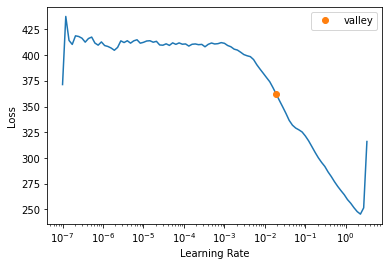

<Figure size 720x720 with 0 Axes>

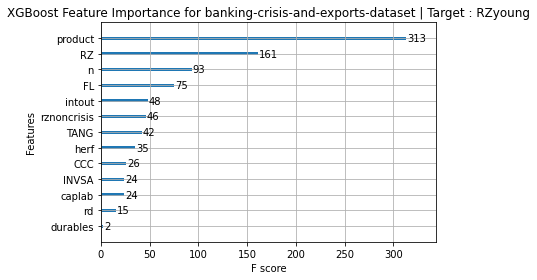

Target Variable: CCC
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forb

  2%|▏         | 1/42 [00:01<01:21,  1.99s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9259693456945454, 'Adjusted R-Squared': 0.9251646646694861, 'RMSE': 6.311824845623881, 'Time taken': 1.9900014400482178}


  5%|▍         | 2/42 [00:02<00:56,  1.41s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9978122711181641}
{'Model': 'BayesianRidge', 'R-Squared': 0.9024974444568642, 'Adjusted R-Squared': 0.9014376340705258, 'RMSE': 7.243644766513382, 'Time taken': 0.06874775886535645}


 10%|▉         | 4/42 [00:03<00:23,  1.62it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.22020673751831055}
{'Model': 'DummyRegressor', 'R-Squared': -0.00040201390665273173, 'Adjusted R-Squared': -0.011275948840420824, 'RMSE': 23.20258772643959, 'Time taken': 0.03249406814575195}
{'Model': 'ElasticNet', 'R-Squared': 0.8039286061215435, 'Adjusted R-Squared': 0.8017973953185168, 'RMSE': 10.27203, 'Time taken': 0.04586029052734375}


 19%|█▉        | 8/42 [00:03<00:10,  3.22it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9006421424073938, 'Adjusted R-Squared': 0.8995621656944307, 'RMSE': 7.312237, 'Time taken': 0.43439555168151855}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11869072914123535}


 24%|██▍       | 10/42 [00:07<00:26,  1.20it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999998173815035, 'Adjusted R-Squared': 0.9999998153965198, 'RMSE': 0.009913374803768889, 'Time taken': 3.4529099464416504}
{'Model': 'GammaRegressor', 'R-Squared': 0.7190409661767562, 'Adjusted R-Squared': 0.7159870636351992, 'RMSE': 12.296192260493932, 'Time taken': 0.19543886184692383}


 26%|██▌       | 11/42 [01:18<10:01, 19.40s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.09580882713237338, 'Adjusted R-Squared': 0.08598066220989908, 'RMSE': 22.05866758824509, 'Time taken': 71.18478178977966}


 29%|██▊       | 12/42 [01:18<07:04, 14.15s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7322699634058365, 'Adjusted R-Squared': 0.7293598543124217, 'RMSE': 12.003217990000294, 'Time taken': 0.21098971366882324}


 31%|███       | 13/42 [01:26<05:53, 12.18s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9958163324439718, 'Adjusted R-Squared': 0.9957708577966237, 'RMSE': 1.5004714220942421, 'Time taken': 7.149577379226685}


 33%|███▎      | 14/42 [01:27<04:14,  9.07s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.999999988759708, 'Adjusted R-Squared': 0.9999999886375309, 'RMSE': 0.002459449685461876, 'Time taken': 1.330902338027954}


 36%|███▌      | 15/42 [01:28<03:01,  6.71s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8928641784203913, 'Adjusted R-Squared': 0.891699658620613, 'RMSE': 7.593054146888723, 'Time taken': 0.9460716247558594}


 38%|███▊      | 16/42 [01:34<02:51,  6.61s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8839234467884715, 'Adjusted R-Squared': 0.8826617451231288, 'RMSE': 7.903535284921552, 'Time taken': 6.366728067398071}


 40%|████      | 17/42 [01:52<04:03,  9.75s/it]

{'Model': 'KernelRidge', 'R-Squared': -1.9005378318936645, 'Adjusted R-Squared': -1.9320654170229434, 'RMSE': 39.508305, 'Time taken': 17.244120121002197}
{'Model': 'Lars', 'R-Squared': 0.8562873616505415, 'Adjusted R-Squared': 0.8547252677554387, 'RMSE': 8.79420582558837, 'Time taken': 0.08608388900756836}


 45%|████▌     | 19/42 [01:52<02:03,  5.38s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8915085254890587, 'Adjusted R-Squared': 0.890329270331331, 'RMSE': 7.640942835192921, 'Time taken': 0.3194313049316406}
{'Model': 'Lasso', 'R-Squared': 0.8811996998094103, 'Adjusted R-Squared': 0.879908392198643, 'RMSE': 7.995726, 'Time taken': 0.06487178802490234}


 52%|█████▏    | 22/42 [01:53<00:52,  2.65s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9024487532672959, 'Adjusted R-Squared': 0.901388413628897, 'RMSE': 7.245453, 'Time taken': 0.461104154586792}
{'Model': 'LassoLars', 'R-Squared': -0.000402011479994524, 'Adjusted R-Squared': -0.011275946387385716, 'RMSE': 23.202587698298526, 'Time taken': 0.11164474487304688}


 60%|█████▉    | 25/42 [01:53<00:21,  1.27s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9025068324344253, 'Adjusted R-Squared': 0.9014471240913212, 'RMSE': 7.243296033030753, 'Time taken': 0.2725403308868408}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9024114855561172, 'Adjusted R-Squared': 0.901350740833901, 'RMSE': 7.246837085751397, 'Time taken': 0.08469390869140625}
{'Model': 'LinearRegression', 'R-Squared': 0.9025016657608785, 'Adjusted R-Squared': 0.9014419012582794, 'RMSE': 7.243488, 'Time taken': 0.06729364395141602}


 62%|██████▏   | 26/42 [01:55<00:22,  1.43s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8862852151669004, 'Adjusted R-Squared': 0.8850491848969754, 'RMSE': 7.822716864454011, 'Time taken': 1.998422384262085}


 64%|██████▍   | 27/42 [02:21<01:49,  7.30s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9809411907903397, 'Adjusted R-Squared': 0.9807340298206695, 'RMSE': 3.202558163500955, 'Time taken': 25.57188582420349}


 67%|██████▋   | 28/42 [02:53<03:11, 13.69s/it]

{'Model': 'NuSVR', 'R-Squared': 0.894769311860675, 'Adjusted R-Squared': 0.8936255000330736, 'RMSE': 7.525239906512639, 'Time taken': 32.07801413536072}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8822362680972039, 'Adjusted R-Squared': 0.880956227533043, 'RMSE': 7.960767214541124, 'Time taken': 0.04477572441101074}


 74%|███████▍  | 31/42 [02:53<01:07,  6.11s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8890742707901353, 'Adjusted R-Squared': 0.8878685563422021, 'RMSE': 7.726188344105266, 'Time taken': 0.16256451606750488}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7958075426845708, 'Adjusted R-Squared': 0.7935880594528812, 'RMSE': 10.48259947865908, 'Time taken': 0.12536883354187012}


 76%|███████▌  | 32/42 [02:53<00:46,  4.68s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8479201117630807, 'Adjusted R-Squared': 0.8462670694996359, 'RMSE': 9.046592685468559, 'Time taken': 0.3745310306549072}


 79%|███████▊  | 33/42 [02:54<00:31,  3.53s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8879060139806144, 'Adjusted R-Squared': 0.8866876010890994, 'RMSE': 7.766768, 'Time taken': 0.3054366111755371}


 81%|████████  | 34/42 [03:03<00:41,  5.20s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 9.644164800643921}
{'Model': 'Ridge', 'R-Squared': 0.9025003085364695, 'Adjusted R-Squared': 0.901440529281431, 'RMSE': 7.243539, 'Time taken': 0.056217193603515625}


 86%|████████▌ | 36/42 [03:04<00:17,  2.97s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9025003196567698, 'Adjusted R-Squared': 0.9014405405226043, 'RMSE': 7.24353796377281, 'Time taken': 0.15703153610229492}


 88%|████████▊ | 37/42 [03:04<00:11,  2.32s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9019571961008274, 'Adjusted R-Squared': 0.9008915134497494, 'RMSE': 7.263685068344334, 'Time taken': 0.22365951538085938}


 90%|█████████ | 38/42 [03:33<00:37,  9.27s/it]

{'Model': 'SVR', 'R-Squared': 0.8976962976531199, 'Adjusted R-Squared': 0.8965843008884798, 'RMSE': 7.419844781475424, 'Time taken': 29.690133094787598}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9025016657608785, 'Adjusted R-Squared': 0.9014419012582794, 'RMSE': 7.243488, 'Time taken': 0.0823066234588623}


 95%|█████████▌| 40/42 [03:34<00:10,  5.43s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7322699634058365, 'Adjusted R-Squared': 0.7293598543124217, 'RMSE': 12.003217990000294, 'Time taken': 0.17450666427612305}


 98%|█████████▊| 41/42 [03:35<00:04,  4.54s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999859314, 'Adjusted R-Squared': 0.9999999999857785, 'RMSE': 8.7011096e-05, 'Time taken': 1.5724127292633057}


100%|██████████| 42/42 [03:36<00:00,  5.15s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999856060444, 'Adjusted R-Squared': 0.9999999854495883, 'RMSE': 0.0027831667255210114, 'Time taken': 0.6101677417755127}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: CCC
CCC
Target Standard Deviation: 23.240536917945224
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.22
RandomForestRegressor                        1.00       1.00  0.00        9.64
BaggingRegressor                             1.00       1.00  0.00        1.00
ExtraTreeRegressor                           1.00       1.00  0.00        0.12
XGBRegressor                                 1.00       1.00  0.00        1.57
HistGradientBoostingRegressor                1.00       1.00  0.00        1.33
LGBMRegressor                                1.00       1.00

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,519.077759,539.391174,23.224796,00:17
1,105.540573,139.650620,11.817388,00:18
2,36.428581,137.617706,11.731056,00:20
3,23.097782,277.590576,16.661049,00:17


Better model found at epoch 0 with _rmse value: 23.224796295166016.
Better model found at epoch 1 with _rmse value: 11.817387580871582.
Better model found at epoch 2 with _rmse value: 11.731056213378906.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      34      34.00
1      42      42.00
2       9       9.00
3      55      55.00
4      14      14.00
XGBoost RMSE:  8.7011096e-05


<Figure size 432x288 with 0 Axes>

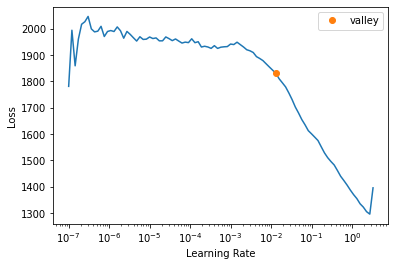

<Figure size 720x720 with 0 Axes>

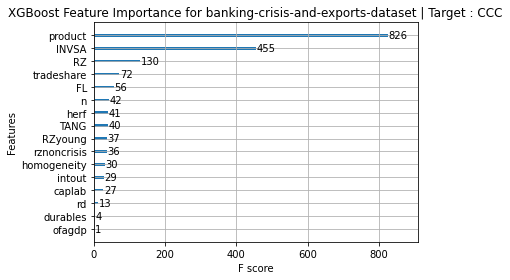

Target Variable: INVSA
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'fo

  2%|▏         | 1/42 [00:03<02:29,  3.66s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9544703233341489, 'Adjusted R-Squared': 0.9539754355443028, 'RMSE': 4.966500847230419, 'Time taken': 3.6552910804748535}


  5%|▍         | 2/42 [00:04<01:26,  2.15s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0977721214294434}
{'Model': 'BayesianRidge', 'R-Squared': 0.8920586998620723, 'Adjusted R-Squared': 0.8908854248605731, 'RMSE': 7.6471049969572595, 'Time taken': 0.07222509384155273}


 10%|▉         | 4/42 [00:05<00:34,  1.11it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.24357104301452637}
{'Model': 'DummyRegressor', 'R-Squared': -2.475989536732115e-06, 'Adjusted R-Squared': -0.010872068119857747, 'RMSE': 23.275754534292222, 'Time taken': 0.03327465057373047}
{'Model': 'ElasticNet', 'R-Squared': 0.7670186154609744, 'Adjusted R-Squared': 0.7644862091072893, 'RMSE': 11.234761, 'Time taken': 0.04366326332092285}


 19%|█▉        | 8/42 [00:05<00:14,  2.43it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8903325026648676, 'Adjusted R-Squared': 0.8891404646503553, 'RMSE': 7.708009, 'Time taken': 0.44371819496154785}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14158391952514648}


 24%|██▍       | 10/42 [00:09<00:27,  1.15it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999998720372937, 'Adjusted R-Squared': 0.9999998706463947, 'RMSE': 0.00832616358234693, 'Time taken': 3.4035730361938477}
{'Model': 'GammaRegressor', 'R-Squared': 0.6741855814931919, 'Adjusted R-Squared': 0.6706441204224657, 'RMSE': 13.28582050182295, 'Time taken': 0.13205456733703613}


 29%|██▊       | 12/42 [01:54<10:19, 20.64s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.04655606987304406, 'Adjusted R-Squared': 0.036192548893403176, 'RMSE': 22.72745517888908, 'Time taken': 105.06686115264893}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.682685166998833, 'Adjusted R-Squared': 0.6792360927270811, 'RMSE': 13.111380400133404, 'Time taken': 0.16305994987487793}


 31%|███       | 13/42 [02:01<08:08, 16.84s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9953671435770415, 'Adjusted R-Squared': 0.9953167864420093, 'RMSE': 1.5842643566945516, 'Time taken': 7.109767436981201}


 33%|███▎      | 14/42 [02:03<05:50, 12.51s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999820956355, 'Adjusted R-Squared': 0.9999999819010228, 'RMSE': 0.0031144594943363045, 'Time taken': 1.7404329776763916}


 36%|███▌      | 15/42 [02:04<04:07,  9.17s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.885908974097914, 'Adjusted R-Squared': 0.8846688542511523, 'RMSE': 7.861926393849283, 'Time taken': 0.9969375133514404}


 38%|███▊      | 16/42 [02:10<03:35,  8.28s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.834194406751398, 'Adjusted R-Squared': 0.8323921720421741, 'RMSE': 9.477696977641772, 'Time taken': 6.145024299621582}


 43%|████▎     | 18/42 [02:26<02:56,  7.34s/it]

{'Model': 'KernelRidge', 'R-Squared': -1.8883515551001295, 'Adjusted R-Squared': -1.9197466806990442, 'RMSE': 39.557446, 'Time taken': 15.379832029342651}
{'Model': 'Lars', 'R-Squared': 0.8857820089945777, 'Adjusted R-Squared': 0.8845405090923448, 'RMSE': 7.866299712157704, 'Time taken': 0.12780547142028809}


 45%|████▌     | 19/42 [02:26<02:00,  5.24s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8879897762117588, 'Adjusted R-Squared': 0.8867722737792779, 'RMSE': 7.789903240827997, 'Time taken': 0.28000593185424805}
{'Model': 'Lasso', 'R-Squared': 0.859646763313021, 'Adjusted R-Squared': 0.8581211846533799, 'RMSE': 8.719959, 'Time taken': 0.05885934829711914}


 50%|█████     | 21/42 [02:26<01:01,  2.95s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8921725185815063, 'Adjusted R-Squared': 0.8910004807400009, 'RMSE': 7.643072, 'Time taken': 0.4566318988800049}
{'Model': 'LassoLars', 'R-Squared': -2.4761504613390883e-06, 'Adjusted R-Squared': -0.010872068282531622, 'RMSE': 23.275754536165042, 'Time taken': 0.0556178092956543}


 60%|█████▉    | 25/42 [02:27<00:20,  1.21s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.892183687631494, 'Adjusted R-Squared': 0.8910117711927059, 'RMSE': 7.6426763332324095, 'Time taken': 0.27172398567199707}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8919395634931306, 'Adjusted R-Squared': 0.8907649935310995, 'RMSE': 7.651323943159644, 'Time taken': 0.08350706100463867}
{'Model': 'LinearRegression', 'R-Squared': 0.8920606683643648, 'Adjusted R-Squared': 0.8908874147596296, 'RMSE': 7.6470356, 'Time taken': 0.06571340560913086}


 62%|██████▏   | 26/42 [02:29<00:21,  1.37s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8801876675496503, 'Adjusted R-Squared': 0.8788853595882334, 'RMSE': 8.056640631767536, 'Time taken': 1.987973928451538}


 64%|██████▍   | 27/42 [02:55<01:44,  6.94s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9867471017960552, 'Adjusted R-Squared': 0.9866030485547079, 'RMSE': 2.679530235309948, 'Time taken': 25.954458713531494}


 67%|██████▋   | 28/42 [03:26<03:01, 12.95s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8770169502402486, 'Adjusted R-Squared': 0.8756801779602513, 'RMSE': 8.162550104050306, 'Time taken': 31.486904621124268}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8676859488148143, 'Adjusted R-Squared': 0.8662477526062797, 'RMSE': 8.466544868308995, 'Time taken': 0.044425249099731445}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8696469464612016, 'Adjusted R-Squared': 0.8682300654444755, 'RMSE': 8.403570258145255, 'Time taken': 0.15363645553588867}


 74%|███████▍  | 31/42 [03:27<01:05,  5.96s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6314142016692321, 'Adjusted R-Squared': 0.6274078342960716, 'RMSE': 14.130988069089074, 'Time taken': 0.1560518741607666}


 76%|███████▌  | 32/42 [03:27<00:45,  4.59s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8345355408815431, 'Adjusted R-Squared': 0.8327370141519947, 'RMSE': 9.467942087681424, 'Time taken': 0.36683011054992676}


 79%|███████▊  | 33/42 [03:27<00:31,  3.49s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.8881821166810249, 'Adjusted R-Squared': 0.8869667049058186, 'RMSE': 7.783212, 'Time taken': 0.3406071662902832}


 81%|████████  | 34/42 [03:38<00:43,  5.44s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 10.726282119750977}
{'Model': 'Ridge', 'R-Squared': 0.8920596876152304, 'Adjusted R-Squared': 0.8908864233501785, 'RMSE': 7.64707, 'Time taken': 0.05786609649658203}


 86%|████████▌ | 36/42 [03:38<00:18,  3.13s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8920596724991756, 'Adjusted R-Squared': 0.8908864080698188, 'RMSE': 7.647070543625687, 'Time taken': 0.1882035732269287}


 88%|████████▊ | 37/42 [03:39<00:12,  2.44s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.891435507852072, 'Adjusted R-Squared': 0.8902554590243772, 'RMSE': 7.669148255754414, 'Time taken': 0.23208856582641602}


 90%|█████████ | 38/42 [04:08<00:37,  9.32s/it]

{'Model': 'SVR', 'R-Squared': 0.8769879648195134, 'Adjusted R-Squared': 0.875650877480595, 'RMSE': 8.163511948022284, 'Time taken': 29.617062091827393}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8920606683643648, 'Adjusted R-Squared': 0.8908874147596296, 'RMSE': 7.6470356, 'Time taken': 0.055788278579711914}


 95%|█████████▌| 40/42 [04:08<00:10,  5.47s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.682685166998833, 'Adjusted R-Squared': 0.6792360927270811, 'RMSE': 13.111380400133404, 'Time taken': 0.23370981216430664}


 98%|█████████▊| 41/42 [04:10<00:04,  4.61s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999999984406, 'Adjusted R-Squared': 0.9999999999842365, 'RMSE': 9.191387e-05, 'Time taken': 1.743403434753418}


100%|██████████| 42/42 [04:11<00:00,  5.98s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999814841212, 'Adjusted R-Squared': 0.9999999812828616, 'RMSE': 0.003167199321419558, 'Time taken': 0.5662534236907959}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: INVSA
INVSA
Target Standard Deviation: 23.41560160949052
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.24
RandomForestRegressor                        1.00       1.00  0.00       10.73
BaggingRegressor                             1.00       1.00  0.00        1.10
ExtraTreeRegressor                           1.00       1.00  0.00        0.14
XGBRegressor                                 1.00       1.00  0.00        1.74
HistGradientBoostingRegressor                1.00       1.00  0.00        1.74
LGBMRegressor                                1.00       1.

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,531.077820,515.931702,22.714128,00:17
1,230.917664,233.353897,15.275927,00:18
2,125.740723,95.411850,9.767899,00:18
3,51.063011,251.696396,15.864944,00:17


Better model found at epoch 0 with _rmse value: 22.714128494262695.
Better model found at epoch 1 with _rmse value: 15.27592658996582.
Better model found at epoch 2 with _rmse value: 9.767898559570312.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      46      46.00
1      34      34.00
2      22      22.00
3      20      20.00
4       7       7.00
XGBoost RMSE:  9.191387e-05


<Figure size 432x288 with 0 Axes>

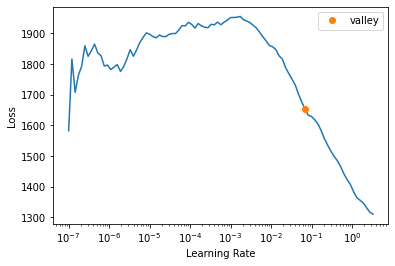

<Figure size 720x720 with 0 Axes>

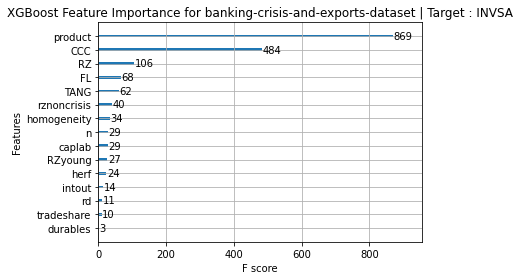

Target Variable: GDPgr
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'fo

  2%|▏         | 1/42 [00:01<01:12,  1.77s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.4883763904932864, 'Adjusted R-Squared': 0.48281526430299604, 'RMSE': 57.62945782595911, 'Time taken': 1.7742865085601807}


  5%|▍         | 2/42 [00:03<01:04,  1.62s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9998354030398591, 'Adjusted R-Squared': 0.9998336139424663, 'RMSE': 1.0336658067286546, 'Time taken': 1.504833459854126}
{'Model': 'BayesianRidge', 'R-Squared': 0.4353908665334939, 'Adjusted R-Squared': 0.42925381073494495, 'RMSE': 60.540108472380375, 'Time taken': 0.08257055282592773}


 10%|▉         | 4/42 [00:03<00:27,  1.37it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9999712696877612, 'Adjusted R-Squared': 0.9999709574017586, 'RMSE': 0.43185645763378366, 'Time taken': 0.31414031982421875}
{'Model': 'DummyRegressor', 'R-Squared': -5.416008603953415e-05, 'Adjusted R-Squared': -0.010924314000018365, 'RMSE': 80.5714177275596, 'Time taken': 0.03265690803527832}
{'Model': 'ElasticNet', 'R-Squared': 0.3829842524726317, 'Adjusted R-Squared': 0.37627755956472553, 'RMSE': 63.28742, 'Time taken': 0.05482006072998047}


 19%|█▉        | 8/42 [00:04<00:12,  2.70it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.4334404380801179, 'Adjusted R-Squared': 0.42728218197229306, 'RMSE': 60.644585, 'Time taken': 0.5271201133728027}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9984346986452607, 'Adjusted R-Squared': 0.9984176845001005, 'RMSE': 3.1876323501934785, 'Time taken': 0.15162062644958496}


 21%|██▏       | 9/42 [00:08<00:43,  1.33s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999425501667201, 'Adjusted R-Squared': 0.9999419257120105, 'RMSE': 0.6106799079714347, 'Time taken': 4.474436521530151}


 24%|██▍       | 10/42 [00:09<00:33,  1.05s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.35194411465771824, 'Adjusted R-Squared': 0.34490002894747607, 'RMSE': 64.85978050755607, 'Time taken': 0.2221529483795166}


 26%|██▌       | 11/42 [01:20<10:07, 19.60s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.22041107574713958, 'Adjusted R-Squared': -0.23367641352699975, 'RMSE': 89.0066212656766, 'Time taken': 71.31444263458252}


 29%|██▊       | 12/42 [01:20<07:09, 14.30s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.34286519702457463, 'Adjusted R-Squared': 0.33572242742701564, 'RMSE': 65.31252582445683, 'Time taken': 0.24980545043945312}


 31%|███       | 13/42 [01:27<05:56, 12.29s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8259551572457203, 'Adjusted R-Squared': 0.824063365476652, 'RMSE': 33.61242332845759, 'Time taken': 7.141146659851074}


 33%|███▎      | 14/42 [01:29<04:15,  9.13s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9956952175277938, 'Adjusted R-Squared': 0.9956484264139654, 'RMSE': 5.286215338171165, 'Time taken': 1.2635889053344727}


 36%|███▌      | 15/42 [01:30<03:02,  6.75s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.4269484022458532, 'Adjusted R-Squared': 0.4207195805311341, 'RMSE': 60.99104984790678, 'Time taken': 0.9275753498077393}


 38%|███▊      | 16/42 [01:36<02:49,  6.53s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.5460204451998201, 'Adjusted R-Squared': 0.5410858848215572, 'RMSE': 54.28594376079319, 'Time taken': 6.002892017364502}


 40%|████      | 17/42 [01:52<03:52,  9.31s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.6300634841509347, 'Adjusted R-Squared': -2.669520695935184, 'RMSE': 153.50635, 'Time taken': 15.953815460205078}
{'Model': 'Lars', 'R-Squared': 0.3892846212443025, 'Adjusted R-Squared': 0.38264641060565363, 'RMSE': 62.963472716928734, 'Time taken': 0.0722963809967041}


 48%|████▊     | 20/42 [01:52<01:25,  3.90s/it]

{'Model': 'LarsCV', 'R-Squared': 0.4063865179989474, 'Adjusted R-Squared': 0.3999341975424142, 'RMSE': 62.07562817680725, 'Time taken': 0.31331682205200195}
{'Model': 'Lasso', 'R-Squared': 0.42795344604162144, 'Adjusted R-Squared': 0.42173554871598684, 'RMSE': 60.937542, 'Time taken': 0.12255454063415527}


 50%|█████     | 21/42 [01:53<01:03,  3.02s/it]

{'Model': 'LassoCV', 'R-Squared': 0.43522218803448487, 'Adjusted R-Squared': 0.4290832987739901, 'RMSE': 60.549152, 'Time taken': 0.5163450241088867}
{'Model': 'LassoLars', 'R-Squared': -5.415997453805943e-05, 'Adjusted R-Squared': -0.010924313887304749, 'RMSE': 80.57141772306794, 'Time taken': 0.056856393814086914}


 60%|█████▉    | 25/42 [01:53<00:19,  1.16s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.4351707591650432, 'Adjusted R-Squared': 0.42903131089509805, 'RMSE': 60.55190780818453, 'Time taken': 0.2971787452697754}
{'Model': 'LassoLarsIC', 'R-Squared': 0.4346100887475134, 'Adjusted R-Squared': 0.4284645462338994, 'RMSE': 60.58195338677258, 'Time taken': 0.08694291114807129}
{'Model': 'LinearRegression', 'R-Squared': 0.43541553824661106, 'Adjusted R-Squared': 0.4292787506188568, 'RMSE': 60.538784, 'Time taken': 0.08706998825073242}


 62%|██████▏   | 26/42 [01:53<00:15,  1.02it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.41403498046877263, 'Adjusted R-Squared': 0.40766579547386794, 'RMSE': 61.6744223374346, 'Time taken': 0.32663464546203613}


 64%|██████▍   | 27/42 [02:20<01:43,  6.87s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.7602976893021153, 'Adjusted R-Squared': 0.7576922294032252, 'RMSE': 39.446216628143645, 'Time taken': 26.22105622291565}


 67%|██████▋   | 28/42 [02:52<03:05, 13.22s/it]

{'Model': 'NuSVR', 'R-Squared': 0.4225264268718726, 'Adjusted R-Squared': 0.41624954020743643, 'RMSE': 61.225917554272044, 'Time taken': 32.26317596435547}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.38058521486997676, 'Adjusted R-Squared': 0.3738524454663895, 'RMSE': 63.410332270037, 'Time taken': 0.08465957641601562}


 74%|███████▍  | 31/42 [02:52<01:06,  6.02s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.39016907256727595, 'Adjusted R-Squared': 0.38354047552996373, 'RMSE': 62.91786366115252, 'Time taken': 0.20274138450622559}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.27934246785129824, 'Adjusted R-Squared': 0.2715092338062036, 'RMSE': 68.3964734966674, 'Time taken': 0.13777613639831543}


 76%|███████▌  | 32/42 [02:53<00:46,  4.66s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.4126935139000958, 'Adjusted R-Squared': 0.4063097477468359, 'RMSE': 61.74497849321543, 'Time taken': 0.49695563316345215}


 79%|███████▊  | 33/42 [02:53<00:31,  3.55s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.004879137070688655, 'Adjusted R-Squared': -0.01580173638667448, 'RMSE': 80.76555, 'Time taken': 0.40229320526123047}


 86%|████████▌ | 36/42 [03:08<00:22,  3.76s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9998543809978072, 'Adjusted R-Squared': 0.999852798182566, 'RMSE': 0.9722507135507795, 'Time taken': 14.828909158706665}
{'Model': 'Ridge', 'R-Squared': 0.43541434968516435, 'Adjusted R-Squared': 0.4292775491382639, 'RMSE': 60.53885, 'Time taken': 0.04283547401428223}
{'Model': 'RidgeCV', 'R-Squared': 0.43541187616533517, 'Adjusted R-Squared': 0.4292750487323497, 'RMSE': 60.538982084984355, 'Time taken': 0.09800100326538086}


 88%|████████▊ | 37/42 [03:08<00:14,  2.90s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.4328912301308656, 'Adjusted R-Squared': 0.4267270043714184, 'RMSE': 60.67397199821627, 'Time taken': 0.1722412109375}


 90%|█████████ | 38/42 [03:39<00:39,  9.80s/it]

{'Model': 'SVR', 'R-Squared': 0.42995761045778813, 'Adjusted R-Squared': 0.4237614975279814, 'RMSE': 60.83070098237613, 'Time taken': 30.107154369354248}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.43541553824661106, 'Adjusted R-Squared': 0.4292787506188568, 'RMSE': 60.538784, 'Time taken': 0.05725431442260742}


 95%|█████████▌| 40/42 [03:39<00:11,  5.75s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.34286519702457463, 'Adjusted R-Squared': 0.33572242742701564, 'RMSE': 65.31252582445683, 'Time taken': 0.27431154251098633}


 98%|█████████▊| 41/42 [03:41<00:04,  4.93s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9992371163964334, 'Adjusted R-Squared': 0.9992288241833511, 'RMSE': 2.2253504, 'Time taken': 2.178199052810669}


100%|██████████| 42/42 [03:42<00:00,  5.29s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9954595056471529, 'Adjusted R-Squared': 0.9954101524476654, 'RMSE': 5.429012168250936, 'Time taken': 0.5244379043579102}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: GDPgr
GDPgr
Target Standard Deviation: 79.78117890162814
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
DecisionTreeRegressor                        1.00       1.00   0.43   
ExtraTreesRegressor                          1.00       1.00   0.61   
RandomForestRegressor                        1.00       1.00   0.97   
BaggingRegressor                             1.00       1.00   1.03   
XGBRegressor                                 1.00       1.00   2.23   
ExtraTreeRegressor                           1.00       1.00   3.19   
HistGradientBoostingRegressor                1.00       1.00   5.29   
LGBMRegressor                                1.00     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,6552.344727,6591.341797,81.187073,00:22
1,4353.990723,4339.479004,65.874725,00:17
2,2251.010254,3419.923096,58.480103,00:17
3,477.693909,386.799622,19.667221,00:17
4,308.211060,646.140381,25.419292,00:17


Better model found at epoch 0 with _rmse value: 81.18707275390625.
Better model found at epoch 1 with _rmse value: 65.87472534179688.
Better model found at epoch 2 with _rmse value: 58.4801025390625.
Better model found at epoch 3 with _rmse value: 19.667221069335938.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0     240     238.94
1      11      10.66
2     267     266.89
3     270     270.39
4     104     105.73
XGBoost RMSE:  2.2224634


<Figure size 432x288 with 0 Axes>

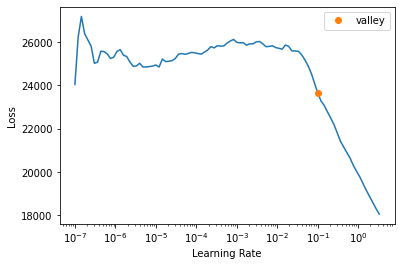

<Figure size 720x720 with 0 Axes>

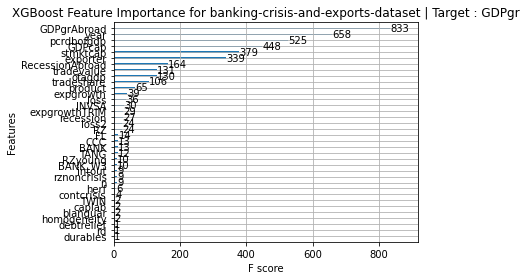

Target Variable: recession
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup',

  2%|▏         | 1/42 [00:00<00:32,  1.25it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6892021017755611, 'Adjusted R-Squared': 0.6858238637513824, 'RMSE': 0.2270712912620933, 'Time taken': 0.7997896671295166}


  7%|▋         | 3/42 [00:01<00:19,  1.95it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9999849306811333, 'Adjusted R-Squared': 0.999984766884189, 'RMSE': 0.001581138830084191, 'Time taken': 0.8899290561676025}
{'Model': 'BayesianRidge', 'R-Squared': 0.43892036254161415, 'Adjusted R-Squared': 0.4328216708301099, 'RMSE': 0.30509525046179625, 'Time taken': 0.10423851013183594}


 10%|▉         | 4/42 [00:02<00:15,  2.50it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2263643741607666}
{'Model': 'DummyRegressor', 'R-Squared': -1.8459915611668265e-05, 'Adjusted R-Squared': -0.010888225784259742, 'RMSE': 0.4073119965088187, 'Time taken': 0.03252458572387695}
{'Model': 'ElasticNet', 'R-Squared': -1.8488119495119193e-05, 'Adjusted R-Squared': -0.010888254294707078, 'RMSE': 0.407312, 'Time taken': 0.04716134071350098}


 17%|█▋        | 7/42 [00:02<00:10,  3.46it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.4393148595264128, 'Adjusted R-Squared': 0.43322045582561297, 'RMSE': 0.30498797, 'Time taken': 0.5874207019805908}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9984930681133213, 'Adjusted R-Squared': 0.9984766884189009, 'RMSE': 0.015811388300841896, 'Time taken': 0.08731508255004883}


 24%|██▍       | 10/42 [00:05<00:18,  1.75it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999059674502713, 'Adjusted R-Squared': 0.9999049453573394, 'RMSE': 0.003949683531626301, 'Time taken': 2.6572964191436768}
{'Model': 'GammaRegressor', 'R-Squared': 0.340682916366282, 'Adjusted R-Squared': 0.333516426326785, 'RMSE': 0.3307275376723774, 'Time taken': 0.11262941360473633}


 26%|██▌       | 11/42 [01:19<09:02, 17.50s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.9307864156111827, 'Adjusted R-Squared': -1.9626427896939131, 'RMSE': 0.6972929559015315, 'Time taken': 73.63229036331177}


 29%|██▊       | 12/42 [01:19<06:36, 13.20s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3451746469016316, 'Adjusted R-Squared': 0.3380569800201275, 'RMSE': 0.329599038346624, 'Time taken': 0.20974206924438477}


 31%|███       | 13/42 [01:26<05:37, 11.65s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9368954442434219, 'Adjusted R-Squared': 0.9362095251591113, 'RMSE': 0.10231835514714022, 'Time taken': 7.270843505859375}


 33%|███▎      | 14/42 [01:28<04:07,  8.85s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999499710367703, 'Adjusted R-Squared': 0.9999494272436917, 'RMSE': 0.002880938215201865, 'Time taken': 1.3673861026763916}


 36%|███▌      | 15/42 [01:29<03:05,  6.89s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.10240175150375075, 'Adjusted R-Squared': 0.09264524880270453, 'RMSE': 0.3858905925589891, 'Time taken': 1.840555191040039}


 38%|███▊      | 16/42 [01:35<02:52,  6.65s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.6229656419529837, 'Adjusted R-Squared': 0.6188674424089944, 'RMSE': 0.250099980007996, 'Time taken': 6.060170412063599}


 40%|████      | 17/42 [01:53<04:07,  9.89s/it]

{'Model': 'KernelRidge', 'R-Squared': -8.365436652424899, 'Adjusted R-Squared': -8.467234876907778, 'RMSE': 1.2464854, 'Time taken': 17.814110040664673}
{'Model': 'Lars', 'R-Squared': 0.43661537903406966, 'Adjusted R-Squared': 0.4304916331540052, 'RMSE': 0.3057212923861337, 'Time taken': 0.07586932182312012}


 45%|████▌     | 19/42 [01:54<02:06,  5.50s/it]

{'Model': 'LarsCV', 'R-Squared': 0.4387683681261131, 'Adjusted R-Squared': 0.43266802430139695, 'RMSE': 0.30513657225556856, 'Time taken': 0.3137335777282715}
{'Model': 'Lasso', 'R-Squared': -1.8488119495119193e-05, 'Adjusted R-Squared': -0.010888254294707078, 'RMSE': 0.407312, 'Time taken': 0.05824470520019531}


 50%|█████     | 21/42 [01:54<01:12,  3.46s/it]

{'Model': 'LassoCV', 'R-Squared': 0.4393319751724649, 'Adjusted R-Squared': 0.433237757511296, 'RMSE': 0.30498332, 'Time taken': 0.5658309459686279}
{'Model': 'LassoLars', 'R-Squared': -1.8458949878397135e-05, 'Adjusted R-Squared': -0.010888224808029312, 'RMSE': 0.407311996312145, 'Time taken': 0.08101606369018555}


 60%|█████▉    | 25/42 [01:55<00:26,  1.53s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.4393448402342244, 'Adjusted R-Squared': 0.4332507624106833, 'RMSE': 0.30497982065235424, 'Time taken': 0.28444695472717285}
{'Model': 'LassoLarsIC', 'R-Squared': 0.4393079962916542, 'Adjusted R-Squared': 0.43321351799047647, 'RMSE': 0.30498984149511366, 'Time taken': 0.08547115325927734}
{'Model': 'LinearRegression', 'R-Squared': 0.43889530978178926, 'Adjusted R-Squared': 0.4327963457576782, 'RMSE': 0.30510205, 'Time taken': 0.06752562522888184}


 62%|██████▏   | 26/42 [02:01<00:37,  2.34s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.09796617039104394, 'Adjusted R-Squared': 0.08816145485181615, 'RMSE': 0.3868428780940988, 'Time taken': 5.6762402057647705}


 64%|██████▍   | 27/42 [02:17<01:21,  5.45s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9684738651414905, 'Adjusted R-Squared': 0.9681311897625936, 'RMSE': 0.07232002332014782, 'Time taken': 16.613285064697266}


 67%|██████▋   | 28/42 [03:24<04:39, 19.96s/it]

{'Model': 'NuSVR', 'R-Squared': 0.7515367107437396, 'Adjusted R-Squared': 0.7488360228170412, 'RMSE': 0.20302723878241954, 'Time taken': 66.54125356674194}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.37775564932333394, 'Adjusted R-Squared': 0.37099212377250057, 'RMSE': 0.32129478330227973, 'Time taken': 0.04717087745666504}


 74%|███████▍  | 31/42 [03:24<01:42,  9.29s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.38794541284323913, 'Adjusted R-Squared': 0.3812926455915352, 'RMSE': 0.31865319080358606, 'Time taken': 0.16982340812683105}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.264039964935602, 'Adjusted R-Squared': -0.2777795297718586, 'RMSE': 0.4579347444590947, 'Time taken': 0.12073564529418945}


 76%|███████▌  | 32/42 [03:24<01:10,  7.07s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.36961876624058865, 'Adjusted R-Squared': 0.3627667963084211, 'RMSE': 0.3233886928769872, 'Time taken': 0.14461350440979004}


 79%|███████▊  | 33/42 [03:24<00:48,  5.34s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [03:33<00:48,  6.09s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.99999547920434, 'Adjusted R-Squared': 0.9999954300652567, 'RMSE': 0.0008660254037844393, 'Time taken': 8.131742000579834}
{'Model': 'Ridge', 'R-Squared': 0.4388782024441886, 'Adjusted R-Squared': 0.4327790524707559, 'RMSE': 0.3051067, 'Time taken': 0.05811357498168945}


 88%|████████▊ | 37/42 [03:33<00:13,  2.70s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.4388919315774026, 'Adjusted R-Squared': 0.43279293083367865, 'RMSE': 0.3051029802399657, 'Time taken': 0.18326544761657715}
{'Model': 'SGDRegressor', 'R-Squared': 0.4348832520479936, 'Adjusted R-Squared': 0.4287406787006892, 'RMSE': 0.30619090202884514, 'Time taken': 0.13629150390625}


 90%|█████████ | 38/42 [03:49<00:23,  5.95s/it]

{'Model': 'SVR', 'R-Squared': 0.7610332311497146, 'Adjusted R-Squared': 0.7584357662709071, 'RMSE': 0.19910948483751936, 'Time taken': 15.552413940429688}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.43889530978178926, 'Adjusted R-Squared': 0.4327963457576782, 'RMSE': 0.30510205, 'Time taken': 0.06795263290405273}


 95%|█████████▌| 40/42 [03:49<00:07,  3.51s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.3451746469016316, 'Adjusted R-Squared': 0.3380569800201275, 'RMSE': 0.329599038346624, 'Time taken': 0.17711830139160156}


 98%|█████████▊| 41/42 [03:51<00:03,  3.22s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999401350255905, 'Adjusted R-Squared': 0.999939484319347, 'RMSE': 0.003151444, 'Time taken': 2.256938934326172}


100%|██████████| 42/42 [03:52<00:00,  5.53s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999294479, 'Adjusted R-Squared': 0.9999999992868103, 'RMSE': 1.0818776363949288e-05, 'Time taken': 0.5259661674499512}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: recession
recession
Target Standard Deviation: 0.4060565693348649
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.23
LGBMRegressor                                1.00       1.00  0.00        0.53
RandomForestRegressor                        1.00       1.00  0.00        8.13
BaggingRegressor                             1.00       1.00  0.00        0.89
HistGradientBoostingRegressor                1.00       1.00  0.00        1.37
XGBRegressor                                 1.00       1.00  0.00        2.26
ExtraTreesRegressor                          1.0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.794860,0.414663,0.643943,00:17
1,0.116253,0.053822,0.231995,00:17
2,0.055659,0.403355,0.635102,00:17


Better model found at epoch 0 with _rmse value: 0.6439433693885803.
Better model found at epoch 1 with _rmse value: 0.23199515044689178.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       2       2.00
4       1       1.00
XGBoost RMSE:  0.003151444


<Figure size 432x288 with 0 Axes>

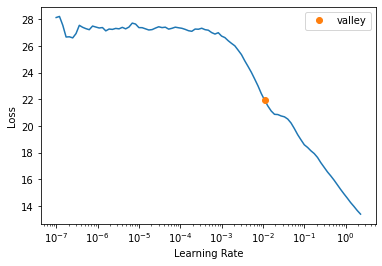

<Figure size 720x720 with 0 Axes>

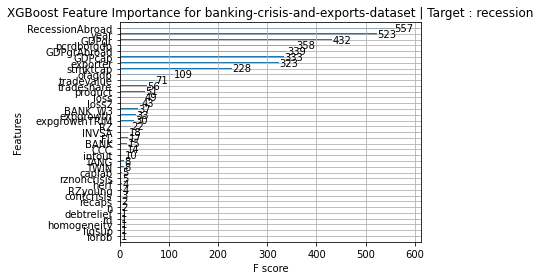

Target Variable: policytot
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup',

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09529328346252441}


  7%|▋         | 3/42 [00:00<00:07,  5.00it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.3842916488647461}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.427914016887194e-12, 'Time taken': 0.14256763458251953}


 10%|▉         | 4/42 [00:00<00:07,  5.42it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.15645360946655273}
{'Model': 'DummyRegressor', 'R-Squared': -0.00011621071297862606, 'Adjusted R-Squared': -0.010987039090293749, 'RMSE': 0.417459803454177, 'Time taken': 0.03442215919494629}
{'Model': 'ElasticNet', 'R-Squared': -0.0001162664605691699, 'Adjusted R-Squared': -0.010987095443836248, 'RMSE': 0.41745982, 'Time taken': 0.04015707969665527}


 19%|█▉        | 8/42 [00:01<00:05,  6.11it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9999983995080531, 'Adjusted R-Squared': 0.9999983821114016, 'RMSE': 0.0005281, 'Time taken': 0.4352431297302246}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11462545394897461}


 24%|██▍       | 10/42 [00:02<00:09,  3.31it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9950065612792969}
{'Model': 'GammaRegressor', 'R-Squared': 0.9117305433401482, 'Adjusted R-Squared': 0.9107710927242803, 'RMSE': 0.12402083687743676, 'Time taken': 0.1156623363494873}


 26%|██▌       | 11/42 [01:14<10:09, 19.66s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.5045501708014037, 'Adjusted R-Squared': -1.5317735422231582, 'RMSE': 0.6606239263780761, 'Time taken': 71.99832153320312}


 29%|██▊       | 12/42 [01:14<07:07, 14.25s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.9490684883684758, 'Adjusted R-Squared': 0.9485148849811766, 'RMSE': 0.09420690021093296, 'Time taken': 0.22427010536193848}


 31%|███       | 13/42 [01:21<05:49, 12.07s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944101, 'Adjusted R-Squared': 0.9999999992867407, 'RMSE': 1.1088316359067774e-05, 'Time taken': 6.57049298286438}


 33%|███▎      | 14/42 [01:21<04:04,  8.71s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998309638998, 'Adjusted R-Squared': 0.9999998291265508, 'RMSE': 0.00017162445191886393, 'Time taken': 0.46590375900268555}


 36%|███▌      | 15/42 [01:23<02:59,  6.64s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9985697724548455, 'Adjusted R-Squared': 0.9985542265032676, 'RMSE': 0.015786723406800488, 'Time taken': 1.6027836799621582}


 38%|███▊      | 16/42 [01:29<02:50,  6.57s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 6.403470993041992}


 40%|████      | 17/42 [01:45<03:49,  9.19s/it]

{'Model': 'KernelRidge', 'R-Squared': -5.443137010633682, 'Adjusted R-Squared': -5.513171108575352, 'RMSE': 1.0595907, 'Time taken': 15.411513090133667}
{'Model': 'Lars', 'R-Squared': 0.9999999996302443, 'Adjusted R-Squared': 0.9999999996262252, 'RMSE': 8.02688181525412e-06, 'Time taken': 0.060500383377075195}


 45%|████▌     | 19/42 [01:45<01:55,  5.04s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999999996302443, 'Adjusted R-Squared': 0.9999999996262252, 'RMSE': 8.02688181525412e-06, 'Time taken': 0.20545721054077148}
{'Model': 'Lasso', 'R-Squared': -0.0001162664605691699, 'Adjusted R-Squared': -0.010987095443836248, 'RMSE': 0.41745982, 'Time taken': 0.09688377380371094}


 52%|█████▏    | 22/42 [01:46<00:49,  2.48s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9999986545075793, 'Adjusted R-Squared': 0.9999986398826617, 'RMSE': 0.00048420587, 'Time taken': 0.4404454231262207}
{'Model': 'LassoLars', 'R-Squared': -0.00011621056520882966, 'Adjusted R-Squared': -0.010987038940917682, 'RMSE': 0.41745980342333655, 'Time taken': 0.11429166793823242}


 60%|█████▉    | 25/42 [01:46<00:19,  1.17s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999999996302443, 'Adjusted R-Squared': 0.9999999996262252, 'RMSE': 8.02688181525412e-06, 'Time taken': 0.1690058708190918}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999999996302443, 'Adjusted R-Squared': 0.9999999996262252, 'RMSE': 8.02688181525412e-06, 'Time taken': 0.06933164596557617}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999996239, 'Adjusted R-Squared': 0.9999999999996197, 'RMSE': 2.5600178e-07, 'Time taken': 0.06667351722717285}


 62%|██████▏   | 26/42 [01:46<00:14,  1.07it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999999987275, 'Adjusted R-Squared': 0.9999999999987136, 'RMSE': 4.7088921278430857e-07, 'Time taken': 0.10873937606811523}


 64%|██████▍   | 27/42 [01:49<00:22,  1.50s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9899637306251968, 'Adjusted R-Squared': 0.9898546407406881, 'RMSE': 0.04181918700747365, 'Time taken': 3.232877254486084}


 71%|███████▏  | 30/42 [17:36<28:13, 141.12s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9728573041880331, 'Adjusted R-Squared': 0.9725622748857291, 'RMSE': 0.06877267557363376, 'Time taken': 945.991532087326}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9881722110881442, 'Adjusted R-Squared': 0.9880436481651893, 'RMSE': 0.0453984696672294, 'Time taken': 0.0635678768157959}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.99999999967396, 'Adjusted R-Squared': 0.9999999996704161, 'RMSE': 7.537456857014761e-06, 'Time taken': 0.1266164779663086}


 76%|███████▌  | 32/42 [17:36<13:33, 81.36s/it] 

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.9941754162727964, 'Adjusted R-Squared': 0.9941121055801094, 'RMSE': 0.03185824715655362, 'Time taken': 0.10092949867248535}
{'Model': 'PoissonRegressor', 'R-Squared': 0.982632381666823, 'Adjusted R-Squared': 0.9824436032066798, 'RMSE': 0.05501226979616262, 'Time taken': 0.15388774871826172}


 79%|███████▊  | 33/42 [17:36<09:00, 60.09s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [17:40<02:30, 25.10s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 3.3497815132141113}
{'Model': 'Ridge', 'R-Squared': 0.9999999987355543, 'Adjusted R-Squared': 0.9999999987218103, 'RMSE': 1.4843609e-05, 'Time taken': 0.04139137268066406}
{'Model': 'RidgeCV', 'R-Squared': 0.9999999999848582, 'Adjusted R-Squared': 0.9999999999846937, 'RMSE': 1.6243437127425246e-06, 'Time taken': 0.09774971008300781}


 88%|████████▊ | 37/42 [17:40<01:35, 19.15s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9999951689742201, 'Adjusted R-Squared': 0.9999951164630704, 'RMSE': 0.0009175064129305732, 'Time taken': 0.11365985870361328}


 95%|█████████▌| 40/42 [17:42<00:17,  8.63s/it]

{'Model': 'SVR', 'R-Squared': 0.9621655917300079, 'Adjusted R-Squared': 0.9617543481618558, 'RMSE': 0.08119567637760197, 'Time taken': 2.1601030826568604}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999996239, 'Adjusted R-Squared': 0.9999999999996197, 'RMSE': 2.5600178e-07, 'Time taken': 0.053461551666259766}
{'Model': 'TweedieRegressor', 'R-Squared': 0.9490684883684758, 'Adjusted R-Squared': 0.9485148849811766, 'RMSE': 0.09420690021093296, 'Time taken': 0.10789132118225098}


 98%|█████████▊| 41/42 [17:43<00:06,  6.81s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999995884178, 'Adjusted R-Squared': 0.999999999583944, 'RMSE': 8.468719e-06, 'Time taken': 0.762890100479126}


100%|██████████| 42/42 [17:43<00:00, 25.32s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944101, 'Adjusted R-Squared': 0.9999999992867407, 'RMSE': 1.108831632354979e-05, 'Time taken': 0.22086811065673828}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: policytot
policytot
Target Standard Deviation: 0.43559090612637913
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.10
ExtraTreeRegressor                           1.00       1.00  0.00        0.11
BaggingRegressor                             1.00       1.00  0.00        0.38
KNeighborsRegressor                          1.00       1.00  0.00        6.40
ExtraTreesRegressor                          1.00       1.00  0.00        1.00
RandomForestRegressor                        1.00       1.00  0.00        3.35
DecisionTreeRegressor                        1

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.780820,0.501814,0.708388,00:17
1,0.177066,0.167794,0.409627,00:16
2,0.183601,0.369571,0.607924,00:17


Better model found at epoch 0 with _rmse value: 0.7083880305290222.
Better model found at epoch 1 with _rmse value: 0.4096265733242035.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  8.468719e-06


<Figure size 432x288 with 0 Axes>

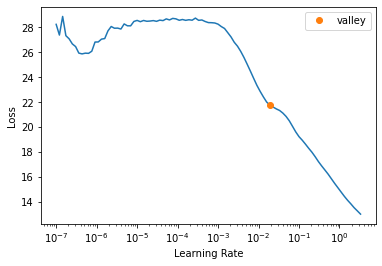

<Figure size 720x720 with 0 Axes>

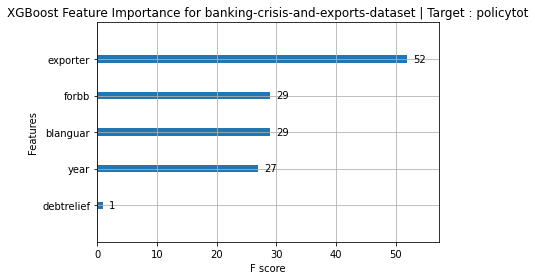

Target Variable: debtrelief
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup'

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06737160682678223}


  7%|▋         | 3/42 [00:00<00:04,  7.82it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2226698398590088}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999999999999979, 'Adjusted R-Squared': 0.9999999999999979, 'RMSE': 1.940424540009921e-09, 'Time taken': 0.10189962387084961}


 10%|▉         | 4/42 [00:00<00:04,  8.07it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11510705947875977}
{'Model': 'DummyRegressor', 'R-Squared': -8.049801438225757e-05, 'Adjusted R-Squared': -0.010950938210190886, 'RMSE': 0.041798063651322416, 'Time taken': 0.031159400939941406}
{'Model': 'ElasticNet', 'R-Squared': -8.053204234093059e-05, 'Adjusted R-Squared': -0.010950972608018583, 'RMSE': 0.041798066, 'Time taken': 0.046090126037597656}


 17%|█▋        | 7/42 [00:02<00:12,  2.82it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9997865085037589, 'Adjusted R-Squared': 0.9997841879440172, 'RMSE': 0.00061070145, 'Time taken': 1.4139504432678223}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06942105293273926}


 21%|██▏       | 9/42 [00:02<00:11,  2.87it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.605210542678833}
{'Model': 'GammaRegressor', 'R-Squared': 0.20711530404162815, 'Adjusted R-Squared': 0.19849699212903715, 'RMSE': 0.037217200439390634, 'Time taken': 0.09107089042663574}


 29%|██▊       | 12/42 [01:23<05:40, 11.35s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -153.9462946817639, 'Adjusted R-Squared': -155.63049353700046, 'RMSE': 0.5202705956188798, 'Time taken': 80.22453355789185}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.2102366146190866, 'Adjusted R-Squared': 0.20165222999538102, 'RMSE': 0.03714387263128159, 'Time taken': 0.17759370803833008}


 31%|███       | 13/42 [01:28<04:49, 10.00s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944353, 'Adjusted R-Squared': 0.9999999992867661, 'RMSE': 1.1102150413680365e-06, 'Time taken': 5.21625280380249}


 33%|███▎      | 14/42 [01:29<03:37,  7.78s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9783367130604831, 'Adjusted R-Squared': 0.978101242550271, 'RMSE': 0.006151780907014029, 'Time taken': 0.7522890567779541}


 36%|███▌      | 15/42 [01:30<02:48,  6.26s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.19296726622800697, 'Adjusted R-Squared': 0.18419517129570262, 'RMSE': 0.03754777951295937, 'Time taken': 1.790372371673584}


 38%|███▊      | 16/42 [01:36<02:39,  6.15s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9942756967550356, 'Adjusted R-Squared': 0.9942134760675904, 'RMSE': 0.0031622776601683785, 'Time taken': 5.838927507400513}


 40%|████      | 17/42 [01:52<03:40,  8.81s/it]

{'Model': 'KernelRidge', 'R-Squared': -573.1833659225931, 'Adjusted R-Squared': -579.4244894652301, 'RMSE': 1.00153, 'Time taken': 15.779323816299438}
{'Model': 'Lars', 'R-Squared': -0.20308623141911908, 'Adjusted R-Squared': -0.21616325567367478, 'RMSE': 0.045844481166218226, 'Time taken': 0.07053613662719727}


 45%|████▌     | 19/42 [01:52<01:54,  5.00s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8774119311277965, 'Adjusted R-Squared': 0.876079452118316, 'RMSE': 0.014633991067560314, 'Time taken': 0.27283477783203125}
{'Model': 'Lasso', 'R-Squared': -8.053204234093059e-05, 'Adjusted R-Squared': -0.010950972608018583, 'RMSE': 0.041798066, 'Time taken': 0.07643747329711914}


 52%|█████▏    | 22/42 [01:54<00:52,  2.65s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9998640567551039, 'Adjusted R-Squared': 0.9998625791111376, 'RMSE': 0.00048732365, 'Time taken': 1.3730816841125488}
{'Model': 'LassoLars', 'R-Squared': -8.051521153151775e-05, 'Adjusted R-Squared': -0.01095095559426551, 'RMSE': 0.04179806401069726, 'Time taken': 0.11894989013671875}


 60%|█████▉    | 25/42 [01:54<00:21,  1.28s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999989772674943, 'Adjusted R-Squared': 0.9999989661508366, 'RMSE': 4.2268780046424246e-05, 'Time taken': 0.25197792053222656}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999989772674943, 'Adjusted R-Squared': 0.9999989661508366, 'RMSE': 4.2268780046424246e-05, 'Time taken': 0.06867265701293945}
{'Model': 'LinearRegression', 'R-Squared': 0.999999999984874, 'Adjusted R-Squared': 0.9999999999847096, 'RMSE': 1.6255521e-07, 'Time taken': 0.08518862724304199}


 62%|██████▏   | 26/42 [01:55<00:17,  1.11s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999837857825, 'Adjusted R-Squared': 0.999999983609541, 'RMSE': 5.322144745445512e-06, 'Time taken': 0.5274062156677246}


 64%|██████▍   | 27/42 [01:58<00:24,  1.64s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.06040399517058381, 'Adjusted R-Squared': 0.05019099511809011, 'RMSE': 0.04051438628051385, 'Time taken': 3.31321382522583}


 71%|███████▏  | 30/42 [02:17<00:41,  3.48s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9960818824959036, 'Adjusted R-Squared': 0.9960392942621634, 'RMSE': 0.0026162389793962836, 'Time taken': 18.470543146133423}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7330317169850575, 'Adjusted R-Squared': 0.7301298878218516, 'RMSE': 0.021595761271819437, 'Time taken': 0.04373025894165039}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999999983503638, 'Adjusted R-Squared': 0.9999999983324329, 'RMSE': 1.6975898623278061e-06, 'Time taken': 0.13860440254211426}


 76%|███████▌  | 32/42 [02:17<00:20,  2.06s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.3281725711089325, 'Adjusted R-Squared': -1.353478794707943, 'RMSE': 0.06377438334426772, 'Time taken': 0.09729790687561035}
{'Model': 'PoissonRegressor', 'R-Squared': 0.21832028893270228, 'Adjusted R-Squared': 0.20982377033414468, 'RMSE': 0.03695328943751324, 'Time taken': 0.12687063217163086}


 79%|███████▊  | 33/42 [02:17<00:14,  1.60s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [02:19<00:13,  1.66s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.8179864883422852}
{'Model': 'Ridge', 'R-Squared': 0.9998427575982504, 'Adjusted R-Squared': 0.9998410484417096, 'RMSE': 0.0005241113, 'Time taken': 0.05795478820800781}
{'Model': 'RidgeCV', 'R-Squared': 0.9999984292564039, 'Adjusted R-Squared': 0.9999984121831039, 'RMSE': 5.238311646856501e-05, 'Time taken': 0.14208030700683594}


 88%|████████▊ | 37/42 [02:20<00:03,  1.28it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.6905719120640981, 'Adjusted R-Squared': 0.687208563282186, 'RMSE': 0.02324976409274995, 'Time taken': 0.14700031280517578}


 95%|█████████▌| 40/42 [02:21<00:00,  2.10it/s]

{'Model': 'SVR', 'R-Squared': -3.626996893356967, 'Adjusted R-Squared': -3.6772903378499775, 'RMSE': 0.0899059196348538, 'Time taken': 0.7342259883880615}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.999999999984874, 'Adjusted R-Squared': 0.9999999999847096, 'RMSE': 1.6255521e-07, 'Time taken': 0.04802417755126953}
{'Model': 'TweedieRegressor', 'R-Squared': 0.2102366146190866, 'Adjusted R-Squared': 0.20165222999538102, 'RMSE': 0.03714387263128159, 'Time taken': 0.09505200386047363}


100%|██████████| 42/42 [02:21<00:00,  3.38s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999623366176, 'Adjusted R-Squared': 0.999999961927233, 'RMSE': 8.111448e-06, 'Time taken': 0.6416370868682861}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944353, 'Adjusted R-Squared': 0.9999999992867661, 'RMSE': 1.1102150474509002e-06, 'Time taken': 0.1862025260925293}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: debtrelief
debtrelief
Target Standard Deviation: 0.03705549048386757
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
DecisionTreeRegressor                        1.00       1.00  0.00        0.12
RandomForestRegressor                        1.00       1.00  0.00        1.82
ExtraTreeRegressor                           1.00       1.00  0.00        0.07
ExtraTreesRegressor                          1

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.605018,0.362088,0.601738,00:17
1,0.042121,0.012052,0.109782,00:16
2,0.023335,0.012363,0.111187,00:17


Better model found at epoch 0 with _rmse value: 0.6017375588417053.
Better model found at epoch 1 with _rmse value: 0.10978181660175323.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  8.111448e-06


<Figure size 432x288 with 0 Axes>

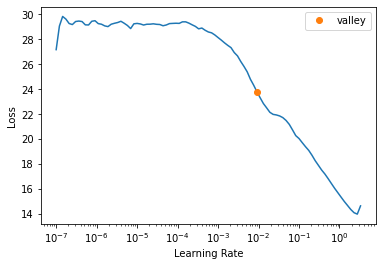

<Figure size 720x720 with 0 Axes>

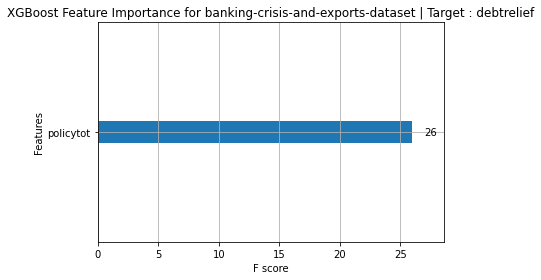

Target Variable: recaps
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'f

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06817436218261719}


 10%|▉         | 4/42 [00:00<00:04,  9.27it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.22440814971923828}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999999999999994, 'Adjusted R-Squared': 0.9999999999999994, 'RMSE': 2.153314708179417e-09, 'Time taken': 0.07247519493103027}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08791255950927734}
{'Model': 'DummyRegressor', 'R-Squared': -0.00021054380456897448, 'Adjusted R-Squared': -0.01108239754157525, 'RMSE': 0.09046358469710339, 'Time taken': 0.04473686218261719}
{'Model': 'ElasticNet', 'R-Squared': -0.00021053344700705523, 'Adjusted R-Squared': -0.011082387071431166, 'RMSE': 0.090463586, 'Time taken': 0.04074430465698242}


 17%|█▋        | 7/42 [00:01<00:07,  4.64it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9994810163661052, 'Adjusted R-Squared': 0.9994753752396498, 'RMSE': 0.0020606532, 'Time taken': 0.8133058547973633}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.061041831970214844}


 24%|██▍       | 10/42 [00:02<00:08,  4.00it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.673133373260498}
{'Model': 'GammaRegressor', 'R-Squared': 0.5885381837961576, 'Adjusted R-Squared': 0.5840657727504637, 'RMSE': 0.058022020507875506, 'Time taken': 0.17492175102233887}


 29%|██▊       | 12/42 [01:14<06:09, 12.31s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -32.765944751760266, 'Adjusted R-Squared': -33.13296589036636, 'RMSE': 0.5256147349412453, 'Time taken': 72.21347951889038}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5931033362558202, 'Adjusted R-Squared': 0.588680546432514, 'RMSE': 0.057699246717036044, 'Time taken': 0.14639043807983398}


 31%|███       | 13/42 [01:19<05:02, 10.43s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992943436, 'Adjusted R-Squared': 0.9999999992866734, 'RMSE': 2.4028393579328323e-06, 'Time taken': 4.936969041824341}


 33%|███▎      | 14/42 [01:19<03:36,  7.73s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999978809637544, 'Adjusted R-Squared': 0.9999978579307518, 'RMSE': 0.00013167316401317797, 'Time taken': 0.3366227149963379}


 36%|███▌      | 15/42 [01:21<02:43,  6.04s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7027384601547582, 'Adjusted R-Squared': 0.6995073564607881, 'RMSE': 0.049317089737407754, 'Time taken': 1.6001853942871094}


 38%|███▊      | 16/42 [01:27<02:37,  6.05s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 6.087647438049316}


 40%|████      | 17/42 [01:43<03:40,  8.83s/it]

{'Model': 'KernelRidge', 'R-Squared': -123.63480154057682, 'Adjusted R-Squared': -124.98952764427874, 'RMSE': 1.0098288, 'Time taken': 15.685704469680786}
{'Model': 'Lars', 'R-Squared': 0.9999987839517628, 'Adjusted R-Squared': 0.9999987707338471, 'RMSE': 9.97478354344241e-05, 'Time taken': 0.06235527992248535}


 45%|████▌     | 19/42 [01:43<01:52,  4.90s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999987839517628, 'Adjusted R-Squared': 0.9999987707338471, 'RMSE': 9.97478354344241e-05, 'Time taken': 0.17260074615478516}
{'Model': 'Lasso', 'R-Squared': -0.00021053344700705523, 'Adjusted R-Squared': -0.011082387071431166, 'RMSE': 0.090463586, 'Time taken': 0.0736839771270752}


 50%|█████     | 21/42 [01:44<01:06,  3.15s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9996720977313461, 'Adjusted R-Squared': 0.9996685335762521, 'RMSE': 0.0016379487, 'Time taken': 0.8300843238830566}
{'Model': 'LassoLars', 'R-Squared': -0.00021054135684805964, 'Adjusted R-Squared': -0.01108239506724873, 'RMSE': 0.09046358458641189, 'Time taken': 0.05717349052429199}


 60%|█████▉    | 25/42 [01:44<00:23,  1.40s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999987839517628, 'Adjusted R-Squared': 0.9999987707338471, 'RMSE': 9.97478354344241e-05, 'Time taken': 0.17140483856201172}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999987839517628, 'Adjusted R-Squared': 0.9999987707338471, 'RMSE': 9.97478354344241e-05, 'Time taken': 0.08039307594299316}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999978909, 'Adjusted R-Squared': 0.999999999997868, 'RMSE': 1.3136369e-07, 'Time taken': 0.10315275192260742}


 62%|██████▏   | 26/42 [01:45<00:19,  1.19s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999968817042, 'Adjusted R-Squared': 0.9999999968478096, 'RMSE': 5.051108989472659e-06, 'Time taken': 0.3127157688140869}


 64%|██████▍   | 27/42 [01:48<00:25,  1.72s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.7822643887234215, 'Adjusted R-Squared': 0.7798976972965022, 'RMSE': 0.042207809265457745, 'Time taken': 3.6035046577453613}


 67%|██████▋   | 28/42 [03:56<07:21, 31.54s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9921551530602546, 'Adjusted R-Squared': 0.9920698829848226, 'RMSE': 0.008011619521548868, 'Time taken': 127.3807954788208}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9332678567079147, 'Adjusted R-Squared': 0.932542507324305, 'RMSE': 0.023366604923627365, 'Time taken': 0.04469656944274902}


 74%|███████▍  | 31/42 [03:56<02:41, 14.65s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.93665621653587, 'Adjusted R-Squared': 0.9359676971503903, 'RMSE': 0.02276565126055141, 'Time taken': 0.1927194595336914}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7658922861951861, 'Adjusted R-Squared': 0.7633476371320903, 'RMSE': 0.04376590776642106, 'Time taken': 0.11702179908752441}


 76%|███████▌  | 32/42 [03:56<01:51, 11.13s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.6283770702168268, 'Adjusted R-Squared': 0.6243376905452704, 'RMSE': 0.05514159577898352, 'Time taken': 0.1429452896118164}


 79%|███████▊  | 33/42 [03:57<01:15,  8.35s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [03:58<00:52,  6.61s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.8666458129882812}
{'Model': 'Ridge', 'R-Squared': 0.999985114165789, 'Adjusted R-Squared': 0.9999849523632431, 'RMSE': 0.00034899137, 'Time taken': 0.05932140350341797}


 88%|████████▊ | 37/42 [03:59<00:14,  2.92s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9999998503659958, 'Adjusted R-Squared': 0.9999998487395393, 'RMSE': 3.498994240894228e-05, 'Time taken': 0.15529966354370117}
{'Model': 'SGDRegressor', 'R-Squared': 0.9373454919197404, 'Adjusted R-Squared': 0.9366644646579985, 'RMSE': 0.02264145024520137, 'Time taken': 0.13343000411987305}


 90%|█████████ | 38/42 [04:00<00:09,  2.41s/it]

{'Model': 'SVR', 'R-Squared': 0.7530007966475704, 'Adjusted R-Squared': 0.7503160226980874, 'RMSE': 0.0449547777703257, 'Time taken': 0.8822224140167236}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999978909, 'Adjusted R-Squared': 0.999999999997868, 'RMSE': 1.3136369e-07, 'Time taken': 0.05820584297180176}


 95%|█████████▌| 40/42 [04:00<00:02,  1.44s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.5931033362558202, 'Adjusted R-Squared': 0.588680546432514, 'RMSE': 0.057699246717036044, 'Time taken': 0.15169215202331543}


100%|██████████| 42/42 [04:01<00:00,  5.74s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999881251674, 'Adjusted R-Squared': 0.9999999879960931, 'RMSE': 9.8569335e-06, 'Time taken': 0.6689651012420654}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992943435, 'Adjusted R-Squared': 0.9999999992866733, 'RMSE': 2.40283941868301e-06, 'Time taken': 0.18801450729370117}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: recaps
recaps
Target Standard Deviation: 0.09731936391977702
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
DecisionTreeRegressor                        1.00       1.00  0.00        0.09
RandomForestRegressor                        1.00       1.00  0.00        1.87
ExtraTreeRegressor                           1.00       1.00  0.00        0.06
ExtraTreesRegressor                          1.00    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.439191,0.199385,0.446525,00:17
1,0.031160,0.028987,0.170256,00:17
2,0.038962,0.193661,0.440069,00:17


Better model found at epoch 0 with _rmse value: 0.44652509689331055.
Better model found at epoch 1 with _rmse value: 0.17025642096996307.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  9.8569335e-06


<Figure size 432x288 with 0 Axes>

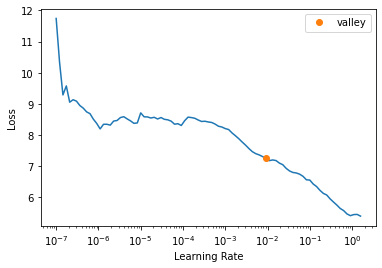

<Figure size 720x720 with 0 Axes>

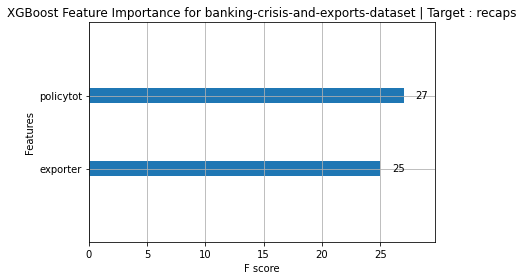

Target Variable: forbb
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'fo

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06935882568359375}


 10%|▉         | 4/42 [00:00<00:04,  8.58it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.22836613655090332}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999999999999997, 'Adjusted R-Squared': 0.9999999999999997, 'RMSE': 2.443397369894601e-09, 'Time taken': 0.08819699287414551}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09838366508483887}
{'Model': 'DummyRegressor', 'R-Squared': -0.0002267861678579841, 'Adjusted R-Squared': -0.011098816452291382, 'RMSE': 0.12452089433103183, 'Time taken': 0.04332470893859863}
{'Model': 'ElasticNet', 'R-Squared': -0.00022679917932810767, 'Adjusted R-Squared': -0.011098829605190375, 'RMSE': 0.124520905, 'Time taken': 0.0424349308013916}


 17%|█▋        | 7/42 [00:01<00:06,  5.83it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9997612597776249, 'Adjusted R-Squared': 0.9997586647752077, 'RMSE': 0.0019237818, 'Time taken': 0.5501384735107422}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05980205535888672}


 24%|██▍       | 10/42 [00:02<00:08,  3.98it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999983872983619, 'Adjusted R-Squared': 0.9999983697689963, 'RMSE': 0.0001581138830084191, 'Time taken': 0.9309854507446289}
{'Model': 'GammaRegressor', 'R-Squared': 0.7009549811893947, 'Adjusted R-Squared': 0.6977044918544968, 'RMSE': 0.06808654192487916, 'Time taken': 0.1136472225189209}


 26%|██▌       | 11/42 [01:16<08:31, 16.50s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -18.216595837627857, 'Adjusted R-Squared': -18.425471879341202, 'RMSE': 0.5457970938340246, 'Time taken': 73.79583883285522}


 29%|██▊       | 12/42 [01:16<06:17, 12.59s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7107050386632188, 'Adjusted R-Squared': 0.7075605282139059, 'RMSE': 0.06696739811063064, 'Time taken': 0.20532822608947754}


 31%|███       | 13/42 [01:21<05:07, 10.62s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992943321, 'Adjusted R-Squared': 0.9999999992866618, 'RMSE': 3.3074491441642383e-06, 'Time taken': 4.841813802719116}


 33%|███▎      | 14/42 [01:21<03:40,  7.87s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.999998609640773, 'Adjusted R-Squared': 0.9999985945281727, 'RMSE': 0.00014681029200787053, 'Time taken': 0.3578643798828125}


 36%|███▌      | 15/42 [01:23<02:46,  6.18s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7575758481542489, 'Adjusted R-Squared': 0.7549408030254907, 'RMSE': 0.06130288778192543, 'Time taken': 1.7495827674865723}


 38%|███▊      | 16/42 [01:29<02:43,  6.29s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.998064758034278, 'Adjusted R-Squared': 0.9980437227955201, 'RMSE': 0.0054772255750516596, 'Time taken': 6.569828033447266}


 40%|████      | 17/42 [01:45<03:47,  9.10s/it]

{'Model': 'KernelRidge', 'R-Squared': -65.57063201981875, 'Adjusted R-Squared': -66.29422584612112, 'RMSE': 1.015861, 'Time taken': 16.04854655265808}
{'Model': 'Lars', 'R-Squared': 0.999997524433674, 'Adjusted R-Squared': 0.9999974975253443, 'RMSE': 0.00019589812266421756, 'Time taken': 0.06167459487915039}


 45%|████▌     | 19/42 [01:46<01:56,  5.05s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7794122241843068, 'Adjusted R-Squared': 0.7770145309689188, 'RMSE': 0.05847681518310387, 'Time taken': 0.19797587394714355}
{'Model': 'Lasso', 'R-Squared': -0.00022679917932810767, 'Adjusted R-Squared': -0.011098829605190375, 'RMSE': 0.124520905, 'Time taken': 0.09348487854003906}


 50%|█████     | 21/42 [01:46<01:07,  3.22s/it]

{'Model': 'LassoCV', 'R-Squared': 0.999851111139794, 'Adjusted R-Squared': 0.9998494927826178, 'RMSE': 0.001519232, 'Time taken': 0.6712732315063477}
{'Model': 'LassoLars', 'R-Squared': -0.00022677993903297278, 'Adjusted R-Squared': -0.01109881015576164, 'RMSE': 0.12452089394331033, 'Time taken': 0.05898642539978027}


 60%|█████▉    | 25/42 [01:47<00:24,  1.42s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.999997524433674, 'Adjusted R-Squared': 0.9999974975253443, 'RMSE': 0.00019589812266421756, 'Time taken': 0.16503572463989258}
{'Model': 'LassoLarsIC', 'R-Squared': 0.999997524433674, 'Adjusted R-Squared': 0.9999974975253443, 'RMSE': 0.00019589812266421756, 'Time taken': 0.07000136375427246}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999986718, 'Adjusted R-Squared': 0.9999999999986574, 'RMSE': 1.434882e-07, 'Time taken': 0.08803033828735352}


 62%|██████▏   | 26/42 [01:47<00:18,  1.17s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999998893494, 'Adjusted R-Squared': 0.9999999998881467, 'RMSE': 1.3096941038558652e-06, 'Time taken': 0.15802884101867676}


 64%|██████▍   | 27/42 [01:55<00:41,  2.75s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8836875612487205, 'Adjusted R-Squared': 0.8824232956101197, 'RMSE': 0.04246255004112343, 'Time taken': 8.392435073852539}


 67%|██████▋   | 28/42 [06:02<14:10, 60.74s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9747300689613291, 'Adjusted R-Squared': 0.9744553957978652, 'RMSE': 0.01979224321775546, 'Time taken': 247.09140610694885}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9431997383303626, 'Adjusted R-Squared': 0.9425823441817797, 'RMSE': 0.02967345794453965, 'Time taken': 0.05245518684387207}


 74%|███████▍  | 31/42 [06:03<05:09, 28.14s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9999999778875965, 'Adjusted R-Squared': 0.9999999776472444, 'RMSE': 1.8514456420787682e-05, 'Time taken': 0.1558830738067627}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.80911816940317, 'Adjusted R-Squared': 0.8070433668966828, 'RMSE': 0.05439704227067539, 'Time taken': 0.10715579986572266}


 76%|███████▌  | 32/42 [06:03<03:33, 21.36s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7245735001455773, 'Adjusted R-Squared': 0.7215797338428118, 'RMSE': 0.06534251591871114, 'Time taken': 0.14873313903808594}


 79%|███████▊  | 33/42 [06:03<02:23, 15.95s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [06:05<01:37, 12.17s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.8762753009796143}
{'Model': 'Ridge', 'R-Squared': 0.9999967474414799, 'Adjusted R-Squared': 0.999996712087583, 'RMSE': 0.00022454612, 'Time taken': 0.06007122993469238}


 88%|████████▊ | 37/42 [06:05<00:26,  5.32s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9999999647243591, 'Adjusted R-Squared': 0.9999999643409283, 'RMSE': 2.33846270138735e-05, 'Time taken': 0.1591804027557373}
{'Model': 'SGDRegressor', 'R-Squared': 0.9825261609889065, 'Adjusted R-Squared': 0.9823362279561773, 'RMSE': 0.01645838267373295, 'Time taken': 0.1394035816192627}


 95%|█████████▌| 40/42 [06:07<00:05,  2.50s/it]

{'Model': 'SVR', 'R-Squared': 0.8562038008131813, 'Adjusted R-Squared': 0.8546407986481072, 'RMSE': 0.047213554118829215, 'Time taken': 1.0888559818267822}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999986718, 'Adjusted R-Squared': 0.9999999999986574, 'RMSE': 1.434882e-07, 'Time taken': 0.0489954948425293}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7107050386632188, 'Adjusted R-Squared': 0.7075605282139059, 'RMSE': 0.06696739811063064, 'Time taken': 0.10788393020629883}


 98%|█████████▊| 41/42 [06:07<00:02,  2.08s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999940387773, 'Adjusted R-Squared': 0.9999999939739813, 'RMSE': 9.613038e-06, 'Time taken': 0.6730525493621826}


100%|██████████| 42/42 [06:08<00:00,  8.76s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999294332, 'Adjusted R-Squared': 0.9999999992866617, 'RMSE': 3.307449239491258e-06, 'Time taken': 0.20507478713989258}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: forbb
forbb
Target Standard Deviation: 0.13158403921068845
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
DecisionTreeRegressor                        1.00       1.00  0.00        0.10
RandomForestRegressor                        1.00       1.00  0.00        1.88
ExtraTreeRegressor                           1.00       1.00  0.00        0.06
BaggingRegressor                             1.00       1.00  0.00        0.23
BayesianRidge                                1.00       1.00  0.00        0.09
TransformedTargetRegressor                   1.00      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.250330,0.164420,0.405487,00:17
1,0.032773,0.017202,0.131157,00:17
2,0.031085,0.041887,0.204662,00:17


Better model found at epoch 0 with _rmse value: 0.4054872393608093.
Better model found at epoch 1 with _rmse value: 0.13115699589252472.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  9.613038e-06


<Figure size 432x288 with 0 Axes>

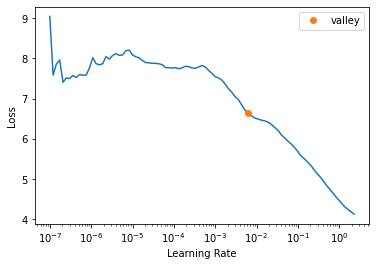

<Figure size 720x720 with 0 Axes>

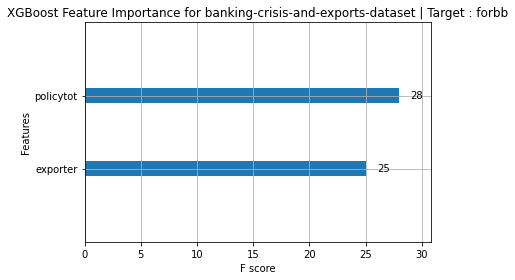

Target Variable: forba
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'fo

  5%|▍         | 2/42 [00:00<00:02, 17.58it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04387092590332031}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06969904899597168}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10786914825439453}


 10%|▉         | 4/42 [00:00<00:03, 11.48it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10678577423095703}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03462505340576172}


 14%|█▍        | 6/42 [00:00<00:03,  9.04it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.24066424369812012}


 19%|█▉        | 8/42 [00:01<00:10,  3.27it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.1055049896240234}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10108399391174316}


 21%|██▏       | 9/42 [00:01<00:08,  3.69it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14215731620788574}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.04717755317687988}


 26%|██▌       | 11/42 [01:19<07:47, 15.08s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.5237721164303242, 'Time taken': 77.23766303062439}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0661468505859375}


 33%|███▎      | 14/42 [01:19<03:38,  7.81s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16249299049377441}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10850262641906738}


 36%|███▌      | 15/42 [01:21<02:54,  6.46s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 2.610342525358533e-06, 'Time taken': 1.793766975402832}


 38%|███▊      | 16/42 [01:27<02:47,  6.43s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 6.3418591022491455}


 45%|████▌     | 19/42 [01:44<02:01,  5.27s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.9975627, 'Time taken': 16.706186294555664}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06587982177734375}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [01:44<01:30,  4.12s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.3142869472503662}


 52%|█████▏    | 22/42 [01:46<00:50,  2.51s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.1027541160583496}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10641741752624512}


 60%|█████▉    | 25/42 [01:46<00:18,  1.08s/it]

LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries
{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06105947494506836}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08463335037231445}


 62%|██████▏   | 26/42 [01:46<00:13,  1.17it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 5.248461205047063e-07, 'Time taken': 0.1502821445465088}


 64%|██████▍   | 27/42 [01:50<00:22,  1.53s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.046823209886833285, 'Time taken': 3.5085222721099854}


 71%|███████▏  | 30/42 [02:00<00:27,  2.25s/it]

{'Model': 'NuSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 2.842170943040401e-14, 'Time taken': 10.460081577301025}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.042534828186035156}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:00<00:14,  1.42s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.03498058606210462, 'Time taken': 0.09206485748291016}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05812644958496094}


 79%|███████▊  | 33/42 [02:01<00:10,  1.19s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [02:01<00:03,  1.63it/s]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2518422603607178}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.049813270568847656}
{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10953974723815918}


 93%|█████████▎| 39/42 [02:01<00:01,  2.99it/s]

{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.00011006035101251905, 'Time taken': 0.1219933032989502}
{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06525063514709473}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06397771835327148}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07265543937683105}


100%|██████████| 42/42 [02:02<00:00,  2.92s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.5772294998168945}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.144120454788208}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: forba
forba
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.04
Lars                                         1.00       1.00  0.00        0.07
XGBRegressor                                 1.00       1.00  0.00        0.58
TweedieRegressor                             1.00       1.00  0.00        0.07
TransformedTargetRegressor                   1.00       1.00  0.00        0.06
SVR                                          1.00       1.00  0.00        0.07
Ri

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.159652,0.073815,0.271689,00:17
1,0.019226,0.003596,0.059968,00:17
2,0.015431,0.174256,0.417440,00:17


Better model found at epoch 0 with _rmse value: 0.2716887891292572.
Better model found at epoch 1 with _rmse value: 0.05996805429458618.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: liqsup
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint


Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
Tabular Object size: 20000


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07451891899108887}


 10%|▉         | 4/42 [00:00<00:04,  8.58it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.24335670471191406}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 1.8259850523763615e-10, 'Time taken': 0.07920479774475098}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0926661491394043}
{'Model': 'DummyRegressor', 'R-Squared': -0.0003027595524003335, 'Adjusted R-Squared': -0.011175615634491765, 'RMSE': 0.10777501159823646, 'Time taken': 0.04309344291687012}
{'Model': 'ElasticNet', 'R-Squared': -0.00030279554416434706, 'Adjusted R-Squared': -0.011175652017470616, 'RMSE': 0.107775025, 'Time taken': 0.048284292221069336}


 17%|█▋        | 7/42 [00:01<00:07,  4.51it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9991481586085854, 'Adjusted R-Squared': 0.9991388994630266, 'RMSE': 0.00314508, 'Time taken': 0.8200209140777588}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05884385108947754}


 24%|██▍       | 10/42 [00:02<00:07,  4.20it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.6390182971954346}
{'Model': 'GammaRegressor', 'R-Squared': 0.6697159445747529, 'Adjusted R-Squared': 0.6661259004940436, 'RMSE': 0.061929296854110215, 'Time taken': 0.12113237380981445}


 29%|██▊       | 12/42 [01:15<06:11, 12.40s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -24.384843295806945, 'Adjusted R-Squared': -24.660765505543978, 'RMSE': 0.5429246851987892, 'Time taken': 72.73997473716736}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.67038826749705, 'Adjusted R-Squared': 0.6668055312741918, 'RMSE': 0.06186623341606449, 'Time taken': 0.14887332916259766}


 31%|███       | 13/42 [01:19<05:01, 10.41s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992942785, 'Adjusted R-Squared': 0.9999999992866077, 'RMSE': 2.8626550731501282e-06, 'Time taken': 4.626561880111694}


 33%|███▎      | 14/42 [01:20<03:36,  7.72s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999982834425806, 'Adjusted R-Squared': 0.9999982647843477, 'RMSE': 0.0001411827095263128, 'Time taken': 0.3471038341522217}


 36%|███▌      | 15/42 [01:21<02:43,  6.05s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8152165157433938, 'Adjusted R-Squared': 0.8132079996101699, 'RMSE': 0.0463216393300145, 'Time taken': 1.6794567108154297}


 38%|███▊      | 16/42 [01:28<02:40,  6.17s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 6.4752357006073}


 40%|████      | 17/42 [01:44<03:44,  8.98s/it]

{'Model': 'KernelRidge', 'R-Squared': -87.30734087717369, 'Adjusted R-Squared': -88.26720327801253, 'RMSE': 1.01263, 'Time taken': 15.91736888885498}
{'Model': 'Lars', 'R-Squared': -3.5503860161925402, 'Adjusted R-Squared': -3.5998467337598505, 'RMSE': 0.2298669137150925, 'Time taken': 0.07305407524108887}


 45%|████▌     | 19/42 [01:44<01:54,  4.99s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8637898747247853, 'Adjusted R-Squared': 0.8623093298848373, 'RMSE': 0.039770132782817866, 'Time taken': 0.22406268119812012}
{'Model': 'Lasso', 'R-Squared': -0.00030279554416434706, 'Adjusted R-Squared': -0.011175652017470616, 'RMSE': 0.107775025, 'Time taken': 0.07558822631835938}


 52%|█████▏    | 22/42 [01:45<00:51,  2.58s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9994467682902063, 'Adjusted R-Squared': 0.9994407549020563, 'RMSE': 0.0025345793, 'Time taken': 1.0571625232696533}
{'Model': 'LassoLars', 'R-Squared': -0.0003027678679965451, 'Adjusted R-Squared': -0.011175624040474785, 'RMSE': 0.10777501204620758, 'Time taken': 0.12854719161987305}


 57%|█████▋    | 24/42 [01:46<00:28,  1.56s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999998619036272, 'Adjusted R-Squared': 0.9999998604025797, 'RMSE': 4.00445558088467e-05, 'Time taken': 0.38481664657592773}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999998619036272, 'Adjusted R-Squared': 0.9999998604025797, 'RMSE': 4.00445558088467e-05, 'Time taken': 0.10088038444519043}


 60%|█████▉    | 25/42 [01:46<00:20,  1.18s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.9999999999983213, 'Adjusted R-Squared': 0.9999999999983031, 'RMSE': 1.3961362e-07, 'Time taken': 0.13369369506835938}


 62%|██████▏   | 26/42 [01:46<00:15,  1.05it/s]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999970812808, 'Adjusted R-Squared': 0.9999999970495557, 'RMSE': 5.821682214952976e-06, 'Time taken': 0.34981441497802734}


 64%|██████▍   | 27/42 [01:54<00:44,  2.98s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8481839242002072, 'Adjusted R-Squared': 0.8465337494632529, 'RMSE': 0.041986650065020156, 'Time taken': 8.14400577545166}


 67%|██████▋   | 28/42 [04:58<12:49, 54.98s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9893274282091388, 'Adjusted R-Squared': 0.9892114219940207, 'RMSE': 0.01113235090175225, 'Time taken': 183.86682510375977}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8020071238889059, 'Adjusted R-Squared': 0.7998550274094375, 'RMSE': 0.047948732025438034, 'Time taken': 0.06684756278991699}


 71%|███████▏  | 30/42 [04:59<06:02, 30.24s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8060888436511628, 'Adjusted R-Squared': 0.8039811136908493, 'RMSE': 0.047451914904199866, 'Time taken': 0.18394780158996582}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7510636605474172, 'Adjusted R-Squared': 0.7483578307707588, 'RMSE': 0.05376460931879051, 'Time taken': 0.08887171745300293}


 76%|███████▌  | 32/42 [04:59<03:04, 18.44s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7055201155685951, 'Adjusted R-Squared': 0.7023192472595581, 'RMSE': 0.0584763372059562, 'Time taken': 0.13384628295898438}


 79%|███████▊  | 33/42 [04:59<02:10, 14.48s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [05:01<01:31, 11.48s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.8640382289886475}
{'Model': 'Ridge', 'R-Squared': 0.9999860262488283, 'Adjusted R-Squared': 0.9999858743602286, 'RMSE': 0.00040281797, 'Time taken': 0.07261085510253906}


 88%|████████▊ | 37/42 [05:01<00:26,  5.37s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.9999998575645422, 'Adjusted R-Squared': 0.9999998560163308, 'RMSE': 4.0668804175463394e-05, 'Time taken': 0.15966486930847168}
{'Model': 'SGDRegressor', 'R-Squared': 0.9489512447675816, 'Adjusted R-Squared': 0.9483963669933162, 'RMSE': 0.02434697014438635, 'Time taken': 0.1456899642944336}


 90%|█████████ | 38/42 [05:02<00:17,  4.28s/it]

{'Model': 'SVR', 'R-Squared': 0.8283687260993486, 'Adjusted R-Squared': 0.8265031687743416, 'RMSE': 0.04464271077768179, 'Time taken': 0.8879773616790771}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999983213, 'Adjusted R-Squared': 0.9999999999983031, 'RMSE': 1.3961362e-07, 'Time taken': 0.0548095703125}


 95%|█████████▌| 40/42 [05:02<00:05,  2.57s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.67038826749705, 'Adjusted R-Squared': 0.6668055312741918, 'RMSE': 0.06186623341606449, 'Time taken': 0.16350841522216797}


100%|██████████| 42/42 [05:03<00:00,  7.23s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999899983599, 'Adjusted R-Squared': 0.9999999898896464, 'RMSE': 1.0776754e-05, 'Time taken': 0.6686627864837646}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992942785, 'Adjusted R-Squared': 0.9999999992866077, 'RMSE': 2.8626550608501498e-06, 'Time taken': 0.18297410011291504}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: liqsup
liqsup
Target Standard Deviation: 0.11592825097878431
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
BayesianRidge                                1.00       1.00  0.00        0.08
DecisionTreeRegressor                        1.00       1.00  0.00        0.09
RandomForestRegressor                        1.00       1.00  0.00        1.86
ExtraTreeRegressor                           1.00  

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.727413,0.151781,0.389591,00:17
1,0.059595,0.032054,0.179035,00:17
2,0.034790,0.052199,0.228470,00:17


Better model found at epoch 0 with _rmse value: 0.3895912766456604.
Better model found at epoch 1 with _rmse value: 0.1790354698896408.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  1.0776754e-05


<Figure size 432x288 with 0 Axes>

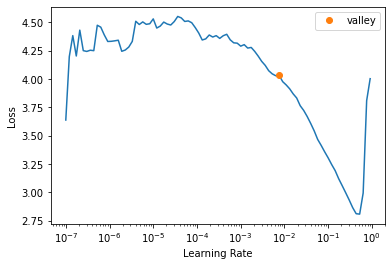

<Figure size 720x720 with 0 Axes>

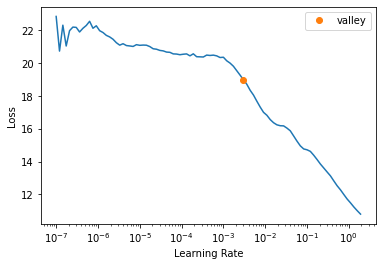

<Figure size 720x720 with 0 Axes>

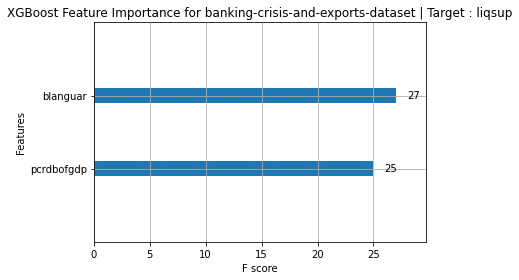

Target Variable: blanguar
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07008647918701172}


  7%|▋         | 3/42 [00:00<00:05,  7.42it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2251417636871338}
{'Model': 'BayesianRidge', 'R-Squared': 0.9999999999999993, 'Adjusted R-Squared': 0.9999999999999993, 'RMSE': 3.170955781205093e-09, 'Time taken': 0.11548566818237305}


 10%|▉         | 4/42 [00:00<00:05,  7.40it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.13023138046264648}
{'Model': 'DummyRegressor', 'R-Squared': -0.00026212749225806853, 'Adjusted R-Squared': -0.011134541921521857, 'RMSE': 0.12354654993159457, 'Time taken': 0.03310561180114746}
{'Model': 'ElasticNet', 'R-Squared': -0.0002621349494078551, 'Adjusted R-Squared': -0.011134549459727472, 'RMSE': 0.12354655, 'Time taken': 0.046514272689819336}


 19%|█▉        | 8/42 [00:01<00:07,  4.32it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.9989673820498471, 'Adjusted R-Squared': 0.9989561579416933, 'RMSE': 0.0039695706, 'Time taken': 0.9620652198791504}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10938835144042969}


 24%|██▍       | 10/42 [00:02<00:09,  3.24it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.8018507957458496}
{'Model': 'GammaRegressor', 'R-Squared': 0.8397717431985533, 'Adjusted R-Squared': 0.838030131711581, 'RMSE': 0.0494473775009947, 'Time taken': 0.1262519359588623}


 29%|██▊       | 12/42 [01:18<07:30, 15.01s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -18.155399608056825, 'Adjusted R-Squared': -18.363610473361792, 'RMSE': 0.5406538718709459, 'Time taken': 75.95944595336914}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.859303848414956, 'Adjusted R-Squared': 0.8577745424194664, 'RMSE': 0.04633560293284071, 'Time taken': 0.1575613021850586}


 31%|███       | 13/42 [01:23<05:52, 12.15s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992943072, 'Adjusted R-Squared': 0.9999999992866366, 'RMSE': 3.281569193843028e-06, 'Time taken': 4.946232795715332}


 33%|███▎      | 14/42 [01:24<04:04,  8.74s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999978803848096, 'Adjusted R-Squared': 0.999997857345514, 'RMSE': 0.00017984659546573187, 'Time taken': 0.3437378406524658}


 36%|███▌      | 15/42 [01:25<03:02,  6.75s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.9253539541226306, 'Adjusted R-Squared': 0.9245425840587461, 'RMSE': 0.03375025923718496, 'Time taken': 1.9327163696289062}


 38%|███▊      | 16/42 [01:32<02:51,  6.61s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 6.2627952098846436}


 40%|████      | 17/42 [01:48<03:53,  9.34s/it]

{'Model': 'KernelRidge', 'R-Squared': -66.7580237671796, 'Adjusted R-Squared': -67.4945240255185, 'RMSE': 1.0168434, 'Time taken': 15.846333980560303}
{'Model': 'Lars', 'R-Squared': 0.9999998056758022, 'Adjusted R-Squared': 0.9999998035635826, 'RMSE': 5.4454923355137505e-05, 'Time taken': 0.06347346305847168}


 45%|████▌     | 19/42 [01:48<01:57,  5.11s/it]

{'Model': 'LarsCV', 'R-Squared': 0.9999963070563108, 'Adjusted R-Squared': 0.9999962669156185, 'RMSE': 0.00023738870542162614, 'Time taken': 0.16352510452270508}
{'Model': 'Lasso', 'R-Squared': -0.0002621349494078551, 'Adjusted R-Squared': -0.011134549459727472, 'RMSE': 0.12354655, 'Time taken': 0.056653738021850586}


 50%|█████     | 21/42 [01:49<01:08,  3.28s/it]

{'Model': 'LassoCV', 'R-Squared': 0.9993229783112513, 'Adjusted R-Squared': 0.9993156193798518, 'RMSE': 0.0032142156, 'Time taken': 0.9118163585662842}
{'Model': 'LassoLars', 'R-Squared': -0.00026213874167102524, 'Adjusted R-Squared': -0.011134553293211003, 'RMSE': 0.12354655062632554, 'Time taken': 0.08420491218566895}


 60%|█████▉    | 25/42 [01:49<00:24,  1.46s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.9999987981464381, 'Adjusted R-Squared': 0.9999987850828125, 'RMSE': 0.0001354252003524014, 'Time taken': 0.2817351818084717}
{'Model': 'LassoLarsIC', 'R-Squared': 0.9999987981464381, 'Adjusted R-Squared': 0.9999987850828125, 'RMSE': 0.0001354252003524014, 'Time taken': 0.08389067649841309}
{'Model': 'LinearRegression', 'R-Squared': 0.9999999999979715, 'Adjusted R-Squared': 0.9999999999979494, 'RMSE': 1.7593723e-07, 'Time taken': 0.09082245826721191}


 62%|██████▏   | 26/42 [01:50<00:19,  1.24s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.9999999990989193, 'Adjusted R-Squared': 0.999999999089125, 'RMSE': 3.7081349851750896e-06, 'Time taken': 0.35536837577819824}


 64%|██████▍   | 27/42 [01:54<00:27,  1.83s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9089401848204278, 'Adjusted R-Squared': 0.9079504042206499, 'RMSE': 0.037276668503052654, 'Time taken': 3.951995372772217}


 67%|██████▋   | 28/42 [06:56<17:06, 73.32s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9953663898051168, 'Adjusted R-Squared': 0.9953160244769116, 'RMSE': 0.008408789043100546, 'Time taken': 302.476434469223}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.9713786867899885, 'Adjusted R-Squared': 0.971067585559445, 'RMSE': 0.020898662259974256, 'Time taken': 0.07281899452209473}


 74%|███████▍  | 31/42 [06:57<06:13, 33.95s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.9724865612678056, 'Adjusted R-Squared': 0.9721875021511514, 'RMSE': 0.020490197575758116, 'Time taken': 0.24184703826904297}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.8157378372575173, 'Adjusted R-Squared': 0.8137349876624902, 'RMSE': 0.05302635701148631, 'Time taken': 0.10255742073059082}


 76%|███████▌  | 32/42 [06:57<04:17, 25.75s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.8762052745442299, 'Adjusted R-Squared': 0.8748596797023194, 'RMSE': 0.043463508392370814, 'Time taken': 0.1473243236541748}


 79%|███████▊  | 33/42 [06:57<02:52, 19.21s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [06:59<00:49,  8.26s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.866537094116211}
{'Model': 'Ridge', 'R-Squared': 0.9999883456975744, 'Adjusted R-Squared': 0.9999882190203742, 'RMSE': 0.00042171287, 'Time taken': 0.045073747634887695}
{'Model': 'RidgeCV', 'R-Squared': 0.9999998710808614, 'Adjusted R-Squared': 0.9999998696795664, 'RMSE': 4.435396064101748e-05, 'Time taken': 0.10165786743164062}


 88%|████████▊ | 37/42 [06:59<00:31,  6.34s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.9690226943281912, 'Adjusted R-Squared': 0.9686859844839324, 'RMSE': 0.02174180167845766, 'Time taken': 0.13540887832641602}


 95%|█████████▌| 40/42 [07:00<00:05,  2.93s/it]

{'Model': 'SVR', 'R-Squared': 0.8760766832409517, 'Adjusted R-Squared': 0.8747296906674837, 'RMSE': 0.04348607631085941, 'Time taken': 0.9937622547149658}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.9999999999979715, 'Adjusted R-Squared': 0.9999999999979494, 'RMSE': 1.7593723e-07, 'Time taken': 0.052816152572631836}
{'Model': 'TweedieRegressor', 'R-Squared': 0.859303848414956, 'Adjusted R-Squared': 0.8577745424194664, 'RMSE': 0.04633560293284071, 'Time taken': 0.11022496223449707}


100%|██████████| 42/42 [07:01<00:00, 10.04s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999964441554, 'Adjusted R-Squared': 0.9999999964055049, 'RMSE': 7.366227e-06, 'Time taken': 0.643728494644165}
{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992943072, 'Adjusted R-Squared': 0.9999999992866366, 'RMSE': 3.2815692512292114e-06, 'Time taken': 0.18455195426940918}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: blanguar
blanguar
Target Standard Deviation: 0.13112494041943354
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
DecisionTreeRegressor                        1.00       1.00  0.00        0.13
RandomForestRegressor                        1.00       1.00  0.00        1.87
ExtraTreeRegressor                           1.00       1.00  0.00        0.11
ExtraTreesRegressor                          1.00

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.272205,0.189662,0.435502,00:18
1,0.026470,0.014414,0.120059,00:17
2,0.036737,0.014749,0.121445,00:17


Better model found at epoch 0 with _rmse value: 0.4355017840862274.
Better model found at epoch 1 with _rmse value: 0.12005949765443802.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  7.366227e-06


<Figure size 432x288 with 0 Axes>

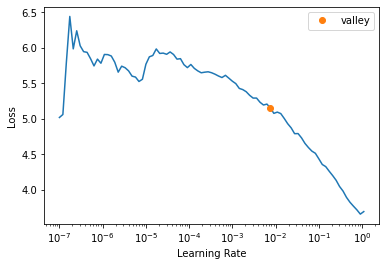

<Figure size 720x720 with 0 Axes>

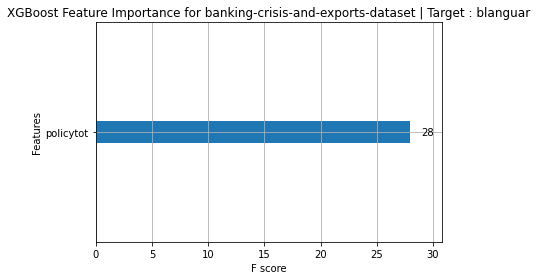

Target Variable: developing
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup'

  5%|▍         | 2/42 [00:00<00:02, 17.86it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.044733285903930664}
{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06703019142150879}
{'Model': 'BayesianRidge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1079854965209961}


 10%|▉         | 4/42 [00:00<00:03, 11.69it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10314440727233887}
{'Model': 'DummyRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03629612922668457}


 14%|█▍        | 6/42 [00:00<00:03,  9.28it/s]

{'Model': 'ElasticNet', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.22698044776916504}


 19%|█▉        | 8/42 [00:01<00:09,  3.55it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0406808853149414}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05148935317993164}


 21%|██▏       | 9/42 [00:01<00:08,  3.89it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.16373705863952637}
{'Model': 'GammaRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.046337127685546875}


 26%|██▌       | 11/42 [01:37<09:35, 18.58s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.5109241007497627, 'Time taken': 95.39835453033447}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06052398681640625}


 33%|███▎      | 14/42 [01:37<04:28,  9.60s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1606285572052002}
{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1066136360168457}


 36%|███▌      | 15/42 [01:39<03:32,  7.86s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 3.8157246930379213e-07, 'Time taken': 1.8495092391967773}


 38%|███▊      | 16/42 [01:46<03:18,  7.62s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 6.841859340667725}


 45%|████▌     | 19/42 [02:02<02:11,  5.70s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 1.0007657, 'Time taken': 16.22269630432129}
{'Model': 'Lars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.05854082107543945}
LarsCV model failed to execute
x and y arrays must have at least 2 entries


 48%|████▊     | 20/42 [02:02<01:37,  4.43s/it]

{'Model': 'Lasso', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.24240994453430176}


 55%|█████▍    | 23/42 [02:04<00:40,  2.14s/it]

{'Model': 'LassoCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.0724072456359863}
{'Model': 'LassoLars', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0785975456237793}
LassoLarsCV model failed to execute
x and y arrays must have at least 2 entries


 62%|██████▏   | 26/42 [02:04<00:17,  1.10s/it]

{'Model': 'LassoLarsIC', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06212949752807617}
{'Model': 'LinearRegression', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06490969657897949}
{'Model': 'LinearSVR', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 5.377246987077799e-07, 'Time taken': 0.1019449234008789}


 64%|██████▍   | 27/42 [02:08<00:24,  1.66s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.040131332372681794, 'Time taken': 3.534135103225708}


 71%|███████▏  | 30/42 [02:22<00:34,  2.89s/it]

{'Model': 'NuSVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 14.620403051376343}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.03810405731201172}
OrthogonalMatchingPursuitCV model failed to execute
attempt to get argmin of an empty sequence


 76%|███████▌  | 32/42 [02:22<00:18,  1.84s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.034600093876312875, 'Time taken': 0.0981755256652832}
{'Model': 'PoissonRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.060891151428222656}


 79%|███████▊  | 33/42 [02:23<00:13,  1.53s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [02:23<00:09,  1.23s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.25395822525024414}
{'Model': 'Ridge', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06131458282470703}


 88%|████████▊ | 37/42 [02:23<00:03,  1.56it/s]

{'Model': 'RidgeCV', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14615392684936523}
{'Model': 'SGDRegressor', 'R-Squared': 0.0, 'Adjusted R-Squared': -0.010869565217391353, 'RMSE': 0.00013586995453300564, 'Time taken': 0.14161920547485352}


 95%|█████████▌| 40/42 [02:24<00:00,  2.82it/s]

{'Model': 'SVR', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06943321228027344}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.07357001304626465}
{'Model': 'TweedieRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11102986335754395}


100%|██████████| 42/42 [02:24<00:00,  3.45s/it]

{'Model': 'XGBRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.5758390426635742}
{'Model': 'LGBMRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.14382195472717285}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: developing
developing
Target Standard Deviation: 0.0
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.04
PoissonRegressor                             1.00       1.00  0.00        0.06
BaggingRegressor                             1.00       1.00  0.00        0.07
LassoLars                                    1.00       1.00  0.00        0.08
LassoLarsIC                                  1.00       1.00  0.00        0.06
LinearRegression                             1.00       1.00  0.00   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.781825,0.417293,0.645983,00:17
1,0.054936,0.044087,0.209970,00:17
2,0.027976,0.029903,0.172925,00:17
3,0.014201,0.012021,0.109640,00:17
4,0.003233,0.002288,0.047834,00:17
5,0.002277,0.021932,0.148094,00:17


Better model found at epoch 0 with _rmse value: 0.6459825038909912.
Better model found at epoch 1 with _rmse value: 0.20996950566768646.
Better model found at epoch 2 with _rmse value: 0.17292451858520508.
Better model found at epoch 3 with _rmse value: 0.1096402257680893.
Better model found at epoch 4 with _rmse value: 0.04783361777663231.
No improvement since epoch 4: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.0
XGBoost failed
Target Variable: developed
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint


Traceback (most recent call last):
  File "/tmp/ipykernel_19/1746676157.py", line 323, in <module>
    plot_importance(xgb)
  File "/opt/conda/lib/python3.7/site-packages/xgboost/plotting.py", line 72, in plot_importance
    'Booster.get_score() results in empty.  ' +
ValueError: Booster.get_score() results in empty.  This maybe caused by having all trees as decision dumps.


Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
Tabular Object size: 20000


  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.06883478164672852}


  7%|▋         | 3/42 [00:00<00:05,  7.61it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.2331256866455078}
{'Model': 'BayesianRidge', 'R-Squared': 0.870703724278945, 'Adjusted R-Squared': 0.8692983299776292, 'RMSE': 0.16821474080749438, 'Time taken': 0.10214805603027344}


 10%|▉         | 4/42 [00:00<00:05,  7.59it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12987923622131348}
{'Model': 'DummyRegressor', 'R-Squared': -3.1485930287011854e-05, 'Adjusted R-Squared': -0.010901393386051117, 'RMSE': 0.4678190255055902, 'Time taken': 0.03318452835083008}
{'Model': 'ElasticNet', 'R-Squared': -3.1496417925325204e-05, 'Adjusted R-Squared': -0.010901403987685354, 'RMSE': 0.46781906, 'Time taken': 0.046694040298461914}


 19%|█▉        | 8/42 [00:01<00:05,  6.48it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8707352074166499, 'Adjusted R-Squared': 0.8693301553233526, 'RMSE': 0.16819426, 'Time taken': 0.46936607360839844}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11628341674804688}


 24%|██▍       | 10/42 [00:02<00:10,  2.93it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999995430613292, 'Adjusted R-Squared': 0.9999995380946045, 'RMSE': 0.0003162277660168382, 'Time taken': 1.2414319515228271}
{'Model': 'GammaRegressor', 'R-Squared': 0.7254471762971499, 'Adjusted R-Squared': 0.7224629064742929, 'RMSE': 0.2451229644964246, 'Time taken': 0.11508345603942871}


 29%|██▊       | 12/42 [01:19<07:37, 15.25s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.7518949885514403, 'Adjusted R-Squared': -0.7709373253835212, 'RMSE': 0.6191916314686097, 'Time taken': 77.12980079650879}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7397230245120852, 'Adjusted R-Squared': 0.7368939269524339, 'RMSE': 0.2386651010565544, 'Time taken': 0.15421748161315918}


 31%|███       | 13/42 [01:24<05:52, 12.14s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944699, 'Adjusted R-Squared': 0.9999999992868012, 'RMSE': 1.2425927743644073e-05, 'Time taken': 4.306246280670166}


 33%|███▎      | 14/42 [01:24<04:05,  8.76s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998891148036, 'Adjusted R-Squared': 0.9999998879095298, 'RMSE': 0.00015577861127470278, 'Time taken': 0.43209099769592285}


 36%|███▌      | 15/42 [01:25<02:55,  6.49s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8684697974080328, 'Adjusted R-Squared': 0.8670401212929026, 'RMSE': 0.1696616895303598, 'Time taken': 0.9827134609222412}


 38%|███▊      | 16/42 [01:31<02:46,  6.40s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9811741267616414, 'Adjusted R-Squared': 0.9809694977047028, 'RMSE': 0.06418722614352484, 'Time taken': 6.203125715255737}


 40%|████      | 17/42 [01:48<03:58,  9.54s/it]

{'Model': 'KernelRidge', 'R-Squared': -7.1457817346025685, 'Adjusted R-Squared': -7.234322840413466, 'RMSE': 1.3351727, 'Time taken': 16.978607177734375}
{'Model': 'Lars', 'R-Squared': 0.8706924785106934, 'Adjusted R-Squared': 0.8692869619727661, 'RMSE': 0.16822205603312365, 'Time taken': 0.07250261306762695}


 45%|████▌     | 19/42 [01:49<02:00,  5.24s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8707392350135292, 'Adjusted R-Squared': 0.869334226698459, 'RMSE': 0.16819163944907578, 'Time taken': 0.2579531669616699}
{'Model': 'Lasso', 'R-Squared': -3.1496417925325204e-05, 'Adjusted R-Squared': -0.010901403987685354, 'RMSE': 0.46781906, 'Time taken': 0.0754387378692627}


 52%|█████▏    | 22/42 [01:49<00:51,  2.58s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8707369885994507, 'Adjusted R-Squared': 0.869331955866836, 'RMSE': 0.1681931, 'Time taken': 0.4665200710296631}
{'Model': 'LassoLars', 'R-Squared': -3.1486547994896696e-05, 'Adjusted R-Squared': -0.010901394010473187, 'RMSE': 0.46781902565007333, 'Time taken': 0.1061105728149414}


 57%|█████▋    | 24/42 [01:50<00:27,  1.54s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8707322460559044, 'Adjusted R-Squared': 0.8693271617739033, 'RMSE': 0.1681961863367269, 'Time taken': 0.2671072483062744}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8706187307458115, 'Adjusted R-Squared': 0.8692124126017442, 'RMSE': 0.16827002011179334, 'Time taken': 0.10588335990905762}


 60%|█████▉    | 25/42 [01:50<00:19,  1.16s/it]

{'Model': 'LinearRegression', 'R-Squared': 0.8707011663238381, 'Adjusted R-Squared': 0.8692957442186624, 'RMSE': 0.1682164, 'Time taken': 0.10866308212280273}


 62%|██████▏   | 26/42 [01:55<00:35,  2.20s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.8594404011954998, 'Adjusted R-Squared': 0.857912579469364, 'RMSE': 0.17538857414115538, 'Time taken': 4.939119338989258}


 64%|██████▍   | 27/42 [02:00<00:44,  2.97s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9885543836660416, 'Adjusted R-Squared': 0.9884299747928464, 'RMSE': 0.050048450346139944, 'Time taken': 4.925741672515869}


 67%|██████▋   | 28/42 [05:14<13:31, 57.94s/it]

{'Model': 'NuSVR', 'R-Squared': 0.99412149533461, 'Adjusted R-Squared': 0.9940575985447688, 'RMSE': 0.03586777828894772, 'Time taken': 193.9781038761139}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.8324434515561153, 'Adjusted R-Squared': 0.8306221847252035, 'RMSE': 0.19149248973448066, 'Time taken': 0.06663703918457031}


 74%|███████▍  | 31/42 [05:14<04:25, 24.12s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8545979825133952, 'Adjusted R-Squared': 0.8530175258015843, 'RMSE': 0.1783841483215482, 'Time taken': 0.23069310188293457}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.7886235788504233, 'Adjusted R-Squared': 0.7863260090553192, 'RMSE': 0.21507964611193983, 'Time taken': 0.11150646209716797}


 76%|███████▌  | 32/42 [05:14<02:59, 17.93s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7846102912195947, 'Adjusted R-Squared': 0.7822690987328511, 'RMSE': 0.217111844770724, 'Time taken': 0.14096570014953613}


 79%|███████▊  | 33/42 [05:14<01:58, 13.19s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [05:16<00:33,  5.62s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.819075107574463}
{'Model': 'Ridge', 'R-Squared': 0.8707035629475167, 'Adjusted R-Squared': 0.8692981668925984, 'RMSE': 0.16821484, 'Time taken': 0.04265880584716797}
{'Model': 'RidgeCV', 'R-Squared': 0.8707037218007424, 'Adjusted R-Squared': 0.8692983274724896, 'RMSE': 0.1682147424195679, 'Time taken': 0.09891414642333984}


 88%|████████▊ | 37/42 [05:17<00:21,  4.30s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8697686946509623, 'Adjusted R-Squared': 0.8683531369841249, 'RMSE': 0.16882188292753955, 'Time taken': 0.13295722007751465}


 95%|█████████▌| 40/42 [05:22<00:05,  2.68s/it]

{'Model': 'SVR', 'R-Squared': 0.978120812798805, 'Adjusted R-Squared': 0.9778829955466182, 'RMSE': 0.06919689943061255, 'Time taken': 5.358003854751587}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8707011663238381, 'Adjusted R-Squared': 0.8692957442186624, 'RMSE': 0.1682164, 'Time taken': 0.0496368408203125}
{'Model': 'TweedieRegressor', 'R-Squared': 0.7397230245120852, 'Adjusted R-Squared': 0.7368939269524339, 'RMSE': 0.2386651010565544, 'Time taken': 0.14107465744018555}


 98%|█████████▊| 41/42 [05:23<00:02,  2.31s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999996326531, 'Adjusted R-Squared': 0.9999999996286602, 'RMSE': 8.966218e-06, 'Time taken': 1.0431818962097168}


100%|██████████| 42/42 [05:24<00:00,  7.72s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944698, 'Adjusted R-Squared': 0.9999999992868011, 'RMSE': 1.2425928241080406e-05, 'Time taken': 0.6853103637695312}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: developed
developed
Target Standard Deviation: 0.4687936479678453
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.07
ExtraTreeRegressor                           1.00       1.00  0.00        0.12
DecisionTreeRegressor                        1.00       1.00  0.00        0.13
RandomForestRegressor                        1.00       1.00  0.00        1.82
BaggingRegressor                             1.00       1.00  0.00        0.23
XGBRegressor                                 1.00       1.00  0.00        1.04
GradientBoostingRegressor                    1.

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.772298,0.421863,0.649510,00:17
1,0.101643,0.088787,0.297971,00:17
2,0.035254,0.021630,0.147070,00:17
3,0.017647,0.028686,0.169371,00:17


Better model found at epoch 0 with _rmse value: 0.6495102047920227.
Better model found at epoch 1 with _rmse value: 0.29797065258026123.
Better model found at epoch 2 with _rmse value: 0.1470697522163391.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       2       2.00
4       2       2.00
XGBoost RMSE:  8.966218e-06


<Figure size 432x288 with 0 Axes>

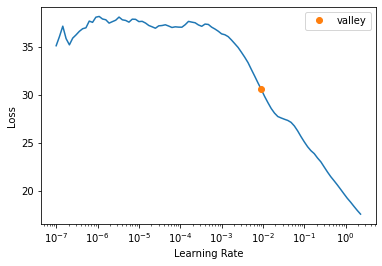

<Figure size 720x720 with 0 Axes>

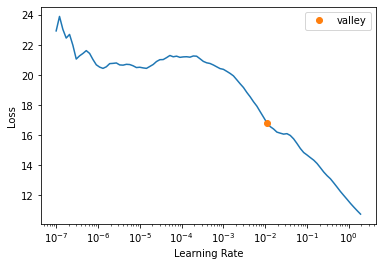

<Figure size 720x720 with 0 Axes>

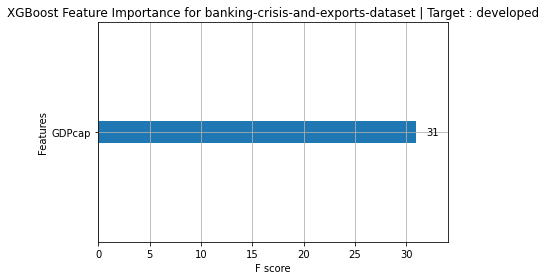

Target Variable: GDPcap
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'f

  2%|▏         | 1/42 [00:01<00:50,  1.23s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9049996350458961, 'Adjusted R-Squared': 0.9039670223833515, 'RMSE': 25.080906035398232, 'Time taken': 1.2283661365509033}


  7%|▋         | 3/42 [00:02<00:28,  1.35it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9999999135401809, 'Adjusted R-Squared': 0.9999999126004002, 'RMSE': 0.02392697222801081, 'Time taken': 1.3025341033935547}
{'Model': 'BayesianRidge', 'R-Squared': 0.7788580128189049, 'Adjusted R-Squared': 0.7764542955669365, 'RMSE': 38.26627499694001, 'Time taken': 0.10622262954711914}


 10%|▉         | 4/42 [00:02<00:21,  1.79it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.27948570251464844}
{'Model': 'DummyRegressor', 'R-Squared': -0.000253046889628461, 'Adjusted R-Squared': -0.011125362616689616, 'RMSE': 81.38334305121292, 'Time taken': 0.03296661376953125}
{'Model': 'ElasticNet', 'R-Squared': 0.6586529483614869, 'Adjusted R-Squared': 0.6549426543219379, 'RMSE': 47.542133, 'Time taken': 0.046983957290649414}


 19%|█▉        | 8/42 [00:03<00:09,  3.77it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7685011597290858, 'Adjusted R-Squared': 0.7659848679870107, 'RMSE': 39.152096, 'Time taken': 0.40585923194885254}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.11182880401611328}


 24%|██▍       | 10/42 [00:07<00:29,  1.10it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999999763802345, 'Adjusted R-Squared': 0.9999999761234979, 'RMSE': 0.012505998560691022, 'Time taken': 3.967235565185547}
{'Model': 'GammaRegressor', 'R-Squared': 0.5655878210419667, 'Adjusted R-Squared': 0.5608659495315533, 'RMSE': 53.63293705089968, 'Time taken': 0.1269383430480957}


 29%|██▊       | 12/42 [01:24<07:44, 15.50s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.2500223238406677, 'Adjusted R-Squared': 0.2418703925780662, 'RMSE': 70.47007804290287, 'Time taken': 76.46982669830322}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5818013554418131, 'Adjusted R-Squared': 0.5772557180009632, 'RMSE': 52.62255063919075, 'Time taken': 0.16830158233642578}


 31%|███       | 13/42 [01:32<06:29, 13.43s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9967162870523927, 'Adjusted R-Squared': 0.9966805945203535, 'RMSE': 4.662975965506397, 'Time taken': 8.241272211074829}


 33%|███▎      | 14/42 [01:33<04:38,  9.95s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999959097609603, 'Adjusted R-Squared': 0.9999958653018404, 'RMSE': 0.16457161424736758, 'Time taken': 1.4167206287384033}


 36%|███▌      | 15/42 [01:34<03:16,  7.28s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.7773056820395304, 'Adjusted R-Squared': 0.7748850916269167, 'RMSE': 38.400347311601564, 'Time taken': 0.829371452331543}


 38%|███▊      | 16/42 [01:40<03:00,  6.93s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8722357443770477, 'Adjusted R-Squared': 0.8708470024681025, 'RMSE': 29.08608498921778, 'Time taken': 6.09424614906311}


 40%|████      | 17/42 [01:58<04:11, 10.06s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.309671182844733, 'Adjusted R-Squared': -2.3456458696147844, 'RMSE': 148.03793, 'Time taken': 17.498075008392334}
{'Model': 'Lars', 'R-Squared': 0.7785524086464732, 'Adjusted R-Squared': 0.7761453696100218, 'RMSE': 38.29270664846487, 'Time taken': 0.07269644737243652}


 45%|████▌     | 19/42 [01:58<02:07,  5.54s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7788587625684594, 'Adjusted R-Squared': 0.7764550534659427, 'RMSE': 38.26621012878152, 'Time taken': 0.340160608291626}
{'Model': 'Lasso', 'R-Squared': 0.772672720063622, 'Adjusted R-Squared': 0.7702017713686613, 'RMSE': 38.797737, 'Time taken': 0.0868837833404541}


 50%|█████     | 21/42 [01:59<01:12,  3.47s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7789272838122157, 'Adjusted R-Squared': 0.7765243195058267, 'RMSE': 38.26028, 'Time taken': 0.4929623603820801}
{'Model': 'LassoLars', 'R-Squared': -0.0002530452669284866, 'Adjusted R-Squared': -0.01112536097635175, 'RMSE': 81.38334298519926, 'Time taken': 0.054425954818725586}


 60%|█████▉    | 25/42 [01:59<00:25,  1.53s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7789195951738508, 'Adjusted R-Squared': 0.7765165472953057, 'RMSE': 38.26094653932717, 'Time taken': 0.27493786811828613}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7784180460212289, 'Adjusted R-Squared': 0.7760095465214596, 'RMSE': 38.304321876143895, 'Time taken': 0.08462810516357422}
{'Model': 'LinearRegression', 'R-Squared': 0.7788373102881371, 'Adjusted R-Squared': 0.7764333680086603, 'RMSE': 38.268066, 'Time taken': 0.06326627731323242}


 62%|██████▏   | 26/42 [02:00<00:20,  1.30s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7668875205816493, 'Adjusted R-Squared': 0.7643536892836238, 'RMSE': 39.2883098367772, 'Time taken': 0.3819735050201416}


 64%|██████▍   | 27/42 [02:25<01:38,  6.59s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9739961114853158, 'Adjusted R-Squared': 0.9737134605231997, 'RMSE': 13.121990892588622, 'Time taken': 25.521504402160645}


 71%|███████▏  | 30/42 [02:56<01:28,  7.37s/it]

{'Model': 'NuSVR', 'R-Squared': 0.6931761090482672, 'Adjusted R-Squared': 0.6898410667553136, 'RMSE': 45.07390352651553, 'Time taken': 30.61083698272705}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7402808880562297, 'Adjusted R-Squared': 0.7374578542307539, 'RMSE': 41.46985710438022, 'Time taken': 0.04869794845581055}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7587231644165205, 'Adjusted R-Squared': 0.7561005901167002, 'RMSE': 39.9703911643489, 'Time taken': 0.14289355278015137}


 74%|███████▍  | 31/42 [02:56<01:03,  5.75s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6066013793137675, 'Adjusted R-Squared': 0.6023253073497866, 'RMSE': 51.03839406125655, 'Time taken': 0.15549492835998535}


 76%|███████▌  | 32/42 [02:57<00:44,  4.48s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7202056585365745, 'Adjusted R-Squared': 0.7171644156945807, 'RMSE': 43.04275368939222, 'Time taken': 0.5191264152526855}


 79%|███████▊  | 33/42 [02:57<00:30,  3.42s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7138389533153625, 'Adjusted R-Squared': 0.7107285071557469, 'RMSE': 43.529716, 'Time taken': 0.3719930648803711}


 86%|████████▌ | 36/42 [03:10<00:20,  3.36s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999999235680097, 'Adjusted R-Squared': 0.9999999227372272, 'RMSE': 0.022496666419716607, 'Time taken': 12.567848682403564}
{'Model': 'Ridge', 'R-Squared': 0.7788403159613699, 'Adjusted R-Squared': 0.7764364063522544, 'RMSE': 38.267807, 'Time taken': 0.040520429611206055}
{'Model': 'RidgeCV', 'R-Squared': 0.7788402936858504, 'Adjusted R-Squared': 0.7764363838346097, 'RMSE': 38.26780802023687, 'Time taken': 0.09211921691894531}


 88%|████████▊ | 37/42 [03:10<00:12,  2.59s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7742823150984482, 'Adjusted R-Squared': 0.7718288620016922, 'RMSE': 38.66013603739711, 'Time taken': 0.13619256019592285}


 90%|█████████ | 38/42 [03:39<00:37,  9.39s/it]

{'Model': 'SVR', 'R-Squared': 0.7404752849316121, 'Adjusted R-Squared': 0.7376543641156513, 'RMSE': 41.454334335080226, 'Time taken': 29.471617698669434}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7788373102881371, 'Adjusted R-Squared': 0.7764333680086603, 'RMSE': 38.268066, 'Time taken': 0.05758953094482422}


 95%|█████████▌| 40/42 [03:40<00:11,  5.51s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.5818013554418131, 'Adjusted R-Squared': 0.5772557180009632, 'RMSE': 52.62255063919075, 'Time taken': 0.21544218063354492}


 98%|█████████▊| 41/42 [03:42<00:04,  4.73s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999990594090279, 'Adjusted R-Squared': 0.999999049185213, 'RMSE': 0.0789189, 'Time taken': 2.1414639949798584}


100%|██████████| 42/42 [03:42<00:00,  5.31s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999966853323939, 'Adjusted R-Squared': 0.9999966493033983, 'RMSE': 0.1481496317381091, 'Time taken': 0.522808313369751}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: GDPcap
GDPcap
Target Standard Deviation: 81.62508402443513
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
DecisionTreeRegressor                        1.00       1.00   0.00   
ExtraTreeRegressor                           1.00       1.00   0.00   
ExtraTreesRegressor                          1.00       1.00   0.01   
RandomForestRegressor                        1.00       1.00   0.02   
BaggingRegressor                             1.00       1.00   0.02   
XGBRegressor                                 1.00       1.00   0.08   
LGBMRegressor                                1.00       1.00   0.15   
HistGradientBoostingRegressor                1.00   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4437.913574,3730.451416,61.077419,00:17
1,1304.254639,1267.510620,35.602112,00:17
2,556.749512,1493.877197,38.650707,00:17


Better model found at epoch 0 with _rmse value: 61.07741928100586.
Better model found at epoch 1 with _rmse value: 35.60211181640625.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0     261     260.99
1      18      17.96
2     124     123.98
3      43      42.66
4     276     276.00
XGBoost RMSE:  0.07891537


<Figure size 432x288 with 0 Axes>

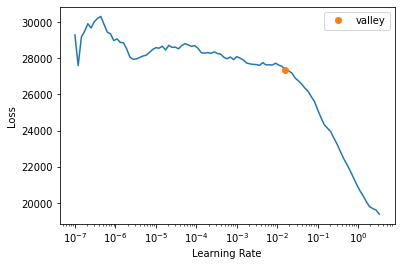

<Figure size 720x720 with 0 Axes>

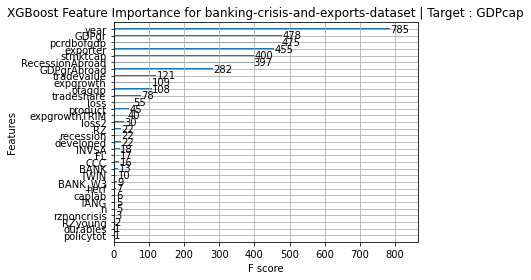

Target Variable: loss2
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'fo

  2%|▏         | 1/42 [00:01<01:08,  1.67s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9743515775218397, 'Adjusted R-Squared': 0.97407279032099, 'RMSE': 0.595457844134299, 'Time taken': 1.6708683967590332}


  5%|▍         | 2/42 [00:02<00:44,  1.12s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.7288112640380859}
{'Model': 'BayesianRidge', 'R-Squared': 0.7308136511713027, 'Adjusted R-Squared': 0.7278877125970777, 'RMSE': 1.9290665360169508, 'Time taken': 0.0680389404296875}


 10%|▉         | 4/42 [00:02<00:18,  2.03it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1734790802001953}
{'Model': 'DummyRegressor', 'R-Squared': -9.538298659239608e-05, 'Adjusted R-Squared': -0.010965984975577214, 'RMSE': 3.7182741087305886, 'Time taken': 0.03249168395996094}
{'Model': 'ElasticNet', 'R-Squared': 0.4633053274939716, 'Adjusted R-Squared': 0.4574716897493408, 'RMSE': 2.7238572, 'Time taken': 0.03999066352844238}


 19%|█▉        | 8/42 [00:03<00:09,  3.49it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7308691641858409, 'Adjusted R-Squared': 0.7279438290139479, 'RMSE': 1.9288676, 'Time taken': 0.5868806838989258}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9999819158281262, 'Adjusted R-Squared': 0.9999817192610406, 'RMSE': 0.015811388300841896, 'Time taken': 0.09783387184143066}


 24%|██▍       | 10/42 [00:05<00:19,  1.68it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999957447943582, 'Adjusted R-Squared': 0.9999956985421229, 'RMSE': 0.007669745758498113, 'Time taken': 2.2669389247894287}
{'Model': 'GammaRegressor', 'R-Squared': 0.5519315616851168, 'Adjusted R-Squared': 0.5470612525729985, 'RMSE': 2.488816447218795, 'Time taken': 0.1253964900970459}


 29%|██▊       | 12/42 [01:21<07:26, 14.89s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -6.55643932140983, 'Adjusted R-Squared': -6.638574531425155, 'RMSE': 10.22066822968313, 'Time taken': 75.82137107849121}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5357443723328603, 'Adjusted R-Squared': 0.5306981155103914, 'RMSE': 2.5333738293390065, 'Time taken': 0.150770902633667}


 31%|███       | 13/42 [01:29<06:10, 12.78s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.999843244731467, 'Adjusted R-Squared': 0.9998415408698526, 'RMSE': 0.04655129473275607, 'Time taken': 7.3946168422698975}


 33%|███▎      | 14/42 [01:30<04:24,  9.43s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999979654214, 'Adjusted R-Squared': 0.9999999979433064, 'RMSE': 0.00016770960326177234, 'Time taken': 1.0740208625793457}


 36%|███▌      | 15/42 [01:32<03:14,  7.20s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.6142284192488204, 'Adjusted R-Squared': 0.6100352498928293, 'RMSE': 2.309328985685477, 'Time taken': 1.767242670059204}


 38%|███▊      | 16/42 [01:38<03:02,  7.03s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9472159191348171, 'Adjusted R-Squared': 0.9466421791254129, 'RMSE': 0.8542247947700885, 'Time taken': 6.602855682373047}


 40%|████      | 17/42 [01:55<04:10, 10.02s/it]

{'Model': 'KernelRidge', 'R-Squared': -27.269753784377432, 'Adjusted R-Squared': -27.57703371681632, 'RMSE': 19.768864, 'Time taken': 17.170159339904785}
{'Model': 'Lars', 'R-Squared': 0.7304147135076444, 'Adjusted R-Squared': 0.7274844386544665, 'RMSE': 1.9304954576180453, 'Time taken': 0.0726773738861084}


 45%|████▌     | 19/42 [01:56<02:06,  5.52s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7309124255483682, 'Adjusted R-Squared': 0.7279875606086765, 'RMSE': 1.9287125807946683, 'Time taken': 0.2762725353240967}
{'Model': 'Lasso', 'R-Squared': 0.4991310711820288, 'Adjusted R-Squared': 0.4936868436948769, 'RMSE': 2.6313748, 'Time taken': 0.05144619941711426}


 52%|█████▏    | 22/42 [01:56<00:54,  2.72s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7309392924121875, 'Adjusted R-Squared': 0.7280147195036243, 'RMSE': 1.9286163, 'Time taken': 0.5826716423034668}
{'Model': 'LassoLars', 'R-Squared': -9.538611290893506e-05, 'Adjusted R-Squared': -0.01096598813587546, 'RMSE': 3.7182741145422855, 'Time taken': 0.11017131805419922}


 60%|█████▉    | 25/42 [01:57<00:22,  1.30s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7309124255483682, 'Adjusted R-Squared': 0.7279875606086765, 'RMSE': 1.9287125807946683, 'Time taken': 0.26778173446655273}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7308193329895196, 'Adjusted R-Squared': 0.7278934561741883, 'RMSE': 1.9290461771405227, 'Time taken': 0.08631706237792969}
{'Model': 'LinearRegression', 'R-Squared': 0.7307884892983454, 'Adjusted R-Squared': 0.7278622772255012, 'RMSE': 1.9291567, 'Time taken': 0.06396842002868652}


 62%|██████▏   | 26/42 [01:59<00:23,  1.50s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.5747143715581581, 'Adjusted R-Squared': 0.5700917016837902, 'RMSE': 2.4247169300666735, 'Time taken': 2.171651840209961}


 64%|██████▍   | 27/42 [02:25<01:51,  7.44s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9984346733377878, 'Adjusted R-Squared': 0.9984176589175463, 'RMSE': 0.14710355987125556, 'Time taken': 25.94429326057434}


 67%|██████▋   | 28/42 [17:23<55:18, 237.03s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9504360719696592, 'Adjusted R-Squared': 0.9498973336215033, 'RMSE': 0.8277583115251023, 'Time taken': 898.1283040046692}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6178929869026124, 'Adjusted R-Squared': 0.6137396498037277, 'RMSE': 2.2983342854429876, 'Time taken': 0.06295251846313477}


 74%|███████▍  | 31/42 [17:24<19:13, 104.85s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6605853936495752, 'Adjusted R-Squared': 0.656896104450114, 'RMSE': 2.1661371725951635, 'Time taken': 0.24059104919433594}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5457020460770426, 'Adjusted R-Squared': 0.5407640248387496, 'RMSE': 2.5060577906658956, 'Time taken': 0.14363574981689453}


 76%|███████▌  | 32/42 [17:24<13:07, 78.78s/it] 

{'Model': 'PoissonRegressor', 'R-Squared': 0.7190101158536345, 'Adjusted R-Squared': 0.7159558779824784, 'RMSE': 1.9709065552997729, 'Time taken': 0.2839963436126709}


 79%|███████▊  | 33/42 [17:24<08:43, 58.17s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [17:31<05:53, 44.16s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 6.803043365478516}
{'Model': 'Ridge', 'R-Squared': 0.730792892473386, 'Adjusted R-Squared': 0.7278667282611402, 'RMSE': 1.9291409, 'Time taken': 0.06339716911315918}


 88%|████████▊ | 37/42 [17:31<01:34, 18.99s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.7307924391803062, 'Adjusted R-Squared': 0.7278662700409617, 'RMSE': 1.929142540123564, 'Time taken': 0.22362685203552246}
{'Model': 'SGDRegressor', 'R-Squared': 0.7272599146388281, 'Adjusted R-Squared': 0.7242953484935979, 'RMSE': 1.9417583321383343, 'Time taken': 0.17137956619262695}


 90%|█████████ | 38/42 [17:39<01:04, 16.13s/it]

{'Model': 'SVR', 'R-Squared': 0.951995723252057, 'Adjusted R-Squared': 0.9514739376352315, 'RMSE': 0.8146304823697812, 'Time taken': 7.730948209762573}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7307884892983454, 'Adjusted R-Squared': 0.7278622772255012, 'RMSE': 1.9291567, 'Time taken': 0.06427907943725586}


 95%|█████████▌| 40/42 [17:39<00:18,  9.40s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.5357443723328603, 'Adjusted R-Squared': 0.5306981155103914, 'RMSE': 2.5333738293390065, 'Time taken': 0.1714189052581787}


 98%|█████████▊| 41/42 [17:40<00:07,  7.48s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999548126, 'Adjusted R-Squared': 0.9999999999543214, 'RMSE': 2.4993627e-05, 'Time taken': 1.102189064025879}


100%|██████████| 42/42 [17:41<00:00, 25.27s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992887497, 'Adjusted R-Squared': 0.9999999992810188, 'RMSE': 9.915895182046968e-05, 'Time taken': 0.4181663990020752}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: loss2
loss2
Target Standard Deviation: 3.5842660287489476
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.17
RandomForestRegressor                        1.00       1.00  0.00        6.80
BaggingRegressor                             1.00       1.00  0.00        0.73
XGBRegressor                                 1.00       1.00  0.00        1.10
LGBMRegressor                                1.00       1.00  0.00        0.42
HistGradientBoostingRegressor                1.00       1.00  0.00        1.07
ExtraTreesRegressor                          1.00       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,18.812237,14.631454,3.825108,00:17
1,12.060868,11.786212,3.433106,00:17
2,7.692773,7.611780,2.758945,00:17
3,1.917064,0.677069,0.822842,00:17
4,2.114210,0.795410,0.891858,00:17


Better model found at epoch 0 with _rmse value: 3.825108289718628.
Better model found at epoch 1 with _rmse value: 3.433105707168579.
Better model found at epoch 2 with _rmse value: 2.7589454650878906.
Better model found at epoch 3 with _rmse value: 0.822842001914978.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      20      20.00
1      20      20.00
2      20      20.00
3      20      20.00
4      20      20.00
XGBoost RMSE:  2.4993627e-05


<Figure size 432x288 with 0 Axes>

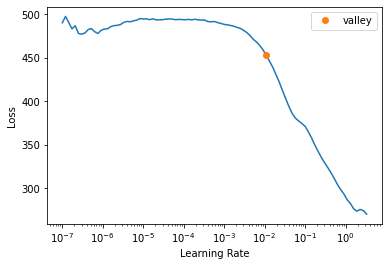

<Figure size 720x720 with 0 Axes>

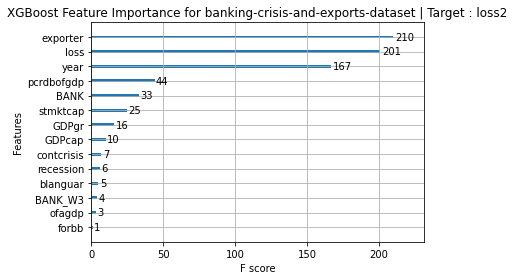

Target Variable: loss
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'for

  2%|▏         | 1/42 [00:03<02:10,  3.18s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9297436308567809, 'Adjusted R-Squared': 0.9289799746704416, 'RMSE': 0.9333523392533717, 'Time taken': 3.1754002571105957}


  7%|▋         | 3/42 [00:04<00:47,  1.23s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.4665260314941406}
{'Model': 'BayesianRidge', 'R-Squared': 0.6683529494206242, 'Adjusted R-Squared': 0.6647480901751961, 'RMSE': 2.027873402827194, 'Time taken': 0.10250210762023926}


 10%|▉         | 4/42 [00:05<00:33,  1.15it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.3259875774383545}
{'Model': 'DummyRegressor', 'R-Squared': -3.514369566492981e-05, 'Adjusted R-Squared': -0.010905090909748338, 'RMSE': 3.521359789289501, 'Time taken': 0.03331494331359863}
{'Model': 'ElasticNet', 'R-Squared': 0.4507565146833593, 'Adjusted R-Squared': 0.4447864767994828, 'RMSE': 2.6096678, 'Time taken': 0.047989845275878906}


 17%|█▋        | 7/42 [00:05<00:15,  2.20it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6679507994224417, 'Adjusted R-Squared': 0.6643415689813813, 'RMSE': 2.0291023, 'Time taken': 0.5371842384338379}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.0750579833984375}


 24%|██▍       | 10/42 [00:08<00:20,  1.58it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9985911673813035, 'Adjusted R-Squared': 0.9985758539832742, 'RMSE': 0.13216987175600953, 'Time taken': 2.504791736602783}
{'Model': 'GammaRegressor', 'R-Squared': 0.5102630371738015, 'Adjusted R-Squared': 0.504939809316995, 'RMSE': 2.464246856608525, 'Time taken': 0.12721729278564453}


 29%|██▊       | 12/42 [01:32<07:28, 14.96s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -6.637040743886258, 'Adjusted R-Squared': -6.720052056319805, 'RMSE': 9.731175907792782, 'Time taken': 83.63153672218323}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.4980369542676256, 'Adjusted R-Squared': 0.4925808342053172, 'RMSE': 2.4948166991018317, 'Time taken': 0.14683818817138672}


 31%|███       | 13/42 [01:39<06:15, 12.95s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9990890981902896, 'Adjusted R-Squared': 0.9990791970836623, 'RMSE': 0.1062768202134197, 'Time taken': 7.3003318309783936}


 33%|███▎      | 14/42 [01:40<04:32,  9.73s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9986247375798815, 'Adjusted R-Squared': 0.998609789075315, 'RMSE': 0.13058568073680246, 'Time taken': 1.1185035705566406}


 36%|███▌      | 15/42 [01:42<03:23,  7.53s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5900896152961764, 'Adjusted R-Squared': 0.5856340676363523, 'RMSE': 2.254484376002651, 'Time taken': 1.8855085372924805}


 38%|███▊      | 16/42 [01:48<03:08,  7.24s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.914496821212466, 'Adjusted R-Squared': 0.9135674388343407, 'RMSE': 1.0296601381038308, 'Time taken': 6.4893410205841064}


 40%|████      | 17/42 [02:05<04:09, 10.00s/it]

{'Model': 'KernelRidge', 'R-Squared': -27.513979550784676, 'Adjusted R-Squared': -27.823914111119294, 'RMSE': 18.803196, 'Time taken': 16.758200645446777}
{'Model': 'Lars', 'R-Squared': 0.670712931333687, 'Adjusted R-Squared': 0.6671337240655749, 'RMSE': 2.0206454043507054, 'Time taken': 0.07322454452514648}


 45%|████▌     | 19/42 [02:06<02:07,  5.56s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6692676086768856, 'Adjusted R-Squared': 0.6656726913798952, 'RMSE': 2.0250751059588428, 'Time taken': 0.3321504592895508}
{'Model': 'Lasso', 'R-Squared': 0.48217259940869694, 'Adjusted R-Squared': 0.4765440407066175, 'RMSE': 2.5339339, 'Time taken': 0.06392407417297363}


 50%|█████     | 21/42 [02:06<01:13,  3.49s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6682521487283355, 'Adjusted R-Squared': 0.6646461938232087, 'RMSE': 2.0281816, 'Time taken': 0.5288395881652832}
{'Model': 'LassoLars', 'R-Squared': -3.5146367333593886e-05, 'Adjusted R-Squared': -0.010905093610456884, 'RMSE': 3.5213597939932892, 'Time taken': 0.05527019500732422}


 60%|█████▉    | 25/42 [02:07<00:26,  1.55s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6682654408030683, 'Adjusted R-Squared': 0.6646596303770147, 'RMSE': 2.0281409232127245, 'Time taken': 0.2962329387664795}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6676354737257307, 'Adjusted R-Squared': 0.6640228158314452, 'RMSE': 2.0300657392691317, 'Time taken': 0.0832979679107666}
{'Model': 'LinearRegression', 'R-Squared': 0.6683865743303169, 'Adjusted R-Squared': 0.6647820805730378, 'RMSE': 2.0277705, 'Time taken': 0.06463313102722168}


 62%|██████▏   | 26/42 [02:09<00:28,  1.75s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.48757310176371627, 'Adjusted R-Squared': 0.4820032441741914, 'RMSE': 2.520685880733621, 'Time taken': 2.6067707538604736}


 64%|██████▍   | 27/42 [02:35<01:43,  6.93s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9920501826739755, 'Adjusted R-Squared': 0.991963771616084, 'RMSE': 0.31396507763908404, 'Time taken': 25.500503301620483}


 67%|██████▋   | 28/42 [17:24<50:28, 216.35s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9000313699634483, 'Adjusted R-Squared': 0.8989447544195728, 'RMSE': 1.113357501845114, 'Time taken': 888.9199335575104}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6190826463331492, 'Adjusted R-Squared': 0.6149422403150313, 'RMSE': 2.17329233711641, 'Time taken': 0.06443500518798828}


 74%|███████▍  | 31/42 [17:24<18:21, 100.10s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6250763339874479, 'Adjusted R-Squared': 0.6210010767481811, 'RMSE': 2.1561262993492782, 'Time taken': 0.2636995315551758}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5601135217027218, 'Adjusted R-Squared': 0.5553321469386209, 'RMSE': 2.335463453625373, 'Time taken': 0.12811899185180664}


 76%|███████▌  | 32/42 [17:25<12:39, 75.91s/it] 

{'Model': 'PoissonRegressor', 'R-Squared': 0.6586206310465363, 'Adjusted R-Squared': 0.6549099857318248, 'RMSE': 2.0574126467808695, 'Time taken': 0.3048725128173828}


 79%|███████▊  | 33/42 [17:25<08:28, 56.49s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [17:39<02:33, 25.55s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999972337681263, 'Adjusted R-Squared': 0.9999972037003886, 'RMSE': 0.005856620185738553, 'Time taken': 14.15920090675354}
{'Model': 'Ridge', 'R-Squared': 0.6683990671493409, 'Adjusted R-Squared': 0.6647947091835729, 'RMSE': 2.0277324, 'Time taken': 0.06009793281555176}
{'Model': 'RidgeCV', 'R-Squared': 0.6683585571250141, 'Adjusted R-Squared': 0.6647537588328947, 'RMSE': 2.0278562584524225, 'Time taken': 0.10464048385620117}


 88%|████████▊ | 37/42 [17:39<01:37, 19.54s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.6648207655974967, 'Adjusted R-Squared': 0.6611775130496433, 'RMSE': 2.038643664048227, 'Time taken': 0.1508619785308838}


 95%|█████████▌| 40/42 [17:47<00:19,  9.59s/it]

{'Model': 'SVR', 'R-Squared': 0.9022906582159326, 'Adjusted R-Squared': 0.9012286001530623, 'RMSE': 1.1007046807004472, 'Time taken': 7.3628880977630615}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6683865743303169, 'Adjusted R-Squared': 0.6647820805730378, 'RMSE': 2.0277705, 'Time taken': 0.05053353309631348}
{'Model': 'TweedieRegressor', 'R-Squared': 0.4980369542676256, 'Adjusted R-Squared': 0.4925808342053172, 'RMSE': 2.4948166991018317, 'Time taken': 0.11752438545227051}


 98%|█████████▊| 41/42 [17:48<00:07,  7.67s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999999179957, 'Adjusted R-Squared': 0.9999999991710434, 'RMSE': 0.000100837264, 'Time taken': 1.2194020748138428}


100%|██████████| 42/42 [17:49<00:00, 25.46s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992668422, 'Adjusted R-Squared': 0.9999999992588732, 'RMSE': 9.534578482371959e-05, 'Time taken': 0.42186617851257324}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: loss
loss
Target Standard Deviation: 3.5022971011002193
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.33
BaggingRegressor                             1.00       1.00  0.00        1.47
ExtraTreeRegressor                           1.00       1.00  0.00        0.08
LGBMRegressor                                1.00       1.00  0.00        0.42
XGBRegressor                                 1.00       1.00  0.00        1.22
RandomForestRegressor                        1.00       1.00  0.01       14.16
GradientBoostingRegressor                    1.00       1

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,16.089350,13.002025,3.605832,00:17
1,9.925929,8.599267,2.932451,00:17
2,9.413150,20.053385,4.478101,00:17


Better model found at epoch 0 with _rmse value: 3.605832099914551.
Better model found at epoch 1 with _rmse value: 2.932450532913208.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      18      18.00
1      19      19.00
2      19      19.00
3      19      19.00
4      19      19.00
XGBoost RMSE:  0.000100837264


<Figure size 432x288 with 0 Axes>

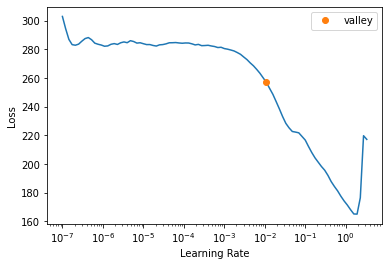

<Figure size 720x720 with 0 Axes>

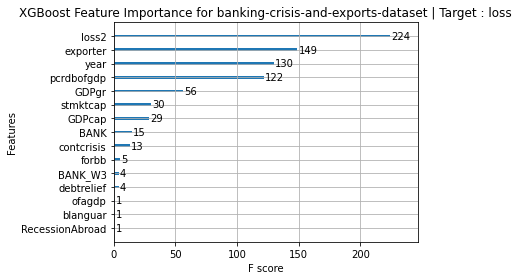

Target Variable: durables
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 

  2%|▏         | 1/42 [00:00<00:13,  3.06it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.999372303858936, 'Adjusted R-Squared': 0.9993654810747941, 'RMSE': 0.012482129562825722, 'Time taken': 0.32649707794189453}


  5%|▍         | 2/42 [00:00<00:14,  2.70it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.3994905948638916}
{'Model': 'BayesianRidge', 'R-Squared': 0.7792465395159314, 'Adjusted R-Squared': 0.776847045380235, 'RMSE': 0.2340818369651132, 'Time taken': 0.07177090644836426}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.1268923282623291}


 10%|▉         | 4/42 [00:00<00:07,  4.98it/s]

{'Model': 'DummyRegressor', 'R-Squared': -0.0007967042928269663, 'Adjusted R-Squared': -0.011674929339488216, 'RMSE': 0.49841016382719366, 'Time taken': 0.03184032440185547}
{'Model': 'ElasticNet', 'R-Squared': -0.0007966783911004249, 'Adjusted R-Squared': -0.011674903156221106, 'RMSE': 0.49841017, 'Time taken': 0.04413604736328125}


 19%|█▉        | 8/42 [00:01<00:06,  5.38it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7795888598200357, 'Adjusted R-Squared': 0.77719308655721, 'RMSE': 0.23390026, 'Time taken': 0.5342483520507812}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12140011787414551}


 24%|██▍       | 10/42 [00:03<00:13,  2.33it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.6556484699249268}
{'Model': 'GammaRegressor', 'R-Squared': 0.5587023563580468, 'Adjusted R-Squared': 0.5539056428401994, 'RMSE': 0.33096324121491905, 'Time taken': 0.12402033805847168}


 29%|██▊       | 12/42 [01:19<07:23, 14.79s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -1.346069072776987, 'Adjusted R-Squared': -1.3715698235680414, 'RMSE': 0.7631050964775578, 'Time taken': 75.7483127117157}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5724420154936936, 'Adjusted R-Squared': 0.5677946460968859, 'RMSE': 0.3257702847128001, 'Time taken': 0.13969182968139648}


 31%|███       | 13/42 [01:26<06:05, 12.59s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999897495473059, 'Adjusted R-Squared': 0.9999896381293418, 'RMSE': 0.0015950910553389056, 'Time taken': 6.984727621078491}


 33%|███▎      | 14/42 [01:26<04:16,  9.16s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999998890092224, 'Adjusted R-Squared': 0.9999998878028009, 'RMSE': 0.00016598062811766978, 'Time taken': 0.6228432655334473}


 36%|███▌      | 15/42 [01:28<03:04,  6.85s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.75471486646174, 'Adjusted R-Squared': 0.7520487237058894, 'RMSE': 0.24674568707654923, 'Time taken': 1.1929171085357666}


 38%|███▊      | 16/42 [01:34<02:52,  6.64s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9166448231988455, 'Adjusted R-Squared': 0.9157387886683982, 'RMSE': 0.14384018909887458, 'Time taken': 6.147390842437744}


 43%|████▎     | 18/42 [01:51<02:42,  6.78s/it]

{'Model': 'KernelRidge', 'R-Squared': -7.715189249008008, 'Adjusted R-Squared': -7.809919566932008, 'RMSE': 1.4707958, 'Time taken': 16.615577697753906}
{'Model': 'Lars', 'R-Squared': 0.7791426894748501, 'Adjusted R-Squared': 0.7767420665343594, 'RMSE': 0.2341368905756164, 'Time taken': 0.1083688735961914}


 45%|████▌     | 19/42 [01:51<01:52,  4.87s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7796275164736435, 'Adjusted R-Squared': 0.7772321633918352, 'RMSE': 0.23387976018718326, 'Time taken': 0.37442994117736816}
{'Model': 'Lasso', 'R-Squared': -0.0007966783911004249, 'Adjusted R-Squared': -0.011674903156221106, 'RMSE': 0.49841017, 'Time taken': 0.07509756088256836}


 52%|█████▏    | 22/42 [01:52<00:42,  2.11s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7796124962488903, 'Adjusted R-Squared': 0.7772169799037695, 'RMSE': 0.23388773, 'Time taken': 0.503227710723877}
{'Model': 'LassoLars', 'R-Squared': -0.0007966977011844012, 'Adjusted R-Squared': -0.011674922676197408, 'RMSE': 0.4984101621858305, 'Time taken': 0.12504196166992188}


 60%|█████▉    | 25/42 [01:52<00:16,  1.03it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7796275164736435, 'Adjusted R-Squared': 0.7772321633918352, 'RMSE': 0.23387976018718326, 'Time taken': 0.2789618968963623}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7795184244699955, 'Adjusted R-Squared': 0.777121885605539, 'RMSE': 0.2339376423111116, 'Time taken': 0.08247208595275879}
{'Model': 'LinearRegression', 'R-Squared': 0.7792266206404348, 'Adjusted R-Squared': 0.7768269099952221, 'RMSE': 0.2340924, 'Time taken': 0.07587313652038574}


 62%|██████▏   | 26/42 [01:57<00:30,  1.93s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7405267186652578, 'Adjusted R-Squared': 0.7377063569116192, 'RMSE': 0.25378168631605974, 'Time taken': 5.054178953170776}


 64%|██████▍   | 27/42 [02:04<00:47,  3.15s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9918026611936119, 'Adjusted R-Squared': 0.9917135596848469, 'RMSE': 0.04510767051726264, 'Time taken': 6.810230731964111}


 71%|███████▏  | 30/42 [08:31<11:54, 59.51s/it] 

{'Model': 'NuSVR', 'R-Squared': 0.9851866635338136, 'Adjusted R-Squared': 0.9850256490070072, 'RMSE': 0.06063737613981105, 'Time taken': 386.81439876556396}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6884444821450245, 'Adjusted R-Squared': 0.6850580091248617, 'RMSE': 0.27808763617275917, 'Time taken': 0.0463099479675293}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6989390327981206, 'Adjusted R-Squared': 0.6956666309807089, 'RMSE': 0.27336391341525684, 'Time taken': 0.14922571182250977}


 76%|███████▌  | 32/42 [08:31<05:41, 34.16s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6060558575934909, 'Adjusted R-Squared': 0.6017738560455941, 'RMSE': 0.3127024475214781, 'Time taken': 0.12181496620178223}
{'Model': 'PoissonRegressor', 'R-Squared': 0.610502500146148, 'Adjusted R-Squared': 0.6062688316694758, 'RMSE': 0.3109326254715483, 'Time taken': 0.1432187557220459}


 79%|███████▊  | 33/42 [08:32<03:47, 25.23s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [08:35<01:05, 10.86s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 3.5788094997406006}
{'Model': 'Ridge', 'R-Squared': 0.7792303746377591, 'Adjusted R-Squared': 0.7768307047968652, 'RMSE': 0.2340904, 'Time taken': 0.057747840881347656}
{'Model': 'RidgeCV', 'R-Squared': 0.7792304954920345, 'Adjusted R-Squared': 0.776830826964774, 'RMSE': 0.23409034316551938, 'Time taken': 0.09615206718444824}


 88%|████████▊ | 37/42 [08:35<00:41,  8.30s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7772582106220682, 'Adjusted R-Squared': 0.7748371042157863, 'RMSE': 0.2351336626880156, 'Time taken': 0.11917567253112793}


 95%|█████████▌| 40/42 [08:42<00:09,  4.54s/it]

{'Model': 'SVR', 'R-Squared': 0.9681896445210316, 'Adjusted R-Squared': 0.9678438797875646, 'RMSE': 0.08885834455505522, 'Time taken': 6.244195222854614}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7792266206404348, 'Adjusted R-Squared': 0.7768269099952221, 'RMSE': 0.2340924, 'Time taken': 0.0631263256072998}
{'Model': 'TweedieRegressor', 'R-Squared': 0.5724420154936936, 'Adjusted R-Squared': 0.5677946460968859, 'RMSE': 0.3257702847128001, 'Time taken': 0.11299681663513184}


 98%|█████████▊| 41/42 [08:43<00:03,  3.68s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999999004446, 'Adjusted R-Squared': 0.9999999989936248, 'RMSE': 1.5719776e-05, 'Time taken': 0.7930059432983398}


100%|██████████| 42/42 [08:43<00:00, 12.46s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.99999999929393, 'Adjusted R-Squared': 0.9999999992862554, 'RMSE': 1.3238471381742118e-05, 'Time taken': 0.29871487617492676}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: durables
durables
Target Standard Deviation: 0.4968187821970401
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.13
RandomForestRegressor                        1.00       1.00  0.00        3.58
BaggingRegressor                             1.00       1.00  0.00        0.40
ExtraTreeRegressor                           1.00       1.00  0.00        0.12
ExtraTreesRegressor                          1.00       1.00  0.00        1.66
LGBMRegressor                                1.00       1.00  0.00        0.30
XGBRegressor                                 1.00 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.520488,0.449797,0.670669,00:17
1,0.103847,0.069719,0.264043,00:17
2,0.031709,0.020919,0.144635,00:17
3,0.025063,0.015837,0.125845,00:18
4,0.006274,0.007095,0.084232,00:17
5,0.000675,0.000053,0.007301,00:17
6,0.045199,23.942863,4.893145,00:18


Better model found at epoch 0 with _rmse value: 0.6706689596176147.
Better model found at epoch 1 with _rmse value: 0.2640429139137268.
Better model found at epoch 2 with _rmse value: 0.14463476836681366.
Better model found at epoch 3 with _rmse value: 0.12584517896175385.
Better model found at epoch 4 with _rmse value: 0.08423204720020294.
Better model found at epoch 5 with _rmse value: 0.0073007699102163315.
No improvement since epoch 5: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       2       2.00
3       1       1.00
4       2       2.00
XGBoost RMSE:  1.5719776e-05


<Figure size 432x288 with 0 Axes>

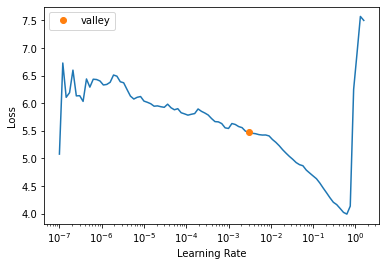

<Figure size 720x720 with 0 Axes>

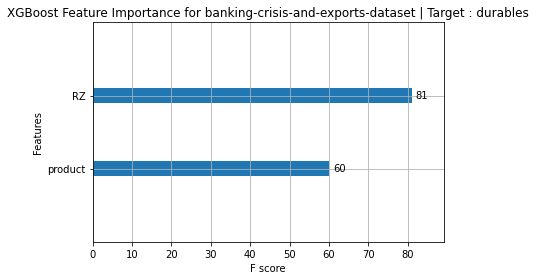

Target Variable: GDPgrAbroad
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad']
43
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps',

  2%|▏         | 1/42 [00:03<02:05,  3.07s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.0057644911643783825, 'Adjusted R-Squared': -0.016696713894426063, 'RMSE': 2.4660468878984996, 'Time taken': 3.069333553314209}


  5%|▍         | 2/42 [00:06<02:18,  3.46s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.6503490701894861, 'Adjusted R-Squared': 0.6465485166045892, 'RMSE': 1.454020481738773, 'Time taken': 3.7365405559539795}
{'Model': 'BayesianRidge', 'R-Squared': 0.2544338259557126, 'Adjusted R-Squared': 0.24632984580305728, 'RMSE': 2.123226267642967, 'Time taken': 0.07936549186706543}


 10%|▉         | 4/42 [00:07<00:56,  1.49s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.3754073767375343, 'Adjusted R-Squared': 0.3686183264846814, 'RMSE': 1.9433526002426178, 'Time taken': 0.5585532188415527}
{'Model': 'DummyRegressor', 'R-Squared': -0.00042732979536830307, 'Adjusted R-Squared': -0.011301539901839686, 'RMSE': 2.459495, 'Time taken': 0.03365302085876465}
{'Model': 'ElasticNet', 'R-Squared': 0.04316735832473795, 'Adjusted R-Squared': 0.03276700352391981, 'RMSE': 2.4053106, 'Time taken': 0.05319499969482422}


 17%|█▋        | 7/42 [00:08<00:27,  1.26it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.2544533087735178, 'Adjusted R-Squared': 0.24634954039062118, 'RMSE': 2.1231985, 'Time taken': 0.736274242401123}


 19%|█▉        | 8/42 [00:08<00:22,  1.48it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.3499797279380078, 'Adjusted R-Squared': 0.3429142901982035, 'RMSE': 1.9825156803584298, 'Time taken': 0.22864437103271484}


 21%|██▏       | 9/42 [00:20<01:52,  3.41s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.651952197583338, 'Adjusted R-Squared': 0.6481690692962003, 'RMSE': 1.4506833562540293, 'Time taken': 12.330324172973633}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:40<09:18, 18.01s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.10299138207625647, 'Adjusted R-Squared': 0.09324128840317225, 'RMSE': 2.3289034710953738, 'Time taken': 79.57062673568726}


 29%|██▊       | 12/42 [01:40<07:01, 14.05s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.1840990835180636, 'Adjusted R-Squared': 0.17523059529543383, 'RMSE': 2.2211193258302955, 'Time taken': 0.20568323135375977}


 31%|███       | 13/42 [01:47<05:56, 12.29s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.5993711029074478, 'Adjusted R-Squared': 0.5950164409825287, 'RMSE': 1.5564110882035531, 'Time taken': 6.758988857269287}


 33%|███▎      | 14/42 [01:48<04:25,  9.48s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6707816721349706, 'Adjusted R-Squared': 0.6672032120494812, 'RMSE': 1.4108965866872332, 'Time taken': 1.3268065452575684}


 36%|███▌      | 15/42 [01:49<03:13,  7.17s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.2448680881549944, 'Adjusted R-Squared': 0.23666013259146168, 'RMSE': 2.1368035295785313, 'Time taken': 0.8831918239593506}


 38%|███▊      | 16/42 [01:56<03:04,  7.10s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.2737571621355753, 'Adjusted R-Squared': 0.26586321824574455, 'RMSE': 2.095531, 'Time taken': 6.890706300735474}


 40%|████      | 17/42 [02:13<04:07,  9.88s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.761485634347834, 'Adjusted R-Squared': -0.7806322173298759, 'RMSE': 3.2635684, 'Time taken': 16.926018238067627}
{'Model': 'Lars', 'R-Squared': 0.2514243645902, 'Adjusted R-Squared': 0.24328767290096298, 'RMSE': 2.1275071300178823, 'Time taken': 0.07033896446228027}


 45%|████▌     | 19/42 [02:13<02:07,  5.56s/it]

{'Model': 'LarsCV', 'R-Squared': 0.25295861798947195, 'Adjusted R-Squared': 0.2448386029676184, 'RMSE': 2.125325781119385, 'Time taken': 0.36008501052856445}
{'Model': 'Lasso', 'R-Squared': -0.00042732979536830307, 'Adjusted R-Squared': -0.011301539901839686, 'RMSE': 2.459495, 'Time taken': 0.07547521591186523}


 52%|█████▏    | 22/42 [02:14<00:55,  2.79s/it]

{'Model': 'LassoCV', 'R-Squared': 0.2544880016503335, 'Adjusted R-Squared': 0.246384610363924, 'RMSE': 2.1231492, 'Time taken': 0.6560685634613037}
{'Model': 'LassoLars', 'R-Squared': -0.00042733185628507364, 'Adjusted R-Squared': -0.01130154198515787, 'RMSE': 2.4594950596374208, 'Time taken': 0.11149454116821289}


 60%|█████▉    | 25/42 [02:15<00:22,  1.34s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.25451767208259457, 'Adjusted R-Squared': 0.2464146033008836, 'RMSE': 2.1231068756220752, 'Time taken': 0.2747795581817627}
{'Model': 'LassoLarsIC', 'R-Squared': 0.25456196375550144, 'Adjusted R-Squared': 0.2464593764050177, 'RMSE': 2.1230438041389887, 'Time taken': 0.08855366706848145}
{'Model': 'LinearRegression', 'R-Squared': 0.2545616838548672, 'Adjusted R-Squared': 0.24645909346198536, 'RMSE': 2.1230443, 'Time taken': 0.09719181060791016}


 62%|██████▏   | 26/42 [02:18<00:27,  1.71s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.23716630486266077, 'Adjusted R-Squared': 0.22887463426334187, 'RMSE': 2.1476727878596003, 'Time taken': 2.9755914211273193}


 64%|██████▍   | 27/42 [02:44<01:54,  7.63s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.49228125906027187, 'Adjusted R-Squared': 0.48676257709353565, 'RMSE': 1.7521237544635104, 'Time taken': 26.131242990493774}


 67%|██████▋   | 28/42 [03:18<03:23, 14.56s/it]

{'Model': 'NuSVR', 'R-Squared': 0.3954628492959239, 'Adjusted R-Squared': 0.38889179331001, 'RMSE': 1.9118978191352611, 'Time taken': 34.57459473609924}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.20792599778073384, 'Adjusted R-Squared': 0.1993164977566113, 'RMSE': 2.188447133996239, 'Time taken': 0.04974102973937988}


 74%|███████▍  | 31/42 [03:19<01:11,  6.52s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.215998356203018, 'Adjusted R-Squared': 0.20747659920522465, 'RMSE': 2.177266884007204, 'Time taken': 0.18393778800964355}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.0026258558980134517, 'Adjusted R-Squared': -0.013523963027339825, 'RMSE': 2.462196051193241, 'Time taken': 0.1440424919128418}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [03:19<00:36,  4.00s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.19666141482094712, 'Adjusted R-Squared': -0.20966860411247912, 'RMSE': 2.6899166, 'Time taken': 0.38216114044189453}


 81%|████████  | 34/42 [03:46<01:12,  9.06s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.6838565464007809, 'Adjusted R-Squared': 0.6804202045138328, 'RMSE': 1.382595939431391, 'Time taken': 26.792147397994995}
{'Model': 'Ridge', 'R-Squared': 0.2545751411807, 'Adjusted R-Squared': 0.24647269706309893, 'RMSE': 2.1230252, 'Time taken': 0.06229233741760254}


 88%|████████▊ | 37/42 [03:46<00:22,  4.42s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.2545614301365362, 'Adjusted R-Squared': 0.24645883698584636, 'RMSE': 2.1230445640252436, 'Time taken': 0.19509649276733398}
{'Model': 'SGDRegressor', 'R-Squared': 0.2477691185718074, 'Adjusted R-Squared': 0.23959269594758792, 'RMSE': 2.1326950439667653, 'Time taken': 0.1578216552734375}


 90%|█████████ | 38/42 [04:16<00:41, 10.44s/it]

{'Model': 'SVR', 'R-Squared': 0.3950424266185223, 'Adjusted R-Squared': 0.38846680082089746, 'RMSE': 1.9125625140154576, 'Time taken': 29.865152835845947}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.2545616838548672, 'Adjusted R-Squared': 0.24645909346198536, 'RMSE': 2.1230443, 'Time taken': 0.061609745025634766}


 95%|█████████▌| 40/42 [04:17<00:12,  6.29s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.1840990835180636, 'Adjusted R-Squared': 0.17523059529543383, 'RMSE': 2.2211193258302955, 'Time taken': 0.23570036888122559}


 98%|█████████▊| 41/42 [04:19<00:05,  5.39s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.6577381552759725, 'Adjusted R-Squared': 0.65401791783332, 'RMSE': 1.4385748, 'Time taken': 2.2913553714752197}


100%|██████████| 42/42 [04:19<00:00,  6.19s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.672710029634312, 'Adjusted R-Squared': 0.669152529956424, 'RMSE': 1.406758437990854, 'Time taken': 0.4767911434173584}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: GDPgrAbroad
GDPgrAbroad
Target Standard Deviation: 2.3548879623413086
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.68       0.68  1.38       26.79
LGBMRegressor                                0.67       0.67  1.41        0.48
HistGradientBoostingRegressor                0.67       0.67  1.41        1.33
XGBRegressor                                 0.65       0.66  1.44        2.29
ExtraTreesRegressor                          0.65       0.65  1.45       12.33
BaggingRegressor                             0.65       0.65  1.45        3.74
GradientBoostingRegressor                    0.60 

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,6.528448,6.393654,2.528568,00:17
1,5.544951,5.406742,2.325240,00:17
2,4.360825,7.885096,2.808041,00:17


Better model found at epoch 0 with _rmse value: 2.5285677909851074.
Better model found at epoch 1 with _rmse value: 2.325240135192871.
No improvement since epoch 1: early stopping


,exporter,year,product,BANK,BANK_W3,TWIN,RZ,FL,TANG,ofagdp,pcrdbofgdp,stmktcap,durables,loss,loss2,GDPcap,developed,developing,blanguar,liqsup,forba,forbb,recaps,debtrelief,policytot,recession,GDPgr,INVSA,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis,tradevalue,tradeshare,expgrowth,expgrowthTRIM,RecessionAbroad,GDPgrAbroad,GDPgrAbroad_pred
0,3.00,11.00,4.00,1.00,1.00,1.00,13.00,28.00,17.00,1.00,1.00,30.00,1.00,19.00,20.00,99.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,233.00,9.00,7.00,17.00,16.00,22.00,2.00,2.00,24.00,7.00,26.00,1.00,-0.19,-0.31,-1.04,-2.29,-0.73,3.49,1.91
1,9.00,4.00,26.00,1.00,1.00,1.00,3.00,2.00,2.00,1.00,243.00,1.00,1.00,19.00,20.00,251.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,66.00,76.00,73.00,1.00,5.00,3.00,2.00,1.00,3.00,24.00,18.00,1.00,-0.17,-0.30,-0.19,-0.37,0.76,3.35,3.27
2,5.00,9.00,21.00,1.00,1.00,1.00,26.00,25.00,14.00,1.00,210.00,1.00,1.00,19.00,20.00,230.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,203.00,1.00,1.00,17.00,28.00,7.00,2.00,1.00,1.00,1.00,1.00,1.00,-0.19,-0.31,-0.41,-0.87,0.12,0.92,2.17
3,6.00,25.00,9.00,1.00,1.00,1.00,13.00,28.00,17.00,1.00,82.00,126.00,1.00,19.00,20.00,50.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,197.00,23.00,21.00,17.00,16.00,22.00,2.00,1.00,24.00,7.00,26.00,1.00,-0.13,-0.19,-0.29,-0.61,-0.71,4.68,2.41
4,1.00,1.00,29.00,1.00,1.00,1.00,22.00,16.00,15.00,1.00,1.00,41.00,2.00,19.00,20.00,190.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,159.00,18.00,49.00,9.00,23.00,12.00,2.00,1.00,20.00,21.00,19.00,1.00,-0.19,-0.31,-0.14,-0.26,-0.73,0.00,2.36
5,8.00,15.00,24.00,1.00,1.00,1.00,3.00,2.00,2.00,52.00,204.00,199.00,1.00,19.00,20.00,87.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,193.00,66.00,63.00,1.00,5.00,3.00,2.00,1.00,3.00,24.00,18.00,1.00,-0.19,-0.31,-3.38,-0.26,-0.73,0.00,1.76
6,4.00,17.00,27.00,1.00,2.00,1.00,5.00,20.00,3.00,1.00,18.00,1.00,1.00,20.00,8.00,136.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,48.00,67.00,58.00,16.00,2.00,4.00,2.00,1.00,2.00,28.00,16.00,1.00,-0.19,-0.11,0.07,0.22,-0.73,3.47,2.32
7,6.00,2.00,26.00,1.00,1.00,1.00,3.00,2.00,2.00,1.00,7.00,3.00,1.00,19.00,20.00,3.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,258.00,76.00,73.00,1.00,5.00,3.00,2.00,1.00,3.00,24.00,18.00,1.00,-0.18,-0.31,3.76,-0.26,-0.30,0.33,2.69
8,8.00,13.00,72.00,1.00,1.00,1.00,23.00,26.00,11.00,50.00,188.00,174.00,2.00,19.00,20.00,85.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,277.00,75.00,54.00,13.00,8.00,16.00,3.00,1.00,27.00,10.00,25.00,1.00,-0.19,-0.29,-2.43,-0.26,-0.72,0.38,1.63


<Figure size 432x288 with 0 Axes>

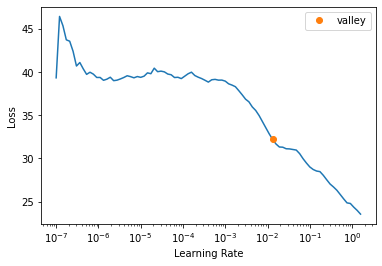

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    3.82       2.95
1    3.12       2.29
2    4.15       3.30
3    1.07       1.57
4    5.26       4.85
XGBoost RMSE:  1.4389061


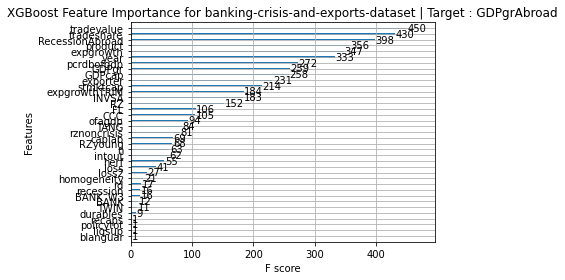

Target Variable: RecessionAbroad
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'GDPgrAbroad']
43
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'de

  2%|▏         | 1/42 [00:01<00:53,  1.31s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.19357900029899022, 'Adjusted R-Squared': 0.18481355465006621, 'RMSE': 0.16863489689762243, 'Time taken': 1.3113048076629639}


  5%|▍         | 2/42 [00:03<01:23,  2.09s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.6913799693302424, 'Adjusted R-Squared': 0.6880254037794842, 'RMSE': 0.10432264561565835, 'Time taken': 2.6274077892303467}
{'Model': 'BayesianRidge', 'R-Squared': 0.2749413875381843, 'Adjusted R-Squared': 0.26706031566359933, 'RMSE': 0.15990170514547497, 'Time taken': 0.08032631874084473}


 10%|▉         | 4/42 [00:04<00:36,  1.05it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.47668316669910515, 'Adjusted R-Squared': 0.4709949402501824, 'RMSE': 0.13584663636579422, 'Time taken': 0.4843604564666748}
{'Model': 'DummyRegressor', 'R-Squared': -0.00047037969142227354, 'Adjusted R-Squared': -0.01134505773154637, 'RMSE': 0.1878316, 'Time taken': 0.03274965286254883}
{'Model': 'ElasticNet', 'R-Squared': -0.00047037969142227354, 'Adjusted R-Squared': -0.01134505773154637, 'RMSE': 0.1878316, 'Time taken': 0.04002690315246582}


 19%|█▉        | 8/42 [00:05<00:15,  2.23it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.2756026746151795, 'Adjusted R-Squared': 0.26772879064360533, 'RMSE': 0.15982877, 'Time taken': 0.5022945404052734}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.35218944214971215, 'Adjusted R-Squared': 0.3451480230426438, 'RMSE': 0.15114387348677852, 'Time taken': 0.1890697479248047}


 21%|██▏       | 9/42 [00:17<01:42,  3.11s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.716889102473393, 'Adjusted R-Squared': 0.7138118101089733, 'RMSE': 0.0999182526220144, 'Time taken': 11.811930418014526}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 29%|██▊       | 12/42 [01:32<06:34, 13.16s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.17176252847353624, 'Adjusted R-Squared': 0.16275994726129206, 'RMSE': 0.17090075240902738, 'Time taken': 74.78710532188416}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.22420691980285368, 'Adjusted R-Squared': 0.21577438632244983, 'RMSE': 0.16540151681334606, 'Time taken': 0.19880104064941406}


 31%|███       | 13/42 [01:38<05:37, 11.63s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.6125314454030575, 'Adjusted R-Squared': 0.6083198306791777, 'RMSE': 0.11689199437587093, 'Time taken': 6.829764127731323}


 33%|███▎      | 14/42 [01:40<04:10,  8.95s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6991002293511991, 'Adjusted R-Squared': 0.6958295796702338, 'RMSE': 0.10300954420646265, 'Time taken': 1.1530280113220215}


 36%|███▌      | 15/42 [01:41<03:03,  6.80s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.23315675045574913, 'Adjusted R-Squared': 0.22482149774331162, 'RMSE': 0.16444468323681238, 'Time taken': 0.9499819278717041}


 38%|███▊      | 16/42 [01:47<02:52,  6.63s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.3747330867085501, 'Adjusted R-Squared': 0.3679367072162517, 'RMSE': 0.1484907, 'Time taken': 6.167358160018921}


 40%|████      | 17/42 [02:03<03:53,  9.35s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.28392057229424794, 'Adjusted R-Squared': -0.2978762306887508, 'RMSE': 0.21278235, 'Time taken': 16.23437237739563}
{'Model': 'Lars', 'R-Squared': 0.27369819142933827, 'Adjusted R-Squared': 0.26580360655357016, 'RMSE': 0.16003873133583085, 'Time taken': 0.07300376892089844}


 45%|████▌     | 19/42 [02:03<02:00,  5.26s/it]

{'Model': 'LarsCV', 'R-Squared': 0.27641749520607584, 'Adjusted R-Squared': 0.26855246798005483, 'RMSE': 0.15973885459606874, 'Time taken': 0.33303070068359375}
{'Model': 'Lasso', 'R-Squared': -0.00047037969142227354, 'Adjusted R-Squared': -0.01134505773154637, 'RMSE': 0.1878316, 'Time taken': 0.07235145568847656}


 50%|█████     | 21/42 [02:04<01:09,  3.33s/it]

{'Model': 'LassoCV', 'R-Squared': 0.2755905270047203, 'Adjusted R-Squared': 0.26771651099390203, 'RMSE': 0.15983011, 'Time taken': 0.5368335247039795}
{'Model': 'LassoLars', 'R-Squared': -0.00047040581820922966, 'Adjusted R-Squared': -0.011345084142320161, 'RMSE': 0.18783160108815541, 'Time taken': 0.05701589584350586}


 60%|█████▉    | 25/42 [02:04<00:25,  1.48s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.2759046059539423, 'Adjusted R-Squared': 0.26803400384474596, 'RMSE': 0.15979545755991403, 'Time taken': 0.27507972717285156}
{'Model': 'LassoLarsIC', 'R-Squared': 0.2750673465784571, 'Adjusted R-Squared': 0.26718764382387505, 'RMSE': 0.1598878152752029, 'Time taken': 0.08648824691772461}
{'Model': 'LinearRegression', 'R-Squared': 0.27452240476414913, 'Adjusted R-Squared': 0.26663677872897684, 'RMSE': 0.1599479, 'Time taken': 0.06722545623779297}


 62%|██████▏   | 26/42 [02:10<00:35,  2.20s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.18625525952048183, 'Adjusted R-Squared': 0.17741020799353047, 'RMSE': 0.169398918943982, 'Time taken': 5.175194263458252}


 64%|██████▍   | 27/42 [02:18<00:52,  3.53s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.46155775947495226, 'Adjusted R-Squared': 0.4557051264257669, 'RMSE': 0.13779583744195842, 'Time taken': 8.29311752319336}


 67%|██████▋   | 28/42 [03:20<04:02, 17.32s/it]

{'Model': 'NuSVR', 'R-Squared': 0.49361441743384404, 'Adjusted R-Squared': 0.4881102263189945, 'RMSE': 0.13363099536314804, 'Time taken': 61.69490957260132}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2290251845791329, 'Adjusted R-Squared': 0.22064502354194948, 'RMSE': 0.16488708223401197, 'Time taken': 0.04757404327392578}


 74%|███████▍  | 31/42 [03:20<01:28,  8.08s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.24282302177559345, 'Adjusted R-Squared': 0.23459283722967594, 'RMSE': 0.1634049609850581, 'Time taken': 0.16200661659240723}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.45262525729222247, 'Adjusted R-Squared': -0.46841466226279027, 'RMSE': 0.22633063022066668, 'Time taken': 0.13247418403625488}


 76%|███████▌  | 32/42 [03:20<01:01,  6.16s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.10894263254436842, 'Adjusted R-Squared': 0.09925722637637235, 'RMSE': 0.17726352033898643, 'Time taken': 0.15384197235107422}


 79%|███████▊  | 33/42 [03:21<00:42,  4.67s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.4164841339353442, 'Adjusted R-Squared': -0.43188070060855455, 'RMSE': 0.22349736, 'Time taken': 0.36945128440856934}


 81%|████████  | 34/42 [03:47<01:23, 10.43s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7229656833530829, 'Adjusted R-Squared': 0.7199544407808338, 'RMSE': 0.0988401331344881, 'Time taken': 26.09786891937256}
{'Model': 'Ridge', 'R-Squared': 0.27453426238933964, 'Adjusted R-Squared': 0.2666487652413977, 'RMSE': 0.15994659, 'Time taken': 0.05985116958618164}


 88%|████████▊ | 37/42 [03:47<00:22,  4.57s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.27459705017943714, 'Adjusted R-Squared': 0.26671223550747447, 'RMSE': 0.15993967007290785, 'Time taken': 0.16038036346435547}
{'Model': 'SGDRegressor', 'R-Squared': 0.2708727167168662, 'Adjusted R-Squared': 0.26294742015944084, 'RMSE': 0.1603497222084358, 'Time taken': 0.12119674682617188}


 90%|█████████ | 38/42 [04:03<00:29,  7.35s/it]

{'Model': 'SVR', 'R-Squared': 0.49224756156212557, 'Adjusted R-Squared': 0.48672851331823563, 'RMSE': 0.13381122484250704, 'Time taken': 15.586032390594482}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.27452240476414913, 'Adjusted R-Squared': 0.26663677872897684, 'RMSE': 0.1599479, 'Time taken': 0.08858180046081543}


 95%|█████████▌| 40/42 [04:03<00:08,  4.34s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.22420691980285368, 'Adjusted R-Squared': 0.21577438632244983, 'RMSE': 0.16540151681334606, 'Time taken': 0.2502732276916504}


 98%|█████████▊| 41/42 [04:05<00:03,  3.88s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.7131057735677069, 'Adjusted R-Squared': 0.7099873580630081, 'RMSE': 0.10058366, 'Time taken': 2.3478949069976807}


100%|██████████| 42/42 [04:06<00:00,  5.86s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7033823102299331, 'Adjusted R-Squared': 0.7001582049063455, 'RMSE': 0.10227395746448635, 'Time taken': 0.4727795124053955}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: RecessionAbroad
RecessionAbroad
Target Standard Deviation: 0.19552457332611084
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.72       0.72  0.10       26.10
ExtraTreesRegressor                          0.71       0.72  0.10       11.81
XGBRegressor                                 0.71       0.71  0.10        2.35
LGBMRegressor                                0.70       0.70  0.10        0.47
HistGradientBoostingRegressor                0.70       0.70  0.10        1.15
BaggingRegressor                             0.69       0.69  0.10        2.63
GradientBoostingRegressor            

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.649315,0.045546,0.213416,00:17
1,0.065435,0.039197,0.197982,00:17
2,0.063440,0.043486,0.208533,00:17


Better model found at epoch 0 with _rmse value: 0.21341602504253387.
Better model found at epoch 1 with _rmse value: 0.19798167049884796.
No improvement since epoch 1: early stopping


,exporter,year,product,BANK,BANK_W3,TWIN,RZ,FL,TANG,ofagdp,pcrdbofgdp,stmktcap,durables,loss,loss2,GDPcap,developed,developing,blanguar,liqsup,forba,forbb,recaps,debtrelief,policytot,recession,GDPgr,INVSA,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis,tradevalue,tradeshare,expgrowth,expgrowthTRIM,GDPgrAbroad,RecessionAbroad,RecessionAbroad_pred
0,5.00,14.00,44.00,1.00,2.00,1.00,24.00,22.00,23.00,1.00,230.00,118.00,1.00,31.00,34.00,220.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,26.00,36.00,15.00,3.00,6.00,34.00,2.00,1.00,4.00,25.00,24.00,1.00,-0.18,-0.31,0.44,1.06,-1.29,0.64,0.12
1,10.00,13.00,68.00,1.00,1.00,1.00,31.00,12.00,9.00,1.00,4.00,100.00,2.00,19.00,20.00,24.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,172.00,63.00,65.00,28.00,24.00,15.00,5.00,1.00,25.00,8.00,7.00,1.00,-0.18,-0.30,-0.04,-0.05,-0.20,0.00,0.06
2,8.00,5.00,61.00,1.00,1.00,1.00,27.00,14.00,10.00,49.00,194.00,166.00,2.00,19.00,20.00,115.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,266.00,69.00,69.00,19.00,14.00,20.00,3.00,1.00,26.00,2.00,15.00,1.00,-0.19,-0.30,0.74,1.74,-1.05,0.14,0.10
3,4.00,25.00,48.00,1.00,1.00,1.00,2.00,6.00,13.00,1.00,116.00,61.00,2.00,19.00,20.00,146.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,168.00,46.00,52.00,2.00,4.00,6.00,3.00,1.00,3.00,11.00,3.00,1.00,-0.18,-0.25,-0.17,-0.34,0.72,0.08,0.06
4,5.00,27.00,67.00,1.00,1.00,1.00,31.00,12.00,9.00,1.00,218.00,210.00,2.00,19.00,20.00,257.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,216.00,48.00,53.00,28.00,24.00,15.00,5.00,1.00,25.00,8.00,7.00,1.00,-0.14,-0.24,-0.12,-0.22,1.70,0.03,0.09
5,6.00,23.00,1.00,1.00,1.00,1.00,13.00,28.00,17.00,1.00,59.00,74.00,1.00,19.00,20.00,40.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,175.00,7.00,8.00,17.00,16.00,22.00,2.00,1.00,24.00,7.00,26.00,1.00,-0.18,-0.30,0.16,0.41,-0.36,0.15,0.09
6,8.00,2.00,5.00,1.00,1.00,1.00,13.00,28.00,17.00,39.00,145.00,165.00,1.00,19.00,20.00,103.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,182.00,27.00,23.00,17.00,16.00,22.00,2.00,2.00,24.00,7.00,26.00,1.00,-0.18,-0.32,-0.14,-0.26,-1.05,0.00,0.08
7,8.00,19.00,5.00,1.00,1.00,1.00,13.00,28.00,17.00,44.00,214.00,193.00,1.00,19.00,20.00,89.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,119.00,27.00,23.00,17.00,16.00,22.00,2.00,2.00,24.00,7.00,26.00,1.00,-0.17,5.77,-0.75,-1.67,8.30,0.00,0.09
8,3.00,11.00,47.00,1.00,1.00,1.00,35.00,24.00,18.00,1.00,1.00,30.00,1.00,19.00,20.00,99.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,233.00,25.00,26.00,26.00,31.00,30.00,3.00,1.00,16.00,23.00,14.00,1.00,-0.19,-0.25,-1.71,-0.26,0.82,0.07,0.07


<Figure size 432x288 with 0 Axes>

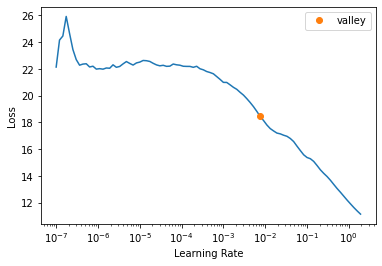

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00       0.03
1    0.03       0.07
2    0.11       0.10
3    0.42       0.11
4    0.10       0.40
XGBoost RMSE:  0.10061965


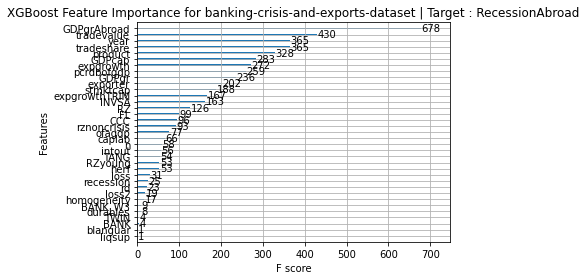

Target Variable: stmktcap
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 

  2%|▏         | 1/42 [00:03<02:29,  3.65s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.909902857252074, 'Adjusted R-Squared': 0.9089235404830748, 'RMSE': 21.79250760144994, 'Time taken': 3.6500730514526367}


  5%|▍         | 2/42 [00:07<02:22,  3.55s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.999883553342245, 'Adjusted R-Squared': 0.9998822876177041, 'RMSE': 0.7834570824237919, 'Time taken': 3.4782967567443848}


  7%|▋         | 3/42 [00:07<01:20,  2.06s/it]

{'Model': 'BayesianRidge', 'R-Squared': 0.6748689508024578, 'Adjusted R-Squared': 0.6713349176590062, 'RMSE': 41.39814865448285, 'Time taken': 0.2852189540863037}


 12%|█▏        | 5/42 [00:08<00:38,  1.04s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9996315303377706, 'Adjusted R-Squared': 0.9996275252327465, 'RMSE': 1.3936462965903509, 'Time taken': 0.7465546131134033}
{'Model': 'DummyRegressor', 'R-Squared': -1.7431715049198715e-07, 'Adjusted R-Squared': -0.010869741429293533, 'RMSE': 72.60252663155157, 'Time taken': 0.13423705101013184}


 14%|█▍        | 6/42 [00:08<00:27,  1.30it/s]

{'Model': 'ElasticNet', 'R-Squared': 0.6157136014605329, 'Adjusted R-Squared': 0.6115365753894517, 'RMSE': 45.00691, 'Time taken': 0.22685003280639648}


 19%|█▉        | 8/42 [00:09<00:20,  1.65it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6731756182983168, 'Adjusted R-Squared': 0.6696231793667768, 'RMSE': 41.505814, 'Time taken': 0.9183840751647949}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.15134096145629883}


 21%|██▏       | 9/42 [00:14<01:03,  1.91s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999959075252258, 'Adjusted R-Squared': 0.9999958630418043, 'RMSE': 0.14687392552798462, 'Time taken': 4.785632610321045}


 24%|██▍       | 10/42 [00:14<00:44,  1.40s/it]

{'Model': 'GammaRegressor', 'R-Squared': 0.5449096969429986, 'Adjusted R-Squared': 0.5399630632141181, 'RMSE': 48.97793695182135, 'Time taken': 0.25920772552490234}


 26%|██▌       | 11/42 [01:33<12:57, 25.08s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3774706998396302, 'Adjusted R-Squared': 0.3707040770118001, 'RMSE': 57.28377040203567, 'Time taken': 78.76098442077637}


 29%|██▊       | 12/42 [01:33<08:45, 17.51s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5545934071391534, 'Adjusted R-Squared': 0.5497520311297963, 'RMSE': 48.45404267867011, 'Time taken': 0.20618033409118652}


 31%|███       | 13/42 [01:40<06:56, 14.36s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9843028345353516, 'Adjusted R-Squared': 0.9841322131716055, 'RMSE': 9.096248473508641, 'Time taken': 7.104987144470215}


 33%|███▎      | 14/42 [01:42<04:51, 10.42s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9998681052032874, 'Adjusted R-Squared': 0.9998666715641927, 'RMSE': 0.8338069837840538, 'Time taken': 1.2961771488189697}


 36%|███▌      | 15/42 [01:43<03:24,  7.57s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.6641007140233827, 'Adjusted R-Squared': 0.6604496348279847, 'RMSE': 42.078111226484154, 'Time taken': 0.9599564075469971}


 38%|███▊      | 16/42 [01:49<03:09,  7.29s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8052753891915807, 'Adjusted R-Squared': 0.8031588173349674, 'RMSE': 32.03775819248282, 'Time taken': 6.644607305526733}


 40%|████      | 17/42 [02:06<04:13, 10.14s/it]

{'Model': 'KernelRidge', 'R-Squared': -0.8405509934197901, 'Adjusted R-Squared': -0.8605569824787009, 'RMSE': 98.4976, 'Time taken': 16.770771265029907}
{'Model': 'Lars', 'R-Squared': 0.6747557897874816, 'Adjusted R-Squared': 0.6712205266329977, 'RMSE': 41.405352286651684, 'Time taken': 0.0764617919921875}


 45%|████▌     | 19/42 [02:06<02:08,  5.57s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6751018610262044, 'Adjusted R-Squared': 0.6715703595156197, 'RMSE': 41.38331805079452, 'Time taken': 0.43442559242248535}
{'Model': 'Lasso', 'R-Squared': 0.6674027150947746, 'Adjusted R-Squared': 0.6637875272153699, 'RMSE': 41.87078, 'Time taken': 0.06821751594543457}


 52%|█████▏    | 22/42 [02:07<00:54,  2.74s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6751032450218162, 'Adjusted R-Squared': 0.671571758554662, 'RMSE': 41.383232, 'Time taken': 0.5874650478363037}
{'Model': 'LassoLars', 'R-Squared': -1.7432978638431962e-07, 'Adjusted R-Squared': -0.01086974144206665, 'RMSE': 72.60252663201028, 'Time taken': 0.1142890453338623}


 60%|█████▉    | 25/42 [02:08<00:22,  1.31s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6750819394653398, 'Adjusted R-Squared': 0.67155022141605, 'RMSE': 41.384586767898774, 'Time taken': 0.28390979766845703}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6745660314396418, 'Adjusted R-Squared': 0.6710287056944204, 'RMSE': 41.41742915891933, 'Time taken': 0.08350610733032227}
{'Model': 'LinearRegression', 'R-Squared': 0.6748033084969999, 'Adjusted R-Squared': 0.6712685618502281, 'RMSE': 41.40233, 'Time taken': 0.08684706687927246}


 62%|██████▏   | 26/42 [02:08<00:17,  1.12s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.6447328640128003, 'Adjusted R-Squared': 0.6408712647085916, 'RMSE': 43.274216587487814, 'Time taken': 0.45763182640075684}


 64%|██████▍   | 27/42 [02:33<01:44,  6.97s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9503535371766566, 'Adjusted R-Squared': 0.9498139017111855, 'RMSE': 16.17692055782379, 'Time taken': 25.169239044189453}


 67%|██████▋   | 28/42 [03:05<03:06, 13.31s/it]

{'Model': 'NuSVR', 'R-Squared': 0.6828464616264907, 'Adjusted R-Squared': 0.6793991405572133, 'RMSE': 40.88711591274561, 'Time taken': 31.52602458000183}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6194381615313731, 'Adjusted R-Squared': 0.615301619808888, 'RMSE': 44.78827284033657, 'Time taken': 0.04894661903381348}


 74%|███████▍  | 31/42 [03:05<01:05,  5.95s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6347098494122978, 'Adjusted R-Squared': 0.630739304297214, 'RMSE': 43.8804101355402, 'Time taken': 0.1538081169128418}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5808473820328655, 'Adjusted R-Squared': 0.5762913753158314, 'RMSE': 47.00432154001362, 'Time taken': 0.16433978080749512}


 76%|███████▌  | 32/42 [03:06<00:45,  4.58s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.6311441436558584, 'Adjusted R-Squared': 0.627134840869509, 'RMSE': 44.0940549033753, 'Time taken': 0.4693756103515625}


 79%|███████▊  | 33/42 [03:06<00:31,  3.48s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.5076254076040259, 'Adjusted R-Squared': 0.5022735098605913, 'RMSE': 50.94476, 'Time taken': 0.3829362392425537}


 86%|████████▌ | 36/42 [03:19<00:20,  3.46s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999524210382814, 'Adjusted R-Squared': 0.999951903875654, 'RMSE': 0.5007940694537026, 'Time taken': 13.099261999130249}
{'Model': 'Ridge', 'R-Squared': 0.674808292801544, 'Adjusted R-Squared': 0.6712736003319955, 'RMSE': 41.40201, 'Time taken': 0.04590606689453125}
{'Model': 'RidgeCV', 'R-Squared': 0.6748405066092407, 'Adjusted R-Squared': 0.6713061642897759, 'RMSE': 41.39995947997751, 'Time taken': 0.09211063385009766}


 88%|████████▊ | 37/42 [03:19<00:13,  2.68s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.6742604703515369, 'Adjusted R-Squared': 0.6707198232901406, 'RMSE': 41.43686871755969, 'Time taken': 0.16499662399291992}


 90%|█████████ | 38/42 [03:49<00:38,  9.54s/it]

{'Model': 'SVR', 'R-Squared': 0.6992427811000015, 'Adjusted R-Squared': 0.6959736808945667, 'RMSE': 39.816192466485575, 'Time taken': 29.677388906478882}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6748033084969999, 'Adjusted R-Squared': 0.6712685618502281, 'RMSE': 41.40233, 'Time taken': 0.06162428855895996}


 95%|█████████▌| 40/42 [03:49<00:11,  5.58s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.5545934071391534, 'Adjusted R-Squared': 0.5497520311297963, 'RMSE': 48.45404267867011, 'Time taken': 0.19916033744812012}


 98%|█████████▊| 41/42 [03:52<00:04,  4.81s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999472195657199, 'Adjusted R-Squared': 0.9999466458653472, 'RMSE': 0.52745837, 'Time taken': 2.2391746044158936}


100%|██████████| 42/42 [03:52<00:00,  5.54s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9998785532328268, 'Adjusted R-Squared': 0.9998772331592706, 'RMSE': 0.8001007477368375, 'Time taken': 0.5114848613739014}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: stmktcap
stmktcap
Target Standard Deviation: 72.35699188612385
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreeRegressor                           1.00       1.00  0.00        0.15
ExtraTreesRegressor                          1.00       1.00  0.15        4.79
RandomForestRegressor                        1.00       1.00  0.50       13.10
XGBRegressor                                 1.00       1.00  0.53        2.24
BaggingRegressor                             1.00       1.00  0.78        3.48
LGBMRegressor                                1.00       1.00  0.80        0.51
HistGradientBoostingRegressor                1.00     

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,5207.230957,5352.044434,73.157677,00:17
1,825.766846,495.843262,22.267540,00:17
2,242.442719,257.325958,16.041382,00:17
3,267.308289,234.530243,15.314382,00:17
4,161.708771,333.805420,18.270342,00:17


Better model found at epoch 0 with _rmse value: 73.15767669677734.
Better model found at epoch 1 with _rmse value: 22.267539978027344.
Better model found at epoch 2 with _rmse value: 16.0413818359375.
Better model found at epoch 3 with _rmse value: 15.31438159942627.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.10
1      23      22.96
2       1       0.88
3      10       9.92
4      25      24.37
XGBoost RMSE:  0.52114385


<Figure size 432x288 with 0 Axes>

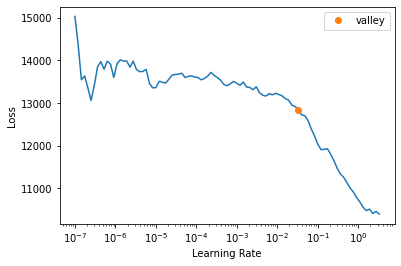

<Figure size 720x720 with 0 Axes>

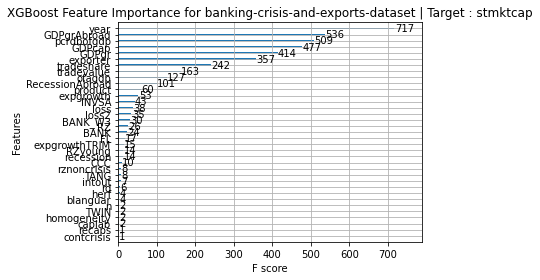

Target Variable: pcrdbofgdp
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup'

  2%|▏         | 1/42 [00:01<01:07,  1.64s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.857036285501802, 'Adjusted R-Squared': 0.8554823320833433, 'RMSE': 29.709336916006148, 'Time taken': 1.6381454467773438}


  5%|▍         | 2/42 [00:03<01:01,  1.53s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9999948545549524, 'Adjusted R-Squared': 0.9999947986262019, 'RMSE': 0.17823439623147952, 'Time taken': 1.4590024948120117}
{'Model': 'BayesianRidge', 'R-Squared': 0.6967902913092534, 'Adjusted R-Squared': 0.6934945336060931, 'RMSE': 43.2664834514486, 'Time taken': 0.06644272804260254}


 10%|▉         | 4/42 [00:03<00:26,  1.45it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9999967200672948, 'Adjusted R-Squared': 0.9999966844158523, 'RMSE': 0.14230249470757708, 'Time taken': 0.30007410049438477}
{'Model': 'DummyRegressor', 'R-Squared': -0.0008859938725902516, 'Adjusted R-Squared': -0.011765189458161851, 'RMSE': 78.6090147496466, 'Time taken': 0.03269147872924805}
{'Model': 'ElasticNet', 'R-Squared': 0.6059355100366757, 'Adjusted R-Squared': 0.6016522003631612, 'RMSE': 49.32461, 'Time taken': 0.05439281463623047}


 19%|█▉        | 8/42 [00:04<00:12,  2.76it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.6851746937547237, 'Adjusted R-Squared': 0.6817526795564055, 'RMSE': 44.08744, 'Time taken': 0.5492379665374756}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.999993156683615, 'Adjusted R-Squared': 0.9999930822997413, 'RMSE': 0.20554804791094466, 'Time taken': 0.16210675239562988}


 24%|██▍       | 10/42 [00:08<00:30,  1.04it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999996490350527, 'Adjusted R-Squared': 0.9999996452202163, 'RMSE': 0.046549167554318344, 'Time taken': 4.0963029861450195}
{'Model': 'GammaRegressor', 'R-Squared': 0.541624836725122, 'Adjusted R-Squared': 0.5366424979938733, 'RMSE': 53.19742193636303, 'Time taken': 0.1288900375366211}


 26%|██▌       | 11/42 [01:24<10:47, 20.88s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.15714652471773727, 'Adjusted R-Squared': 0.1479850738994518, 'RMSE': 72.13666961057068, 'Time taken': 76.44027018547058}


 29%|██▊       | 12/42 [01:25<07:37, 15.24s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5557879137295234, 'Adjusted R-Squared': 0.550959521487453, 'RMSE': 52.36911473575799, 'Time taken': 0.2765617370605469}


 31%|███       | 13/42 [01:32<06:16, 12.98s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9744014623877082, 'Adjusted R-Squared': 0.9741232174136616, 'RMSE': 12.57151520492511, 'Time taken': 7.200258731842041}


 33%|███▎      | 14/42 [01:33<04:29,  9.64s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999543478080357, 'Adjusted R-Squared': 0.9999538515885579, 'RMSE': 0.5308977252306198, 'Time taken': 1.3138539791107178}


 36%|███▌      | 15/42 [01:34<03:10,  7.04s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.6868423107727359, 'Adjusted R-Squared': 0.6834384228463526, 'RMSE': 43.970518514984896, 'Time taken': 0.6867289543151855}


 38%|███▊      | 16/42 [01:41<03:01,  6.98s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8594763157141329, 'Adjusted R-Squared': 0.8579488843631995, 'RMSE': 29.454714053950685, 'Time taken': 6.8257386684417725}


 40%|████      | 17/42 [01:57<04:03,  9.74s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.071400456758745, 'Adjusted R-Squared': -2.10478524433221, 'RMSE': 137.70454, 'Time taken': 16.347931385040283}
{'Model': 'Lars', 'R-Squared': 0.6966673217449215, 'Adjusted R-Squared': 0.693370227416062, 'RMSE': 43.27525612781136, 'Time taken': 0.07041454315185547}


 48%|████▊     | 20/42 [01:58<01:30,  4.09s/it]

{'Model': 'LarsCV', 'R-Squared': 0.6964987640194018, 'Adjusted R-Squared': 0.6931998375413518, 'RMSE': 43.287278185114154, 'Time taken': 0.4016866683959961}
{'Model': 'Lasso', 'R-Squared': 0.6882525729831849, 'Adjusted R-Squared': 0.6848640139938716, 'RMSE': 43.8714, 'Time taken': 0.10477447509765625}


 50%|█████     | 21/42 [01:58<01:06,  3.15s/it]

{'Model': 'LassoCV', 'R-Squared': 0.6967515668299524, 'Adjusted R-Squared': 0.6934553882085388, 'RMSE': 43.26925, 'Time taken': 0.4659898281097412}
{'Model': 'LassoLars', 'R-Squared': -0.0008859979419728603, 'Adjusted R-Squared': -0.011765193571776855, 'RMSE': 78.6090149094501, 'Time taken': 0.05755305290222168}


 60%|█████▉    | 25/42 [01:59<00:20,  1.20s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.6967411017378009, 'Adjusted R-Squared': 0.6934448093653857, 'RMSE': 43.269992859967836, 'Time taken': 0.29489660263061523}
{'Model': 'LassoLarsIC', 'R-Squared': 0.6963193214321023, 'Adjusted R-Squared': 0.6930184444911469, 'RMSE': 43.30007291621204, 'Time taken': 0.08510494232177734}
{'Model': 'LinearRegression', 'R-Squared': 0.6968247751194596, 'Adjusted R-Squared': 0.6935293922403233, 'RMSE': 43.264023, 'Time taken': 0.08767342567443848}


 62%|██████▏   | 26/42 [01:59<00:16,  1.05s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.6656087391684042, 'Adjusted R-Squared': 0.6619740515506695, 'RMSE': 45.436775833591575, 'Time taken': 0.4904327392578125}


 64%|██████▍   | 27/42 [02:25<01:42,  6.80s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9731774321723887, 'Adjusted R-Squared': 0.9728858825220886, 'RMSE': 12.868568042062215, 'Time taken': 25.70396852493286}


 67%|██████▋   | 28/42 [02:56<02:59, 12.85s/it]

{'Model': 'NuSVR', 'R-Squared': 0.674353447540351, 'Adjusted R-Squared': 0.6708138111005721, 'RMSE': 44.83872857873377, 'Time taken': 31.002983331680298}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6592023603554571, 'Adjusted R-Squared': 0.6554980381854076, 'RMSE': 45.86995733755759, 'Time taken': 0.0644383430480957}


 74%|███████▍  | 31/42 [02:56<01:04,  5.88s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6638824493124175, 'Adjusted R-Squared': 0.6602289976745089, 'RMSE': 45.553908190705855, 'Time taken': 0.272014856338501}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.5317374056278937, 'Adjusted R-Squared': 0.5266475948195013, 'RMSE': 53.768111202468994, 'Time taken': 0.19009184837341309}


 76%|███████▌  | 32/42 [02:57<00:45,  4.54s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.650439909800931, 'Adjusted R-Squared': 0.6466403436031151, 'RMSE': 46.45590965993495, 'Time taken': 0.4568455219268799}


 79%|███████▊  | 33/42 [02:57<00:31,  3.48s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.5507263609666087, 'Adjusted R-Squared': 0.5458429518466805, 'RMSE': 52.666626, 'Time taken': 0.4514350891113281}


 86%|████████▌ | 36/42 [03:11<00:21,  3.59s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999976062524708, 'Adjusted R-Squared': 0.999997580233476, 'RMSE': 0.12156798509476098, 'Time taken': 13.934215545654297}
{'Model': 'Ridge', 'R-Squared': 0.6968223390458768, 'Adjusted R-Squared': 0.6935269296876798, 'RMSE': 43.2642, 'Time taken': 0.060138702392578125}
{'Model': 'RidgeCV', 'R-Squared': 0.6968223200697783, 'Adjusted R-Squared': 0.6935269105053193, 'RMSE': 43.2641982204764, 'Time taken': 0.09896445274353027}


 88%|████████▊ | 37/42 [03:12<00:14,  2.80s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.695042313892348, 'Adjusted R-Squared': 0.6917275564346561, 'RMSE': 43.39101797074176, 'Time taken': 0.258685827255249}


 90%|█████████ | 38/42 [03:41<00:38,  9.52s/it]

{'Model': 'SVR', 'R-Squared': 0.6874262922123177, 'Adjusted R-Squared': 0.6840287519102777, 'RMSE': 43.92950092236224, 'Time taken': 29.298455715179443}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.6968247751194596, 'Adjusted R-Squared': 0.6935293922403233, 'RMSE': 43.264023, 'Time taken': 0.0827171802520752}


 95%|█████████▌| 40/42 [03:41<00:11,  5.59s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.5557879137295234, 'Adjusted R-Squared': 0.550959521487453, 'RMSE': 52.36911473575799, 'Time taken': 0.2533242702484131}


 98%|█████████▊| 41/42 [03:44<00:04,  4.81s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999975472721135, 'Adjusted R-Squared': 0.9999975206120278, 'RMSE': 0.12305655, 'Time taken': 2.2111024856567383}


100%|██████████| 42/42 [03:44<00:00,  5.35s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999473716943755, 'Adjusted R-Squared': 0.9999467996475753, 'RMSE': 0.5700195371242348, 'Time taken': 0.5044808387756348}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: pcrdbofgdp
pcrdbofgdp
Target Standard Deviation: 78.46868367756556
                               Adjusted R-Squared  R-Squared   RMSE  \
Model                                                                 
ExtraTreesRegressor                          1.00       1.00   0.05   
RandomForestRegressor                        1.00       1.00   0.12   
XGBRegressor                                 1.00       1.00   0.12   
DecisionTreeRegressor                        1.00       1.00   0.14   
BaggingRegressor                             1.00       1.00   0.18   
ExtraTreeRegressor                           1.00       1.00   0.21   
HistGradientBoostingRegressor                1.00       1.00   0.53   
LGBMRegressor                              

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,4869.329590,5495.846191,74.133972,00:17
1,2654.244629,3267.294189,57.160252,00:17
2,983.386108,2611.922852,51.106979,00:16
3,656.523315,378.568298,19.456835,00:22
4,373.257172,511.291748,22.611763,00:17


Better model found at epoch 0 with _rmse value: 74.13397216796875.
Better model found at epoch 1 with _rmse value: 57.16025161743164.
Better model found at epoch 2 with _rmse value: 51.10697937011719.
Better model found at epoch 3 with _rmse value: 19.45683479309082.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      55      55.00
1     173     172.87
2     216     216.06
3     192     192.18
4     146     146.02
XGBoost RMSE:  0.12305969


<Figure size 432x288 with 0 Axes>

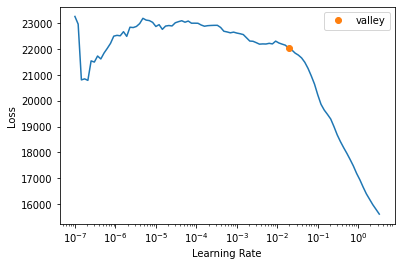

<Figure size 720x720 with 0 Axes>

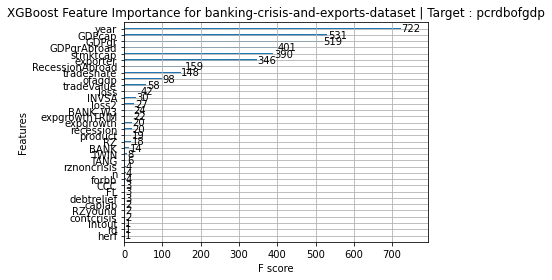

Target Variable: ofagdp
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'f

  2%|▏         | 1/42 [00:03<02:12,  3.23s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7514906112659743, 'Adjusted R-Squared': 0.7487894222579957, 'RMSE': 7.744363917497551, 'Time taken': 3.2316396236419678}


  7%|▋         | 3/42 [00:04<00:39,  1.01s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9999999792823114, 'Adjusted R-Squared': 0.9999999790571191, 'RMSE': 0.0022360679774998215, 'Time taken': 0.7496023178100586}
{'Model': 'BayesianRidge', 'R-Squared': 0.44400458082571115, 'Adjusted R-Squared': 0.4379611523564254, 'RMSE': 11.583770883969953, 'Time taken': 0.10432291030883789}


 10%|▉         | 4/42 [00:04<00:26,  1.44it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.20962214469909668}
{'Model': 'DummyRegressor', 'R-Squared': -0.0006667004613603034, 'Adjusted R-Squared': -0.011543512422896862, 'RMSE': 15.540288469109091, 'Time taken': 0.03317570686340332}
{'Model': 'ElasticNet', 'R-Squared': 0.26016601244961235, 'Adjusted R-Squared': 0.25212433867189066, 'RMSE': 13.3623085, 'Time taken': 0.05296826362609863}


 19%|█▉        | 8/42 [00:05<00:11,  3.06it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.44290821809119796, 'Adjusted R-Squared': 0.4368528726356675, 'RMSE': 11.595186, 'Time taken': 0.5164108276367188}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12888717651367188}


 24%|██▍       | 10/42 [00:07<00:20,  1.55it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999988669496138, 'Adjusted R-Squared': 0.9999988546338487, 'RMSE': 0.016536323654307156, 'Time taken': 2.3350021839141846}
{'Model': 'GammaRegressor', 'R-Squared': 0.19114431395222065, 'Adjusted R-Squared': 0.18235240432126654, 'RMSE': 13.971720003247093, 'Time taken': 0.13847112655639648}


 29%|██▊       | 12/42 [01:24<07:42, 15.42s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.4376755318859096, 'Adjusted R-Squared': 0.4315633094064085, 'RMSE': 11.64951494439362, 'Time taken': 76.76309108734131}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.23876767612099148, 'Adjusted R-Squared': 0.23049341173100224, 'RMSE': 13.554171077713983, 'Time taken': 0.192094087600708}


 31%|███       | 13/42 [01:31<06:20, 13.11s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9904489760368085, 'Adjusted R-Squared': 0.9903451605589477, 'RMSE': 1.518236120737209, 'Time taken': 7.3213210105896}


 33%|███▎      | 14/42 [01:33<04:30,  9.67s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999785429957, 'Adjusted R-Squared': 0.9999999783097674, 'RMSE': 0.0022756155698358273, 'Time taken': 1.2390553951263428}


 36%|███▌      | 15/42 [01:34<03:12,  7.15s/it]

{'Model': 'HuberRegressor', 'R-Squared': -0.03802331063590714, 'Adjusted R-Squared': -0.04930617270803661, 'RMSE': 15.827703480517085, 'Time taken': 1.0364301204681396}


 38%|███▊      | 16/42 [01:40<02:56,  6.79s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7281852522961951, 'Adjusted R-Squared': 0.7252307441689798, 'RMSE': 8.09936293791061, 'Time taken': 5.947584629058838}


 40%|████      | 17/42 [01:56<04:01,  9.64s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.18337509275781783, 'Adjusted R-Squared': 0.1744987350704028, 'RMSE': 14.038661, 'Time taken': 16.410775661468506}
{'Model': 'Lars', 'R-Squared': 0.3576965500031857, 'Adjusted R-Squared': 0.35071499076408985, 'RMSE': 12.450433690810923, 'Time taken': 0.07255935668945312}


 45%|████▌     | 19/42 [01:56<02:02,  5.32s/it]

{'Model': 'LarsCV', 'R-Squared': 0.41355548688152455, 'Adjusted R-Squared': 0.40718108999980196, 'RMSE': 11.896735771093931, 'Time taken': 0.3479022979736328}
{'Model': 'Lasso', 'R-Squared': 0.3184489047474329, 'Adjusted R-Squared': 0.31104074066860066, 'RMSE': 12.825183, 'Time taken': 0.07912778854370117}


 52%|█████▏    | 22/42 [01:57<00:52,  2.62s/it]

{'Model': 'LassoCV', 'R-Squared': 0.44370569127089643, 'Adjusted R-Squared': 0.43765901400210183, 'RMSE': 11.586884, 'Time taken': 0.4946715831756592}
{'Model': 'LassoLars', 'R-Squared': -0.0006666997639250827, 'Adjusted R-Squared': -0.011543511717880817, 'RMSE': 15.54028846369353, 'Time taken': 0.10369443893432617}


 60%|█████▉    | 25/42 [01:57<00:21,  1.26s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.4435684527727657, 'Adjusted R-Squared': 0.43752028378116525, 'RMSE': 11.588313202975646, 'Time taken': 0.27549195289611816}
{'Model': 'LassoLarsIC', 'R-Squared': 0.44376097022235506, 'Adjusted R-Squared': 0.43771489381172846, 'RMSE': 11.586308333268946, 'Time taken': 0.0805659294128418}
{'Model': 'LinearRegression', 'R-Squared': 0.44421595841548456, 'Adjusted R-Squared': 0.4381748275286963, 'RMSE': 11.581569, 'Time taken': 0.07822251319885254}


 62%|██████▏   | 26/42 [01:58<00:17,  1.11s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.20325948355608459, 'Adjusted R-Squared': -0.21633839098604213, 'RMSE': 17.040957719349727, 'Time taken': 0.610327959060669}


 64%|██████▍   | 27/42 [02:23<01:43,  6.91s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9777219184532825, 'Adjusted R-Squared': 0.9774797653929921, 'RMSE': 2.318746369225419, 'Time taken': 24.967782974243164}


 67%|██████▋   | 28/42 [02:56<03:11, 13.71s/it]

{'Model': 'NuSVR', 'R-Squared': 0.412554561074848, 'Adjusted R-Squared': 0.40616928456479195, 'RMSE': 11.906883937686471, 'Time taken': 33.273112773895264}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.3301185480919975, 'Adjusted R-Squared': 0.32283722796256265, 'RMSE': 12.714911121057144, 'Time taken': 0.06461286544799805}


 71%|███████▏  | 30/42 [02:57<01:35,  7.96s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.366172327799151, 'Adjusted R-Squared': 0.35928289657957646, 'RMSE': 12.368013491266682, 'Time taken': 0.24256563186645508}


 74%|███████▍  | 31/42 [02:57<01:07,  6.17s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.024911450125318813, 'Adjusted R-Squared': 0.014312661539724436, 'RMSE': 15.340389285269264, 'Time taken': 0.23279023170471191}


 76%|███████▌  | 32/42 [02:57<00:46,  4.69s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.46255112665330234, 'Adjusted R-Squared': 0.45670929107344693, 'RMSE': 11.388930184429285, 'Time taken': 0.24953532218933105}


 79%|███████▊  | 33/42 [02:57<00:31,  3.54s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [03:05<00:15,  2.54s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999999683019365, 'Adjusted R-Squared': 0.9999999679573923, 'RMSE': 0.002765863337187894, 'Time taken': 6.922830820083618}
{'Model': 'Ridge', 'R-Squared': 0.4441882515640023, 'Adjusted R-Squared': 0.43814681951578494, 'RMSE': 11.581858, 'Time taken': 0.04028606414794922}
{'Model': 'RidgeCV', 'R-Squared': 0.4440695794401519, 'Adjusted R-Squared': 0.4380268574775449, 'RMSE': 11.583093764125024, 'Time taken': 0.09085869789123535}


 88%|████████▊ | 37/42 [03:05<00:09,  2.00s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.44160477818675714, 'Adjusted R-Squared': 0.43553526490617833, 'RMSE': 11.608743060982588, 'Time taken': 0.25330519676208496}


 90%|█████████ | 38/42 [03:33<00:34,  8.70s/it]

{'Model': 'SVR', 'R-Squared': 0.3462087350898464, 'Adjusted R-Squared': 0.33910230829734467, 'RMSE': 12.561280368082912, 'Time taken': 28.37332057952881}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.44421595841548456, 'Adjusted R-Squared': 0.4381748275286963, 'RMSE': 11.581569, 'Time taken': 0.05406999588012695}


 95%|█████████▌| 40/42 [03:33<00:10,  5.09s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.23876767612099148, 'Adjusted R-Squared': 0.23049341173100224, 'RMSE': 13.554171077713983, 'Time taken': 0.1958315372467041}


 98%|█████████▊| 41/42 [03:37<00:04,  4.64s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999982561193, 'Adjusted R-Squared': 0.9999999982371641, 'RMSE': 0.00064874307, 'Time taken': 3.116547107696533}


100%|██████████| 42/42 [03:37<00:00,  5.18s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999920634333, 'Adjusted R-Squared': 0.9999999919771663, 'RMSE': 0.001383982782255808, 'Time taken': 0.47707676887512207}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: ofagdp
ofagdp
Target Standard Deviation: 14.93835027653238
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.21
ExtraTreeRegressor                           1.00       1.00  0.00        0.13
XGBRegressor                                 1.00       1.00  0.00        3.12
LGBMRegressor                                1.00       1.00  0.00        0.48
BaggingRegressor                             1.00       1.00  0.00        0.75
HistGradientBoostingRegressor                1.00       1.00  0.00        1.24
RandomForestRegressor                        1.00      

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,164.059006,189.181305,13.754319,00:17
1,73.243958,44.417622,6.664655,00:17
2,32.005470,131.674988,11.474972,00:17


Better model found at epoch 0 with _rmse value: 13.754319190979004.
Better model found at epoch 1 with _rmse value: 6.6646552085876465.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      11      11.00
1      13      13.01
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  0.00064874307


<Figure size 432x288 with 0 Axes>

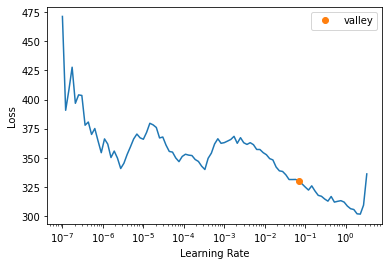

<Figure size 720x720 with 0 Axes>

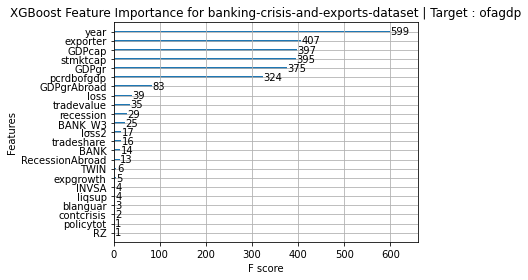

Target Variable: TANG
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'for

  2%|▏         | 1/42 [00:03<02:32,  3.71s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9687309868454997, 'Adjusted R-Squared': 0.9683911062677334, 'RMSE': 1.0852974608013086, 'Time taken': 3.7147867679595947}


  5%|▍         | 2/42 [00:04<01:21,  2.03s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.8431329727172852}
{'Model': 'BayesianRidge', 'R-Squared': 0.8555584860304285, 'Adjusted R-Squared': 0.8539884695742375, 'RMSE': 2.332586271545247, 'Time taken': 0.0950160026550293}


 10%|▉         | 4/42 [00:04<00:32,  1.17it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.22797012329101562}
{'Model': 'DummyRegressor', 'R-Squared': -0.0022635094096483677, 'Adjusted R-Squared': -0.013157677990188077, 'RMSE': 6.144444965780067, 'Time taken': 0.032295942306518555}
{'Model': 'ElasticNet', 'R-Squared': 0.6532190202778685, 'Adjusted R-Squared': 0.649449661802628, 'RMSE': 3.6142595, 'Time taken': 0.04944443702697754}


 19%|█▉        | 8/42 [00:05<00:13,  2.48it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8554687711303584, 'Adjusted R-Squared': 0.85389777951221, 'RMSE': 2.3333106, 'Time taken': 0.5312573909759521}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.10657310485839844}


 24%|██▍       | 10/42 [00:08<00:24,  1.33it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.797828197479248}
{'Model': 'GammaRegressor', 'R-Squared': 0.6345577893048433, 'Adjusted R-Squared': 0.6305855913625047, 'RMSE': 3.710231891041728, 'Time taken': 0.12026286125183105}


 29%|██▊       | 12/42 [01:29<07:57, 15.91s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.5651811673955391, 'Adjusted R-Squared': -0.5821940061715778, 'RMSE': 7.678457878111248, 'Time taken': 80.64431071281433}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6528967885056809, 'Adjusted R-Squared': 0.6491239275111774, 'RMSE': 3.615938332700499, 'Time taken': 0.18980145454406738}


 31%|███       | 13/42 [01:36<06:30, 13.47s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.999680530577348, 'Adjusted R-Squared': 0.9996770580836235, 'RMSE': 0.10969992932426427, 'Time taken': 7.2277069091796875}


 33%|███▎      | 14/42 [01:38<04:40, 10.02s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992860497, 'Adjusted R-Squared': 0.9999999992782893, 'RMSE': 0.000163993154093609, 'Time taken': 1.4322834014892578}


 36%|███▌      | 15/42 [01:39<03:21,  7.45s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.8261356009059533, 'Adjusted R-Squared': 0.824245770481018, 'RMSE': 2.559157597089943, 'Time taken': 1.150820255279541}


 38%|███▊      | 16/42 [01:45<03:02,  7.02s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9563566162804764, 'Adjusted R-Squared': 0.9558822316748294, 'RMSE': 1.2821856339859685, 'Time taken': 5.993775844573975}


 43%|████▎     | 18/42 [02:08<03:18,  8.26s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.50945295491133, 'Adjusted R-Squared': -3.5584687478994965, 'RMSE': 13.0332775, 'Time taken': 22.849717378616333}
{'Model': 'Lars', 'R-Squared': 0.6335223688706939, 'Adjusted R-Squared': 0.6295389163584189, 'RMSE': 3.7154843392816375, 'Time taken': 0.09888482093811035}


 45%|████▌     | 19/42 [02:08<02:15,  5.89s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8025682180936033, 'Adjusted R-Squared': 0.800422220464186, 'RMSE': 2.7270947791350513, 'Time taken': 0.2917592525482178}
{'Model': 'Lasso', 'R-Squared': 0.6878211998278221, 'Adjusted R-Squared': 0.6844279519998636, 'RMSE': 3.4292047, 'Time taken': 0.07814526557922363}


 52%|█████▏    | 22/42 [02:09<00:50,  2.53s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8556338986496277, 'Adjusted R-Squared': 0.8540647018958193, 'RMSE': 2.3319774, 'Time taken': 0.5317206382751465}
{'Model': 'LassoLars', 'R-Squared': -0.002263514495787211, 'Adjusted R-Squared': -0.013157683131611142, 'RMSE': 6.144444981370528, 'Time taken': 0.11146044731140137}


 60%|█████▉    | 25/42 [02:09<00:19,  1.14s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8556353539856983, 'Adjusted R-Squared': 0.8540661730507603, 'RMSE': 2.331965518572514, 'Time taken': 0.2671473026275635}
{'Model': 'LassoLarsIC', 'R-Squared': 0.855202228535002, 'Adjusted R-Squared': 0.8536283397147303, 'RMSE': 2.335461101452743, 'Time taken': 0.08198857307434082}
{'Model': 'LinearRegression', 'R-Squared': 0.8555522848461549, 'Adjusted R-Squared': 0.8539822009857869, 'RMSE': 2.3326364, 'Time taken': 0.06297469139099121}


 62%|██████▏   | 26/42 [02:12<00:25,  1.58s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7931275764477319, 'Adjusted R-Squared': 0.7908789631482507, 'RMSE': 2.791534505879418, 'Time taken': 2.997542381286621}


 64%|██████▍   | 27/42 [02:31<01:28,  5.91s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9995319884315692, 'Adjusted R-Squared': 0.9995269013493037, 'RMSE': 0.1327761260968113, 'Time taken': 18.86073112487793}


 67%|██████▋   | 28/42 [03:09<03:22, 14.48s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9668966297197524, 'Adjusted R-Squared': 0.9665368104775758, 'RMSE': 1.116677602003134, 'Time taken': 38.46808362007141}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7659496509963295, 'Adjusted R-Squared': 0.763405625463681, 'RMSE': 2.9692471333606063, 'Time taken': 0.06446504592895508}


 74%|███████▍  | 31/42 [03:10<01:10,  6.41s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.8047274189504681, 'Adjusted R-Squared': 0.8026048908955818, 'RMSE': 2.7121414282805048, 'Time taken': 0.232025146484375}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6888311196169333, 'Adjusted R-Squared': 0.6854488491779869, 'RMSE': 3.423653292255052, 'Time taken': 0.17418432235717773}


 76%|███████▌  | 32/42 [03:10<00:48,  4.87s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7783274942346494, 'Adjusted R-Squared': 0.7759180104763304, 'RMSE': 2.8896657774680645, 'Time taken': 0.2727396488189697}


 79%|███████▊  | 33/42 [03:11<00:33,  3.68s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7619887707656032, 'Adjusted R-Squared': 0.7594016921869684, 'RMSE': 2.9942663, 'Time taken': 0.3731057643890381}


 86%|████████▌ | 36/42 [03:19<00:16,  2.76s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 7.950577020645142}
{'Model': 'Ridge', 'R-Squared': 0.855553839896169, 'Adjusted R-Squared': 0.8539837729385186, 'RMSE': 2.3326237, 'Time taken': 0.05732083320617676}
{'Model': 'RidgeCV', 'R-Squared': 0.8555537530648478, 'Adjusted R-Squared': 0.8539836851633787, 'RMSE': 2.3326244875670707, 'Time taken': 0.11414980888366699}


 88%|████████▊ | 37/42 [03:19<00:10,  2.15s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8549357633031169, 'Adjusted R-Squared': 0.8533589781216291, 'RMSE': 2.3376090389999282, 'Time taken': 0.18560552597045898}


 90%|█████████ | 38/42 [03:42<00:29,  7.40s/it]

{'Model': 'SVR', 'R-Squared': 0.9669815692391223, 'Adjusted R-Squared': 0.966622673252591, 'RMSE': 1.115244047355557, 'Time taken': 22.81740403175354}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8555522848461549, 'Adjusted R-Squared': 0.8539822009857869, 'RMSE': 2.3326364, 'Time taken': 0.05654549598693848}


 95%|█████████▌| 40/42 [03:42<00:08,  4.35s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.6528967885056809, 'Adjusted R-Squared': 0.6491239275111774, 'RMSE': 3.615938332700499, 'Time taken': 0.21332263946533203}


 98%|█████████▊| 41/42 [03:43<00:03,  3.61s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999898211, 'Adjusted R-Squared': 0.9999999999897105, 'RMSE': 1.9581295e-05, 'Time taken': 1.1803407669067383}


100%|██████████| 42/42 [03:44<00:00,  5.34s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992861067, 'Adjusted R-Squared': 0.999999999278347, 'RMSE': 0.00016398660029698828, 'Time taken': 0.5927071571350098}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: TANG
TANG
Target Standard Deviation: 6.194909195258636
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.23
RandomForestRegressor                        1.00       1.00  0.00        7.95
BaggingRegressor                             1.00       1.00  0.00        0.84
ExtraTreeRegressor                           1.00       1.00  0.00        0.11
ExtraTreesRegressor                          1.00       1.00  0.00        2.80
XGBRegressor                                 1.00       1.00  0.00        1.18
LGBMRegressor                                1.00       1.0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,35.508331,34.685764,5.889462,00:17
1,9.970964,4.532466,2.128959,00:17
2,4.487883,2.058640,1.434796,00:16
3,4.731172,16.589155,4.072978,00:17


Better model found at epoch 0 with _rmse value: 5.889461994171143.
Better model found at epoch 1 with _rmse value: 2.1289587020874023.
Better model found at epoch 2 with _rmse value: 1.43479585647583.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       7       7.00
2      17      17.00
3      17      17.00
4      16      16.00
XGBoost RMSE:  1.9581295e-05


<Figure size 432x288 with 0 Axes>

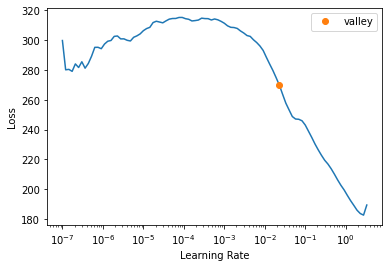

<Figure size 720x720 with 0 Axes>

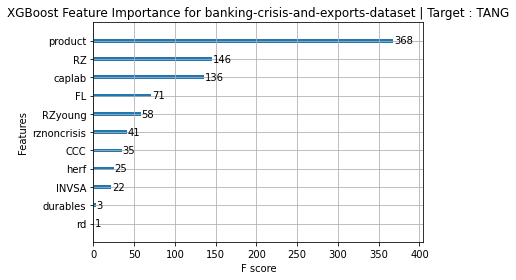

Target Variable: FL
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba

  2%|▏         | 1/42 [00:03<02:16,  3.33s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9513416886459928, 'Adjusted R-Squared': 0.9508127939573623, 'RMSE': 1.910332388875703, 'Time taken': 3.326688766479492}


  5%|▍         | 2/42 [00:04<01:16,  1.92s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9368598461151123}
{'Model': 'BayesianRidge', 'R-Squared': 0.7451087852967597, 'Adjusted R-Squared': 0.7423382286152027, 'RMSE': 4.372278889418282, 'Time taken': 0.07884478569030762}


 10%|▉         | 4/42 [00:04<00:30,  1.23it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.21993231773376465}
{'Model': 'DummyRegressor', 'R-Squared': -8.883529391123801e-05, 'Adjusted R-Squared': -0.010959366112323288, 'RMSE': 8.660634525866163, 'Time taken': 0.03172898292541504}
{'Model': 'ElasticNet', 'R-Squared': 0.5163264854324944, 'Adjusted R-Squared': 0.511069164621978, 'RMSE': 6.022913, 'Time taken': 0.06002235412597656}


 17%|█▋        | 7/42 [00:05<00:16,  2.15it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7452926246678915, 'Adjusted R-Squared': 0.7425240662403685, 'RMSE': 4.370702, 'Time taken': 0.526728630065918}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09052205085754395}


 24%|██▍       | 10/42 [00:08<00:21,  1.49it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.7758936882019043}
{'Model': 'GammaRegressor', 'R-Squared': 0.49758449165213126, 'Adjusted R-Squared': 0.4921234535179153, 'RMSE': 6.138495485586813, 'Time taken': 0.11842608451843262}


 29%|██▊       | 12/42 [01:35<07:34, 15.15s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.19805524052753953, 'Adjusted R-Squared': -0.2110775800984912, 'RMSE': 9.479137960810274, 'Time taken': 86.91361737251282}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.5070761374617895, 'Adjusted R-Squared': 0.501718269390722, 'RMSE': 6.080234705717923, 'Time taken': 0.13791966438293457}


 31%|███       | 13/42 [01:42<06:20, 13.11s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9992596425073019, 'Adjusted R-Squared': 0.9992515951432509, 'RMSE': 0.23564116461587264, 'Time taken': 7.198970317840576}


 33%|███▎      | 14/42 [01:43<04:38,  9.95s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992592766, 'Adjusted R-Squared': 0.9999999992512253, 'RMSE': 0.0002356993809883176, 'Time taken': 1.333425521850586}


 36%|███▌      | 15/42 [01:44<03:22,  7.49s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.6949471442901322, 'Adjusted R-Squared': 0.6916313523802422, 'RMSE': 4.7831937173996275, 'Time taken': 1.0968983173370361}


 38%|███▊      | 16/42 [01:51<03:07,  7.19s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.917017520060211, 'Adjusted R-Squared': 0.9161155365826046, 'RMSE': 2.494730446360889, 'Time taken': 6.42885422706604}


 40%|████      | 17/42 [02:13<04:44, 11.38s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.983283092371591, 'Adjusted R-Squared': -3.026579647723456, 'RMSE': 17.28427, 'Time taken': 21.724241971969604}
{'Model': 'Lars', 'R-Squared': 0.7450878059841228, 'Adjusted R-Squared': 0.742317021266559, 'RMSE': 4.372458820135962, 'Time taken': 0.0722651481628418}


 45%|████▌     | 19/42 [02:13<02:25,  6.34s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7455122133110572, 'Adjusted R-Squared': 0.7427460417166122, 'RMSE': 4.368817416066746, 'Time taken': 0.3602633476257324}
{'Model': 'Lasso', 'R-Squared': 0.5467404272834406, 'Adjusted R-Squared': 0.5418136927973911, 'RMSE': 5.830475, 'Time taken': 0.09561324119567871}


 52%|█████▏    | 22/42 [02:14<01:02,  3.13s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7454932626976221, 'Adjusted R-Squared': 0.7427268851182484, 'RMSE': 4.3689804, 'Time taken': 0.5281453132629395}
{'Model': 'LassoLars', 'R-Squared': -8.883712065377303e-05, 'Adjusted R-Squared': -0.010959367958921717, 'RMSE': 8.660634533775834, 'Time taken': 0.10810136795043945}


 60%|█████▉    | 25/42 [02:14<00:25,  1.49s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7455122133110572, 'Adjusted R-Squared': 0.7427460417166122, 'RMSE': 4.368817416066746, 'Time taken': 0.2648944854736328}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7455468153061211, 'Adjusted R-Squared': 0.7427810198203181, 'RMSE': 4.368520398006438, 'Time taken': 0.0822763442993164}
{'Model': 'LinearRegression', 'R-Squared': 0.7450881467235999, 'Adjusted R-Squared': 0.742317365709726, 'RMSE': 4.372456, 'Time taken': 0.08533310890197754}


 62%|██████▏   | 26/42 [02:17<00:28,  1.81s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.6284585855769165, 'Adjusted R-Squared': 0.624420091941883, 'RMSE': 5.278785773060323, 'Time taken': 2.9107227325439453}


 64%|██████▍   | 27/42 [02:42<01:51,  7.42s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9988571673283462, 'Adjusted R-Squared': 0.9988447452340891, 'RMSE': 0.2927667464115027, 'Time taken': 24.902872562408447}


 67%|██████▋   | 28/42 [03:16<03:20, 14.32s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9036644967383228, 'Adjusted R-Squared': 0.9026173717028698, 'RMSE': 2.6879649894270714, 'Time taken': 34.229416608810425}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.6233498825314512, 'Adjusted R-Squared': 0.6192558595154887, 'RMSE': 5.314953583726783, 'Time taken': 0.06364750862121582}


 74%|███████▍  | 31/42 [03:17<01:10,  6.44s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.6371085491162667, 'Adjusted R-Squared': 0.6331640768240522, 'RMSE': 5.21697542618064, 'Time taken': 0.2977335453033447}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.4264031013056898, 'Adjusted R-Squared': 0.4201683524068386, 'RMSE': 6.558942442169876, 'Time taken': 0.19164156913757324}


 76%|███████▌  | 32/42 [03:17<00:49,  4.91s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.6721823634793849, 'Adjusted R-Squared': 0.668619128299813, 'RMSE': 4.958457326046267, 'Time taken': 0.28852248191833496}


 79%|███████▊  | 33/42 [03:17<00:33,  3.72s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.4683420174524163, 'Adjusted R-Squared': 0.46256312633776864, 'RMSE': 6.314611, 'Time taken': 0.39128708839416504}


 81%|████████  | 34/42 [03:27<00:41,  5.19s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 9.101136684417725}
{'Model': 'Ridge', 'R-Squared': 0.7450913825015508, 'Adjusted R-Squared': 0.7423206366591764, 'RMSE': 4.372428, 'Time taken': 0.057964324951171875}


 86%|████████▌ | 36/42 [03:27<00:17,  2.96s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.7450913815388065, 'Adjusted R-Squared': 0.7423206356859674, 'RMSE': 4.372428154634656, 'Time taken': 0.14647793769836426}


 88%|████████▊ | 37/42 [03:27<00:11,  2.31s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.7438066190416737, 'Adjusted R-Squared': 0.7410219083790832, 'RMSE': 4.383433022404096, 'Time taken': 0.2265763282775879}


 90%|█████████ | 38/42 [03:54<00:34,  8.57s/it]

{'Model': 'SVR', 'R-Squared': 0.902080127095248, 'Adjusted R-Squared': 0.9010157806506311, 'RMSE': 2.7099784857348195, 'Time taken': 26.929983139038086}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7450881467235999, 'Adjusted R-Squared': 0.742317365709726, 'RMSE': 4.372456, 'Time taken': 0.06423091888427734}


 95%|█████████▌| 40/42 [03:54<00:10,  5.03s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.5070761374617895, 'Adjusted R-Squared': 0.501718269390722, 'RMSE': 6.080234705717923, 'Time taken': 0.2508385181427002}


 98%|█████████▊| 41/42 [03:56<00:04,  4.17s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999999988127, 'Adjusted R-Squared': 0.999999999987998, 'RMSE': 2.9840816e-05, 'Time taken': 1.2869455814361572}


100%|██████████| 42/42 [03:56<00:00,  5.63s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.999999999261491, 'Adjusted R-Squared': 0.9999999992534637, 'RMSE': 0.0002353468175142836, 'Time taken': 0.5760321617126465}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: FL
FL
Target Standard Deviation: 8.67014973829028
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.22
RandomForestRegressor                        1.00       1.00  0.00        9.10
BaggingRegressor                             1.00       1.00  0.00        0.94
ExtraTreeRegressor                           1.00       1.00  0.00        0.09
ExtraTreesRegressor                          1.00       1.00  0.00        2.78
XGBRegressor                                 1.00       1.00  0.00        1.29
LGBMRegressor                                1.00       1.00  0.0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,66.793732,69.059715,8.310217,00:17
1,13.192361,8.467199,2.909845,00:17
2,8.873837,7.930646,2.816140,00:17
3,3.467449,6.672914,2.583199,00:17
4,6.867199,12.225401,3.496484,00:17


Better model found at epoch 0 with _rmse value: 8.310216903686523.
Better model found at epoch 1 with _rmse value: 2.9098453521728516.
Better model found at epoch 2 with _rmse value: 2.8161404132843018.
Better model found at epoch 3 with _rmse value: 2.5831985473632812.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      23      23.00
1      28      28.00
2      21      21.00
3      23      23.00
4      28      28.00
XGBoost RMSE:  2.9840816e-05


<Figure size 432x288 with 0 Axes>

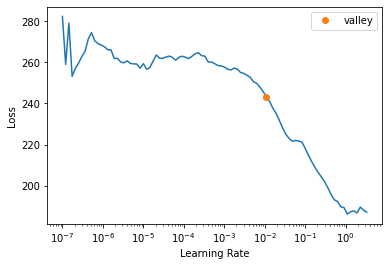

<Figure size 720x720 with 0 Axes>

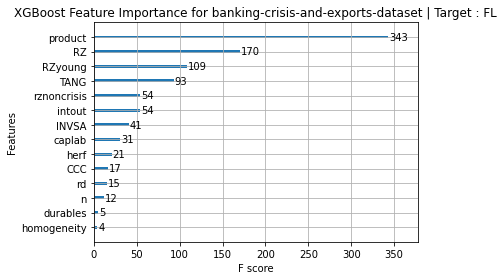

Target Variable: RZ
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba

  2%|▏         | 1/42 [00:03<02:34,  3.76s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9506297694450863, 'Adjusted R-Squared': 0.950093136504272, 'RMSE': 2.0739481062030203, 'Time taken': 3.761617660522461}


  7%|▋         | 3/42 [00:04<00:46,  1.20s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9519548416137695}
{'Model': 'BayesianRidge', 'R-Squared': 0.8097792379331002, 'Adjusted R-Squared': 0.8077116209541122, 'RMSE': 4.070935920519813, 'Time taken': 0.1125330924987793}


 10%|▉         | 4/42 [00:05<00:31,  1.21it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.24771523475646973}
{'Model': 'DummyRegressor', 'R-Squared': -0.0003005339366333182, 'Adjusted R-Squared': -0.011173365827249038, 'RMSE': 9.33534898772704, 'Time taken': 0.03370332717895508}
{'Model': 'ElasticNet', 'R-Squared': 0.7476846195832476, 'Adjusted R-Squared': 0.7449420611004568, 'RMSE': 4.688535, 'Time taken': 0.05387377738952637}


 19%|█▉        | 8/42 [00:05<00:12,  2.72it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8094930998518457, 'Adjusted R-Squared': 0.8074223726763223, 'RMSE': 4.0739965, 'Time taken': 0.5310907363891602}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.133772611618042}


 24%|██▍       | 10/42 [00:08<00:23,  1.37it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 2.6818501949310303}
{'Model': 'GammaRegressor', 'R-Squared': 0.7254489200079074, 'Adjusted R-Squared': 0.7224646691384281, 'RMSE': 4.8907660173165866, 'Time taken': 0.13980603218078613}


 29%|██▊       | 12/42 [01:31<08:15, 16.53s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.26343928795120286, 'Adjusted R-Squared': -0.27717232368980294, 'RMSE': 10.491618651729713, 'Time taken': 82.19420456886292}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.7370902513102275, 'Adjusted R-Squared': 0.7342325366505561, 'RMSE': 4.785955461671514, 'Time taken': 0.17599916458129883}


 31%|███       | 13/42 [01:38<06:42, 13.86s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9998832325859822, 'Adjusted R-Squared': 0.9998819633749603, 'RMSE': 0.10086166632864578, 'Time taken': 7.201484680175781}


 33%|███▎      | 14/42 [01:39<04:46, 10.23s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999992721873, 'Adjusted R-Squared': 0.9999999992642763, 'RMSE': 0.0002518112484769237, 'Time taken': 1.316267728805542}


 36%|███▌      | 15/42 [01:40<03:24,  7.58s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.754785333026134, 'Adjusted R-Squared': 0.7521199562112006, 'RMSE': 4.622091399783011, 'Time taken': 1.1795752048492432}


 38%|███▊      | 16/42 [01:46<03:05,  7.12s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9513619649762936, 'Adjusted R-Squared': 0.9508332906825576, 'RMSE': 2.05851159821848, 'Time taken': 6.0176897048950195}


 40%|████      | 17/42 [02:09<04:50, 11.62s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.14571829441644, 'Adjusted R-Squared': -3.190780449790532, 'RMSE': 19.004883, 'Time taken': 22.295554637908936}
{'Model': 'Lars', 'R-Squared': 0.8097734187072081, 'Adjusted R-Squared': 0.8077057384757647, 'RMSE': 4.070998188997451, 'Time taken': 0.07395625114440918}


 45%|████▌     | 19/42 [02:09<02:26,  6.38s/it]

{'Model': 'LarsCV', 'R-Squared': 0.809788291943143, 'Adjusted R-Squared': 0.8077207733773075, 'RMSE': 4.07083903642339, 'Time taken': 0.30898118019104004}
{'Model': 'Lasso', 'R-Squared': 0.7603971799448618, 'Adjusted R-Squared': 0.7577928014660016, 'RMSE': 4.5688963, 'Time taken': 0.09756922721862793}


 52%|█████▏    | 22/42 [02:10<01:02,  3.13s/it]

{'Model': 'LassoCV', 'R-Squared': 0.809791864349312, 'Adjusted R-Squared': 0.8077243846139784, 'RMSE': 4.070801, 'Time taken': 0.5259749889373779}
{'Model': 'LassoLars', 'R-Squared': -0.0003005339366333182, 'Adjusted R-Squared': -0.011173365827249038, 'RMSE': 9.33534898772704, 'Time taken': 0.10783123970031738}


 60%|█████▉    | 25/42 [02:10<00:25,  1.49s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.809788291943143, 'Adjusted R-Squared': 0.8077207733773075, 'RMSE': 4.07083903642339, 'Time taken': 0.32120800018310547}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8096223923112644, 'Adjusted R-Squared': 0.8075530704885607, 'RMSE': 4.072613910092104, 'Time taken': 0.08154129981994629}
{'Model': 'LinearRegression', 'R-Squared': 0.8097851962894771, 'Adjusted R-Squared': 0.8077176440752323, 'RMSE': 4.0708723, 'Time taken': 0.06421613693237305}


 62%|██████▏   | 26/42 [02:13<00:27,  1.74s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.6866020655011653, 'Adjusted R-Squared': 0.6831955662131345, 'RMSE': 5.225325784022331, 'Time taken': 2.5846610069274902}


 64%|██████▍   | 27/42 [02:36<01:44,  7.00s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.999744712502492, 'Adjusted R-Squared': 0.9997419376383886, 'RMSE': 0.14913517246013583, 'Time taken': 23.37399983406067}


 67%|██████▋   | 28/42 [03:11<03:18, 14.20s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9368621396911379, 'Adjusted R-Squared': 0.9361758586008241, 'RMSE': 2.3453639080619664, 'Time taken': 34.94336748123169}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7758793784681949, 'Adjusted R-Squared': 0.7734432847558926, 'RMSE': 4.418819041591644, 'Time taken': 0.048444509506225586}


 74%|███████▍  | 31/42 [03:11<01:09,  6.35s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7794400693329282, 'Adjusted R-Squared': 0.7770426787821991, 'RMSE': 4.3835767619551245, 'Time taken': 0.1737828254699707}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6254042292317675, 'Adjusted R-Squared': 0.6213325360712432, 'RMSE': 5.712770042159925, 'Time taken': 0.14756464958190918}


 76%|███████▌  | 32/42 [03:12<00:48,  4.87s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7593489692665767, 'Adjusted R-Squared': 0.7567331971933873, 'RMSE': 4.5788790383090765, 'Time taken': 0.4121267795562744}


 79%|███████▊  | 33/42 [03:12<00:33,  3.70s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.6216097128682612, 'Adjusted R-Squared': 0.6174967749646553, 'RMSE': 5.741631, 'Time taken': 0.4166884422302246}


 81%|████████  | 34/42 [03:21<00:41,  5.16s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 9.045191764831543}
{'Model': 'Ridge', 'R-Squared': 0.8097849406048766, 'Adjusted R-Squared': 0.8077173856114513, 'RMSE': 4.070875, 'Time taken': 0.05770540237426758}


 86%|████████▌ | 36/42 [03:22<00:17,  2.95s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8097813934400622, 'Adjusted R-Squared': 0.8077137998904976, 'RMSE': 4.0709128553310245, 'Time taken': 0.15131044387817383}


 88%|████████▊ | 37/42 [03:22<00:11,  2.30s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8095204495015167, 'Adjusted R-Squared': 0.807450019604794, 'RMSE': 4.073704159481061, 'Time taken': 0.2318742275238037}


 90%|█████████ | 38/42 [03:49<00:34,  8.59s/it]

{'Model': 'SVR', 'R-Squared': 0.9364195768117749, 'Adjusted R-Squared': 0.9357284852553811, 'RMSE': 2.353569431972784, 'Time taken': 27.056424617767334}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8097851962894771, 'Adjusted R-Squared': 0.8077176440752323, 'RMSE': 4.0708723, 'Time taken': 0.07429337501525879}


 95%|█████████▌| 40/42 [03:49<00:10,  5.03s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.7370902513102275, 'Adjusted R-Squared': 0.7342325366505561, 'RMSE': 4.785955461671514, 'Time taken': 0.18834662437438965}


 98%|█████████▊| 41/42 [03:50<00:04,  4.17s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999999947335, 'Adjusted R-Squared': 0.9999999999946763, 'RMSE': 2.1420192e-05, 'Time taken': 1.3176391124725342}


100%|██████████| 42/42 [03:51<00:00,  5.51s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992729455, 'Adjusted R-Squared': 0.9999999992650427, 'RMSE': 0.0002516800491728738, 'Time taken': 0.5577375888824463}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: RZ
RZ
Target Standard Deviation: 9.206424679053956
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.25
RandomForestRegressor                        1.00       1.00  0.00        9.05
BaggingRegressor                             1.00       1.00  0.00        0.95
ExtraTreeRegressor                           1.00       1.00  0.00        0.13
ExtraTreesRegressor                          1.00       1.00  0.00        2.68
XGBRegressor                                 1.00       1.00  0.00        1.32
LGBMRegressor                                1.00       1.00  0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,77.001595,80.203812,8.955658,00:17
1,41.166252,48.428490,6.959058,00:17
2,21.530802,27.932755,5.285145,00:17
3,7.503783,4.628686,2.151438,00:17
4,8.958659,181.711380,13.480037,00:17


Better model found at epoch 0 with _rmse value: 8.955657958984375.
Better model found at epoch 1 with _rmse value: 6.959057807922363.
Better model found at epoch 2 with _rmse value: 5.285145282745361.
Better model found at epoch 3 with _rmse value: 2.1514382362365723.
No improvement since epoch 3: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      19      19.00
1      13      13.00
2      25      25.00
3       2       2.00
4      28      28.00
XGBoost RMSE:  2.1420192e-05


<Figure size 432x288 with 0 Axes>

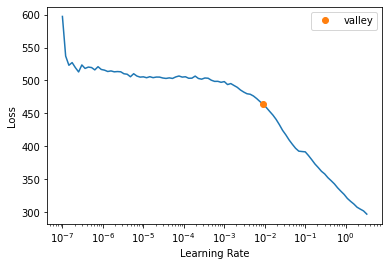

<Figure size 720x720 with 0 Axes>

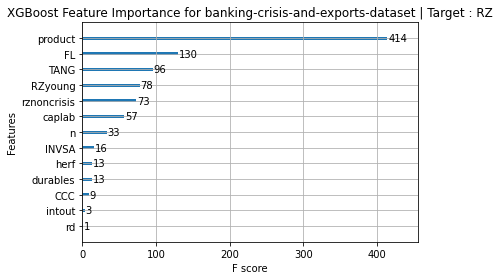

Target Variable: TWIN
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'for

  0%|          | 0/42 [00:00<?, ?it/s]

{'Model': 'AdaBoostRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.09510564804077148}


 10%|▉         | 4/42 [00:00<00:06,  6.27it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9991254058663401, 'Adjusted R-Squared': 0.9991158994083655, 'RMSE': 0.0022360679774997916, 'Time taken': 0.3983762264251709}
{'Model': 'BayesianRidge', 'R-Squared': 0.06347938326274383, 'Adjusted R-Squared': 0.0532998113416866, 'RMSE': 0.0731712363797985, 'Time taken': 0.07033419609069824}
{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12326669692993164}
{'Model': 'DummyRegressor', 'R-Squared': -3.34805566792884e-05, 'Adjusted R-Squared': -0.010903409693165056, 'RMSE': 0.07561169821032987, 'Time taken': 0.03301835060119629}
{'Model': 'ElasticNet', 'R-Squared': -3.3460056209078104e-05, 'Adjusted R-Squared': -0.010903388969863537, 'RMSE': 0.07561169, 'Time taken': 0.049031972885131836}


 17%|█▋        | 7/42 [00:01<00:05,  5.91it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.0635554680572844, 'Adjusted R-Squared': 0.053376723144863525, 'RMSE': 0.07316826, 'Time taken': 0.44519472122192383}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.08431696891784668}


 21%|██▏       | 9/42 [00:02<00:08,  3.77it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999956270293316, 'Adjusted R-Squared': 0.9999955794970418, 'RMSE': 0.0001581138830084191, 'Time taken': 0.8039975166320801}
{'Model': 'GammaRegressor', 'R-Squared': 0.0455095172298402, 'Adjusted R-Squared': 0.03513462067799056, 'RMSE': 0.0738699020869923, 'Time taken': 0.0903327465057373}


 29%|██▊       | 12/42 [01:34<06:17, 12.59s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -47.96897416345431, 'Adjusted R-Squared': -48.50124562175273, 'RMSE': 0.5291054381988368, 'Time taken': 92.54319953918457}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.045508282101298536, 'Adjusted R-Squared': 0.035133372124138695, 'RMSE': 0.07386994988149449, 'Time taken': 0.17090392112731934}


 31%|███       | 13/42 [01:41<05:26, 11.27s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9999999992944685, 'Adjusted R-Squared': 0.9999999992867996, 'RMSE': 2.008352476755477e-06, 'Time taken': 6.4512622356414795}


 33%|███▎      | 14/42 [01:42<04:07,  8.85s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9827803439340419, 'Adjusted R-Squared': 0.9825931737594119, 'RMSE': 0.0099218797362485, 'Time taken': 0.9608144760131836}


 36%|███▌      | 15/42 [01:43<03:09,  7.03s/it]

{'Model': 'HuberRegressor', 'R-Squared': -0.005853721014708491, 'Adjusted R-Squared': -0.01678691363443363, 'RMSE': 0.0758314107555934, 'Time taken': 1.582620620727539}


 38%|███▊      | 16/42 [01:50<02:58,  6.88s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.07293021832056057, 'Adjusted R-Squared': 0.06285337286752313, 'RMSE': 0.07280109889280519, 'Time taken': 6.4673051834106445}


 40%|████      | 17/42 [02:12<04:36, 11.08s/it]

{'Model': 'KernelRidge', 'R-Squared': -176.9209693908024, 'Adjusted R-Squared': -178.85489297113722, 'RMSE': 1.008545, 'Time taken': 22.199830055236816}
{'Model': 'Lars', 'R-Squared': 0.06282304787484683, 'Adjusted R-Squared': 0.052636341873486425, 'RMSE': 0.0731968719395849, 'Time taken': 0.07309198379516602}


 45%|████▌     | 19/42 [02:12<02:24,  6.30s/it]

{'Model': 'LarsCV', 'R-Squared': 0.063418312392157, 'Adjusted R-Squared': 0.05323807665728908, 'RMSE': 0.07317362210317706, 'Time taken': 0.3223404884338379}
{'Model': 'Lasso', 'R-Squared': -3.3460056209078104e-05, 'Adjusted R-Squared': -0.010903388969863537, 'RMSE': 0.07561169, 'Time taken': 0.0736074447631836}


 52%|█████▏    | 22/42 [02:13<01:03,  3.15s/it]

{'Model': 'LassoCV', 'R-Squared': 0.06355704388008943, 'Adjusted R-Squared': 0.05337831609617727, 'RMSE': 0.0731682, 'Time taken': 0.5225710868835449}
{'Model': 'LassoLars', 'R-Squared': -3.348931507041186e-05, 'Adjusted R-Squared': -0.010903418546756027, 'RMSE': 0.07561169854143719, 'Time taken': 0.1125640869140625}


 60%|█████▉    | 25/42 [02:14<00:25,  1.51s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.063418312392157, 'Adjusted R-Squared': 0.05323807665728908, 'RMSE': 0.07317362210317706, 'Time taken': 0.2793300151824951}
{'Model': 'LassoLarsIC', 'R-Squared': 0.06327851477183721, 'Adjusted R-Squared': 0.05309675949761805, 'RMSE': 0.07317908298111271, 'Time taken': 0.08707666397094727}
{'Model': 'LinearRegression', 'R-Squared': 0.06355461661861661, 'Adjusted R-Squared': 0.05337586245142767, 'RMSE': 0.07316829, 'Time taken': 0.07181549072265625}


 62%|██████▏   | 26/42 [02:17<00:31,  1.98s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.005783265013633132, 'Adjusted R-Squared': -0.016715691807259736, 'RMSE': 0.07582875486666571, 'Time taken': 3.610599994659424}


 64%|██████▍   | 27/42 [02:22<00:37,  2.53s/it]

{'Model': 'MLPRegressor', 'R-Squared': -0.14841215986267375, 'Adjusted R-Squared': -0.1608949007307463, 'RMSE': 0.08102715928733349, 'Time taken': 4.246310234069824}


 67%|██████▋   | 28/42 [05:49<12:53, 55.25s/it]

{'Model': 'NuSVR', 'R-Squared': 0.02396674734334303, 'Adjusted R-Squared': 0.013357690249248932, 'RMSE': 0.07469886949184584, 'Time taken': 207.84174370765686}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.04662948640292086, 'Adjusted R-Squared': 0.03626676342903956, 'RMSE': 0.0738265510543287, 'Time taken': 0.04622483253479004}


 74%|███████▍  | 31/42 [05:50<04:29, 24.54s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.05082372125167822, 'Adjusted R-Squared': 0.04050658778702254, 'RMSE': 0.07366397669204898, 'Time taken': 0.20116877555847168}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.2983746357117356, 'Adjusted R-Squared': -1.3233569687086022, 'RMSE': 0.11462837407879979, 'Time taken': 0.13657617568969727}


 76%|███████▌  | 32/42 [05:50<03:04, 18.47s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.046252965203527174, 'Adjusted R-Squared': 0.035886149607913254, 'RMSE': 0.07384112802999261, 'Time taken': 0.1421976089477539}


 79%|███████▊  | 33/42 [05:50<02:03, 13.71s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [05:54<01:28, 11.03s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9999912540586634, 'Adjusted R-Squared': 0.9999911589940836, 'RMSE': 0.00022360679774997917, 'Time taken': 3.8669466972351074}
{'Model': 'Ridge', 'R-Squared': 0.0635545552558896, 'Adjusted R-Squared': 0.053375800421714414, 'RMSE': 0.07316831, 'Time taken': 0.058103322982788086}
{'Model': 'RidgeCV', 'R-Squared': 0.06355657777613066, 'Adjusted R-Squared': 0.053377844925871165, 'RMSE': 0.07316822067769567, 'Time taken': 0.14096498489379883}


 88%|████████▊ | 37/42 [05:54<00:23,  4.78s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.03961161321756923, 'Adjusted R-Squared': 0.029172609013412343, 'RMSE': 0.07409777583005432, 'Time taken': 0.11716747283935547}


 90%|█████████ | 38/42 [05:56<00:15,  3.92s/it]

{'Model': 'SVR', 'R-Squared': -0.07589699817731588, 'Adjusted R-Squared': -0.08759153076619985, 'RMSE': 0.07842726499768642, 'Time taken': 1.3784010410308838}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.06355461661861661, 'Adjusted R-Squared': 0.05337586245142767, 'RMSE': 0.07316829, 'Time taken': 0.054642438888549805}


 95%|█████████▌| 40/42 [05:56<00:04,  2.32s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.045508282101298536, 'Adjusted R-Squared': 0.035133372124138695, 'RMSE': 0.07386994988149449, 'Time taken': 0.16138839721679688}


 98%|█████████▊| 41/42 [05:58<00:02,  2.17s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999998080101786, 'Adjusted R-Squared': 0.9999998059233327, 'RMSE': 3.3129952e-05, 'Time taken': 1.6648571491241455}


100%|██████████| 42/42 [05:58<00:00,  8.53s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992944685, 'Adjusted R-Squared': 0.9999999992867996, 'RMSE': 2.008352419970787e-06, 'Time taken': 0.22421526908874512}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: TWIN
TWIN
Target Standard Deviation: 0.07269303504291177
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
AdaBoostRegressor                            1.00       1.00  0.00        0.10
ExtraTreeRegressor                           1.00       1.00  0.00        0.08
DecisionTreeRegressor                        1.00       1.00  0.00        0.12
GradientBoostingRegressor                    1.00       1.00  0.00        6.45
LGBMRegressor                                1.00       1.00  0.00        0.22
XGBRegressor                                 1.00       1.00  0.00        1.66
ExtraTreesRegressor                          1.00       

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.415237,0.166529,0.408080,00:17
1,0.036245,0.014280,0.119498,00:17
2,0.023177,0.024195,0.155547,00:17


Better model found at epoch 0 with _rmse value: 0.40807977318763733.
Better model found at epoch 1 with _rmse value: 0.11949846148490906.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  3.3129952e-05


<Figure size 432x288 with 0 Axes>

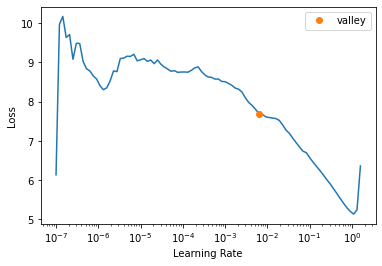

<Figure size 720x720 with 0 Axes>

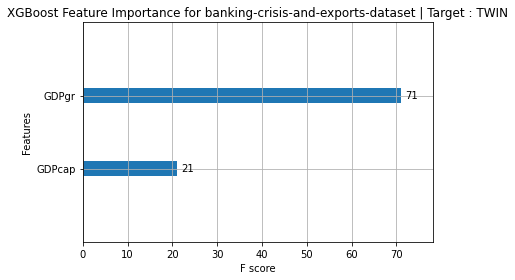

Target Variable: BANK_W3
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', '

  2%|▏         | 1/42 [00:01<00:45,  1.11s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9862039402110785, 'Adjusted R-Squared': 0.9860539830394598, 'RMSE': 0.03764772418381897, 'Time taken': 1.1071844100952148}


  7%|▋         | 3/42 [00:01<00:19,  1.95it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9921887119587535, 'Adjusted R-Squared': 0.9921038066539573, 'RMSE': 0.02832843094843059, 'Time taken': 0.6778600215911865}
{'Model': 'BayesianRidge', 'R-Squared': 0.41472300813994945, 'Adjusted R-Squared': 0.40836130170668805, 'RMSE': 0.24521211319166547, 'Time taken': 0.10036826133728027}


 10%|▉         | 4/42 [00:02<00:14,  2.57it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9878328846709555, 'Adjusted R-Squared': 0.987700633417379, 'RMSE': 0.035355339059327376, 'Time taken': 0.19858121871948242}
{'Model': 'DummyRegressor', 'R-Squared': -0.003444852549771227, 'Adjusted R-Squared': -0.014351861816616518, 'RMSE': 0.32107607767669333, 'Time taken': 0.03190922737121582}
{'Model': 'ElasticNet', 'R-Squared': -0.003444856916445138, 'Adjusted R-Squared': -0.014351866230754462, 'RMSE': 0.3210761, 'Time taken': 0.048497676849365234}


 19%|█▉        | 8/42 [00:02<00:07,  4.30it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.4150330542510807, 'Adjusted R-Squared': 0.4086747178842446, 'RMSE': 0.24514715, 'Time taken': 0.506953239440918}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9902663077367645, 'Adjusted R-Squared': 0.9901605067339032, 'RMSE': 0.03162277660168379, 'Time taken': 0.10820746421813965}


 24%|██▍       | 10/42 [00:05<00:21,  1.49it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9954947605359614, 'Adjusted R-Squared': 0.9954457905417871, 'RMSE': 0.021513948963405114, 'Time taken': 2.752309560775757}
{'Model': 'GammaRegressor', 'R-Squared': 0.3447992114952839, 'Adjusted R-Squared': 0.33767746379414565, 'RMSE': 0.2594468486179226, 'Time taken': 0.14094257354736328}


 29%|██▊       | 12/42 [01:26<08:04, 16.15s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -3.319433192560604, 'Adjusted R-Squared': -3.3663835533493067, 'RMSE': 0.6661539000158535, 'Time taken': 80.49694442749023}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3534540978305112, 'Adjusted R-Squared': 0.34642642498084275, 'RMSE': 0.2577275681726069, 'Time taken': 0.1425645351409912}


 31%|███       | 13/42 [01:33<06:36, 13.66s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.992139196511515, 'Adjusted R-Squared': 0.9920537529953358, 'RMSE': 0.028418075513531385, 'Time taken': 7.41849946975708}


 33%|███▎      | 14/42 [01:34<04:37,  9.90s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9932731632738917, 'Adjusted R-Squared': 0.9932000454833905, 'RMSE': 0.02628855031123192, 'Time taken': 0.6798610687255859}


 36%|███▌      | 15/42 [01:36<03:24,  7.56s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.3215754563185723, 'Adjusted R-Squared': 0.3142012764959481, 'RMSE': 0.2640048891935927, 'Time taken': 1.9061787128448486}


 38%|███▊      | 16/42 [01:43<03:10,  7.34s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8460129883956138, 'Adjusted R-Squared': 0.8443392165303487, 'RMSE': 0.125777581468241, 'Time taken': 6.826575040817261}


 40%|████      | 17/42 [02:05<04:51, 11.66s/it]

{'Model': 'KernelRidge', 'R-Squared': -11.782330071343585, 'Adjusted R-Squared': -11.921268441684276, 'RMSE': 1.1459514, 'Time taken': 21.912091493606567}
{'Model': 'Lars', 'R-Squared': 0.4147193709167294, 'Adjusted R-Squared': 0.408357624948433, 'RMSE': 0.2452128751298748, 'Time taken': 0.07293415069580078}


 45%|████▌     | 19/42 [02:05<02:27,  6.41s/it]

{'Model': 'LarsCV', 'R-Squared': 0.4149939265455964, 'Adjusted R-Squared': 0.40863516487761375, 'RMSE': 0.24515535360161325, 'Time taken': 0.3253293037414551}
{'Model': 'Lasso', 'R-Squared': -0.003444856916445138, 'Adjusted R-Squared': -0.014351866230754462, 'RMSE': 0.3210761, 'Time taken': 0.05949878692626953}


 50%|█████     | 21/42 [02:06<01:23,  3.98s/it]

{'Model': 'LassoCV', 'R-Squared': 0.4150413909143913, 'Adjusted R-Squared': 0.4086831451634607, 'RMSE': 0.24514541, 'Time taken': 0.4675889015197754}
{'Model': 'LassoLars', 'R-Squared': -0.003444836483631697, 'Adjusted R-Squared': -0.014351845575845124, 'RMSE': 0.32107607510632136, 'Time taken': 0.07349467277526855}


 60%|█████▉    | 25/42 [02:06<00:29,  1.75s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.41503841250736284, 'Adjusted R-Squared': 0.4086801343824429, 'RMSE': 0.2451460321778518, 'Time taken': 0.2945277690887451}
{'Model': 'LassoLarsIC', 'R-Squared': 0.4149862870736051, 'Adjusted R-Squared': 0.4086274423678834, 'RMSE': 0.24515695431263837, 'Time taken': 0.08287525177001953}
{'Model': 'LinearRegression', 'R-Squared': 0.4147397007220428, 'Adjusted R-Squared': 0.4083781757298911, 'RMSE': 0.24520862, 'Time taken': 0.0918722152709961}


 62%|██████▏   | 26/42 [02:13<00:43,  2.73s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.23475836232185288, 'Adjusted R-Squared': 0.2264405184340469, 'RMSE': 0.2803886892527938, 'Time taken': 6.7743446826934814}


 64%|██████▍   | 27/42 [02:22<01:01,  4.09s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9566960523294258, 'Adjusted R-Squared': 0.95622535724605, 'RMSE': 0.0666998625289991, 'Time taken': 8.956623077392578}


 67%|██████▋   | 28/42 [22:26<1:07:32, 289.46s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9412480778002591, 'Adjusted R-Squared': 0.940609469950262, 'RMSE': 0.07769127239991275, 'Time taken': 1204.1849565505981}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.3993947261177728, 'Adjusted R-Squared': 0.3928664079234008, 'RMSE': 0.2484023870250342, 'Time taken': 0.04358553886413574}


 74%|███████▍  | 31/42 [22:26<24:31, 133.78s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.40210966599968434, 'Adjusted R-Squared': 0.39561085802142004, 'RMSE': 0.24784031953197316, 'Time taken': 0.15882182121276855}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.35551911601937314, 'Adjusted R-Squared': -0.3702530194543663, 'RMSE': 0.3731762682478906, 'Time taken': 0.13318467140197754}


 76%|███████▌  | 32/42 [22:27<16:53, 101.38s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.36788281476882567, 'Adjusted R-Squared': 0.3610119757989215, 'RMSE': 0.2548355384058233, 'Time taken': 0.2041637897491455}


 79%|███████▊  | 33/42 [22:27<11:18, 75.38s/it] 

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 86%|████████▌ | 36/42 [22:33<03:12, 32.16s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9938429529588904, 'Adjusted R-Squared': 0.9937760285345305, 'RMSE': 0.025150546713739643, 'Time taken': 6.238548040390015}
{'Model': 'Ridge', 'R-Squared': 0.41474001604461974, 'Adjusted R-Squared': 0.4083784944798873, 'RMSE': 0.24520855, 'Time taken': 0.05576515197753906}
{'Model': 'RidgeCV', 'R-Squared': 0.4147393833866744, 'Adjusted R-Squared': 0.40837785494522516, 'RMSE': 0.24520868281852926, 'Time taken': 0.10003471374511719}


 88%|████████▊ | 37/42 [22:33<02:02, 24.57s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.4040858869905404, 'Adjusted R-Squared': 0.39760855967522013, 'RMSE': 0.24743038428921332, 'Time taken': 0.13585448265075684}


 95%|█████████▌| 40/42 [22:39<00:22, 11.45s/it]

{'Model': 'SVR', 'R-Squared': 0.9222061717971004, 'Adjusted R-Squared': 0.9213605867079384, 'RMSE': 0.0893992274694744, 'Time taken': 5.110642671585083}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.4147397007220428, 'Adjusted R-Squared': 0.4083781757298911, 'RMSE': 0.24520862, 'Time taken': 0.05380964279174805}
{'Model': 'TweedieRegressor', 'R-Squared': 0.3534540978305112, 'Adjusted R-Squared': 0.34642642498084275, 'RMSE': 0.2577275681726069, 'Time taken': 0.10624074935913086}


 98%|█████████▊| 41/42 [22:40<00:09,  9.09s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9917667931990107, 'Adjusted R-Squared': 0.9916773018207391, 'RMSE': 0.029083434, 'Time taken': 1.2159738540649414}


100%|██████████| 42/42 [22:40<00:00, 32.40s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9938973287922417, 'Adjusted R-Squared': 0.9938309954095487, 'RMSE': 0.02503924215672875, 'Time taken': 0.41341090202331543}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: BANK_W3
BANK_W3
Target Standard Deviation: 0.3417903174370948
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          1.00       1.00  0.02        2.75
LGBMRegressor                                0.99       0.99  0.03        0.41
RandomForestRegressor                        0.99       0.99  0.03        6.24
HistGradientBoostingRegressor                0.99       0.99  0.03        0.68
BaggingRegressor                             0.99       0.99  0.03        0.68
GradientBoostingRegressor                    0.99       0.99  0.03        7.42
XGBRegressor                                 0.99    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.579998,0.384859,0.620370,00:17
1,0.095558,0.105292,0.324488,00:17
2,0.057825,0.289688,0.538226,00:17


Better model found at epoch 0 with _rmse value: 0.6203697919845581.
Better model found at epoch 1 with _rmse value: 0.32448768615722656.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       2       2.00
1       1       1.00
2       2       2.00
3       1       1.00
4       2       2.00
XGBoost RMSE:  0.029083325


<Figure size 432x288 with 0 Axes>

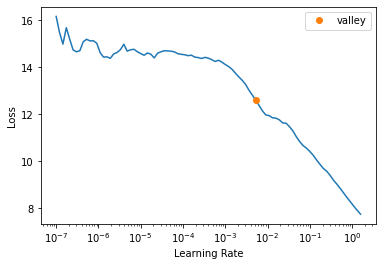

<Figure size 720x720 with 0 Axes>

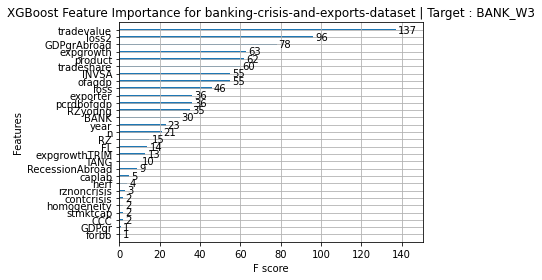

Target Variable: BANK
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'for

  2%|▏         | 1/42 [00:01<00:53,  1.31s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.998364538618445, 'Adjusted R-Squared': 0.9983467618642976, 'RMSE': 0.008958529940750878, 'Time taken': 1.3120307922363281}


  7%|▋         | 3/42 [00:02<00:20,  1.87it/s]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.6131086349487305}
{'Model': 'BayesianRidge', 'R-Squared': 0.731653457636319, 'Adjusted R-Squared': 0.7287366473932355, 'RMSE': 0.11475314703837824, 'Time taken': 0.09953856468200684}


 10%|▉         | 4/42 [00:02<00:15,  2.52it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.17973542213439941}
{'Model': 'DummyRegressor', 'R-Squared': -0.0018391366756200789, 'Adjusted R-Squared': -0.012728692509050843, 'RMSE': 0.22172547778728544, 'Time taken': 0.03675246238708496}
{'Model': 'ElasticNet', 'R-Squared': -0.0018390948716910938, 'Adjusted R-Squared': -0.012728650250731333, 'RMSE': 0.22172546, 'Time taken': 0.055019378662109375}


 19%|█▉        | 8/42 [00:02<00:08,  4.22it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.7316956136363033, 'Adjusted R-Squared': 0.728779261610611, 'RMSE': 0.114744134, 'Time taken': 0.49240684509277344}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.12532734870910645}


 24%|██▍       | 10/42 [00:04<00:11,  2.71it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 1.1203117370605469}
{'Model': 'GammaRegressor', 'R-Squared': 0.6236402434419479, 'Adjusted R-Squared': 0.6195493765228386, 'RMSE': 0.1358996043089602, 'Time taken': 0.12027525901794434}


 29%|██▊       | 12/42 [01:37<09:16, 18.55s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -6.420585057651541, 'Adjusted R-Squared': -6.501243590886885, 'RMSE': 0.6034421978636483, 'Time taken': 93.57140159606934}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6403380677841712, 'Adjusted R-Squared': 0.6364286989557383, 'RMSE': 0.13285069762264853, 'Time taken': 0.14438557624816895}


 31%|███       | 13/42 [01:45<07:25, 15.35s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9997136468087778, 'Adjusted R-Squared': 0.9997105342740906, 'RMSE': 0.0037485871875390397, 'Time taken': 7.323324680328369}


 33%|███▎      | 14/42 [01:45<05:09, 11.06s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999994003743662, 'Adjusted R-Squared': 0.9999993938566962, 'RMSE': 0.000171536560608426, 'Time taken': 0.5553646087646484}


 36%|███▌      | 15/42 [01:47<03:45,  8.33s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.6618383811030673, 'Adjusted R-Squared': 0.6581627113324484, 'RMSE': 0.12881865481136304, 'Time taken': 1.7343859672546387}


 38%|███▊      | 16/42 [01:53<03:18,  7.65s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8267849114374178, 'Adjusted R-Squared': 0.8249021387356507, 'RMSE': 0.09219544457292887, 'Time taken': 6.023813009262085}


 40%|████      | 17/42 [02:15<04:56, 11.87s/it]

{'Model': 'KernelRidge', 'R-Squared': -21.434280990379243, 'Adjusted R-Squared': -21.678131870709453, 'RMSE': 1.0492349, 'Time taken': 21.887967109680176}
{'Model': 'Lars', 'R-Squared': 0.731274189686323, 'Adjusted R-Squared': 0.7283532569655221, 'RMSE': 0.11483421166337851, 'Time taken': 0.07279634475708008}


 48%|████▊     | 20/42 [02:15<01:48,  4.93s/it]

{'Model': 'LarsCV', 'R-Squared': 0.7315957071344195, 'Adjusted R-Squared': 0.7286782691684892, 'RMSE': 0.11476549431005587, 'Time taken': 0.2802436351776123}
{'Model': 'Lasso', 'R-Squared': -0.0018390948716910938, 'Adjusted R-Squared': -0.012728650250731333, 'RMSE': 0.22172546, 'Time taken': 0.1238865852355957}


 52%|█████▏    | 22/42 [02:16<00:55,  2.78s/it]

{'Model': 'LassoCV', 'R-Squared': 0.7316957119906569, 'Adjusted R-Squared': 0.7287793610340336, 'RMSE': 0.11474411, 'Time taken': 0.47411036491394043}
{'Model': 'LassoLars', 'R-Squared': -0.0018391222748990188, 'Adjusted R-Squared': -0.012728677951800105, 'RMSE': 0.22172547619371283, 'Time taken': 0.10992598533630371}


 60%|█████▉    | 25/42 [02:16<00:20,  1.19s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.7316907947282761, 'Adjusted R-Squared': 0.7287743903231487, 'RMSE': 0.11474516352234071, 'Time taken': 0.270275354385376}
{'Model': 'LassoLarsIC', 'R-Squared': 0.7315506925432156, 'Adjusted R-Squared': 0.7286327652882505, 'RMSE': 0.11477511767555551, 'Time taken': 0.0824117660522461}
{'Model': 'LinearRegression', 'R-Squared': 0.7315917964134435, 'Adjusted R-Squared': 0.7286743159396766, 'RMSE': 0.11476634, 'Time taken': 0.06544089317321777}


 62%|██████▏   | 26/42 [02:18<00:19,  1.21s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.6739480744311336, 'Adjusted R-Squared': 0.6704040317619068, 'RMSE': 0.1264911052733356, 'Time taken': 1.2721991539001465}


 64%|██████▍   | 27/42 [02:26<00:45,  3.01s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9194021078644983, 'Adjusted R-Squared': 0.9185260438195472, 'RMSE': 0.0628895438487598, 'Time taken': 8.238636016845703}


 67%|██████▋   | 28/42 [17:09<55:38, 238.50s/it]

{'Model': 'NuSVR', 'R-Squared': 0.8910207917534896, 'Adjusted R-Squared': 0.8898362351421145, 'RMSE': 0.07312879662535303, 'Time taken': 882.7072329521179}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7276580540556408, 'Adjusted R-Squared': 0.7246978155127672, 'RMSE': 0.11560426873610671, 'Time taken': 0.05111241340637207}


 74%|███████▍  | 31/42 [17:09<18:55, 103.27s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7285998222916399, 'Adjusted R-Squared': 0.7256498203600272, 'RMSE': 0.1154042137791924, 'Time taken': 0.2361159324645996}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.6647537149035643, 'Adjusted R-Squared': 0.6611097335438204, 'RMSE': 0.12826217193451653, 'Time taken': 0.10021114349365234}


 76%|███████▌  | 32/42 [17:09<12:52, 77.24s/it] 

{'Model': 'PoissonRegressor', 'R-Squared': 0.6526506553390601, 'Adjusted R-Squared': 0.6488751189840498, 'RMSE': 0.13055690457370533, 'Time taken': 0.14403510093688965}


 79%|███████▊  | 33/42 [17:10<08:31, 56.86s/it]

RANSACRegressor model failed to execute
RANSAC could not find a valid consensus set. All `max_trials` iterations were skipped because each randomly chosen sub-sample failed the passing criteria. See estimator attributes for diagnostics (n_skips*).


 81%|████████  | 34/42 [17:15<05:42, 42.87s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 5.90322208404541}
{'Model': 'Ridge', 'R-Squared': 0.7315985864859846, 'Adjusted R-Squared': 0.728681179817354, 'RMSE': 0.11476488, 'Time taken': 0.057500362396240234}


 88%|████████▊ | 37/42 [17:16<01:31, 18.35s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.7316230597223985, 'Adjusted R-Squared': 0.7287059190672072, 'RMSE': 0.11475964639080977, 'Time taken': 0.16165614128112793}
{'Model': 'SGDRegressor', 'R-Squared': 0.7327352742842563, 'Adjusted R-Squared': 0.7298302229177809, 'RMSE': 0.11452160458305509, 'Time taken': 0.14781713485717773}


 90%|█████████ | 38/42 [17:19<00:58, 14.51s/it]

{'Model': 'SVR', 'R-Squared': 0.8666183025073504, 'Adjusted R-Squared': 0.8651685014476477, 'RMSE': 0.08090301800923874, 'Time taken': 3.248040199279785}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.7315917964134435, 'Adjusted R-Squared': 0.7286743159396766, 'RMSE': 0.11476634, 'Time taken': 0.05359673500061035}


 95%|█████████▌| 40/42 [17:19<00:16,  8.45s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.6403380677841712, 'Adjusted R-Squared': 0.6364286989557383, 'RMSE': 0.13285069762264853, 'Time taken': 0.16217327117919922}


 98%|█████████▊| 41/42 [17:20<00:06,  6.69s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9999999900527438, 'Adjusted R-Squared': 0.9999999899446214, 'RMSE': 2.209369e-05, 'Time taken': 0.855663537979126}


100%|██████████| 42/42 [17:20<00:00, 24.78s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999992931946, 'Adjusted R-Squared': 0.999999999285512, 'RMSE': 5.8893388399258795e-06, 'Time taken': 0.2451462745666504}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: BANK
BANK
Target Standard Deviation: 0.20115898563076917
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.18
RandomForestRegressor                        1.00       1.00  0.00        5.90
BaggingRegressor                             1.00       1.00  0.00        0.61
ExtraTreeRegressor                           1.00       1.00  0.00        0.13
ExtraTreesRegressor                          1.00       1.00  0.00        1.12
LGBMRegressor                                1.00       1.00  0.00        0.25
XGBRegressor                                 1.00       1

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.431855,0.301047,0.548678,00:17
1,0.062806,0.048065,0.219238,00:17
2,0.073813,0.050699,0.225164,00:17


Better model found at epoch 0 with _rmse value: 0.5486779808998108.
Better model found at epoch 1 with _rmse value: 0.2192375361919403.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0       1       1.00
1       1       1.00
2       1       1.00
3       1       1.00
4       1       1.00
XGBoost RMSE:  2.209369e-05


<Figure size 432x288 with 0 Axes>

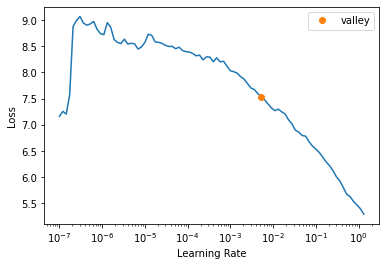

<Figure size 720x720 with 0 Axes>

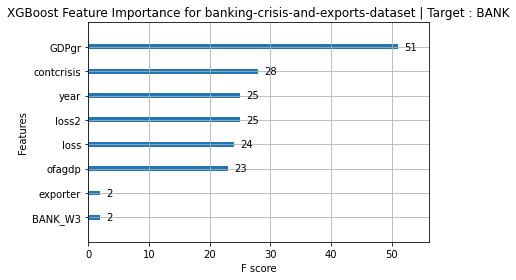

Target Variable: expgrowthTRIM
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'RecessionAbroad', 'GDPgrAbroad']
43
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', '

  2%|▏         | 1/42 [00:01<00:47,  1.15s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.8207860382583657, 'Adjusted R-Squared': 0.818838060413348, 'RMSE': 0.1407507207349054, 'Time taken': 1.1515333652496338}


  5%|▍         | 2/42 [00:03<01:10,  1.76s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9339234331903525, 'Adjusted R-Squared': 0.9332052096380737, 'RMSE': 0.0854650285597642, 'Time taken': 2.1819851398468018}
{'Model': 'BayesianRidge', 'R-Squared': 0.20768617870826644, 'Adjusted R-Squared': 0.1990740719550954, 'RMSE': 0.2959465783073096, 'Time taken': 0.09763693809509277}


 10%|▉         | 4/42 [00:03<00:31,  1.22it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.9079793898664977, 'Adjusted R-Squared': 0.9069791658433075, 'RMSE': 0.10085728227334766, 'Time taken': 0.42963719367980957}
{'Model': 'DummyRegressor', 'R-Squared': -0.0005255865577811214, 'Adjusted R-Squared': -0.011400864672539646, 'RMSE': 0.33256674, 'Time taken': 0.031581878662109375}
{'Model': 'ElasticNet', 'R-Squared': -0.0005255865577811214, 'Adjusted R-Squared': -0.011400864672539646, 'RMSE': 0.33256674, 'Time taken': 0.05417585372924805}


 17%|█▋        | 7/42 [00:04<00:16,  2.17it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.20876968825397546, 'Adjusted R-Squared': 0.2001693587784752, 'RMSE': 0.29574415, 'Time taken': 0.48781490325927734}


 19%|█▉        | 8/42 [00:04<00:13,  2.44it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.5658915975489365, 'Adjusted R-Squared': 0.561173027957077, 'RMSE': 0.2190603630599211, 'Time taken': 0.2202284336090088}


 21%|██▏       | 9/42 [00:17<01:49,  3.33s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9060303801887744, 'Adjusted R-Squared': 0.9050089712777828, 'RMSE': 0.10191977166061546, 'Time taken': 12.864799499511719}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 29%|██▊       | 12/42 [01:42<07:24, 14.82s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.4045006567337278, 'Adjusted R-Squared': 0.39802783778518136, 'RMSE': 0.2565696906529076, 'Time taken': 84.94523048400879}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.1613707601970238, 'Adjusted R-Squared': 0.15225522498177402, 'RMSE': 0.3044736456883861, 'Time taken': 0.1037893295288086}


 31%|███       | 13/42 [01:49<06:14, 12.90s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9072533651629993, 'Adjusted R-Squared': 0.9062452495669449, 'RMSE': 0.10125437273395439, 'Time taken': 6.86349892616272}


 33%|███▎      | 14/42 [01:50<04:34,  9.81s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.941332303575695, 'Adjusted R-Squared': 0.9406946112232568, 'RMSE': 0.08053121011888692, 'Time taken': 0.83548903465271}


 36%|███▌      | 15/42 [01:51<03:21,  7.45s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.14046607363759622, 'Adjusted R-Squared': 0.13112331356843965, 'RMSE': 0.3082451263769919, 'Time taken': 0.9973804950714111}


 38%|███▊      | 16/42 [01:57<03:03,  7.05s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.22578194068770596, 'Adjusted R-Squared': 0.21736652699952885, 'RMSE': 0.29254746, 'Time taken': 6.01854944229126}


 43%|████▎     | 18/42 [02:19<03:13,  8.07s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.1333558870250603, 'Adjusted R-Squared': 0.12393584231881094, 'RMSE': 0.30951744, 'Time taken': 21.98965358734131}
{'Model': 'Lars', 'R-Squared': 0.20707250669990918, 'Adjusted R-Squared': 0.19845372959882124, 'RMSE': 0.29606116609648025, 'Time taken': 0.13075590133666992}


 45%|████▌     | 19/42 [02:19<02:13,  5.81s/it]

{'Model': 'LarsCV', 'R-Squared': 0.20779881254789478, 'Adjusted R-Squared': 0.19918793007558921, 'RMSE': 0.29592554195574755, 'Time taken': 0.32719850540161133}
{'Model': 'Lasso', 'R-Squared': -0.0005255865577811214, 'Adjusted R-Squared': -0.011400864672539646, 'RMSE': 0.33256674, 'Time taken': 0.05962967872619629}


 50%|█████     | 21/42 [02:20<01:09,  3.29s/it]

{'Model': 'LassoCV', 'R-Squared': 0.20877280525929476, 'Adjusted R-Squared': 0.200172509664287, 'RMSE': 0.29574358, 'Time taken': 0.4458160400390625}
{'Model': 'LassoLars', 'R-Squared': -0.0005255774270604974, 'Adjusted R-Squared': -0.011400855442571967, 'RMSE': 0.332566733544243, 'Time taken': 0.05758023262023926}


 60%|█████▉    | 25/42 [02:20<00:22,  1.35s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.2087287226840029, 'Adjusted R-Squared': 0.2001279479305681, 'RMSE': 0.2957518077025689, 'Time taken': 0.2917969226837158}
{'Model': 'LassoLarsIC', 'R-Squared': 0.20870396842843242, 'Adjusted R-Squared': 0.2001029246070023, 'RMSE': 0.29575643383951167, 'Time taken': 0.09262967109680176}
{'Model': 'LinearRegression', 'R-Squared': 0.20756507867381924, 'Adjusted R-Squared': 0.19895165561592598, 'RMSE': 0.2959692, 'Time taken': 0.07041335105895996}


 62%|██████▏   | 26/42 [02:26<00:36,  2.27s/it]

{'Model': 'LinearSVR', 'R-Squared': -3.2400778505546377, 'Adjusted R-Squared': -3.286165653278058, 'RMSE': 0.684623216273825, 'Time taken': 5.828074216842651}


 64%|██████▍   | 27/42 [02:37<01:04,  4.29s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.8414637788892887, 'Adjusted R-Squared': 0.839740559094607, 'RMSE': 0.13238200613728274, 'Time taken': 11.220097780227661}


 67%|██████▋   | 28/42 [04:02<05:36, 24.01s/it]

{'Model': 'NuSVR', 'R-Squared': 0.4392831713363894, 'Adjusted R-Squared': 0.4331884231987414, 'RMSE': 0.24896397103310963, 'Time taken': 85.03357529640198}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.2058986184295799, 'Adjusted R-Squared': 0.1972670816733797, 'RMSE': 0.296280236691503, 'Time taken': 0.06428360939025879}


 74%|███████▍  | 31/42 [04:03<02:01, 11.01s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.20586346397442412, 'Adjusted R-Squared': 0.19723154510458085, 'RMSE': 0.2962867947049164, 'Time taken': 0.23424220085144043}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.4197558685906726, 'Adjusted R-Squared': -0.4351879975970929, 'RMSE': 0.3961608395681429, 'Time taken': 0.1478419303894043}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [04:03<01:00,  6.77s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -3.240073888514667, 'Adjusted R-Squared': -3.2861616481724356, 'RMSE': 0.6846229, 'Time taken': 0.38762569427490234}


 81%|████████  | 34/42 [04:25<01:19,  9.97s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9422260962716934, 'Adjusted R-Squared': 0.9415981190572553, 'RMSE': 0.07991541587255596, 'Time taken': 21.369506359100342}
{'Model': 'Ridge', 'R-Squared': 0.20756596480955736, 'Adjusted R-Squared': 0.19895255138357426, 'RMSE': 0.295969, 'Time taken': 0.06348729133605957}


 88%|████████▊ | 37/42 [04:25<00:24,  4.88s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.2075749468845166, 'Adjusted R-Squared': 0.19896163108978304, 'RMSE': 0.29596735134034424, 'Time taken': 0.22274303436279297}
{'Model': 'SGDRegressor', 'R-Squared': 0.19694656741352745, 'Adjusted R-Squared': 0.18821772575497875, 'RMSE': 0.2979455672672494, 'Time taken': 0.11661934852600098}


 90%|█████████ | 38/42 [04:39<00:28,  7.02s/it]

{'Model': 'SVR', 'R-Squared': 0.5170558020002238, 'Adjusted R-Squared': 0.5118064085437045, 'RMSE': 0.23105383622494938, 'Time taken': 13.963707685470581}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.20756507867381924, 'Adjusted R-Squared': 0.19895165561592598, 'RMSE': 0.2959692, 'Time taken': 0.054834604263305664}


 95%|█████████▌| 40/42 [04:39<00:08,  4.25s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.1613707601970238, 'Adjusted R-Squared': 0.15225522498177402, 'RMSE': 0.3044736456883861, 'Time taken': 0.20369362831115723}


 98%|█████████▊| 41/42 [04:43<00:04,  4.03s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9361596738190474, 'Adjusted R-Squared': 0.935465757230124, 'RMSE': 0.08400638, 'Time taken': 3.2658233642578125}


100%|██████████| 42/42 [04:43<00:00,  6.75s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.944830790592175, 'Adjusted R-Squared': 0.9442311252725247, 'RMSE': 0.07809317630013692, 'Time taken': 0.42189574241638184}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: expgrowthTRIM
expgrowthTRIM
Target Standard Deviation: 0.33411043882369995
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
LGBMRegressor                                0.94       0.94  0.08        0.42
RandomForestRegressor                        0.94       0.94  0.08       21.37
HistGradientBoostingRegressor                0.94       0.94  0.08        0.84
XGBRegressor                                 0.94       0.94  0.08        3.27
BaggingRegressor                             0.93       0.93  0.09        2.18
DecisionTreeRegressor                        0.91       0.91  0.10        0.43
GradientBoostingRegressor                

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.883939,0.113015,0.336177,00:16
1,0.152296,0.115276,0.339523,00:17


Better model found at epoch 0 with _rmse value: 0.3361768424510956.
No improvement since epoch 0: early stopping


,exporter,year,product,BANK,BANK_W3,TWIN,RZ,FL,TANG,ofagdp,pcrdbofgdp,stmktcap,durables,loss,loss2,GDPcap,developed,developing,blanguar,liqsup,forba,forbb,recaps,debtrelief,policytot,recession,GDPgr,INVSA,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis,tradevalue,tradeshare,expgrowth,RecessionAbroad,GDPgrAbroad,expgrowthTRIM,expgrowthTRIM_pred
0,9.00,4.00,33.00,1.00,1.00,1.00,16.00,11.00,20.00,1.00,243.00,1.00,1.00,19.00,20.00,251.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,66.00,22.00,17.00,12.00,15.00,27.00,2.00,2.00,16.00,19.00,17.00,1.00,-0.19,-0.31,-0.05,-0.20,0.84,0.06,0.12
1,11.00,24.00,26.00,1.00,1.00,1.00,3.00,2.00,2.00,57.00,39.00,102.00,1.00,19.00,20.00,167.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,59.00,76.00,73.00,1.00,5.00,3.00,2.00,1.00,3.00,24.00,18.00,1.00,-0.14,-0.23,-0.18,-0.67,0.01,-0.03,0.09
2,3.00,1.00,73.00,1.00,1.00,1.00,23.00,26.00,11.00,1.00,97.00,38.00,2.00,19.00,20.00,81.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,157.00,68.00,59.00,13.00,8.00,16.00,3.00,1.00,27.00,10.00,25.00,1.00,-0.20,-0.31,-0.43,-0.70,-0.97,-0.22,0.11
3,1.00,21.00,78.00,1.00,1.00,1.00,29.00,15.00,7.00,24.00,93.00,162.00,2.00,19.00,20.00,191.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,28.00,77.00,78.00,22.00,26.00,8.00,3.00,2.00,22.00,4.00,13.00,1.00,-0.20,-0.31,0.04,-0.09,0.39,0.13,0.06
4,7.00,13.00,46.00,1.00,2.00,1.00,19.00,16.00,16.00,1.00,185.00,66.00,1.00,18.00,19.00,215.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,44.00,30.00,40.00,11.00,7.00,21.00,3.00,1.00,10.00,9.00,8.00,1.00,0.06,-0.15,0.01,1.32,-0.37,0.11,0.08
5,3.00,3.00,65.00,2.00,2.00,1.00,31.00,12.00,9.00,1.00,117.00,31.00,2.00,23.00,26.00,78.00,1.00,1.00,2.00,2.00,1.00,1.00,1.00,1.00,3.00,2.00,49.00,59.00,72.00,28.00,24.00,15.00,5.00,1.00,25.00,8.00,7.00,2.00,-0.20,-0.17,-0.64,4.13,-1.56,-0.38,0.05
6,7.00,11.00,11.00,2.00,2.00,1.00,6.00,1.00,1.00,1.00,170.00,77.00,1.00,14.00,15.00,211.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,84.00,11.00,10.00,5.00,12.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-0.17,-0.30,1.03,-0.54,-0.07,0.88,0.06
7,8.00,26.00,17.00,1.00,1.00,1.00,4.00,30.00,18.00,1.00,224.00,218.00,1.00,19.00,20.00,121.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,248.00,38.00,41.00,5.00,20.00,11.00,2.00,1.00,9.00,20.00,23.00,1.00,-0.20,-0.15,-0.35,-0.72,0.15,-0.16,0.07
8,3.00,16.00,76.00,1.00,1.00,1.00,32.00,7.00,6.00,25.00,118.00,98.00,2.00,19.00,20.00,117.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,208.00,71.00,75.00,31.00,25.00,14.00,6.00,1.00,23.00,3.00,4.00,1.00,-0.20,-0.29,0.04,-0.42,0.11,0.13,0.08


<Figure size 432x288 with 0 Axes>

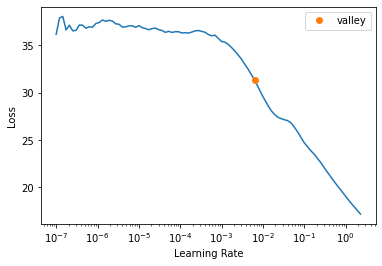

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0   -0.00      -0.00
1    0.18       0.18
2    0.39       0.38
3    0.82       0.77
4    0.46       0.47
XGBoost RMSE:  0.083592


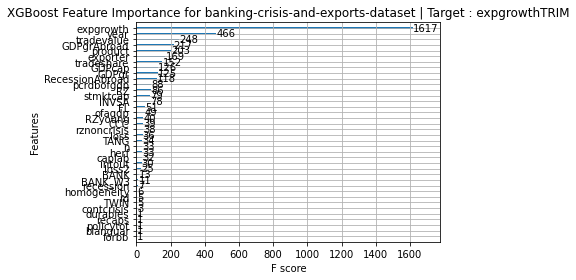

Target Variable: expgrowth
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
43
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps

  2%|▏         | 1/42 [00:02<01:37,  2.38s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.24463884581121387, 'Adjusted R-Squared': -0.25816752891785755, 'RMSE': 0.817809380702947, 'Time taken': 2.384153366088867}


  5%|▍         | 2/42 [00:04<01:38,  2.47s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.41086740174549374, 'Adjusted R-Squared': 0.40446378654707515, 'RMSE': 0.5626482068952315, 'Time taken': 2.5302023887634277}
{'Model': 'BayesianRidge', 'R-Squared': 0.2064052827445506, 'Adjusted R-Squared': 0.19777925320916523, 'RMSE': 0.653024982502457, 'Time taken': 0.08191871643066406}


 10%|▉         | 4/42 [00:05<00:41,  1.10s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': -0.2104191168981131, 'Adjusted R-Squared': -0.22357584642961448, 'RMSE': 0.8064887231922533, 'Time taken': 0.4847147464752197}
{'Model': 'DummyRegressor', 'R-Squared': -0.0011171839705330644, 'Adjusted R-Squared': -0.011998892491951851, 'RMSE': 0.7334539, 'Time taken': 0.0342864990234375}
{'Model': 'ElasticNet', 'R-Squared': -0.0011171839705330644, 'Adjusted R-Squared': -0.011998892491951851, 'RMSE': 0.7334539, 'Time taken': 0.03958559036254883}


 17%|█▋        | 7/42 [00:05<00:19,  1.78it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.20671581398764893, 'Adjusted R-Squared': 0.19809315979186248, 'RMSE': 0.65289724, 'Time taken': 0.3994588851928711}


 19%|█▉        | 8/42 [00:06<00:16,  2.01it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': -0.8841639346125238, 'Adjusted R-Squared': -0.9046439773800514, 'RMSE': 1.0062126094121273, 'Time taken': 0.2578561305999756}


 21%|██▏       | 9/42 [00:20<02:06,  3.83s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.17522138122268394, 'Adjusted R-Squared': 0.166256396235974, 'RMSE': 0.6657315037156369, 'Time taken': 14.730010271072388}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 29%|██▊       | 12/42 [01:45<07:29, 14.98s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.5857114503091734, 'Adjusted R-Squared': -0.602947444334273, 'RMSE': 0.9230866991802442, 'Time taken': 84.40627884864807}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.15511326249154267, 'Adjusted R-Squared': 0.14592971099688545, 'RMSE': 0.6737979084905884, 'Time taken': 0.14442920684814453}


 31%|███       | 13/42 [01:52<06:17, 13.03s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.3594836366574071, 'Adjusted R-Squared': 0.3525215022732485, 'RMSE': 0.5866722235873073, 'Time taken': 6.883504152297974}


 33%|███▎      | 14/42 [01:53<04:36,  9.88s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.46739984906614274, 'Adjusted R-Squared': 0.4616107169907747, 'RMSE': 0.5349720033507577, 'Time taken': 0.7484145164489746}


 36%|███▌      | 15/42 [01:54<03:26,  7.66s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.20447481512998678, 'Adjusted R-Squared': 0.19582780225096486, 'RMSE': 0.6538187616417003, 'Time taken': 1.6148490905761719}


 38%|███▊      | 16/42 [02:00<03:06,  7.17s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': -0.07641140583783512, 'Adjusted R-Squared': -0.08811152981433334, 'RMSE': 0.7605356, 'Time taken': 5.881458282470703}


 40%|████      | 17/42 [02:22<04:44, 11.40s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.1891987601874351, 'Adjusted R-Squared': 0.18038570323295067, 'RMSE': 0.6600664, 'Time taken': 22.074118614196777}
{'Model': 'Lars', 'R-Squared': 0.20640139086992637, 'Adjusted R-Squared': 0.19777531903155599, 'RMSE': 0.6530265837531881, 'Time taken': 0.07462358474731445}


 48%|████▊     | 20/42 [02:23<01:46,  4.86s/it]

{'Model': 'LarsCV', 'R-Squared': 0.2063547874558458, 'Adjusted R-Squared': 0.19772820905862665, 'RMSE': 0.6530457576914733, 'Time taken': 0.26320838928222656}
{'Model': 'Lasso', 'R-Squared': -0.0011171839705330644, 'Adjusted R-Squared': -0.011998892491951851, 'RMSE': 0.7334539, 'Time taken': 0.117645263671875}


 52%|█████▏    | 22/42 [02:23<00:55,  2.77s/it]

{'Model': 'LassoCV', 'R-Squared': 0.20644554706901974, 'Adjusted R-Squared': 0.19781995518933515, 'RMSE': 0.6530084, 'Time taken': 0.49369001388549805}
{'Model': 'LassoLars', 'R-Squared': -0.0011171786436237063, 'Adjusted R-Squared': -0.011998887107141476, 'RMSE': 0.7334539790102611, 'Time taken': 0.12737417221069336}


 60%|█████▉    | 25/42 [02:24<00:20,  1.20s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.2063547874558458, 'Adjusted R-Squared': 0.19772820905862665, 'RMSE': 0.6530457576914733, 'Time taken': 0.28081178665161133}
{'Model': 'LassoLarsIC', 'R-Squared': 0.20636439780243432, 'Adjusted R-Squared': 0.19773792386550426, 'RMSE': 0.6530418037741753, 'Time taken': 0.08661937713623047}
{'Model': 'LinearRegression', 'R-Squared': 0.2064644204619821, 'Adjusted R-Squared': 0.19783903372787315, 'RMSE': 0.65300065, 'Time taken': 0.07006692886352539}


 62%|██████▏   | 26/42 [02:29<00:34,  2.18s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.20448376974485105, 'Adjusted R-Squared': 0.19583685419859942, 'RMSE': 0.6538150818639958, 'Time taken': 5.298285007476807}


 64%|██████▍   | 27/42 [02:48<01:35,  6.35s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.07781752248497675, 'Adjusted R-Squared': 0.06779379990329171, 'RMSE': 0.7039451888505561, 'Time taken': 18.500218391418457}


 67%|██████▋   | 28/42 [17:15<55:11, 236.54s/it]

{'Model': 'NuSVR', 'R-Squared': 0.2046399871919068, 'Adjusted R-Squared': 0.19599476966138396, 'RMSE': 0.6537508830872888, 'Time taken': 867.6696059703827}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.20591511496467885, 'Adjusted R-Squared': 0.1972837575186427, 'RMSE': 0.6532266234582207, 'Time taken': 0.06404590606689453}


 74%|███████▍  | 31/42 [17:16<18:47, 102.53s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.2057770091730874, 'Adjusted R-Squared': 0.19714415057714263, 'RMSE': 0.6532834249787398, 'Time taken': 0.250842809677124}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -1.2108234455546585, 'Adjusted R-Squared': -1.2348541351802527, 'RMSE': 1.0899521764150986, 'Time taken': 0.14258480072021484}
PoissonRegressor model failed to execute
Some value(s) of y are out of the valid range for family PoissonDistribution


 79%|███████▊  | 33/42 [17:16<09:11, 61.32s/it] 

{'Model': 'RANSACRegressor', 'R-Squared': 0.20448369375938513, 'Adjusted R-Squared': 0.1958367773872045, 'RMSE': 0.6538151, 'Time taken': 0.47919726371765137}


 86%|████████▌ | 36/42 [17:42<03:15, 32.55s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.4777529884850483, 'Adjusted R-Squared': 0.4720763905337988, 'RMSE': 0.5297468632824459, 'Time taken': 25.369436025619507}
{'Model': 'Ridge', 'R-Squared': 0.20646424595811064, 'Adjusted R-Squared': 0.1978388573272205, 'RMSE': 0.6530007, 'Time taken': 0.044569969177246094}
{'Model': 'RidgeCV', 'R-Squared': 0.20646278660580775, 'Adjusted R-Squared': 0.19783738211239255, 'RMSE': 0.6530013229836599, 'Time taken': 0.127335786819458}


 88%|████████▊ | 37/42 [17:42<02:07, 25.50s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.19428681457516095, 'Adjusted R-Squared': 0.1855290625596735, 'RMSE': 0.6579920517665458, 'Time taken': 0.1461198329925537}


 90%|█████████ | 38/42 [17:50<01:25, 21.32s/it]

{'Model': 'SVR', 'R-Squared': 0.20031527932797788, 'Adjusted R-Squared': 0.19162305410328195, 'RMSE': 0.6555258332183246, 'Time taken': 7.901199817657471}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.2064644204619821, 'Adjusted R-Squared': 0.19783903372787315, 'RMSE': 0.65300065, 'Time taken': 0.0867013931274414}


 95%|█████████▌| 40/42 [17:50<00:25, 12.76s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.15511326249154267, 'Adjusted R-Squared': 0.14592971099688545, 'RMSE': 0.6737979084905884, 'Time taken': 0.16288471221923828}


 98%|█████████▊| 41/42 [17:52<00:10, 10.42s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.41617543046822103, 'Adjusted R-Squared': 0.4098295112341799, 'RMSE': 0.56010777, 'Time taken': 2.3246536254882812}


100%|██████████| 42/42 [17:53<00:00, 25.56s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.4768888060494354, 'Adjusted R-Squared': 0.47120281481084225, 'RMSE': 0.5301849784817655, 'Time taken': 0.4015510082244873}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: expgrowth
expgrowth
Target Standard Deviation: 0.76388019323349
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
RandomForestRegressor                        0.47       0.48  0.53       25.37
LGBMRegressor                                0.47       0.48  0.53        0.40
HistGradientBoostingRegressor                0.46       0.47  0.53        0.75
XGBRegressor                                 0.41       0.42  0.56        2.32
BaggingRegressor                             0.40       0.41  0.56        2.53
GradientBoostingRegressor                    0.35       0.36  0.59        6.88
ElasticNetCV                                 0.20   

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.994086,0.541975,0.736189,00:17
1,0.637119,0.543726,0.737378,00:17


Better model found at epoch 0 with _rmse value: 0.7361893057823181.
No improvement since epoch 0: early stopping


,exporter,year,product,BANK,BANK_W3,TWIN,RZ,FL,TANG,ofagdp,pcrdbofgdp,stmktcap,durables,loss,loss2,GDPcap,developed,developing,blanguar,liqsup,forba,forbb,recaps,debtrelief,policytot,recession,GDPgr,INVSA,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis,tradevalue,tradeshare,expgrowthTRIM,RecessionAbroad,GDPgrAbroad,expgrowth,expgrowth_pred
0,7.00,17.00,14.00,1.00,1.00,1.00,11.00,18.00,19.00,1.00,176.00,108.00,1.00,19.00,20.00,219.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,43.00,6.00,4.00,15.00,14.00,32.00,1.00,2.00,11.00,15.00,11.00,1.00,-0.18,-0.31,0.28,-0.11,0.16,0.18,0.04
1,10.00,20.00,63.00,1.00,1.00,1.00,34.00,13.00,4.00,1.00,109.00,64.00,1.00,19.00,20.00,34.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,169.00,55.00,70.00,27.00,29.00,9.00,7.00,1.00,26.00,2.00,15.00,1.00,-0.16,-0.31,-0.27,-0.73,-1.04,0.00,0.02
2,1.00,2.00,8.00,1.00,1.00,1.00,13.00,28.00,17.00,1.00,1.00,33.00,1.00,19.00,20.00,183.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,8.00,42.00,29.00,17.00,16.00,22.00,2.00,2.00,24.00,7.00,26.00,1.00,-0.12,-0.31,-0.56,-0.73,-1.04,-0.10,0.01
3,1.00,1.00,15.00,1.00,1.00,1.00,11.00,18.00,19.00,1.00,1.00,41.00,1.00,19.00,20.00,190.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,159.00,4.00,6.00,15.00,14.00,32.00,1.00,1.00,11.00,15.00,11.00,1.00,-0.18,-0.31,-0.27,-0.73,-1.04,0.00,0.03
4,4.00,10.00,51.00,1.00,1.00,1.00,10.00,3.00,24.00,1.00,41.00,1.00,2.00,19.00,20.00,131.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,199.00,37.00,42.00,4.00,12.00,31.00,2.00,2.00,17.00,6.00,12.00,1.00,-0.18,-0.23,0.29,0.71,-0.87,0.19,0.02
5,10.00,8.00,18.00,1.00,1.00,1.00,26.00,25.00,14.00,1.00,66.00,54.00,1.00,19.00,20.00,17.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,70.00,52.00,48.00,17.00,28.00,7.00,2.00,1.00,9.00,20.00,23.00,1.00,-0.18,-0.12,0.65,-0.11,0.26,0.31,0.02
6,6.00,5.00,26.00,1.00,1.00,1.00,3.00,2.00,2.00,1.00,36.00,5.00,1.00,19.00,20.00,7.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,249.00,76.00,73.00,1.00,5.00,3.00,2.00,1.00,3.00,24.00,18.00,1.00,-0.18,-0.16,0.97,0.90,1.05,0.41,0.02
7,3.00,14.00,51.00,1.00,1.00,1.00,10.00,3.00,24.00,15.00,94.00,73.00,2.00,19.00,20.00,104.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,92.00,37.00,42.00,4.00,12.00,31.00,2.00,2.00,17.00,6.00,12.00,1.00,-0.18,0.25,-0.25,-0.39,-0.28,0.01,-0.02
8,4.00,23.00,76.00,1.00,1.00,1.00,32.00,7.00,6.00,1.00,105.00,94.00,2.00,19.00,20.00,142.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,110.00,71.00,75.00,31.00,25.00,14.00,6.00,1.00,23.00,3.00,4.00,1.00,-0.18,-0.27,0.73,-0.73,-0.44,0.33,0.06


<Figure size 432x288 with 0 Axes>

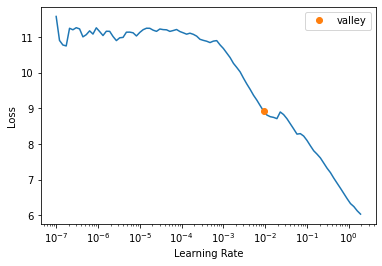

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.00       0.07
1    0.16       0.16
2    0.72       0.68
3    0.17       0.12
4    0.24      -0.03
XGBoost RMSE:  0.56014746


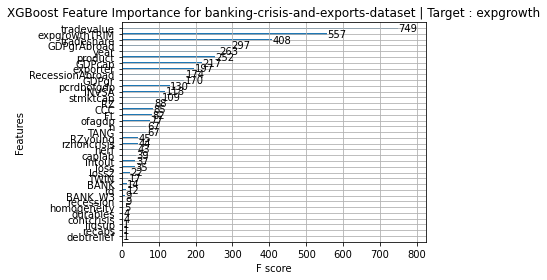

Target Variable: tradeshare
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
43
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps'

  2%|▏         | 1/42 [00:02<01:34,  2.32s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': -0.7489130924007239, 'Adjusted R-Squared': -0.7679230173181231, 'RMSE': 0.05367086493866257, 'Time taken': 2.3154609203338623}


  5%|▍         | 2/42 [00:05<01:42,  2.57s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.6748307215747427, 'Adjusted R-Squared': 0.6712962728962073, 'RMSE': 0.023142444636910023, 'Time taken': 2.7503139972686768}
{'Model': 'BayesianRidge', 'R-Squared': 0.1479671321670567, 'Adjusted R-Squared': 0.13870590534278548, 'RMSE': 0.03746128357526107, 'Time taken': 0.07623720169067383}


 10%|▉         | 4/42 [00:05<00:43,  1.14s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.6827824412035493, 'Adjusted R-Squared': 0.6793344242601096, 'RMSE': 0.02285772950949725, 'Time taken': 0.49064183235168457}
{'Model': 'DummyRegressor', 'R-Squared': -5.4205330801027074e-05, 'Adjusted R-Squared': -0.010924359736570688, 'RMSE': 0.040585067, 'Time taken': 0.03291153907775879}
{'Model': 'ElasticNet', 'R-Squared': -5.4205330801027074e-05, 'Adjusted R-Squared': -0.010924359736570688, 'RMSE': 0.040585067, 'Time taken': 0.04231667518615723}


 17%|█▋        | 7/42 [00:06<00:20,  1.68it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.14794349197838108, 'Adjusted R-Squared': 0.13868200819553733, 'RMSE': 0.037461802, 'Time taken': 0.4927551746368408}


 19%|█▉        | 8/42 [00:06<00:17,  1.93it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.40138968051939306, 'Adjusted R-Squared': 0.39488304661199514, 'RMSE': 0.03139977814018023, 'Time taken': 0.2385561466217041}


 21%|██▏       | 9/42 [00:19<01:57,  3.55s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.8163268080837689, 'Adjusted R-Squared': 0.814330360345549, 'RMSE': 0.0173931149213792, 'Time taken': 13.428656339645386}
GammaRegressor model failed to execute
Some value(s) of y are out of the valid range for family GammaDistribution


 26%|██▌       | 11/42 [01:45<09:55, 19.20s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.3162570704761618, 'Adjusted R-Squared': 0.3088250821117722, 'RMSE': 0.03355837354901323, 'Time taken': 85.10405230522156}


 29%|██▊       | 12/42 [01:45<07:29, 14.97s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.09018796609996305, 'Adjusted R-Squared': 0.08029870486191915, 'RMSE': 0.038710637032341955, 'Time taken': 0.21314597129821777}


 31%|███       | 13/42 [01:51<06:16, 12.99s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.556844076352756, 'Adjusted R-Squared': 0.552027164139199, 'RMSE': 0.02701672855052345, 'Time taken': 6.750375747680664}


 33%|███▎      | 14/42 [01:53<04:39,  9.96s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.6848542567341707, 'Adjusted R-Squared': 0.6814287595247595, 'RMSE': 0.022782962877118784, 'Time taken': 1.1907215118408203}


 36%|███▌      | 15/42 [01:54<03:24,  7.58s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.06029356124049101, 'Adjusted R-Squared': 0.050079360819191954, 'RMSE': 0.039341469795917385, 'Time taken': 1.0815446376800537}


 38%|███▊      | 16/42 [02:00<03:06,  7.18s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.35726715598018166, 'Adjusted R-Squared': 0.35028092941474887, 'RMSE': 0.032536417, 'Time taken': 6.139932632446289}


 40%|████      | 17/42 [02:22<04:44, 11.38s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.05579654665767386, 'Adjusted R-Squared': 0.04553346564308336, 'RMSE': 0.03943549, 'Time taken': 21.967004776000977}
{'Model': 'Lars', 'R-Squared': 0.14730015507570293, 'Adjusted R-Squared': 0.13803167850043874, 'RMSE': 0.03747594317998211, 'Time taken': 0.07951664924621582}


 45%|████▌     | 19/42 [02:22<02:26,  6.38s/it]

{'Model': 'LarsCV', 'R-Squared': 0.1469994736683562, 'Adjusted R-Squared': 0.1377277288169252, 'RMSE': 0.037482550033620346, 'Time taken': 0.34154391288757324}
{'Model': 'Lasso', 'R-Squared': -5.4205330801027074e-05, 'Adjusted R-Squared': -0.010924359736570688, 'RMSE': 0.040585067, 'Time taken': 0.07274675369262695}


 52%|█████▏    | 22/42 [02:23<01:03,  3.16s/it]

{'Model': 'LassoCV', 'R-Squared': 0.14794919779657378, 'Adjusted R-Squared': 0.13868777603349303, 'RMSE': 0.037461676, 'Time taken': 0.5424792766571045}
{'Model': 'LassoLars', 'R-Squared': -5.424032089651476e-05, 'Adjusted R-Squared': -0.010924395106993279, 'RMSE': 0.04058506609995176, 'Time taken': 0.1106119155883789}


 60%|█████▉    | 25/42 [02:23<00:25,  1.51s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.14762822876146697, 'Adjusted R-Squared': 0.1383633182045264, 'RMSE': 0.03746873310851859, 'Time taken': 0.2641885280609131}
{'Model': 'LassoLarsIC', 'R-Squared': 0.14762822876146697, 'Adjusted R-Squared': 0.1383633182045264, 'RMSE': 0.03746873310851859, 'Time taken': 0.08068680763244629}
{'Model': 'LinearRegression', 'R-Squared': 0.14881311480635762, 'Adjusted R-Squared': 0.13956108344555707, 'RMSE': 0.03744268, 'Time taken': 0.08197879791259766}


 62%|██████▏   | 26/42 [02:30<00:41,  2.61s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.07106773326179328, 'Adjusted R-Squared': 0.06097064340594316, 'RMSE': 0.03911528546172422, 'Time taken': 6.412030458450317}


 64%|██████▍   | 27/42 [02:33<00:39,  2.65s/it]

{'Model': 'MLPRegressor', 'R-Squared': -0.04773215708840706, 'Adjusted R-Squared': -0.059120550100237645, 'RMSE': 0.04154125535720886, 'Time taken': 2.7948925495147705}


 67%|██████▋   | 28/42 [22:25<1:12:01, 308.70s/it]

{'Model': 'NuSVR', 'R-Squared': 0.40017267848259097, 'Adjusted R-Squared': 0.3936528162921843, 'RMSE': 0.0314316805230268, 'Time taken': 1192.4362490177155}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.10254341819539081, 'Adjusted R-Squared': 0.09278845534968849, 'RMSE': 0.038446888952187556, 'Time taken': 0.049631595611572266}


 74%|███████▍  | 31/42 [22:25<25:03, 136.66s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.1089664936787671, 'Adjusted R-Squared': 0.0992813468709276, 'RMSE': 0.03830906016355574, 'Time taken': 0.16973400115966797}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.8349216575337652, 'Adjusted R-Squared': -0.8548664581591323, 'RMSE': 0.054974747478519465, 'Time taken': 0.10820937156677246}


 76%|███████▌  | 32/42 [22:26<17:06, 102.64s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.0029796850878002212, 'Adjusted R-Squared': -0.00785749224820198, 'RMSE': 0.04052345664492298, 'Time taken': 0.12148571014404297}


 79%|███████▊  | 33/42 [22:26<11:22, 75.81s/it] 

{'Model': 'RANSACRegressor', 'R-Squared': -86.39534810445396, 'Adjusted R-Squared': -87.34529754037194, 'RMSE': 0.37940112, 'Time taken': 0.42691850662231445}


 81%|████████  | 34/42 [22:53<08:20, 62.59s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.7397790285765609, 'Adjusted R-Squared': 0.7369505397567409, 'RMSE': 0.02070263506616345, 'Time taken': 27.333393335342407}
{'Model': 'Ridge', 'R-Squared': 0.14880937855518983, 'Adjusted R-Squared': 0.13955730658296361, 'RMSE': 0.037442766, 'Time taken': 0.0528867244720459}


 88%|████████▊ | 37/42 [22:54<02:14, 26.86s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.1487224545253515, 'Adjusted R-Squared': 0.13946943772671394, 'RMSE': 0.037444675284771016, 'Time taken': 0.18261241912841797}
{'Model': 'SGDRegressor', 'R-Squared': 0.1363439414422215, 'Adjusted R-Squared': 0.12695637558833262, 'RMSE': 0.03771593614534777, 'Time taken': 0.11364150047302246}


 95%|█████████▌| 40/42 [22:55<00:23, 11.84s/it]

{'Model': 'SVR', 'R-Squared': -0.5487410638721473, 'Adjusted R-Squared': -0.5655752058707577, 'RMSE': 0.05050610608216101, 'Time taken': 1.3106536865234375}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.14881311480635762, 'Adjusted R-Squared': 0.13956108344555707, 'RMSE': 0.03744268, 'Time taken': 0.05113482475280762}
{'Model': 'TweedieRegressor', 'R-Squared': 0.09018796609996305, 'Adjusted R-Squared': 0.08029870486191915, 'RMSE': 0.038710637032341955, 'Time taken': 0.10047364234924316}


 98%|█████████▊| 41/42 [22:57<00:09,  9.64s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.7469606492793992, 'Adjusted R-Squared': 0.7442102215541753, 'RMSE': 0.02041496, 'Time taken': 2.319453477859497}


100%|██████████| 42/42 [22:58<00:00, 32.83s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.7290652990641471, 'Adjusted R-Squared': 0.7261203566626704, 'RMSE': 0.021124517398050244, 'Time taken': 0.7252991199493408}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: tradeshare
tradeshare
Target Standard Deviation: 0.03706669062376022
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.81       0.82  0.02       13.43
XGBRegressor                                 0.74       0.75  0.02        2.32
RandomForestRegressor                        0.74       0.74  0.02       27.33
LGBMRegressor                                0.73       0.73  0.02        0.73
HistGradientBoostingRegressor                0.68       0.68  0.02        1.19
DecisionTreeRegressor                        0.68       0.68  0.02        0.49
BaggingRegressor                             0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,0.242815,0.001858,0.043109,00:17
1,0.004576,0.001756,0.041910,00:17
2,0.008720,0.007719,0.087860,00:17


Better model found at epoch 0 with _rmse value: 0.04310864210128784.
Better model found at epoch 1 with _rmse value: 0.04190952330827713.
No improvement since epoch 1: early stopping


,exporter,year,product,BANK,BANK_W3,TWIN,RZ,FL,TANG,ofagdp,pcrdbofgdp,stmktcap,durables,loss,loss2,GDPcap,developed,developing,blanguar,liqsup,forba,forbb,recaps,debtrelief,policytot,recession,GDPgr,INVSA,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis,tradevalue,expgrowth,expgrowthTRIM,RecessionAbroad,GDPgrAbroad,tradeshare,tradeshare_pred
0,11.00,8.00,27.00,1.00,1.00,1.00,5.00,20.00,3.00,1.00,6.00,39.00,1.00,19.00,20.00,149.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,75.00,67.00,58.00,16.00,2.00,4.00,2.00,1.00,2.00,28.00,16.00,1.00,-0.18,0.67,1.58,-0.73,-1.04,0.00,0.00
1,10.00,2.00,48.00,1.00,1.00,1.00,2.00,6.00,13.00,1.00,42.00,1.00,2.00,19.00,20.00,6.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,222.00,46.00,52.00,2.00,4.00,6.00,3.00,1.00,3.00,11.00,3.00,1.00,-0.19,0.00,0.06,0.22,-0.68,0.00,0.00
2,4.00,16.00,75.00,1.00,2.00,1.00,32.00,7.00,6.00,1.00,17.00,1.00,2.00,10.00,7.00,138.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,153.00,65.00,74.00,31.00,25.00,14.00,6.00,1.00,23.00,3.00,4.00,1.00,-0.19,-1.75,-0.26,-0.73,0.02,0.01,0.00
3,3.00,1.00,61.00,1.00,1.00,1.00,27.00,14.00,10.00,1.00,97.00,38.00,2.00,19.00,20.00,81.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,157.00,69.00,69.00,19.00,14.00,20.00,3.00,1.00,26.00,2.00,15.00,1.00,-0.19,0.37,0.89,-0.01,-0.78,0.00,0.00
4,6.00,8.00,43.00,1.00,1.00,1.00,9.00,29.00,26.00,1.00,75.00,4.00,1.00,19.00,20.00,13.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,212.00,5.00,2.00,23.00,3.00,37.00,1.00,1.00,8.00,29.00,28.00,1.00,0.07,0.14,0.36,-0.73,0.59,0.31,0.00
5,6.00,22.00,36.00,1.00,1.00,1.00,21.00,13.00,21.00,1.00,52.00,89.00,1.00,19.00,20.00,35.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,141.00,28.00,36.00,21.00,11.00,35.00,4.00,2.00,15.00,27.00,22.00,1.00,0.14,-0.20,-0.41,1.45,-0.21,0.04,-0.00
6,5.00,8.00,34.00,1.00,1.00,1.00,16.00,11.00,20.00,1.00,201.00,1.00,1.00,19.00,20.00,226.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,137.00,19.00,24.00,12.00,15.00,27.00,2.00,1.00,16.00,19.00,17.00,1.00,-0.19,0.02,0.11,0.18,-0.39,0.00,-0.00
7,10.00,1.00,40.00,1.00,1.00,1.00,36.00,2.00,6.00,1.00,60.00,1.00,1.00,19.00,20.00,4.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,228.00,39.00,47.00,32.00,30.00,26.00,8.00,1.00,19.00,12.00,9.00,1.00,-0.19,-0.44,-0.97,-0.73,-1.04,0.00,-0.00
8,9.00,9.00,20.00,1.00,1.00,1.00,26.00,25.00,14.00,1.00,249.00,1.00,1.00,19.00,20.00,259.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,242.00,32.00,33.00,17.00,28.00,7.00,2.00,1.00,9.00,20.00,23.00,1.00,-0.18,-0.04,-0.04,-0.31,1.22,0.00,-0.00


<Figure size 432x288 with 0 Axes>

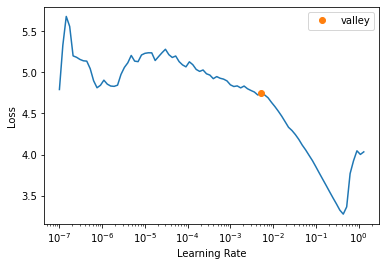

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
   actual  predicted
0    0.01       0.01
1    0.01       0.01
2    0.02       0.01
3    0.00       0.01
4    0.00       0.01
XGBoost RMSE:  0.020408757


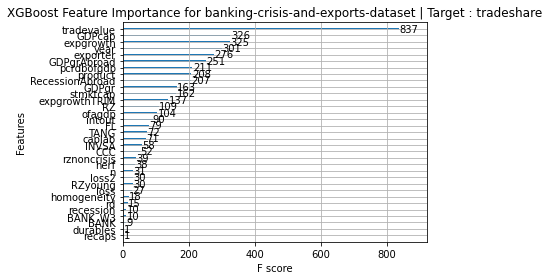

Target Variable: tradevalue
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
43
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps'

  2%|▏         | 1/42 [00:01<01:12,  1.76s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.6429470035146836, 'Adjusted R-Squared': 0.6390659926833214, 'RMSE': 2641909.298366593, 'Time taken': 1.7577691078186035}


  5%|▍         | 2/42 [00:04<01:37,  2.44s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.8936419943513108, 'Adjusted R-Squared': 0.8924859290725207, 'RMSE': 1441905.0235623505, 'Time taken': 2.9118592739105225}
{'Model': 'BayesianRidge', 'R-Squared': 0.22367592363130118, 'Adjusted R-Squared': 0.21523761845338052, 'RMSE': 3895588.6333521935, 'Time taken': 0.0985565185546875}


 10%|▉         | 4/42 [00:05<00:42,  1.12s/it]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.8490639709929564, 'Adjusted R-Squared': 0.8474233619820103, 'RMSE': 1717702.7948264782, 'Time taken': 0.5658953189849854}
{'Model': 'DummyRegressor', 'R-Squared': -0.000577303106405358, 'Adjusted R-Squared': -0.011453143357561979, 'RMSE': 4422592.0, 'Time taken': 0.03565788269042969}


 14%|█▍        | 6/42 [00:06<00:30,  1.17it/s]

{'Model': 'ElasticNet', 'R-Squared': 0.19211886338318396, 'Adjusted R-Squared': 0.18333754668082725, 'RMSE': 3973976.5, 'Time taken': 1.0920672416687012}


 17%|█▋        | 7/42 [00:06<00:26,  1.34it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 1.723297968281301e-05, 'Adjusted R-Squared': -0.010852144922711915, 'RMSE': 4421278.0, 'Time taken': 0.4054296016693115}


 19%|█▉        | 8/42 [00:07<00:20,  1.64it/s]

{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9630238514234977, 'Adjusted R-Squared': 0.9626219367650575, 'RMSE': 850182.9652254004, 'Time taken': 0.2352142333984375}


 24%|██▍       | 10/42 [00:20<01:37,  3.05s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9814307203292676, 'Adjusted R-Squared': 0.9812288803328466, 'RMSE': 602488.9566620765, 'Time taken': 13.568528175354004}
{'Model': 'GammaRegressor', 'R-Squared': 0.15019154850963723, 'Adjusted R-Squared': 0.14095450012387234, 'RMSE': 4075792.68270894, 'Time taken': 0.19052362442016602}


 26%|██▌       | 11/42 [01:55<15:05, 29.21s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.823816111006194, 'Adjusted R-Squared': 0.8219010687345222, 'RMSE': 1855814.9048457043, 'Time taken': 94.21581935882568}


 29%|██▊       | 12/42 [01:55<10:24, 20.81s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.16760461902088253, 'Adjusted R-Squared': 0.15855684314067464, 'RMSE': 4033818.8689517137, 'Time taken': 0.3068525791168213}


 31%|███       | 13/42 [02:02<08:03, 16.69s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.8930687606455425, 'Adjusted R-Squared': 0.8919064645656027, 'RMSE': 1445785.4923705594, 'Time taken': 6.768290281295776}


 33%|███▎      | 14/42 [02:02<05:34, 11.96s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9318015245343758, 'Adjusted R-Squared': 0.9310602367575755, 'RMSE': 1154619.5203014154, 'Time taken': 0.6692819595336914}


 36%|███▌      | 15/42 [02:03<03:55,  8.71s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.02197520498017813, 'Adjusted R-Squared': 0.011344500686484404, 'RMSE': 4372466.541870775, 'Time taken': 1.022136926651001}


 38%|███▊      | 16/42 [02:10<03:29,  8.07s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.8938297820508316, 'Adjusted R-Squared': 0.8926757579426885, 'RMSE': 1440631.5, 'Time taken': 6.564830780029297}


 40%|████      | 17/42 [02:32<05:05, 12.22s/it]

{'Model': 'KernelRidge', 'R-Squared': 0.18801431449622286, 'Adjusted R-Squared': 0.17918838313205132, 'RMSE': 3984059.0, 'Time taken': 21.972506999969482}
{'Model': 'Lars', 'R-Squared': 0.07075933922471833, 'Adjusted R-Squared': 0.060658897259769584, 'RMSE': 4262021.780730045, 'Time taken': 0.07247591018676758}


 45%|████▌     | 19/42 [02:32<02:34,  6.70s/it]

{'Model': 'LarsCV', 'R-Squared': 0.21445754812625317, 'Adjusted R-Squared': 0.205919043214582, 'RMSE': 3918649.2486894666, 'Time taken': 0.37108635902404785}


 48%|████▊     | 20/42 [02:33<01:56,  5.31s/it]

{'Model': 'Lasso', 'R-Squared': 0.22421033161832815, 'Adjusted R-Squared': 0.2157778352228752, 'RMSE': 3894247.5, 'Time taken': 1.0611798763275146}


 52%|█████▏    | 22/42 [02:34<00:59,  3.00s/it]

{'Model': 'LassoCV', 'R-Squared': 0.22375568076156094, 'Adjusted R-Squared': 0.21531824250896914, 'RMSE': 3895388.5, 'Time taken': 0.550614595413208}
{'Model': 'LassoLars', 'R-Squared': 0.22419550886867035, 'Adjusted R-Squared': 0.2157628513563733, 'RMSE': 3894284.777658961, 'Time taken': 0.12915349006652832}


 60%|█████▉    | 25/42 [02:35<00:21,  1.28s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.22373359776879076, 'Adjusted R-Squared': 0.21529591948366888, 'RMSE': 3895443.926460908, 'Time taken': 0.2856924533843994}
{'Model': 'LassoLarsIC', 'R-Squared': 0.22338889998419675, 'Adjusted R-Squared': 0.2149474749840249, 'RMSE': 3896308.708100295, 'Time taken': 0.08661389350891113}
{'Model': 'LinearRegression', 'R-Squared': 0.22421502118040815, 'Adjusted R-Squared': 0.21578257575845605, 'RMSE': 3894235.8, 'Time taken': 0.0839242935180664}


 62%|██████▏   | 26/42 [02:35<00:16,  1.01s/it]

{'Model': 'LinearSVR', 'R-Squared': -0.03705450678693589, 'Adjusted R-Squared': -0.048326838382446224, 'RMSE': 4502485.821838495, 'Time taken': 0.12767982482910156}


 64%|██████▍   | 27/42 [02:57<01:38,  6.56s/it]

{'Model': 'MLPRegressor', 'R-Squared': -0.008071909829056256, 'Adjusted R-Squared': -0.01902921319676354, 'RMSE': 4439124.433300637, 'Time taken': 22.688406705856323}


 71%|███████▏  | 30/42 [03:35<01:40,  8.38s/it]

{'Model': 'NuSVR', 'R-Squared': -0.03146543089990628, 'Adjusted R-Squared': -0.042677011670557485, 'RMSE': 4490336.637780529, 'Time taken': 37.00029492378235}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.1983879063345677, 'Adjusted R-Squared': 0.18967473140342161, 'RMSE': 3958527.7397697517, 'Time taken': 0.045032501220703125}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.20236156513305759, 'Adjusted R-Squared': 0.1936915821453734, 'RMSE': 3948704.1725439383, 'Time taken': 0.1497659683227539}


 74%|███████▍  | 31/42 [03:38<01:18,  7.12s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.015139620283525668, 'Adjusted R-Squared': 0.004434616156172688, 'RMSE': 4387719.899197997, 'Time taken': 3.069444179534912}


 76%|███████▌  | 32/42 [03:39<00:55,  5.54s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7360697164114194, 'Adjusted R-Squared': 0.7332009089811087, 'RMSE': 2271413.3528995025, 'Time taken': 0.861767053604126}


 79%|███████▊  | 33/42 [03:39<00:37,  4.17s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.025224040481778842, 'Adjusted R-Squared': 0.014628649617450251, 'RMSE': 4365198.5, 'Time taken': 0.3717224597930908}


 81%|████████  | 34/42 [04:08<01:27, 10.94s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.8918060863508301, 'Adjusted R-Squared': 0.8906300655502957, 'RMSE': 1454296.5626741517, 'Time taken': 28.82563066482544}
{'Model': 'Ridge', 'R-Squared': 0.2242077451454615, 'Adjusted R-Squared': 0.21577522063617294, 'RMSE': 3894254.2, 'Time taken': 0.06436991691589355}


 88%|████████▊ | 37/42 [04:08<00:23,  4.76s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.22418196755553643, 'Adjusted R-Squared': 0.21574916285505308, 'RMSE': 3894318.7639919226, 'Time taken': 0.20807361602783203}
{'Model': 'SGDRegressor', 'R-Squared': 0.2164296905166172, 'Adjusted R-Squared': 0.20791262193527604, 'RMSE': 3913727.1780617083, 'Time taken': 0.19155621528625488}


 93%|█████████▎| 39/42 [04:45<00:28,  9.43s/it]

{'Model': 'SVR', 'R-Squared': -0.03703544805745995, 'Adjusted R-Squared': -0.04830757249286721, 'RMSE': 4502444.448866802, 'Time taken': 36.404361724853516}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.22421502118040815, 'Adjusted R-Squared': 0.21578257575845605, 'RMSE': 3894235.8, 'Time taken': 0.11726927757263184}


 95%|█████████▌| 40/42 [04:45<00:13,  6.94s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.16760461902088253, 'Adjusted R-Squared': 0.15855684314067464, 'RMSE': 4033818.8689517137, 'Time taken': 0.4139821529388428}


 98%|█████████▊| 41/42 [04:48<00:05,  5.75s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.8530499039035975, 'Adjusted R-Squared': 0.8514526202503757, 'RMSE': 1694870.2, 'Time taken': 2.7119059562683105}


100%|██████████| 42/42 [04:48<00:00,  6.88s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9296899323149701, 'Adjusted R-Squared': 0.9289256924488285, 'RMSE': 1172358.186247061, 'Time taken': 0.4279508590698242}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: tradevalue
tradevalue
Target Standard Deviation: 4100272.5
                               Adjusted R-Squared  R-Squared       RMSE  \
Model                                                                     
ExtraTreesRegressor                          0.98       0.98  602488.96   
ExtraTreeRegressor                           0.96       0.96  850182.97   
HistGradientBoostingRegressor                0.93       0.93 1154619.52   
LGBMRegressor                                0.93       0.93 1172358.19   
KNeighborsRegressor                          0.89       0.89 1440631.50   
BaggingRegressor                             0.89       0.89 1441905.02   
GradientBoostingRegressor                    0.89       0.89 1445785.49   
RandomForestRegr

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,16042993647616.000000,20307536510976.000000,4506389.000000,00:17
1,19789844054016.000000,20221221928960.000000,4496801.500000,00:19
2,21783273013248.000000,19841163460608.000000,4454342.000000,00:17
3,17284575789056.000000,18475743444992.000000,4298342.000000,00:17
4,10263665311744.000000,18410310205440.000000,4290723.500000,00:17
5,16117034647552.000000,16779506089984.000000,4096279.500000,00:17
6,16795128823808.000000,18015387123712.000000,4244453.500000,00:17


Better model found at epoch 0 with _rmse value: 4506389.0.
Better model found at epoch 1 with _rmse value: 4496801.5.
Better model found at epoch 2 with _rmse value: 4454342.0.
Better model found at epoch 3 with _rmse value: 4298342.0.
Better model found at epoch 4 with _rmse value: 4290723.5.
Better model found at epoch 5 with _rmse value: 4096279.5.
No improvement since epoch 5: early stopping


,exporter,year,product,BANK,BANK_W3,TWIN,RZ,FL,TANG,ofagdp,pcrdbofgdp,stmktcap,durables,loss,loss2,GDPcap,developed,developing,blanguar,liqsup,forba,forbb,recaps,debtrelief,policytot,recession,GDPgr,INVSA,CCC,RZyoung,rznoncrisis,caplab,rd,homogeneity,n,herf,intout,contcrisis,tradeshare,expgrowth,expgrowthTRIM,RecessionAbroad,GDPgrAbroad,tradevalue,tradevalue_pred
0,2.00,14.00,58.00,1.00,1.00,1.00,20.00,16.00,13.00,1.00,135.00,1.00,2.00,19.00,20.00,51.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,167.00,49.00,43.00,24.00,19.00,17.00,2.00,1.00,21.00,17.00,14.00,1.00,-0.24,-0.09,-0.16,-0.73,-0.13,346.17,489000.09
1,10.00,14.00,68.00,1.00,1.00,1.00,31.00,12.00,9.00,1.00,5.00,110.00,2.00,19.00,20.00,25.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,246.00,63.00,65.00,28.00,24.00,15.00,5.00,1.00,25.00,8.00,7.00,1.00,-0.24,0.49,1.17,-0.73,-0.62,13041.30,435609.44
2,7.00,10.00,68.00,1.00,1.00,1.00,31.00,12.00,9.00,1.00,167.00,95.00,2.00,19.00,20.00,209.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,130.00,63.00,65.00,28.00,24.00,15.00,5.00,1.00,25.00,8.00,7.00,1.00,-0.06,0.04,0.14,-0.07,0.20,1255309.38,3101401.25
3,7.00,2.00,42.00,1.00,1.00,1.00,18.00,23.00,12.00,1.00,162.00,1.00,1.00,19.00,20.00,198.00,2.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,2.00,47.00,21.00,38.00,29.00,9.00,25.00,3.00,1.00,19.00,12.00,9.00,1.00,-0.20,-0.22,-0.46,1.64,-0.83,325706.22,872200.44
4,8.00,22.00,23.00,1.00,1.00,1.00,8.00,27.00,5.00,1.00,219.00,183.00,1.00,19.00,20.00,97.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,210.00,54.00,51.00,8.00,18.00,2.00,1.00,1.00,7.00,22.00,20.00,1.00,0.56,0.57,1.37,1.16,-0.71,75812.55,1036312.00
5,1.00,17.00,60.00,1.00,2.00,1.00,27.00,14.00,10.00,12.00,71.00,87.00,2.00,8.00,4.00,188.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,218.00,60.00,67.00,19.00,14.00,20.00,3.00,1.00,26.00,2.00,15.00,1.00,-0.28,0.02,0.10,-0.71,0.70,17489.04,518511.62
6,3.00,15.00,54.00,1.00,1.00,1.00,7.00,10.00,15.00,22.00,108.00,80.00,2.00,19.00,20.00,113.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,225.00,29.00,30.00,10.00,21.00,28.00,2.00,2.00,13.00,13.00,27.00,1.00,-0.19,1.76,-0.26,-0.73,0.43,102213.68,503317.94
7,8.00,2.00,10.00,1.00,1.00,1.00,6.00,1.00,1.00,39.00,145.00,165.00,1.00,19.00,20.00,103.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,182.00,13.00,12.00,5.00,12.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,-0.31,-0.14,-0.26,-0.73,-1.05,4080.24,436016.59
8,11.00,10.00,7.00,1.00,1.00,1.00,13.00,28.00,17.00,1.00,20.00,58.00,1.00,19.00,20.00,152.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,164.00,3.00,9.00,17.00,16.00,22.00,2.00,1.00,24.00,7.00,26.00,1.00,-0.28,0.05,0.17,-0.73,-0.06,18426.72,456974.75


<Figure size 432x288 with 0 Axes>

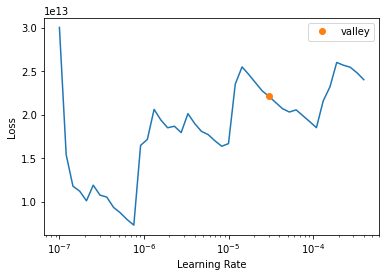

<Figure size 720x720 with 0 Axes>

XGBoost Predictions vs Actual==========
      actual  predicted
0    1643.18   -4028.58
1 4403939.50 3853005.50
2  144691.62  130050.28
3    7988.47    5764.27
4   13553.00   14519.96
XGBoost RMSE:  1694800.0


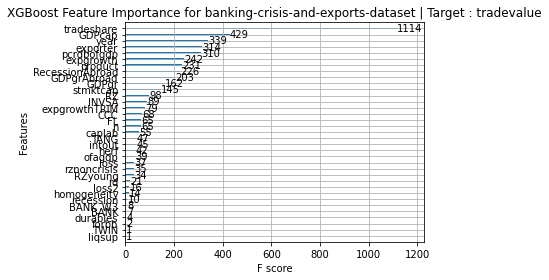

Target Variable: product
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', '

  2%|▏         | 1/42 [00:03<02:28,  3.63s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.9733094217911263, 'Adjusted R-Squared': 0.9730193068105951, 'RMSE': 3.816252025662518, 'Time taken': 3.632652759552002}


  7%|▋         | 3/42 [00:04<00:45,  1.18s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.9853184223175049}
{'Model': 'BayesianRidge', 'R-Squared': 0.8121490520099173, 'Adjusted R-Squared': 0.8101071938795903, 'RMSE': 10.124294095546873, 'Time taken': 0.10230040550231934}


 10%|▉         | 4/42 [00:04<00:30,  1.23it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 0.25115489959716797}
{'Model': 'DummyRegressor', 'R-Squared': -0.00012942865346055044, 'Adjusted R-Squared': -0.011000400704041624, 'RMSE': 23.360716555790834, 'Time taken': 0.03194022178649902}
{'Model': 'ElasticNet', 'R-Squared': 0.7337179082341996, 'Adjusted R-Squared': 0.7308235376715277, 'RMSE': 12.05394, 'Time taken': 0.054660797119140625}


 19%|█▉        | 8/42 [00:05<00:12,  2.82it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.8117426888525634, 'Adjusted R-Squared': 0.8096964137313956, 'RMSE': 10.135239, 'Time taken': 0.496551513671875}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9999981673316212, 'Adjusted R-Squared': 0.9999981474113127, 'RMSE': 0.03162277660168379, 'Time taken': 0.11882138252258301}


 24%|██▍       | 10/42 [00:08<00:25,  1.25it/s]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999999894163402, 'Adjusted R-Squared': 0.9999999893013004, 'RMSE': 0.0024031229681395704, 'Time taken': 3.0966928005218506}
{'Model': 'GammaRegressor', 'R-Squared': 0.6615743575355695, 'Adjusted R-Squared': 0.6578958179435648, 'RMSE': 13.589068497307574, 'Time taken': 0.12619686126708984}


 29%|██▊       | 12/42 [01:29<08:04, 16.16s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': 0.007520253025078305, 'Adjusted R-Squared': -0.0032675703116056276, 'RMSE': 23.27120560720082, 'Time taken': 80.18618631362915}
{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.6967997301035918, 'Adjusted R-Squared': 0.6935040749960221, 'RMSE': 12.862424794986666, 'Time taken': 0.14869332313537598}


 31%|███       | 13/42 [01:36<06:33, 13.57s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9991998957953618, 'Adjusted R-Squared': 0.9991911990105288, 'RMSE': 0.6607411168276164, 'Time taken': 7.095207929611206}


 33%|███▎      | 14/42 [01:37<04:41, 10.04s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9999999741508937, 'Adjusted R-Squared': 0.9999999738699251, 'RMSE': 0.003755612910487643, 'Time taken': 1.3809142112731934}


 36%|███▌      | 15/42 [01:38<03:19,  7.40s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.79711200366433, 'Adjusted R-Squared': 0.7949066993563336, 'RMSE': 10.52170771680666, 'Time taken': 1.017164945602417}


 38%|███▊      | 16/42 [01:44<03:03,  7.04s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.9611004774047407, 'Adjusted R-Squared': 0.9606776565069661, 'RMSE': 4.607127087459169, 'Time taken': 6.186285972595215}


 43%|████▎     | 18/42 [02:07<03:14,  8.11s/it]

{'Model': 'KernelRidge', 'R-Squared': -2.1637997256344987, 'Adjusted R-Squared': -2.1981888530870477, 'RMSE': 41.549187, 'Time taken': 22.073490619659424}
{'Model': 'Lars', 'R-Squared': 0.7943697192916137, 'Adjusted R-Squared': 0.7921346075447834, 'RMSE': 10.592576054861171, 'Time taken': 0.10458898544311523}


 48%|████▊     | 20/42 [02:07<01:29,  4.09s/it]

{'Model': 'LarsCV', 'R-Squared': 0.8117855097654597, 'Adjusted R-Squared': 0.8097397000889973, 'RMSE': 10.134085980061894, 'Time taken': 0.3084993362426758}
{'Model': 'Lasso', 'R-Squared': 0.7784429009987534, 'Adjusted R-Squared': 0.7760346716617833, 'RMSE': 10.995143, 'Time taken': 0.10541367530822754}


 52%|█████▏    | 22/42 [02:08<00:43,  2.15s/it]

{'Model': 'LassoCV', 'R-Squared': 0.8123666921547874, 'Adjusted R-Squared': 0.810327199678209, 'RMSE': 10.118427, 'Time taken': 0.5461814403533936}
{'Model': 'LassoLars', 'R-Squared': -0.00012942838592633343, 'Adjusted R-Squared': -0.011000400433599511, 'RMSE': 23.360716552666343, 'Time taken': 0.10077714920043945}


 60%|█████▉    | 25/42 [02:08<00:15,  1.12it/s]

{'Model': 'LassoLarsCV', 'R-Squared': 0.8123771351796464, 'Adjusted R-Squared': 0.8103377562142078, 'RMSE': 10.118145916699989, 'Time taken': 0.2669825553894043}
{'Model': 'LassoLarsIC', 'R-Squared': 0.8123889133855045, 'Adjusted R-Squared': 0.8103496624440425, 'RMSE': 10.117828323543124, 'Time taken': 0.08495068550109863}
{'Model': 'LinearRegression', 'R-Squared': 0.8121226688572833, 'Adjusted R-Squared': 0.8100805239535581, 'RMSE': 10.125006, 'Time taken': 0.06632614135742188}


 62%|██████▏   | 26/42 [02:10<00:16,  1.06s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.7839504833263432, 'Adjusted R-Squared': 0.781602119014673, 'RMSE': 10.857621708322737, 'Time taken': 1.5737130641937256}


 64%|██████▍   | 27/42 [02:35<01:49,  7.31s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.9990422372217936, 'Adjusted R-Squared': 0.9990318267568131, 'RMSE': 0.7229146638269647, 'Time taken': 24.966326236724854}


 67%|██████▋   | 28/42 [03:06<03:14, 13.86s/it]

{'Model': 'NuSVR', 'R-Squared': 0.9147761745208685, 'Adjusted R-Squared': 0.9138498285917475, 'RMSE': 6.819280723936595, 'Time taken': 31.385136127471924}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.7447300100460739, 'Adjusted R-Squared': 0.7419553362422269, 'RMSE': 11.802063238698171, 'Time taken': 0.049254655838012695}


 74%|███████▍  | 31/42 [03:06<01:06,  6.01s/it]

{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.7809977776242659, 'Adjusted R-Squared': 0.7786173186853993, 'RMSE': 10.931564402046378, 'Time taken': 0.15592336654663086}
{'Model': 'PassiveAggressiveRegressor', 'R-Squared': 0.603074598815871, 'Adjusted R-Squared': 0.5987601922812609, 'RMSE': 14.716770011900438, 'Time taken': 0.12799739837646484}


 76%|███████▌  | 32/42 [03:07<00:46,  4.61s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.7365339438624086, 'Adjusted R-Squared': 0.7336701823826521, 'RMSE': 11.990033374606508, 'Time taken': 0.48914456367492676}


 79%|███████▊  | 33/42 [03:07<00:31,  3.49s/it]

{'Model': 'RANSACRegressor', 'R-Squared': 0.7182877449288038, 'Adjusted R-Squared': 0.715225655199769, 'RMSE': 12.398265, 'Time taken': 0.39272093772888184}


 81%|████████  | 34/42 [03:17<00:40,  5.12s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 1.0, 'Adjusted R-Squared': 1.0, 'RMSE': 0.0, 'Time taken': 9.406832695007324}
{'Model': 'Ridge', 'R-Squared': 0.8121189208400186, 'Adjusted R-Squared': 0.8100767351969753, 'RMSE': 10.125106, 'Time taken': 0.05640554428100586}


 86%|████████▌ | 36/42 [03:17<00:17,  2.92s/it]

{'Model': 'RidgeCV', 'R-Squared': 0.8121505114974068, 'Adjusted R-Squared': 0.8101086692310743, 'RMSE': 10.124254765670099, 'Time taken': 0.18299293518066406}


 88%|████████▊ | 37/42 [03:17<00:11,  2.29s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.8109381721698238, 'Adjusted R-Squared': 0.8088831523021045, 'RMSE': 10.156872082019474, 'Time taken': 0.2840006351470947}


 90%|█████████ | 38/42 [03:46<00:36,  9.10s/it]

{'Model': 'SVR', 'R-Squared': 0.9179833683127013, 'Adjusted R-Squared': 0.9170918831856655, 'RMSE': 6.689736648469748, 'Time taken': 29.031898975372314}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.8121226688572833, 'Adjusted R-Squared': 0.8100805239535581, 'RMSE': 10.125006, 'Time taken': 0.055123090744018555}


 95%|█████████▌| 40/42 [03:46<00:10,  5.32s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.6967997301035918, 'Adjusted R-Squared': 0.6935040749960221, 'RMSE': 12.862424794986666, 'Time taken': 0.18699264526367188}


 98%|█████████▊| 41/42 [03:48<00:04,  4.51s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.999999981861295, 'Adjusted R-Squared': 0.9999999816641352, 'RMSE': 0.0031460181, 'Time taken': 1.8347373008728027}


100%|██████████| 42/42 [03:49<00:00,  5.46s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9999999750234561, 'Adjusted R-Squared': 0.9999999747519719, 'RMSE': 0.003691681531733914, 'Time taken': 0.5606839656829834}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: product
product
Target Standard Deviation: 23.387624927512412
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
DecisionTreeRegressor                        1.00       1.00  0.00        0.25
RandomForestRegressor                        1.00       1.00  0.00        9.41
BaggingRegressor                             1.00       1.00  0.00        0.99
ExtraTreesRegressor                          1.00       1.00  0.00        3.10
XGBRegressor                                 1.00       1.00  0.00        1.83
LGBMRegressor                                1.00       1.00  0.00        0.56
HistGradientBoostingRegressor                1.00    

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,375.365967,397.525635,19.938046,00:17
1,89.467590,67.363953,8.207555,00:17
2,29.798460,145.067871,12.044412,00:17


Better model found at epoch 0 with _rmse value: 19.938045501708984.
Better model found at epoch 1 with _rmse value: 8.207554817199707.
No improvement since epoch 1: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      19      19.00
1      58      58.00
2      59      59.00
3      22      22.00
4      53      53.00
XGBoost RMSE:  0.003146017


<Figure size 432x288 with 0 Axes>

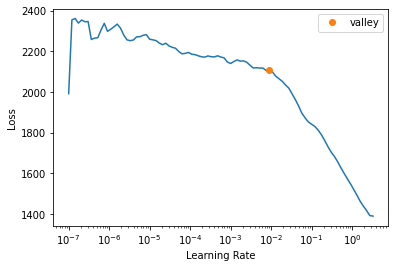

<Figure size 720x720 with 0 Axes>

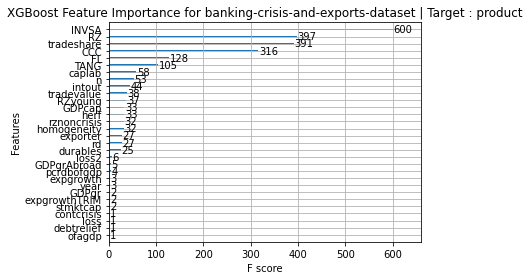

Target Variable: year
CATS=====================
['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'forba', 'forbb', 'recaps', 'debtrelief', 'policytot', 'recession', 'GDPgr', 'INVSA', 'CCC', 'RZyoung', 'rznoncrisis', 'caplab', 'rd', 'homogeneity', 'n', 'herf', 'intout', 'contcrisis']
CONTS=====================
['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
44
Looping through continuous variables to find breakpoint
Continuous variables that made the cut : ['tradevalue', 'tradeshare', 'expgrowth', 'expgrowthTRIM', 'RecessionAbroad', 'GDPgrAbroad']
Categorical variables that made the cut : ['exporter', 'year', 'product', 'BANK', 'BANK_W3', 'TWIN', 'RZ', 'FL', 'TANG', 'ofagdp', 'pcrdbofgdp', 'stmktcap', 'durables', 'loss', 'loss2', 'GDPcap', 'developed', 'developing', 'blanguar', 'liqsup', 'for

  2%|▏         | 1/42 [00:01<01:08,  1.67s/it]

{'Model': 'AdaBoostRegressor', 'R-Squared': 0.7219725058986799, 'Adjusted R-Squared': 0.7189504679193177, 'RMSE': 4.047219218546259, 'Time taken': 1.6695165634155273}


  5%|▍         | 2/42 [00:03<01:02,  1.56s/it]

{'Model': 'BaggingRegressor', 'R-Squared': 0.9998928965039451, 'Adjusted R-Squared': 0.9998917323355097, 'RMSE': 0.07943550843294202, 'Time taken': 1.4775443077087402}
{'Model': 'BayesianRidge', 'R-Squared': 0.5439661078762645, 'Adjusted R-Squared': 0.5390092177444847, 'RMSE': 5.183360515841844, 'Time taken': 0.06888604164123535}


 10%|▉         | 4/42 [00:03<00:26,  1.44it/s]

{'Model': 'DecisionTreeRegressor', 'R-Squared': 0.999579903085997, 'Adjusted R-Squared': 0.9995753368151926, 'RMSE': 0.15732132722552272, 'Time taken': 0.2969624996185303}
{'Model': 'DummyRegressor', 'R-Squared': -0.00030477818940766177, 'Adjusted R-Squared': -0.011177656213205545, 'RMSE': 7.676778812594511, 'Time taken': 0.03467726707458496}
{'Model': 'ElasticNet', 'R-Squared': 0.40596595944162783, 'Adjusted R-Squared': 0.39950906769642813, 'RMSE': 5.9158688, 'Time taken': 0.041871070861816406}


 19%|█▉        | 8/42 [00:04<00:12,  2.82it/s]

{'Model': 'ElasticNetCV', 'R-Squared': 0.5439915470949981, 'Adjusted R-Squared': 0.5390349334764655, 'RMSE': 5.183216, 'Time taken': 0.5154039859771729}
{'Model': 'ExtraTreeRegressor', 'R-Squared': 0.9997666128255539, 'Adjusted R-Squared': 0.9997640760084403, 'RMSE': 0.11726039399558574, 'Time taken': 0.1463456153869629}


 24%|██▍       | 10/42 [00:08<00:32,  1.00s/it]

{'Model': 'ExtraTreesRegressor', 'R-Squared': 0.9999293167846875, 'Adjusted R-Squared': 0.9999285484888689, 'RMSE': 0.06453138771171746, 'Time taken': 4.380131244659424}
{'Model': 'GammaRegressor', 'R-Squared': 0.3826086879628091, 'Adjusted R-Squared': 0.37589791283197005, 'RMSE': 6.031052554080753, 'Time taken': 0.12377119064331055}


 26%|██▌       | 11/42 [01:42<13:10, 25.52s/it]

{'Model': 'GaussianProcessRegressor', 'R-Squared': -0.0063219886861631824, 'Adjusted R-Squared': -0.017260271171882335, 'RMSE': 7.699833553729875, 'Time taken': 93.88250708580017}


 29%|██▊       | 12/42 [01:43<09:22, 18.73s/it]

{'Model': 'GeneralizedLinearRegressor', 'R-Squared': 0.3937919566172092, 'Adjusted R-Squared': 0.38720273875435274, 'RMSE': 5.976180460396432, 'Time taken': 0.7283604145050049}


 31%|███       | 13/42 [01:51<07:37, 15.78s/it]

{'Model': 'GradientBoostingRegressor', 'R-Squared': 0.9616849121215316, 'Adjusted R-Squared': 0.9612684437750265, 'RMSE': 1.5024421848171894, 'Time taken': 8.23203706741333}


 33%|███▎      | 14/42 [01:52<05:25, 11.63s/it]

{'Model': 'HistGradientBoostingRegressor', 'R-Squared': 0.9993810117559502, 'Adjusted R-Squared': 0.9993742836228626, 'RMSE': 0.19096512279152206, 'Time taken': 1.281019687652588}


 36%|███▌      | 15/42 [01:53<03:49,  8.49s/it]

{'Model': 'HuberRegressor', 'R-Squared': 0.5289702665810241, 'Adjusted R-Squared': 0.523850378174296, 'RMSE': 5.2678938752841, 'Time taken': 0.823103666305542}


 38%|███▊      | 16/42 [02:00<03:27,  8.00s/it]

{'Model': 'KNeighborsRegressor', 'R-Squared': 0.7366179058940925, 'Adjusted R-Squared': 0.7337550570451152, 'RMSE': 3.939181387039698, 'Time taken': 6.801693916320801}


 40%|████      | 17/42 [02:23<05:08, 12.34s/it]

{'Model': 'KernelRidge', 'R-Squared': -3.024993850380663, 'Adjusted R-Squared': -3.0687437835369744, 'RMSE': 15.399105, 'Time taken': 22.715468168258667}
{'Model': 'Lars', 'R-Squared': 0.5407965035986307, 'Adjusted R-Squared': 0.5358051612464418, 'RMSE': 5.201342461336884, 'Time taken': 0.07495665550231934}


 45%|████▌     | 19/42 [02:23<02:36,  6.79s/it]

{'Model': 'LarsCV', 'R-Squared': 0.541969515717792, 'Adjusted R-Squared': 0.5369909234973331, 'RMSE': 5.194694930230094, 'Time taken': 0.32381749153137207}
{'Model': 'Lasso', 'R-Squared': 0.43212903383385437, 'Adjusted R-Squared': 0.42595652333204836, 'RMSE': 5.7841253, 'Time taken': 0.09196949005126953}


 52%|█████▏    | 22/42 [02:24<01:07,  3.35s/it]

{'Model': 'LassoCV', 'R-Squared': 0.5440850552749372, 'Adjusted R-Squared': 0.5391294580496648, 'RMSE': 5.1826844, 'Time taken': 0.7368848323822021}
{'Model': 'LassoLars', 'R-Squared': -0.0003047788141081753, 'Adjusted R-Squared': -0.011177656844696404, 'RMSE': 7.676778814991625, 'Time taken': 0.1130530834197998}


 60%|█████▉    | 25/42 [02:25<00:27,  1.59s/it]

{'Model': 'LassoLarsCV', 'R-Squared': 0.5440842139222188, 'Adjusted R-Squared': 0.5391286075518081, 'RMSE': 5.182689265450386, 'Time taken': 0.29424381256103516}
{'Model': 'LassoLarsIC', 'R-Squared': 0.5439686078741495, 'Adjusted R-Squared': 0.5390117449162597, 'RMSE': 5.183346308117035, 'Time taken': 0.08664059638977051}
{'Model': 'LinearRegression', 'R-Squared': 0.5439338103213942, 'Adjusted R-Squared': 0.5389765691292354, 'RMSE': 5.183544, 'Time taken': 0.07671427726745605}


 62%|██████▏   | 26/42 [02:26<00:24,  1.53s/it]

{'Model': 'LinearSVR', 'R-Squared': 0.5159864193582191, 'Adjusted R-Squared': 0.5107254021773302, 'RMSE': 5.340004582483737, 'Time taken': 1.3097119331359863}


 64%|██████▍   | 27/42 [02:52<01:52,  7.47s/it]

{'Model': 'MLPRegressor', 'R-Squared': 0.979696596060383, 'Adjusted R-Squared': 0.9794759068871263, 'RMSE': 1.0936976615387286, 'Time taken': 25.97738218307495}


 71%|███████▏  | 30/42 [03:24<01:35,  7.96s/it]

{'Model': 'NuSVR', 'R-Squared': 0.7499691177887138, 'Adjusted R-Squared': 0.7472513908081564, 'RMSE': 3.8380416437475904, 'Time taken': 31.84939408302307}
{'Model': 'OrthogonalMatchingPursuit', 'R-Squared': 0.4987917239931734, 'Adjusted R-Squared': 0.49334380794962096, 'RMSE': 5.434029262142993, 'Time taken': 0.04434919357299805}
{'Model': 'OrthogonalMatchingPursuitCV', 'R-Squared': 0.5194597110731882, 'Adjusted R-Squared': 0.5142364470631142, 'RMSE': 5.32081009242603, 'Time taken': 0.14787745475769043}


 74%|███████▍  | 31/42 [03:24<01:07,  6.15s/it]

{'Model': 'PassiveAggressiveRegressor', 'R-Squared': -0.08788770096140608, 'Adjusted R-Squared': -0.09971256727620403, 'RMSE': 8.005802821249793, 'Time taken': 0.15363526344299316}


 76%|███████▌  | 32/42 [03:25<00:47,  4.72s/it]

{'Model': 'PoissonRegressor', 'R-Squared': 0.4937901372982565, 'Adjusted R-Squared': 0.48828785618193316, 'RMSE': 5.461075204262276, 'Time taken': 0.4297451972961426}


 79%|███████▊  | 33/42 [03:25<00:32,  3.62s/it]

{'Model': 'RANSACRegressor', 'R-Squared': -0.24920498852282869, 'Adjusted R-Squared': -0.2627833036154681, 'RMSE': 8.578863, 'Time taken': 0.51554274559021}


 86%|████████▌ | 36/42 [03:40<00:22,  3.74s/it]

{'Model': 'RandomForestRegressor', 'R-Squared': 0.9998656071781475, 'Adjusted R-Squared': 0.9998641463866057, 'RMSE': 0.08898173969978333, 'Time taken': 14.494334936141968}
{'Model': 'Ridge', 'R-Squared': 0.5439363140340108, 'Adjusted R-Squared': 0.5389791000561195, 'RMSE': 5.18353, 'Time taken': 0.057840824127197266}
{'Model': 'RidgeCV', 'R-Squared': 0.5439513182806708, 'Adjusted R-Squared': 0.5389942673924172, 'RMSE': 5.183444565718008, 'Time taken': 0.12860703468322754}


 88%|████████▊ | 37/42 [03:40<00:14,  2.90s/it]

{'Model': 'SGDRegressor', 'R-Squared': 0.5416252460228694, 'Adjusted R-Squared': 0.5366429117405094, 'RMSE': 5.19664680917367, 'Time taken': 0.22020220756530762}


 90%|█████████ | 38/42 [04:09<00:38,  9.61s/it]

{'Model': 'SVR', 'R-Squared': 0.7509346585983115, 'Adjusted R-Squared': 0.7482274266265541, 'RMSE': 3.8306238192507287, 'Time taken': 29.305201530456543}
{'Model': 'TransformedTargetRegressor', 'R-Squared': 0.5439338103213942, 'Adjusted R-Squared': 0.5389765691292354, 'RMSE': 5.183544, 'Time taken': 0.06066775321960449}


 95%|█████████▌| 40/42 [04:10<00:11,  5.63s/it]

{'Model': 'TweedieRegressor', 'R-Squared': 0.3937919566172092, 'Adjusted R-Squared': 0.38720273875435274, 'RMSE': 5.976180460396432, 'Time taken': 0.21766066551208496}


 98%|█████████▊| 41/42 [04:12<00:04,  4.88s/it]

{'Model': 'XGBRegressor', 'R-Squared': 0.9996885507031535, 'Adjusted R-Squared': 0.9996851653847095, 'RMSE': 0.13545859, 'Time taken': 2.390134572982788}


100%|██████████| 42/42 [04:12<00:00,  6.02s/it]

{'Model': 'LGBMRegressor', 'R-Squared': 0.9994011572539511, 'Adjusted R-Squared': 0.999394648093668, 'RMSE': 0.18783185718260134, 'Time taken': 0.5020222663879395}
Project: banking-crisis-and-exports-dataset
banking-crisis-and-exports-dataset
Target: year
year
Target Standard Deviation: 7.65759426566203
                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          1.00       1.00  0.06        4.38
BaggingRegressor                             1.00       1.00  0.08        1.48
RandomForestRegressor                        1.00       1.00  0.09       14.49
ExtraTreeRegressor                           1.00       1.00  0.12        0.15
XGBRegressor                                 1.00       1.00  0.14        2.39
DecisionTreeRegressor                        1.00       1.00  0.16        0.30
LGBMRegressor                                1.00       1.00  0

LEARNING RATE: 0.1


epoch,train_loss,valid_loss,_rmse,time
0,57.504066,49.145863,7.010411,00:18
1,9.892097,10.688241,3.269287,00:17
2,2.249470,0.642841,0.801774,00:17
3,2.387035,4.462138,2.112377,00:17


Better model found at epoch 0 with _rmse value: 7.010411262512207.
Better model found at epoch 1 with _rmse value: 3.269287347793579.
Better model found at epoch 2 with _rmse value: 0.801773726940155.
No improvement since epoch 2: early stopping


Could not show results
XGBoost Predictions vs Actual==========
   actual  predicted
0      14      13.94
1      21      20.94
2      11      10.78
3      13      13.03
4      19      19.03
XGBoost RMSE:  0.13545106


<Figure size 432x288 with 0 Axes>

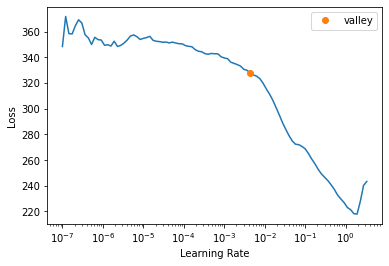

<Figure size 720x720 with 0 Axes>

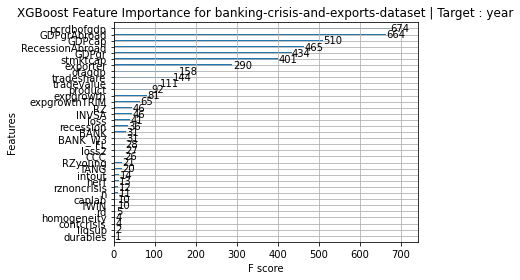

<Figure size 432x288 with 0 Axes>

In [15]:

if SEP_DOLLAR:
    #For every column in df, if the column contains a $, make a new column with the value without the $
    for col in df.columns:
        if '$' in df[col].to_string():
            df[col + '_no_dollar'] = df[col].str.replace('$', '').str.replace(',', '')


if SEP_PERCENT:
    #For every column in df, if the column contains a %, make a new column with the value without the %
    for col in df.columns:
        if '%' in df[col].to_string():
            df[col + '_no_percent'] = df[col].str.replace('%', '').str.replace(',', '')

target = ''
target_str = ''
#The column closest to the end isPARAM_DIR the target variable that can be represented as a float is the target variable
targets = []
#Loop through every possible target column (Continuous)
for i in range(len(df.columns)-1, 0, -1):
    try:
        df[df.columns[i]] = df[df.columns[i]].astype(float)
        target = df.columns[i]
        target_str = target.replace('/', '-')
    except:
        continue
    print(f'Target Variable: {target}')
    #Will be determined by the file name


    #===================================================================================================

    #Create project config files if they don't exist.
    if not os.path.exists(param_dir):
        #create param_dir
        os.makedirs(PARAM_DIR)
    if not os.path.exists(f'{PARAM_DIR}/cats.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/cats.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/conts.txt'):
        #create param_dir
        with open(f'{PARAM_DIR}/conts.txt', 'w') as f:
            f.write('')
    if not os.path.exists(f'{PARAM_DIR}/cols_to_delete.txt'):
        with open(f'{PARAM_DIR}/cols_to_delete.txt', 'w') as f:
            f.write('')

    df = df.drop_duplicates()
    if SHUFFLE_DATA:
        df = df.sample(frac=1).reset_index(drop=True)

    # workaround for fastai/pytorch bug where bool is treated as object and thus erroring out.
    for n in df:
        if pd.api.types.is_bool_dtype(df[n]):
            df[n] = df[n].astype('uint8')

    with open(f'{PARAM_DIR}/cols_to_delete.txt', 'r') as f:
        cols_to_delete = f.read().splitlines()
    for col in cols_to_delete:
        try:
            del(df[col])
        except:
            pass
    #try to fill in missing values now, otherwise FastAI will do it for us later
    try:
        df = df.fillna(0)
    except:
        pass
    #print missing values
    #print(df.isna().sum().sort_values(ascending=False))
    #shrink df as much as possible
    df = df_shrink(df)


    #print types inside of df
    #print(df.dtypes)


    #Auto detect categorical and continuous variables
    #==============================================================================
    likely_cat = {}
    for var in df.columns:
        likely_cat[var] = 1.*df[var].nunique()/df[var].count() < 0.05 #or some other threshold

    cats = [var for var in df.columns if likely_cat[var]]
    conts = [var for var in df.columns if not likely_cat[var]]

    #remove target from lists
    try:
        conts.remove(target)
        cats.remove(target)
    except:
        pass
    #Convert target to float
    df[target] = df[target].astype(float)

    print('CATS=====================')
    print(cats)
    print('CONTS=====================')
    print(conts)

    #Populate categorical and continuous lists
    #==============================================================================

    if VARIABLE_FILES == True:
        with open(f'{PARAM_DIR}/cats.txt', 'r') as f:
            cats = f.read().splitlines()

        with open(f'{PARAM_DIR}/conts.txt', 'r') as f:
            conts = f.read().splitlines()

    #==============================================================================

    #==============================================================================
    procs = [Categorify, FillMissing, Normalize]
    #print(df.describe().T)
    df = df[0:SAMPLE_COUNT]
    splits = RandomSplitter()(range_of(df))

    print((len(cats)) + len(conts))
    #conts = []

    #Convert cont variables to floats
    #==============================================================================

    #Convert cont variables to floats
    #==============================================================================

    for var in conts:
        try:
            df[var] = df[var].astype(float)
        except:
            print(f'Could not convert {var} to float.')
            pass

    #==============================================================================

    #Experimental logic to add columns one-by-one to find a breakpoint
    #==============================================================================
    if ENABLE_BREAKPOINT == True:
        temp_procs = [Categorify, FillMissing]
        print('Looping through continuous variables to find breakpoint')
        cont_list = []
        for cont in conts:
            focus_cont = cont
            cont_list.append(cont)
            #print(focus_cont)
            try:
                to = TabularPandas(df, procs=procs, cat_names=cats, cont_names=cont_list, y_names=target, y_block=RegressionBlock(), splits=splits)
                del(to)
            except:
                print('Error with ', focus_cont)
                #remove focus_cont from list
                cont_list.remove(focus_cont)
                #traceback.print_exc()
                continue
        #convert all continuous variables to floats
        for var in cont_list:
            try:
                df[var] = df[var].astype(float)
            except:
                print(f'Could not convert {var} to float.')
                cont_list.remove(var)
                if CONVERT_TO_CAT == True:
                    cats.append(var)
                pass
        print(f'Continuous variables that made the cut : {cont_list}')
        print(f'Categorical variables that made the cut : {cats}')
        #shrink df as much as possible
        df = df_shrink(df)
        #print(df.dtypes)

    #==============================================================================

    #Creating tabular object + quick preprocessing
    #==============================================================================
    to = None
    if REGRESSOR == True:
        try:
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, y_block=RegressionBlock(), splits=splits)
    else:
        try:
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)
        except:
            conts = []
            to = TabularPandas(df, procs, cats, conts, target, splits=splits)

    #print(dir(to))
    #print(to.xs)
    dls = to.dataloaders()
    print(f'Tabular Object size: {len(to)}')
    try:
        dls.one_batch()
    except:
        print(f'problem with getting one batch of {PROJECT_NAME}')
    #==============================================================================

    #Extracting train and test sets from tabular object
    #==============================================================================

    X_train, y_train = to.train.xs, to.train.ys.values.ravel()
    X_test, y_test = to.valid.xs, to.valid.ys.values.ravel()

    #Make sure target isn't in independent columns
    if target in X_train and target in X_test:
        del(X_train[target])
        del(X_test[target])
    #create dataframe from X_train and y_train
    #export tabular object to csv
    pd.DataFrame(X_train).to_csv(f'{PARAM_DIR}/X_train_{target_str}.csv', index=False)
    pd.DataFrame(X_test).to_csv(f'{PARAM_DIR}/X_test_{target_str}.csv', index=False)
    pd.DataFrame(y_train).to_csv(f'{PARAM_DIR}/y_train_{target_str}.csv', index=False)
    pd.DataFrame(y_test).to_csv(f'{PARAM_DIR}/y_test_{target_str}.csv', index=False)

    #==============================================================================

    #==============================================================================

    #Ready for model selection!

    if REGRESSOR == True:
        try:
            reg = LazyRegressor(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = reg.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            target_std = y_train.std()
            print(f'Target Standard Deviation: {target_std}')
            print(models)
            models['project'] = PROJECT_NAME
            models['target'] = target
            models['target_std'] = target_std
            #rename index of 
            models.to_csv(f'{PARAM_DIR}/regression_results_{target_str}.csv', mode='a', header=True, index=True)
        except:
            print('Issue during lazypredict analysis')
    else:
        #TODO: remove this
        try:
            clf = LazyClassifier(verbose=2, ignore_warnings=False, custom_metric=None)
            models, predictions = clf.fit(X_train, X_test, y_train, y_test)
            print(f'Project: {PROJECT_NAME}')
            print(PROJECT_NAME)
            print(f'Target: {target}')
            print(target)
            print(f'Target Standard Deviation: {y_train.std()}')
            print(models)
            models.to_csv(f'{PARAM_DIR}/classification_results.csv', mode='a', header=False)
        except:
            print('Issue during lazypredict analysis')

    model_name = 'tabnet'

    # FastAI + pre-trained TabNet
    #==============================================================================
    learn = None
    i = 0
    while True:
        try:
            del learn
        except:
            pass
        try:
            learn = 0
            model = TabNetModel(get_emb_sz(to), len(to.cont_names), dls.c, n_d=64, n_a=64, n_steps=5, virtual_batch_size=256)
            # save the best model so far, determined by early stopping
            cbs = [SaveModelCallback(monitor='_rmse', comp=np.less, fname=f'{model_name}_{PROJECT_NAME}_{target_str}_best'), EarlyStoppingCallback()]
            learn = Learner(dls, model, loss_func=MSELossFlat(), metrics=rmse, cbs=cbs)
            #learn = get_learner(to)
            if(learn != 0):
                break
            if i > 50:
                break
        except:
            i += 1
            print('Error in FastAI TabNet')
            traceback.print_exc()
            continue
    try:
        #display learning rate finder results
        x = learn.lr_find()
    except:
        pass
    if AUTO_ADJUST_LEARNING_RATE == True:
        FASTAI_LEARNING_RATE = x.valley
    print(f'LEARNING RATE: {FASTAI_LEARNING_RATE}')
    try:
        if i < 50:
            learn.fit_one_cycle(20, FASTAI_LEARNING_RATE)
            plt.figure(figsize=(10, 10))
            try:
                ax = learn.show_results()
                plt.show(block=True)
            except:
                print('Could not show results')
                pass
    except:
        print('Could not fit model')
        traceback.print_exc()
        pass

    #==============================================================================

    #fit an xgboost model
    #==============================================================================
    if REGRESSOR == True:
        xgb = XGBRegressor()
    else:
        xgb = XGBClassifier()
    try:
        xgb = XGBRegressor()
        xgb.fit(X_train, y_train)
        y_pred = xgb.predict(X_test)
        print('XGBoost Predictions vs Actual==========')
        print(pd.DataFrame({'actual': y_test, 'predicted': y_pred}).head())
        print('XGBoost RMSE: ', np.sqrt(mean_squared_error(y_test, y_pred)))
        #save feature importance plot to file
        plot_importance(xgb)
        plt.title(f'XGBoost Feature Importance for {PROJECT_NAME} | Target : {target}', wrap=True)
        plt.tight_layout()
        plt.show()
        plt.savefig(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.png')
        fi_df = pd.DataFrame([xgb.get_booster().get_score()]).T
        fi_df.columns = ['importance']
        #create a column based off the index called feature
        fi_df['feature'] = fi_df.index
        #create a dataframe of feature importance
        fi_df = fi_df[['feature', 'importance']]
        fi_df.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv', index=False)
        #xgb_fi = pd.DataFrame(xgb.feature_importances_, index=X_train.columns, columns=['importance'])
        #xgb_fi.to_csv(f'{PARAM_DIR}/xgb_feature_importance_{target_str}.csv')
        #print('XGBoost AUC: ', roc_auc_score(y_test, y_pred))
    except:
        traceback.print_exc()
        print('XGBoost failed')

# <div style="text-align: center; background-color: blue; color: white; padding: 14px; line-height: 1;border-radius:20px">**Overall Feature Importance**</div>

    feature  importance
0    GDPcap          31
0      loss         201
1      year         167
2  exporter         210
3      BANK          33


<AxesSubplot:title={'center':'XGBoost Overall Feature Importance'}, xlabel='feature'>

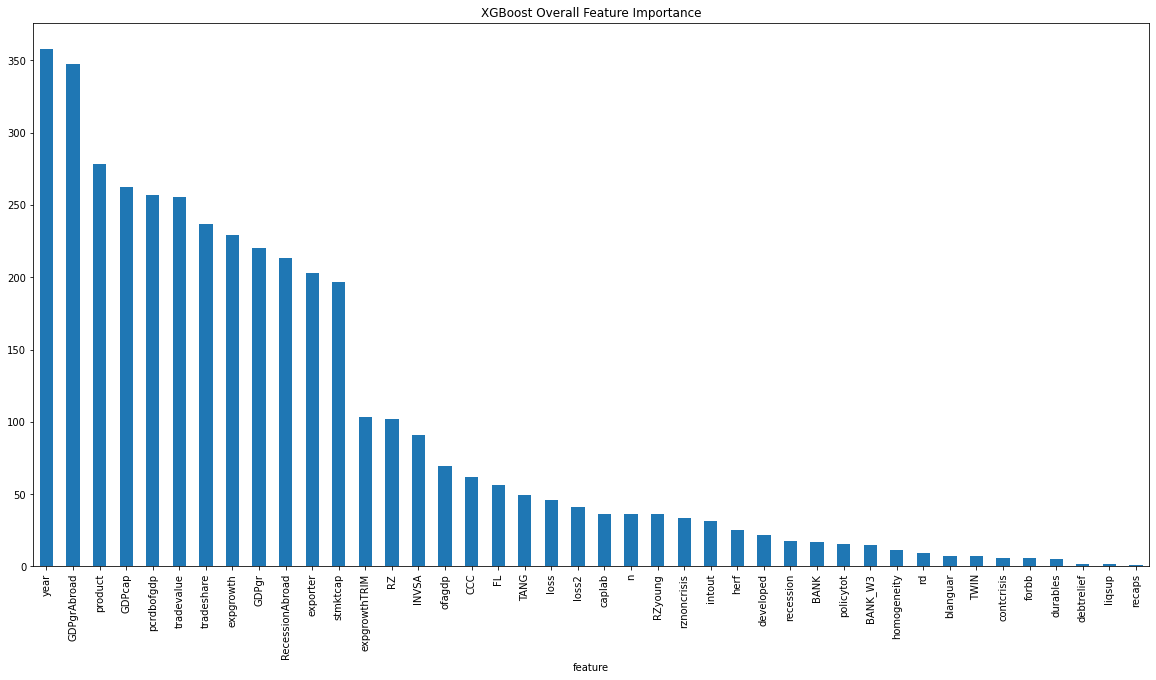

In [16]:
out_dir = f'./{PROJECT_NAME}'
xgb_feature_importance_csvs = []

for file in os.listdir(out_dir):
    if 'xgb_feature_importance' in file and '.csv' in file:
        xgb_feature_importance_csvs.append(pd.read_csv(os.path.join(out_dir, file)))

xgb_feature_importance = pd.concat(xgb_feature_importance_csvs,axis=0)
xgb_feature_importance.rename(columns={'Unnamed: 0': 'feature'}, inplace=True)
print(xgb_feature_importance.head())
xgb_feature_importance.groupby('feature')['importance'].mean().sort_values(ascending=False).plot(kind='bar', title='XGBoost Overall Feature Importance', figsize=(20, 10))

In [17]:
df.isna().sum()

exporter           0
year               0
product            0
tradevalue         0
tradeshare         0
expgrowth          0
expgrowthTRIM      0
BANK               0
BANK_W3            0
TWIN               0
RZ                 0
FL                 0
TANG               0
ofagdp             0
pcrdbofgdp         0
stmktcap           0
RecessionAbroad    0
GDPgrAbroad        0
durables           0
loss               0
loss2              0
GDPcap             0
developed          0
developing         0
blanguar           0
liqsup             0
forba              0
forbb              0
recaps             0
debtrelief         0
policytot          0
recession          0
GDPgr              0
INVSA              0
CCC                0
RZyoung            0
rznoncrisis        0
caplab             0
rd                 0
homogeneity        0
n                  0
herf               0
intout             0
contcrisis         0
dtype: int64

# **To Be Continued...**